In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
https://math.mit.edu/~gs/linearalgebra/ila0403.pdf #neat lin alg take on lin regression
    https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/13/lecture-13.pdf #academic approach to lin reg in matrix format
    https://setosa.io/ev/ordinary-least-squares-regression/ #neat visualization page on lin regress

https://nbviewer.jupyter.org/
http://www.csszengarden.com/
# bash reference manual: https://tiswww.case.edu/php/chet/bash/bashref.html
#codepen thing: https://codepen.io/curiositypaths/pen/WddzQM?editors=1100
#pep8 https://github.com/ericthansen/dsc-PEP8-online-ds-sp-000
#fast fourier transform:  
np.fft.fft(x)

In [ ]:
#independent stuff inspired by project:  Starting with a dataframe (that perhaps came from csv) then importing into
#sql table to do joins
import sqlite3
from pandas import DataFrame

conn = sqlite3.connect('TestDB1.db')
c = conn.cursor()

c.execute('CREATE TABLE CARS (Brand text, Price number)')
conn.commit()

Cars = {'Brand': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4'],
        'Price': [22000,25000,27000,35000]
        }

df = DataFrame(Cars, columns= ['Brand', 'Price'])
df.to_sql('CARS', conn, if_exists='replace', index = False)
 
c.execute('''  
SELECT * FROM CARS
          ''')

for row in c.fetchall():
    print (row)

JSON and APIs - Introduction
Introduction
In this section, you’ll learn about an additional data type: JSON (which stands for JavaScript Object Notation), as well as APIs (Application Programming Interfaces).

JSON is the new standard data format for the web. An older data format that is still used on the web is XML, or Extensible Markup Language, which you’ll have a chance to learn more about in the Appendix. APIs are one of the many ways you’ll access data as a data scientist.

Working with JSON files
A substantial part of the job of a professional data scientist is to find and access data. You've spent a bunch of time looking at how to pull information from relational databases, but there is lots of information you might need to work with that is either not in a relational database, or that is not exposed to you via a relational database.

For example, you might work with a third party website that has a lot of geographical data (perhaps points of interest near state highways). Within their company, they may well store the data within a relational database, but you might have to access it using an API (an Application Programming Interface - a way your computer can talk to their computer to go get some information!). Over the next couple of sections, we'll be looking at accessing data through APIs and enough HTML and CSS to get started with web scraping (downloading information automatically from websites). In this section, you'll look at a key data storage format, JSON, that you may well come across when retrieving data from other web applications or from inside your company.

JSON
You'll start off this section with a brief introduction to JSON so you know what this file format looks like. You'll then get some hands-on practice loading and parsing data from JSON files into Python.

JSON Schemas
Once you've learned how to import data that has been stored in the JSON format, you'll look at JSON schemas - a way to describe the expected structure of a given JSON file.

Exploring JSON Schemas
Finally, you'll get a lot more practice working with JSON schemas, exploring unknown schemas, accessing and manipulating data inside a JSON file and then converting JSON to alternate data formats such as pandas DataFrames. This lab will be a great chance for you to practice your Python programming skills and get comfortable with importing and transforming JSON data - something you may well have to do on a regular basis as a professional data scientist.

APIs
One of the many ways you'll find yourself accessing data as a professional data scientist is via APIs (Application Programming Interfaces). Typically, you'll send a request and get some data back, often in JSON or XML format. In this section, you'll get some hands-on experience retrieving and working with data provided by a range of different APIs.

Introduction to APIs
In this section, we'll provide a conceptual introduction to various kinds of APIs and some of the reasons that businesses create them.

The Client Server Model
We then look at the basic model of "clients" and "servers" to provide a framework for thinking about how your "client" retrieves information from an API "server".

The Request/Response Cycle
Next, we'll look at the fundamental mechanism by which web-based APIs are typically accessed - sending an HTTP request and then processing the response provided by the server. We'll also get a little experience working with HTTP requests using the Python .get() method within the requests package. We also get some hands-on experience retrieving information from NASA using Open Notify.

APIs and OAuth
Usually, access to a given API is limited to avoid abuse. One of the most common mechanisms for identifying your API requests to make sure they fit within acceptable usage guidelines is OAuth - Open Authorization - a standard for authorizing clients across web requests. In this section, we'll provide an overview of what OAuth is and how it works by looking at how it is implemented by Dropbox.

Working with the Yelp API
Next, we'll get some practice working with a real API, retrieving information from the Yelp API.

Creating interactive maps with Folium
We wrap up the section by creating interactive maps with Folium. In the Appendix, we include a Lab where you can build a Geographic Information System using Folium and data obtained from the Yelp API to display it on an interactive map.

Summary
Whether it’s from an API or a NoSQL store, it's quite possible that some of the data you find yourself working with will be stored using JSON. In this section, you'll build the confidence to be able to import and transform such data.

Also, many companies provide access to their data via an API, so being able to connect to and work with data provided via an API is a critical skill as a professional data scientist!

https://www.crummy.com/software/BeautifulSoup/bs4/doc/#navigating-the-tree
    https://www.crummy.com/software/BeautifulSoup/bs4/doc/#searching-the-tree
        https://www.crummy.com/software/BeautifulSoup/bs4/doc/
        

In [ ]:
import json
with open('nyc_2001_campaign_finance.json') as f:
    data = json.load(f)
print(type(data))


#look at meta data
import pandas as pd
pd.set_option("max_colwidth", 120)
pd.DataFrame(
    data=data['meta']['view'].values(),
    index=data['meta']['view'].keys(),
    columns=["value"]
)


#look at main data

len(data['data'])
data['data'][0]
data['data'][1]
#looks tabular, import into pandas
pd.DataFrame(data['data'])

#looking at meta again
data['meta']['view'].keys()
#Ok, description is the 7th one! Let's pull the value associated with the description key:
data['meta']['view']['description']



############## FROM LAB

print(f"The overall data type is {type(data)}")
print(f"The keys are {list(data.keys())}")
print()
print("The value associated with the 'meta' key has metadata, including all of these attributes:")
print(list(data['meta']['view'].keys()))
print()
print(f"The value associated with the 'data' key is a list of {len(data['data'])} records")

column_names = []
for d in data['meta']['view']['columns']:
    column_names.append(d['name'])
column_names

assert len(column_names) == 19

# Print the top 10 candidates by total payments
sorted(candidate_total_payments, key=lambda x: x[1], reverse=True)[:10]

import pandas as pd
pd.DataFrame(data=data['data'][1:], columns=column_names)



In [ ]:
#working with known json schemas
#e.g. new york times API
import json
with open('ny_times_response.json', 'r') as f:
    data = json.load(f)
data['response']['docs']['headline'] #this causes an error - we treated a list like a dictionary
#can check types on these
type(data['response'])

#Flattening data - reducing depth of dictionary embedding.  combine names of dicts.
#So, first let's write a function that takes in that complete dictionary, and returns a copy with only the 'main' and 'kicker' keys and values, now labeled 'headline_main' and 'headline_kicker':
def extract_headline_info(headline_dict):
    result = {}
    result['headline_main'] = headline_dict['main']
    result['headline_kicker'] = headline_dict['kicker']
    return result

#testing it:
extract_headline_info(docs[2]['headline'])

#another extractor/flattener:
def extract_doc_info(doc):
    info = extract_headline_info(doc['headline'])
    info['pub_date'] = doc['pub_date']
    info['word_count'] = doc['word_count']
    return info
doc_info_list = [extract_doc_info(doc) for doc in docs]
doc_info_list

#using pandas
import pandas as pd
pd.DataFrame(data['response']['docs'])

#but since doc_info_list is flattened, it looks nicer in pandas
pd.DataFrame(doc_info_list)

#recreating this from raw data using pandas instead of python
# Create dataframe of raw docs info
df = pd.DataFrame(data['response']['docs'])

# Make new headline_main and headline_kicker columns
df['headline_main'] = df['headline'].apply(lambda headline_dict: headline_dict['main'])
df['headline_kicker'] = df['headline'].apply(lambda headline_dict: headline_dict['kicker'])

# Subset to only the relevant columns
df = df[['headline_main', 'headline_kicker', 'pub_date', 'word_count']]
df
#This is a good general strategy for transforming nested JSON: create a DataFrame and then break out nested features into their own column features.

#outputting to json!
with open('doc_info_list.json', 'w') as f:
    json.dump(doc_info_list, f)
    
#reopening
with open('doc_info_list.json') as f:
    doc_info_list_from_disk = json.load(f)

doc_info_list_from_disk == doc_info_list

In [1]:
#when json schema is unknown:
import json
with open('output.json') as f:
    data = json.load(f)
#check type
type(data)

FileNotFoundError: [Errno 2] No such file or directory: 'output.json'

In [ ]:
#From JSON Lab
column_names = []
for d in m['view']['columns']:
    column_names.append(d['name'])
    
import pandas as pd
df = pd.DataFrame(data=data['data'], columns=column_names)
df_selected = df[(df['Question'] == 'Current asthma prevalence among adults aged >= 18 years') 
                 & (df['StratificationCategoryID1']=='OVERALL')
                & (df['DataValueTypeID']=='CRDPREV')
                 &(df['LocationDesc']!='United States')]
print('Number of rows after filtering:',len(df_selected))

df_selected=df_selected[['DataValue','LocationDesc']]
df_selected['DataValue'] = df_selected['DataValue'].astype('float')
df_selected.sort_values('DataValue', ascending=False)[:10]

names = list(df_selected.sort_values('DataValue', ascending=False)[:10]['LocationDesc'])
values = list(df_selected.sort_values('DataValue', ascending=False)[:10]['DataValue'])

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.barh(names[::-1], values[::-1]) # Values inverted so highest is at top
ax.set_title('Adult Asthma Rates by State in 2016')
ax.set_xlabel('Percent 18+ with Asthma');

In [1]:
#APIs - application programming interfaces
#request/response cycle
#client/server model

#HTTP request/response cycle:
#python has two modules for it: 
#urllib and urllib2 but these are confusing.
#To make these things simpler, one easy-to-use third-party library, known asRequests, is available and most developers prefer to use it instead or urllib/urllib2. It is an Apache2 licensed HTTP library powered by urllib3 and httplib.

# Uncomment and install requests if you don't have it already
# !pip install requests

# Import requests to working environment
import requests
### Making a request
resp = requests.get('https://www.google.com')
# Check the returned status code
resp.status_code == requests.codes.ok
#Once we know that our request was successful and we have a valid response, we can check the returned information using .text property of the response object.
print (resp.text)
# Read the header of the response - convert to dictionary for displaying k:v pairs neatly
dict(resp.headers)
#The content of the headers is our required element. You can see the key-value pairs holding various pieces of information about the resource and request. Let's try to parse some of these values using the requests library:
print(resp.headers['Date'])  # Date the response was sent
print(resp.headers['server'])   # Server type (google web service - GWS)

#httpbin.org is a popular website to test different HTTP operations and practice with request-response cycles. Let's use httpbin/get to analyze the response to a GET request. First of all, let's find out the response header and inspect how it looks.

r = requests.get('http://httpbin.org/get')

response = r.json()  
print(r.json())  
print(response['args'])  
print(response['headers'])  
print(response['headers']['Accept'])  
print(response['headers']['Accept-Encoding'])  
print(response['headers']['Host'])  
print(response['headers']['User-Agent'])  
print(response['origin'])  
print(response['url'])  

#Let's use requests object structure to parse the values of headers as we did above.

print(r.headers['Access-Control-Allow-Credentials'])  
print(r.headers['Access-Control-Allow-Origin'])  
print(r.headers['CONNECTION'])  
print(r.headers['content-length'])  
print(r.headers['Content-Type'])  
print(r.headers['Date'])  
print(r.headers['server'])  

#In some cases, you'll need to pass parameters along with your GET requests. These extra parameters usually take the the form of query strings added to the requested URL. To do this, we need to pass these values in the params parameter. Let's try to access information from httpbin with some user information.
credentials = {'user_name': 'FlatironSchool', 'password': 'learnlovecode'}  
r = requests.get('http://httpbin.org/get', params=credentials)

print(r.url)  
print(r.text)  

# HTTP POST method
# Sometimes we need to send one or more files simultaneously to the server. For example, if a user is submitting a form and the form includes different fields for uploading files, like user profile picture, user resume, etc. Requests can handle multiple files on a single request. This can be achieved by putting the files to a list of tuples in the form (field_name, file_info).

import requests

url = 'http://httpbin.org/post'  
file_list = [  
    ('image', ('fi.png', open('images/fi.png', 'rb'), 'image/png')),
    ('image', ('fi2.jpeg', open('images/fi2.jpeg', 'rb'), 'image/png'))
]

r = requests.post(url, files=file_list)  
print(r.text)  


#Open Notify is a cool project that gives good info about NASA stuff

lat = 40.71
lon = -74
params = {'lat': lat, 'lon': lon}
resp = requests.get('http://api.open-notify.org/iss-pass.json', params = params)
resp.status_code == requests.codes.ok
#print ('Response headers:',resp.headers, type(resp.headers))
#print('Resp json:',resp.json())
print ('Response text:',resp.text, type(resp.text),'\n')
r3=dict(resp.json())
print('Responses as dictionary:',r)
#print(r['passes'])
print("Pass info for ISS passes over NYC is given.")

print('Current time:', r['timestamp'])
print('Seconds(probably?) until next pass:',resp.json()['response'][0]['risetime']-r['timestamp'])


In [ ]:
#Open Auth
#see explanation of auth cycle
#Dropbox has good documentation of it.
#examples using yelp:
#Generate access token:
# https://www.yelp.com/developers/v3/manage_app

#for doing secret password/token stuff, 
# Move to your home (root) directory:
# cd ~
# Now make the .secret/ directory:
# mkdir .secret
# This will create a new folder in your home directory where you can store files for any of the API information you have.

# Can you find the file you just made in your terminal? NOTE: dot files won't show up with just ls you must use the show all command as well ls -a

# Move into the newly created .secret/ folder and create a file using vscode or any text editor to store your yelp API login info.¶
# cd .secret/
# code yelp_api.json
# In this file, let's create a dictionary of values representing the client id and API key that looks something like this:

# {"api_key": "input api key here!"}

import json

def get_keys(path):
    with open(path) as f:
        return json.load(f)
    
keys = get_keys("/Users/erict/.secret/yelp_api.json")

api_key = keys['api_key']

###
import requests
term = 'Mexican'
location = 'Astoria NY'
SEARCH_LIMIT = 10

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)
print(response)
print(type(response.text))
print(response.text[:1000])
response.json().keys()

for key in response.json().keys():
    print(key)
    value = response.json()[key] #Use standard dictionary formatting
    print(type(value)) #What type is it?
    print('\n\n') #Separate out data
    
response.json()['businesses'][:2]
response.json()['total']
response.json()['region']

import pandas as pd

df = pd.DataFrame.from_dict(response.json()['businesses'])
print(len(df)) #Print how many rows
print(df.columns) #Print column names
df.head() #Previews the first five rows. 
#You could also write df.head(10) to preview 10 rows or df.tail() to see the bottom

#of course, every API has different parameters - so check out their documentation


import json

#Our previous function for loading our api key file
def get_keys(path):
    with open(path) as f:
        return json.load(f)
keys = get_keys("/Users/erict/.secret/yelp_api.json")
api_key = keys['api_key']
import requests
#https://www.yelp.com/developers/documentation/v3/business_search
url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

url_params = {
                'location': 'NYC'
            }
response = requests.get(url, headers=headers, params=url_params)
#can even pass more params
url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(api_key),
    }

url_params = {
                'location': 'NYC',
                'term' : 'pizza',
                'limit' : 50,
                'price' : "1,2,3,4",
                'open_now' : True
            }
response = requests.get(url, headers=headers, params=url_params)


In [ ]:
#Folium codealong
import folium

lat = 51.51
long = -0.14

#Create a map of the area
base_map = folium.Map([lat, long], zoom_start=13)
base_map

import numpy as np

#Generate some random locations to add to our map
x = [lat + np.random.uniform(-.1,.1) for i in range(20)]
y = [long + np.random.uniform(-.1,.1) for i in range(20)]
points = list(zip(x, y))
for p in points:
    lat = p[0]
    long = p[1]
    marker = folium.Marker(location=[lat, long])
    marker.add_to(base_map)
base_map

#labels for points
for p in points:
    lat = p[0]
    long = p[1]
    popup_text = "Latitude: {}, Longitude: {}".format(lat,long)
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker(location=[lat, long], popup=popup)
    marker.add_to(base_map)
base_map

In [ ]:
#HTML
<p>Hello World</p>
<p>This <a href="http://www.google.com">link</a> will be a part of a separate paragraph.</p>

#To use HTML5, the current up-to-date version, you can simply declare <!DOCTYPE html>.
<!DOCTYPE html>
<html>#then html open/close tags
#and inside, head and body
<head>
        <!-- metadata about the HTML document as a whole -->

    </head>

    <body>
        <!-- content of our page will be here! -->

    </body>

</html>
#to make comments:
<!-- NYC Pizza is world-famous, cheap, and loved by both vermin and human-like! -->

#header levels:
<h1>Dogs!</h1>
<h3>Why Dogs are Great</h3>

#images
<img src="URL_TO_IMAGE" alt="Picture of a Dog">

#lists
<h5>My Favorite Things in No Particular Order</h5>
<ul>
    <li>Coffee</li>
    <li>Vinyl Records</li>
    <li>Pickling</li>
</ul>

#numbered lists
<h5>Top 5 Pizza Places in NYC</h5>
<ol>
    <li>DiFara Pizza</li>
    <li>Lucali's</li>
    <li>Sal and Carmine's</li>
    <li>Juliana's</li>
    <li>Joe's</li>
</ol>

GOod resources:
    w3schools 
    MDN
    
https://web.stanford.edu/group/csp/cs21/htmlcheatsheet.pdf

In [ ]:
Intro to CSS
https://learn.co/tracks/module-1-data-science-career-2-1/intro-to-data-with-python-and-sql/section-10-html-css-and-web-scraping/intro-to-css

How Does Writing CSS Differ From Writing HTML?
As we write CSS these are the type of questions we might ask ourselves:

Should the layout of the text be in a single or double column?
Should we use a different font color for the header?
How should the same content appear differently on a desktop vs. a mobile device?
All of the questions above deal with the esthetic considerations of the page. These are the concerns of the presentation layer (CSS).

As a contrast, let's consider the type of questions we might ask ourselves as we write HTML:

Does the order of items within a list matter? Should it be a numbered list?
Should we wrap a list of links inside a navigation tag?
Is this the most important header in the whole HTML document?
The last few questions deal with structure, hierarchy, and meaning. These are the concerns of the content layer (HTML).

When we write CSS, we focus on esthetic and display considerations. When we write HTML, we focus on structure, hierarchy, and meaning.

    

CSS selectors are a way of declaring which HTML elements you wish to style. Selectors can appear a few different ways:

The type of HTML element(h1, p, div, etc.)
The value of an element's id or class (<p id='idvalue'></p>, <p
class='classname'></p>)
The value of an element's attributes (value="hello")
The element's relationship with surrounding elements (a p within an element with class of .infobox)
For example, if you want the body of the page to have a black background, your selector syntax may be html or body. For anchors, your selector would be a. A few more examples are listed below:

/*
The CSS comment syntax is text between "slash-star" and "star-slash"
*/

Type selectors documentation https://developer.mozilla.org/en-US/docs/Web/CSS/Type_selectors
    
The element type class is a commonly used selector. Class selectors are used to select all elements that share a given class name. The class selector syntax is: .classname. Prefix the class name with a '.'(period).
/*
select all elements that have the 'important-topic' classname (e.g. <h1 class='important-topic'>
and <h1 class='important-topic'>)
*/
.important-topic
/*
select all elements that have the 'welcome-message' classname (e.g. <p class='helpful-hint'>
and <p class='helpful-hint'>) - #I think they meant helpful hint instead of welcome message
*/
.helpful-hint 


You can also use the id selector to style elements. However, there should be only one element with a given id in an HTML document. This can make styling with the ID selector ideal for one-off styles. The id selector syntax is: #idvalue. Prefix the id attribute of an element with a # (which is called "octothorpe," "pound sign", or "hashtag").

/*
selects the HTML element with the id 'main-header' (e.g. <h1 id='main-header'>)
*/
#main-header

/*
selects the HTML element with the id 'welcome-message' (e.g. <p id='welcome-message'>)
*/
#welcome-message



ID Selectors docn: https://developer.mozilla.org/en-US/docs/Web/CSS/ID_selectors
        
Declaring css properties:
A CSS property name with a CSS property value is a CSS declaration. To apply a CSS declaration like color: blue to a specific HTML element, you need to combine your CSS declaration with a CSS selector. The association between one or more CSS declarations and a CSS selector is called a CSS declaration block. CSS declarations (one or more) that applied to a specific selector are wrapped by curly braces ({ }). Each declaration inside a declaration block must be separated by a semi-colon (;).

Below is a sample CSS declaration block.

selector {
  color: blue;
}
/*
This is a css declaration for a selector
'color' is a property name and 'blue' is a css property value
!!!!! CSS declarations must end with a semi-colon (;) !!!!!
*/
Here's a more complete example declaration block.

/*
The CSS declaration block below:
* Will apply to all `h1` elements
* Will change the text color to blue
* Will set the font family to Georgia
*/
h1 {
  color: blue;
  font-family: Georgia;
}



https://codepen.io/
    
Sample:
https://codepen.io/curiositypaths/pen/WddzQM?editors=1100
    

In [ ]:
#The css lab seems written by someone else.  Doesn't explain well.
Making a Rainbow
First off make sure you have forked and cloned this repo. Next, create a new branch, and switch to it; it's git checkout -b your_solution_branch_name in case you forgot.

In that directory, you'll see three files. index.html, main.css, and this README.md. Open them in your text editor via your command line. Also, open index.html in your browser; if everything is working correctly you should see a white page. Good job!

see lab documents.
#css snippet:
div {
  border: 20px solid #000; /* this is short hand for setting
                            the border's width, its type, and color */
  display: inline-block; /* a way of positioning elements */
  min-width: 20em; /* the two min styles make the shape */
  min-height: 25em; /* of the divs oblong*/
  border-radius: 50%; /* this makes the normally square div round */
  border-left-color: transparent; /* these remove the color from the left side */
  border-right-color: transparent; /* the right side */
  border-bottom-color: transparent; /* and the bottom of the circle */
}
#red { /* this selects any elements with the red id */
  border-top-color: #f00;
}
#orange { /* this selects any elements with the red id */
  border-top-color: #ffa500;
        

In [ ]:
#Beautiful Soup - a Python package for web scraping
#DOM: Document Object Model.  https://developer.mozilla.org/en-US/docs/Web/API/Document_Object_Model/Introduction
from bs4 import BeautifulSoup
with open('sample_page.html') as f:
    soup = BeautifulSoup(f, 'html.parser')
print(soup.prettify())
##
print(soup.title)
# <title>The Dormouse's story</title>

print(soup.title.name)
# u'title'

print(soup.title.string)
# u'The Dormouse's story'

print(soup.title.parent.name)
# u'head'

print(soup.p)
# <p class="title"><b>The Dormouse's story</b></p>

print(soup.p['class'])
# u'title'

print(soup.a)
# <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

print(soup.find_all('a'))
# [<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
#  <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
#  <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

print(soup.find(id="link3"))
# <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>
###
Beautiful soup is the preliminary tool for web scraping. That said, there are more complex examples where you may wish to either scrape larger amounts of data through full-on web crawling or trickier examples involving javascript. For these and other scenarios, alternative tools such as Selenium and Scrapy are worth investigating.

#
Beautiful Soup - A good go-to tool for parsing the DOM
https://www.crummy.com/software/BeautifulSoup/?

Selenium - Browser automation (useful when you need to interact with javascript for more complex scraping)
https://www.seleniumhq.org/

Scrapy - Another package for scraping larger datasets at scale
https://scrapy.org/
    
    `

In [ ]:
#Scraping in practice
from bs4 import BeautifulSoup
import requests

html_page = requests.get('http://books.toscrape.com/') # Make a get request to retrieve the page
soup = BeautifulSoup(html_page.content, 'html.parser') # Pass the page contents to beautiful soup for parsing

soup.prettify

warning = soup.find('div', class_="alert alert-warning")
warning # Previewing is optional but can help you verify you are selecting what you think you are

# This code is a bit brittle but works for now; in general, ask, are you confident that this will work for all pages?
book_container = warning.nextSibling.nextSibling 
book_container

titles = book_container.findAll('h3') # Make a selection
titles[0] # Preview the first entry it

titles[0].find('a')
titles[0].find('a').attrs['title']
final_titles = [h3.find('a').attrs['title'] for h3 in book_container.findAll('h3')]
print(len(final_titles), final_titles[:5])
#Passing regular expressions
import re
regex = re.compile("star-rating (.*)")
book_container.findAll('p', {"class" : regex}) # Initial Trial in developing the script
star_ratings = []
for p in book_container.findAll('p', {"class" : regex}):
    star_ratings.append(p.attrs['class'][-1])
star_ratings
star_dict = {'One': 1, 'Two': 2, 'Three':3, 'Four': 4, 'Five':5} # Manually create a dictionary to translate to numeric
star_ratings = [star_dict[s] for s in star_ratings]
star_ratings
book_container.findAll('p', class_="price_color") # First preview
prices = [p.text for p in book_container.findAll('p', class_="price_color")] # Keep cleaning it up
print(len(prices), prices[:5])
prices = [float(p[1:]) for p in prices] # Removing the pound sign and converting to float
print(len(prices), prices[:5])
avails = book_container.findAll('p', class_="instock availability")
avails[:5] # Preview our selection
avails[0].text # Dig a little deeper into the structure
avails = [a.text.strip() for a in book_container.findAll('p', class_="instock availability")] # Finalize the selection
print(len(avails), avails[:5])

import pandas as pd
df = pd.DataFrame([final_titles, star_ratings, prices, avails]).transpose()
df.columns = ['Title', 'Star_Rating', 'Price_(pounds)', 'Availability']
df

#pseudocode:
df = pd.DataFrame()
for i in range(2,51):
    url = "http://books.toscrape.com/catalogue/page-{}.html".format(i)
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    warning = soup.find('div', class_="alert alert-warning")
    book_container = warning.nextSibling.nextSibling
    new_titles = retrieve_titles(book_container)
    new_star_ratings = retrieve_ratings(book_container)
    new_prices = retrieve_prices(book_container)
    new_avails = retrieve_avails(book_container)
    ...

In [ ]:
#From Scraping lab - hardcoded URL hack vs scrape for next page url:

#hacked next page:
#Your code here
from bs4 import BeautifulSoup
import requests
import pandas as pd
page_info = []
book_info = {}
final_titles = []
star_ratings = []
prices = []
avails = []
df = pd.DataFrame()
for i in range(1,51):
    url = "http://books.toscrape.com/catalogue/page-{}.html".format(i)
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    new_titles = retrieve_titles(soup)
    new_star_ratings = retrieve_ratings(soup)
    new_prices = retrieve_prices(soup)
    new_avails = retrieve_availabilities(soup)
    page_info.append([new_titles, new_star_ratings, new_prices, new_avails])
    final_titles+=new_titles
    star_ratings+=new_star_ratings
    prices+=new_prices
    avails+=new_avails
    
    for i in range(len(new_titles)):
        book_info[new_titles[i]]= [new_star_ratings[i], new_prices[i], new_avails]
        
df = pd.DataFrame([final_titles, star_ratings, prices, avails]).transpose()
df.columns = ['Title', 'Star_Rating', 'Price_(pounds)', 'Availability']
df





#Scrape for next page url:
#Your code here
from bs4 import BeautifulSoup
import requests
import pandas as pd
page_info = []
book_info = {}
final_titles = []
star_ratings = []
prices = []
avails = []
df = pd.DataFrame()

url = "http://books.toscrape.com/catalogue/page-1.html"
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')

def nextUrl(soup):
    
    localwarning = soup.find('div', class_="alert alert-warning")
    localbook_container = localwarning.nextSibling.nextSibling
    try:
        #print('url',url)
        rel_extension = localbook_container.findAll('li')[-1].find('a').attrs['href']#.find('href=')
        #print('relex:',rel_extension)
        #print('url',url)
        return rel_extension
    except:
        #print("Error")
        return None
        
while(True):
    #print('while url:',url)
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    new_titles = retrieve_titles(soup)
    new_star_ratings = retrieve_ratings(soup)
    new_prices = retrieve_prices(soup)
    new_avails = retrieve_availabilities(soup)
    page_info.append([new_titles, new_star_ratings, new_prices, new_avails])
    final_titles+=new_titles
    star_ratings+=new_star_ratings
    prices+=new_prices
    avails+=new_avails
    
    for i in range(len(new_titles)):
        book_info[new_titles[i]]= [new_star_ratings[i], new_prices[i], new_avails]
        
    #Next URL logic:
    try:
        rel_extension = nextUrl(soup)
        #print('rel_extension:',rel_extension)
        if rel_extension == None:
            break
        rel_path = url[0:url.rfind('/')]+'/'
        #print('relpath',rel_path)
        url = rel_path+rel_extension
    except:
        break
        
df = pd.DataFrame([final_titles, star_ratings, prices, avails]).transpose()
df.columns = ['Title', 'Star_Rating', 'Price_(pounds)', 'Availability']
df

In [ ]:
#Scraping for images
#normal setup
from bs4 import BeautifulSoup
import requests
html_page = requests.get('http://books.toscrape.com/') # Make a get request to retrieve the page
soup = BeautifulSoup(html_page.content, 'html.parser') # Pass the page contents to beautiful soup for parsing
warning = soup.find('div', class_="alert alert-warning")
book_container = warning.nextSibling.nextSibling
#look for img
images = book_container.findAll('img')
ex_img = images[0] # Preview an entry
ex_img
#use tab complete to look at options
 ex_img.
check out source url
ex_img.attrs['src']


#download image locally
import shutil
url_base = "http://books.toscrape.com/"
url_ext = ex_img.attrs['src']
full_url = url_base + url_ext
r = requests.get(full_url, stream=True)
if r.status_code == 200:
    with open("images/book1.jpg", 'wb') as f:
        r.raw.decode_content = True
        shutil.copyfileobj(r.raw, f)
        
#Bash to see if its there
ls images/

#preview it
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('images/book1.jpg')
imgplot = plt.imshow(img)
plt.show()
#this using PIL doesn't work - PIL doesn't seem to integrate with learn-env
#can preview using pandas
import pandas as pd
from IPython.display import Image, HTML
row1 = [ex_img.attrs['alt'], '<img src="images/book1.jpg"/>']
df = pd.DataFrame(row1).transpose()
df.columns = ['title', 'cover']
HTML(df.to_html(escape=False))

#"all together now"
data = []
for n, img in enumerate(images):
    url_base = "http://books.toscrape.com/"
    url_ext = img.attrs['src']
    full_url = url_base + url_ext
    r = requests.get(full_url, stream=True)
    path = "images/book{}.jpg".format(n+1)
    title = img.attrs['alt']
    if r.status_code == 200:
        with open(path, 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)
        row = [title, '<img src="{}"/>'.format(path)]
        data.append(row)
df = pd.DataFrame(data)
print('Number of rows: ', len(df))
df.columns = ['title', 'cover']
HTML(df.to_html(escape=False))   

In [ ]:
#Scraping lab 2 - concerts
#so far, this lab seems not workable because of cloudflare protections against scraping.  But here's the solution code

import re
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
#Exploration; designing/testing function parts
response = requests.get("https://www.residentadvisor.net/events/us/newyork")
soup = BeautifulSoup(response.content, 'html.parser')
event_listings = soup.find('div', id="event-listing")
entries = event_listings.findAll('li')
print(len(entries), entries[0])
#Successive exploration in function development
rows = []
for entry in entries:
    #Is it a date? If so, set current date.
    date = entry.find('p', class_="eventDate date")
    event = entry.find('h1', class_="event-title")
    if event:
        details = event.text.split(' at ')
        event_name = details[0].strip()
        venue = details[1].strip()
        try:
            n_attendees = int(re.match("(\d*)", entry.find('p', class_="attending").text)[0])
        except:
            n_attendees = np.nan
        rows.append([event_name, venue, cur_date, n_attendees])
    elif date:
        cur_date = date.text
    else:
        continue
df = pd.DataFrame(rows)
df.head()

#Final function
def scrape_events(events_page_url):
    #Your code here
    response = requests.get(events_page_url)
    soup = BeautifulSoup(response.content, 'html.parser')
    entries = event_listings.findAll('li')
    rows = []
    for entry in entries:
        #Is it a date? If so, set current date.
        date = entry.find('p', class_="eventDate date")
        event = entry.find('h1', class_="event-title")
        if event:
            details = event.text.split(' at ')
            event_name = details[0].strip()
            venue = details[1].strip()
            try:
                n_attendees = int(re.match("(\d*)", entry.find('p', class_="attending").text)[0])
            except:
                n_attendees = np.nan
            rows.append([event_name, venue, cur_date, n_attendees])
        elif date:
            cur_date = date.text
        else:
            continue
    df = pd.DataFrame(rows)
    df.head()
    df.columns = ["Event_Name", "Venue", "Event_Date", "Number_of_Attendees"]
    return df
#Write a Function to Retrieve the URL for the Next Page
#Function development cell
soup.find('a', attrs={'ga-event-action':"Next "}).attrs['href']
def next_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    url_ext = soup.find('a', attrs={'ga-event-action':"Next "}).attrs['href']
    next_page_url = "https://www.residentadvisor.net" + url_ext
    #Your code here
    return next_page_url

#Scrape the Next 1000 Events for Your Area
#Your code here
dfs = []
total_rows = 0
cur_url = "https://www.residentadvisor.net/events/us/newyork"
while total_rows <= 1000:
    df = scrape_events(cur_url)
    dfs.append(df)
    total_rows += len(df)
    cur_url = next_page(cur_url)
    time.sleep(.2)
df = pd.concat(dfs)
df = df.iloc[:1000]
print(len(df))
df.head()



In [1]:
https://www.w3resource.com/sqlite/sqlite-dot-commands.php
#useful sqlite page

In [ ]:
#project tricks - taking raw dfs into sql tables to join #I did actually put this in above in the sql section
import sqlite3
from pandas import DataFrame

conn = sqlite3.connect('TestDB1.db')
c = conn.cursor()

c.execute('CREATE TABLE CARS (Brand text, Price number)')
conn.commit()

Cars = {'Brand': ['Honda Civic','Toyota Corolla','Ford Focus','Audi A4'],
        'Price': [22000,25000,27000,35000]
        }

df = DataFrame(Cars, columns= ['Brand', 'Price'])
df.to_sql('CARS', conn, if_exists='replace', index = False)
 
c.execute('''  
SELECT * FROM CARS
          ''')

for row in c.fetchall():
    print (row)

In [ ]:
#Project Hints from Jeff:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook') #and other options
plt.style.available
with plt.style.context('dark_background'):
    plt.scatter([1,2,3],[4,5,6])
    plt.xlabel('Xlabel')
    plt.ylabel('Ylabel');
    
#pandas explode function
#Docstrings for functions
#dataframes have built in .copy function, don't use copy module

https://raw.githubusercontent.com/learn-co-curriculum/dsc-stat-distributions-use-cases/master/images/dists.png
    

In [ ]:
#Prob Mass Funct

# Count the frequency of values in a given dataset
import collections
x = [1,1,1,1,2,2,2,2,3,3,4,5,5]
counter = collections.Counter(x)
print(counter)

print(len(x))

# Convert frequency to probability - divide each frequency value by total number of values
pmf = []
for key,val in counter.items():
    pmf.append(round(val/len(x), 2))
    
print(counter.keys(), pmf)


import numpy as np

np.array(pmf).sum()

####
def p(x_i):
    frequency = counter[x_i]
    total_number = len(x)
    return frequency / total_number

print("p(1) =", p(1))
print("p(3) =", p(3))

###
#normalized bars
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

outcomes = counter.keys()

plt.bar(outcomes, [p(x_i) for x_i in outcomes]);
plt.title("A Probability Mass Function")
plt.xlabel("Outcomes")
plt.ylabel("Probabilities of Outcomes");

###
#or as a histogram
plt.hist(x);
plt.title("Histogram of Outcomes")
plt.xlabel("Bins of Outcomes")
plt.ylabel("Frequencies of Outcomes");

###
#customizing vis
xtick_locations = range(1,6)
bins = np.arange(6)+0.5
plt.hist(x, bins=bins,  rwidth=0.25, density=True)
plt.xticks(ticks=xtick_locations)
plt.xlabel('Bins of Outcomes')
plt.ylabel('Probabilities of Bins of Outcomes')
plt.title("Adjusted Histogram with `density=True`");


In [ ]:
#Pandas series fun - 
#start with a series, like sizes. make a function (e.g. p_perceived) then use .apply 
#on it to make a new series
sum(sizes.apply(p_perceived) * sizes)


#
pmf_df.plot.bar(x='Class Size')


###neat thing to plot two bar plots atop each other with transparency:
# Setting up shared axes
fig, ax = plt.subplots()

# Your code here
pmf_df.plot.bar(ax = ax, x='Class Size', y = 'Overall Probability', color = 'tab:red', alpha = 0.5)
pmf_df.plot.bar(ax = ax, x='Class Size', y = 'Perceived Probability', color = 'tab:blue', alpha = 0.5)

Parametric methods use parameters like mean and standard deviation of given data and attempt to work out the shape of the distribution that the data belongs to. These may implement maximum likelihood methods to fit a distribution to the given data. You'll learn more about this later.

Kernel density estimation or KDE is a common non-parametric estimation technique to plot a curve (the kernel) at every individual data point. These curves are then added to plot a smooth density estimation. The kernel most often used is a Gaussian (which produces a bell curve at each data point). Other kernels can be used in special cases when the underlying distribution is not normal.


In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)


import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

data = pd.read_csv('weight-height.csv')

print(data.head())
data.describe()

##
welch
# Create two vertical subplots sharing 15% and 85% of plot space
# sharex allows sharing of axes i.e. building multiple plots on same axes
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )

sns.distplot(data.Height, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'red',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= stats.norm, fit_kws = {'color' : 'green',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_title('Density Estimations')

sns.boxplot(x=data.Height, ax = ax,color = 'red')
ax.set_title('Box and Whiskers Plot')
ax2.set(ylim=(0, .08))
plt.ylim(0,0.11)
plt.legend();
##
#interpolation
import numpy as np
n, bins = np.histogram(data.Height, 20, density=1)
n , bins

# Initialize numpy arrays according to number of bins with zeros to store interpolated values
pdfx = np.zeros(n.size)
pdfy = np.zeros(n.size)

# Interpolate through histogram bins 
# identify middle point between two neighbouring bins, in terms of x and y coords
for k in range(n.size):
    pdfx[k] = 0.5*(bins[k]+bins[k+1])
    pdfy[k] = n[k]

# plot the calculated curve
plt.plot(pdfx, pdfy);
###
plt.figure(figsize=(7,5))
data.Height.plot.hist(bins = 20, density=True, label = 'Normalized histogram', alpha = 0.7)
# plot the calculated curve
plt.plot(pdfx, pdfy, label = 'Density function')
plt.ylabel ('Probabilities')
plt.legend()
plt.title ('PDF for height data')
plt.show()
###




# CDFs (and PMFs) can be calculated using built-in NumPy and matplotlib methods. So we don't have create custom functions to calculate these. We can draw a histogram styled CDF as shown below using the following steps

# You would need to perform these steps

# Use np.histogram() to automatically calculate the histogram with probabilities. Here is numpy histogram documentation to help you dig deeper.

# Use plt.scatter() method with np.cumsum() to calculate and plot cumulative probabilities (just like we did above).

import numpy as np

n, bins = np.histogram(dice_lst, bins=[1,2,3,4,5,6,7], density=True)
#display('n:',n, 'bins',bins)
plt.scatter(dice_lst, np.cumsum(n))
#plt.scatter(s=
#display(np.cumsum(n))



In [ ]:
#Bernoulli and binomial dist
A general rule for the Bernoulli distribution is that:  𝐸(𝑋)=𝑝  and  𝜎2=𝑝∗(1−𝑝) .

Note how the Bernoulli distribution describes a single coin flip, a single penalty shot, etc. What if we repeat this process multiple times and are interested in the probability of obtaining a certain number of 1s/successes/tails? This process is described by the binomial distribution.

#use numpy to generate binomial/bernoulli trials
import numpy as np
np.random.seed(123) # set a seed to get the same results
np.random.binomial(100, 0.8)
#and again - for different result
np.random.binomial(100, 0.8)

#or a bunch of times
iteration = []
for loop in range(500):
    iteration.append(np.random.binomial(100, 0.8))
    np_it = np.array(iteration)
    
## a different experiment - success on 3 penalty shots
n = 10000
iteration = []
for loop in range(n):
    iteration.append(np.random.binomial(3, 0.8))
    np_it = np.array(iteration)
#unique gets counts of the unique values
values, counts = np.unique(np_it, return_counts=True)
print(values)
print(counts)

#and visualize
import matplotlib.pyplot as plt
plt.bar(values, counts/10000, align='center', alpha=0.9)
plt.xticks(values)
plt.ylabel('Fraction')
plt.title('Number of penalty goals')
plt.show()



Normal dist = gaussian
he Probability Density Function
The probability density function equation for the normal distribution is given by the following expression:

𝑁(𝑥)= (prob dens function doesnt display nicely)


In [ ]:
#making normal dist vis
import numpy as np
import seaborn as sns

mu, sigma = 0.5, 0.1
n = 1000
s = np.random.normal(mu, sigma, n)
sns.distplot(s);

In [ ]:
#converting normal dist to std normal dist.
#z=(x-mu)/sigma
import numpy as np
import seaborn as sns
mean1, sd1 = 5, 3 # dist 1 
mean2, sd2 = 10, 2 # dist 2 
d1 = np.random.normal(mean1, sd1, 1000)
d2 = np.random.normal(mean2, sd2, 1000)
sns.distplot(d1);
sns.distplot(d2);

# Stardardizing and visualizing distributions

sns.distplot([(x - d1.mean())/d1.std() for x in d1]);
sns.distplot([(x - d2.mean())/d2.std() for x in d2]);



In [ ]:
Bring in SciPy¶
In the previous lesson, you have seen formulas to calculate skewness and kurtosis for your data. SciPy comes packaged with these functions and provides an easy way to calculate these two quantities, see scipy.stats.kurtosis and scipy.stats.skew. Check out the official SciPy documentation to dig deeper into this. Otherwise, simply pull up the documentation within the Jupyter notebook using shift+tab within the function call or pull up the full documentation with kurtosis? or skew?, once you have imported these methods from the SciPy package.

You'll generate two datasets and measure/visualize and compare their skew and kurtosis in this lab.



# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import kurtosis, skew

x_random = np.random.normal(0,2,10000)
plt.hist(x_random, bins='auto')
display('skew',skew(x_random))
display('kurtosis',kurtosis(x_random))


#manually doing a normal dist
x = np.linspace( -5, 5, 10000 )
y = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x)**2  )  # normal distribution


Highlighting some specific distributions:
Bernoulli Trials deal with a series of boolean events, which is a type of discrete distribution
The normal distribution is the classic "bell curve" with 68% of the probability mass within 1 SD (standard deviation) of the mean, 95% within 2 SDs, and 99.7% within 3 SDs.
The standard normal distribution is a standardized version of the normal distribution, where the mean is 0 and the SD is 1

The z-score can be used to understand how extreme a certain result is
Skewness and kurtosis (number of outliers)can be used to measure how different a given distribution is from a normal distribution

The uniform distribution, which represents processes where each outcome is equally likely, like rolling dice
The Poisson distribution, which can be used to represent the likelihood of a given number of successes over a given time period
The exponential distribution, which can be used to represent the amount of time it may take before an event occurs



https://raw.githubusercontent.com/learn-co-curriculum/dsc-central-limit-theorem/master/images/new_CentralLimitTheorem.png
    

In [ ]:
#Any of the read_ methods in pandas will store 1-dimensional in a Series instead of a DataFrame if passed the optimal parameter squeeze=True.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
np.random.seed(0) #set a random seed for reproducibility

#checking for normality
data = pd.read_csv('non_normal_dataset.csv', squeeze=True)
data.head()
sns.distplot(data)

st.normaltest(data)

#sampling with replacement
def get_sample(data, n):
    sample=[]
    l = len(data)
    for i in range(n):
        r = np.random.randint(l)
        sample.append(data[r])
    return sample
    

test_sample = get_sample(data, 30)
print(test_sample[:5]) 

#generating sample mean
def get_sample_mean(sample):
    return np.mean(sample)

test_sample2 = get_sample(data, 30)
test_sample2_mean = get_sample_mean(test_sample2)
print(test_sample2_mean) 

#create sample dist of sample means
def create_sample_distribution(data, dist_size=100, n=30):
    sample_dist = []
    for i in range(dist_size):
        s = get_sample(data, n)
        sample_dist.append(get_sample_mean(s))
    return sample_dist
        

test_sample_dist = create_sample_distribution(data)
print(test_sample_dist[:5]) 

#creating different samples and visualizing
sample_dist = create_sample_distribution(data, 10, 3)
sns.distplot(sample_dist)

sample_dist = create_sample_distribution(data, 100, 30)
sns.distplot(sample_dist)

#normal curving
mu=0
sigma=1
x=np.linspace(
    stats.norm(mu,sigma).ppf(0.01),
    stats.norm(mu,sigma).ppf(0.99),
    100
)
y=stats.norm(mu,sigma).pdf(x)
ax.plot(x,y,'r-')




#Calculate the frequency of each mean value
freq, c = np.unique(means, return_counts=True)
    
    

The Standard Error (SE) is very similar to the standard deviation. Both are measures of spread. The higher the number, the more spread out your data is. To put it simply, the two terms are essentially equal — but there is one important difference. While the standard error uses statistics (sample data), standard deviations use parameters (population data). We achieve this by dividing the standard deviation by the square root of the sample size.


In [ ]:
#from conf interval video
pop = list(stats.norm.rvs(size=1000, random_state=42))

f, ax = plt.subplots()
ax = sns.kdeplot(pop, ax=ax, label='Label')
plt.axvline(pop_mean, ls='-.', c='r', label='$\mu$')

#zscore for certain percentages
z=stats.norm.ppf(0.95) #z score of 95% values


#confidence intervals:
sample mean +/- standard error * z score (or t-score)


student's t-dist function - similar to normal but with shorter peak and thicker tails; it has a pdfunction containing the Gamma function.

We can use the normal dist when either:
population std. dev is known or
sample size is greater than 30

if you don't know either one, then use the t-distribution

In [ ]:
###from Confidence Intervals lab
# Import necessary libraries
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Plot styles
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#The Poisson distribution is the discrete probability distribution of the number of events occurring in a given time period, given the average number of times the event occurs over that time period. We shall use a Poisson distribution to construct a bimodal distribution.
np.random.seed(15)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

pop_ages = pd.DataFrame(population_ages)
np.random.seed(15)

# Take random sample of size 500
sample_size = 500
sample = pop_ages.sample(500)

np.random.seed(15)


In [ ]:
# student t-distribution stuff
sample_chol_levels = np.random.normal(loc=54, scale=17, size=1000)
# or just given some sample values
x_bar = np.mean(sample_chol_levels)
s = np.std(sample_chol_levels, ddof = 1)
print('Sample mean:', x_bar)
print('Sample standard deviation:', s)


import scipy.stats as stats
stats.t.interval(alpha = 0.95,                              # Confidence level
                 df= len(sample_chol_levels)-1,             # Degrees of freedom
                 loc = x_bar,                               # Sample mean
                 scale = s)   




Finding the Critical Value
For the sake of example, let's say that we are calculating the confidence interval solely based on information in the sample. In other words, unlike when we calculated confidence intervals using the z-distribution, we do not have the population standard deviation.

We can calculate a confidence interval without the population standard deviation using the t-distribution, represented by the stats.t.ppf(q, df) function. This function takes in a value for the confidence level required (q) with "degrees of freedom" (df).

Hints:

In this case, we want 95% confidence level for a two-tail test. This means the confidence level (q) for this function needs to be  (1−0.95)/2 , i.e.  0.975 
In this case, the number of degrees of freedom (df) is equal to the sample size minus 1, or df = sample_size - 1.
Calculate the t-critical value for a 95% confidence level based on the sample taken above.


In [1]:
# Replace None with appropriate code

import scipy.stats as stats


# Get the t-critical value by using 95% confidence level and degree of freedom
t_critical = stats.t.ppf(q=.975, df=sample_size-1)
            #stats.t.interval(alpha = 0.95,                              # Confidence level
             #    df= len(sample)-1,             # Degrees of freedom
             #    loc = sample_mean,                               # Sample mean
             #    scale = np.std(sample, ddof = 1))   

# Check the t-critical value
print("t-critical value:")
print(t_critical)     

# t-critical value:
# 2.0638985616280205

NameError: name 'sample_size' is not defined

In [ ]:
# Replace None with appropriate code

# Get the sample standard deviation
sample_stdev = sample.std(ddof=1)


# Calculate the standard error using the formula described above
se = sample_stdev/np.sqrt(sample_size)

# Check the SE
print("Sample Standard Error of the Mean:")
print(se)

# Sample Standard Error of the Mean:
# 0.697197803193802

# Replace None with appropriate code

# Calculate margin of error using t_critical and se
margin_of_error = t_critical*se

# Calculate the confidence interval using margin_of_error
confidence_interval = (sample_mean-margin_of_error, sample_mean+margin_of_error)

# Check the confidence interval
print("Confidence Interval:")
print(confidence_interval)

# Confidence Interval:
# (18.431843086289952, 21.309734172653762)


####OR USING BUILT IN

# Run this cell without changes

ci = stats.t.interval(
    alpha=0.95,         # Confidence level
    df=sample_size - 1, # Degrees of freedom
    loc=sample_mean,    # Sample mean
    scale=se            # Standard error
)

print("True Population Mean:")
print(population_mean)
print("95% Confidence Interval of Mean Based on Sample:")
print(ci)

# True Population Mean:
# 21.00857750766395
# 95% Confidence Interval of Mean Based on Sample:
# (18.431843086289952, 21.309734172653762)



###Now, to refactor and iterate for repeated samples
# Replace None with appropriate code

def conf_interval(sample):
    '''
    Input:  Sample data
    Output: Confidence interval for the mean of the
            population that the sample was drawn from
    '''
    
    # Sample size
    n = len(sample)
    # Sample mean
    x_hat = sample.mean()
    
    # Standard error of the mean
    standard_error = sample.std()/np.sqrt(n)
    
    # Compute confidence interval with stats.t.interval
    conf = stats.t.interval(
            alpha=0.95,         # Confidence level
            df=sample_size - 1, # Degrees of freedom
            loc=x_hat,    # Sample mean
            scale=standard_error            # Standard error
        )
    
    return conf

# Confirm that this produces the same interval as the previous code
conf_interval(sample)

# (18.431843086289952, 21.309734172653762)

# Replace None with appropriate code

# Set random seed for reproducibility
np.random.seed(12)

# Select the sample size 
sample_size = 25

# Initialize lists to store interval and mean values
sample_means = []
intervals = []

# Run a for loop for sampling 20 times and calculate + store 
# confidence interval and sample mean values in lists initialized above

for sample in range(20):
    # Take a random sample of chosen size from population_ages
    #population_ages.random_sample(sample_size)
    s=np.random.choice(population_ages, sample_size)
    
    # Calculate sample mean and confidence_interval
    sample_mean = s.mean()
    ci = conf_interval(s)
  
    # Append sample means and conf intervals for each iteration
    sample_means.append(sample_mean)
    intervals.append(ci)

    
    
    
# Run this cell without changes

# Set up figure
fig, ax = plt.subplots(figsize=(15,7))

# Draw the means and confidence intervals for each sample
ax.errorbar(
    x=np.arange(1, 21, 1),
    y=sample_means,
    yerr=[(upper-lower)/2 for upper, lower in intervals],
    fmt='o',
    color="gray",
    markerfacecolor="blue"
)

# Draw the population mean as a horizontal line 
ax.hlines(
    xmin=0,
    xmax=21,
    y=population_ages.mean(), 
    linewidth=2.0,
    color="red"
)

# Label plot
ax.set_xlabel("Samples")
ax.set_ylabel("Means")

# Customize legend appearance
legend_elements = [
    # Sample mean (blue circle with gray edge)
    Line2D(
        [0], # "Dummy" line being graphed
        [0], # for use in the legend
        marker="o",
        color="w",
        markerfacecolor="blue",
        markeredgecolor="gray"
    ),
    # Confidence interval (gray vertical line)
    Line2D(
        [0],
        [0],
        marker="|",
        markersize=15,
        color="w",
        markeredgewidth=1.5,
        markeredgecolor="gray"
    ),
    # Population mean (red horizontal line)
    Line2D([0],[0], color="red")
]

ax.legend(
    handles=legend_elements,
    labels=["Sample Mean", "Sample Confidence Interval for Mean", "True Population Mean"],
    loc="lower left", 
    fontsize="large"
);



In [ ]:
#intro to statistical significance
import numpy as np

sample = np.array([15.46097664, 15.5930238 , 19.55426936, 16.54231132, 18.40712804,
                   13.33092129, 13.79141786, 12.44315636, 15.70385525, 12.48722755,
                   11.81594655, 15.22694063, 18.25064431, 15.93900563, 17.38471543,
                   15.02334988, 14.55826229, 16.64212199, 16.50657618, 13.44759329,
                   13.05467437, 14.151049  , 13.55036322, 13.37386788, 10.25090132,
                   16.45380807, 12.63016764, 11.90102614, 15.34426397, 15.2048003 ,
                   11.60623705, 16.10720081, 16.42266283, 13.74686281, 14.51850311,
                   15.59951107, 18.03269318, 14.35882143, 17.95626942, 14.06849303,
                   14.4507767 , 17.27149508, 15.06747021, 13.82402614, 12.40651465,
                   15.94104138, 16.8003216 , 18.45973001, 14.24757027, 14.06031845])
sample_mean = sample.mean()
sample_mean

import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
ax = sns.kdeplot(sample, ax=ax, label='Sample PDF')
ax.axvline(sample_mean, color="red", label=r'$\bar{x}$')
ax.legend();

from scipy import stats
stats.t.interval(
    alpha=0.9999999999999999,
    df=len(sample)-1,
    loc=sample_mean,
    scale=stats.sem(sample)
)

stats.t.interval(
    alpha=0.999,
    df=len(sample)-1,
    loc=sample_mean,
    scale=stats.sem(sample)
)



# Experimental design:
    https://github.com/ericthansen/dsc-experimental-design.git  
    
Other - p values intro
    https://github.com/ericthansen/dsc-z-score-p-value
    
population/parameters, sample/statistics

p-vals and null hyp
https://github.com/ericthansen/dsc-p-values-and-null-hypothesis

"null hyp loves you":
https://byrslf.co/the-null-hypothesis-loves-you-and-wants-you-to-be-happy-3189413d8cd0



In [ ]:
#z-table in python
# Z-table in Python 
import scipy.stats as stats

# Probabilities up to z-score of 1.5
print(stats.norm.cdf(1.5))

# Probabilities greater than z-score of 1.34
print (1-stats.norm.cdf(1.34))


In [ ]:
#Statsignif
import scipy.stats as stats
from math import sqrt
x_bar = 103 # sample mean 
n = 40 # number of students
sigma = 16 # sd of population
mu = 100 # Population mean 

z = (x_bar - mu)/(sigma/sqrt(n))
z

#fancy z-plotting (statistical significance) 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,1.19,0.01),
                 y1= stats.norm.pdf(np.arange(-4,1.19,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-statistic'
                 )

plt.fill_between(x=np.arange(1.19,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1.19,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-statistic')
plt.legend()
plt.title ('z-statistic = 1.19');


#comparing
stats.norm.cdf(z)
pval = 1 - stats.norm.cdf(z)
pval #pval 0.117
#but since pval is > 0.05, we can't reject null hyp



p-value and effect size

Effect size is used to quantify the size of the difference between two groups under observation. Effect sizes are easy to calculate, understand and apply to any measured outcome and are applicable to a multitude of study domains. It is highly valuable towards quantifying the effectiveness of a particular intervention, relative to some comparison. Measuring effect size allows scientists to go beyond the obvious and simplistic 'Does it work or not?' to the far more sophisticated, 'How well does it work in a range of contexts?'.

In [2]:
#scipy imports
#documentation: https://docs.scipy.org/doc/scipy/reference/index.html
# Import necessary modules 
from __future__ import print_function, division
import numpy as np

# Import SciPy stats and matplotlib for calculating and visualising effect size
import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline

# seed the random number generator so you get the same results
np.random.seed(10)


##creating a random variable object
#Mean height and sd for males
male_mean = 178
male_sd = 7.7

# Generate a normal distribution for male heights 
male_height = scipy.stats.norm(male_mean, male_sd)



#function to eval a gaussian pdf 
def evaluate_PDF(rv, x=4):
    '''Input: a random variable object, standard deviation
    output : x and y values for the normal distribution
    '''
    
    # Identify the mean and standard deviation of random variable 
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = rv.pdf(xs)

    return xs, ys # Return calculated values


#Use scipy stats rvs method to generate a random sample from a pop dist
male_sample = male_height.rvs(1000)
#the result is a numpy array

#one way to express difference between 2 means is by 
#percentage difference of the means.
#but relative to which one?  Could do the average,
#or the place where pdfs cross:
thresh = (std1 * mean2 + std2 * mean1) / (std1 + std2)

male_below_thresh = sum(male_sample < thresh)
male_below_thresh
female_above_thresh = sum(female_sample > thresh)
female_above_thresh
#now plot the overlap:
# Male height
m_xs, male_ys = evaluate_PDF(male_height)
plt.plot(m_xs, male_ys, label='male', linewidth=4, color='#beaed4') 

#Female height 
f_xs, female_ys = evaluate_PDF(female_height)
plt.plot(f_xs, female_ys, label='female', linewidth=4, color='#fdc086')
plt.vlines(thresh,ymin=0,ymax=0.06)
plt.fill_betweenx(male_ys,x1 = m_xs,x2=thresh, where = m_xs < thresh,color='b')
plt.fill_betweenx(female_ys,x1=f_xs,x2=thresh, where = f_xs > thresh,color='b')
plt.xlabel('height (cm)')
# Calculate the overlap 
overlap = male_below_thresh / len(male_sample) + female_above_thresh / len(female_sample)
overlap
#Or in more practical terms, you might report the fraction of people who would be misclassified if you tried to use height to guess sex:
misclassification_rate = overlap / 2
misclassification_rate

#short way to find: if chose m and f samples at random, what is prob that males taller than females
# Python zip() The zip() function take iterables (can be zero or more), 
# makes iterator that aggregates elements based on the iterables passed, 
# and returns an iterator of tuples.

sum(x > y for x, y in zip(male_sample, female_sample)) / len(male_sample)


#Cohen's d
Cohen’s d is one of the most common ways to measure effect size. As an effect size, Cohen's d is typically used to represent the magnitude of differences between two (or more) groups on a given variable, with larger values representing a greater differentiation between the two groups on that variable.

The basic formula to calculate Cohen’s  𝑑  is:

𝑑  = effect size (difference of means) / pooled standard deviation

The denominator is the standardiser, and it is important to select the most appropriate one for a given dataset. The pooled standard deviation is the average spread of all data points around their group mean (not the overall mean).
#there is some discussion about different standardizers
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

#Interpreting d: 0.2 small effect, .5 medium effect, .8 large


#Plotting pdfs
def plot_pdfs(cohen_d=2):
    """Plot PDFs for distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    group1 = scipy.stats.norm(0, 1)
    group2 = scipy.stats.norm(cohen_d, 1)
    xs, ys = evaluate_PDF(group1)
    plt.fill_between(xs, ys, label='Group1', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_PDF(group2)
    plt.fill_between(xs, ys, label='Group2', color='#376cb0', alpha=0.7)
    
    o, s = overlap_superiority(group1, group2)
    print('overlap', o)
    print('superiority', s)
    
https://github.com/ericthansen/dsc-t-tests    

NameError: name 'std1' is not defined

https://github.com/ericthansen/dsc-t-tests

Two Sample t-tests
The two-sample t-test is used to determine if two population means are equal. The main types of two-sampled t-tests are paired and independent tests. Paired tests are useful for determining how different a sample is affected by a certain treatment. In other words, the individual items/people in the sample will remain the same and researchers are comparing how they change after treatment. Here is an example of a scenario where a two-sample paired t-test could be applied:

The US Olympic weightlifting team is trying out a new workout technique to in an attempt to improve everyone's powerlifting abilities. Did the program have an effect at a 95% significance level?

Because we are looking at how specific individuals were affected by a treatment, we would use the paired t-test.

Independent two-sample t-tests are for when we are comparing two different, unrelated samples to one another. Unlike paired t-tests, we are not taking paired differences because there is no way to pair two unrelated samples! Here is an example of a scenario where a two-sample independent t-test could be applied:

Agricultural scientists are trying to compare the difference in soybean yields in two different counties in Mississippi.


Samples vs. Tails
Note that we now have two different labels where "one" and "two" appear repeatedly. Let's make sure the difference is clear!

Previously we learned about one-tail and two-tail tests. A one-tail test means that the alternative hypothesis contains something like  >  or  < , which means that we are only looking at the area under the curve on one side. Whereas a two-tail test means that the alternative hypothesis contains something like  ≠  (which could mean greater than or less than), which means that we are looking at the area under the curve in two places, one on each side.

One-sample tests can be one-tail or two-tail tests, as can two-sample tests. Some quick examples:

One-sample one-tail:  𝐻𝑎:𝜇<3 
One-sample two-tail:  𝐻𝑎:𝜇≠3 
Two-sample one-tail:  𝐻𝑎:𝜇1<𝜇2 
Two-sample two-tail:  𝐻𝑎:𝜇1≠𝜇2

Assumptions for Performing t-tests
When performing various kinds of t-tests, you assume that the sample observations have numeric and continuous values. You also assume that the sample observations are independent from each other (that is, that you have a simple random sample) and that the samples have been drawn from normal distributions. You can visually inspect the distribution of your sample using a histogram, for example.

In the case of unpaired two-sample t-tests, you also assume that the populations the samples have been drawn from have the same variance. For paired two-sample t-tests, you assume that the difference between the two sets of samples are normally distributed.

Regardless of the type of t-test you are performing, there are 5 main steps to executing them:
1) Set up null and alternative hypotheses

2) Choose a significance level

3) Calculate the test statistic (t-value)

4) Determine the critical t-value (find the rejection region)

5) Compare t-value with critical t-value to determine if we can reject the null hypothesis.

Hypotheses are written in terms of population parameters like mu
rather than sample stats like xbar


HEy look, you can put latex in here too!
### Step 3: Calculate the t-statistic

Assuming that we are fulfilling the three requirements for a t-test mentioned above (i.e. normality, independence, and randomness), we are ready to calculate our t statistic using the formula for one-sample t-test given as:

# $$t = \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$$
 
(The *t-statistic* is also known as the *t-value*.)

Using the formula given above, calculate the t-statistic in Python:

In [ ]:
#From lab

import numpy as np
from scipy import stats 
import math

# For visualizing distributions - optional 
import seaborn as sns
import matplotlib.pyplot as plt
 
def one_sample_ttest(sample, popmean, alpha):
    '''print out stats for sample and identify if significant, also visualize'''
    

    # Visualize sample distribution for normality 
    sns.set(color_codes=True)
    sns.histplot(sample, kde=True, bins=5);
    
    # Population mean 
    mu = popmean#not sure what else supposed to do here

    # Sample mean (x̄) using NumPy mean()
    x_bar = sample.mean()

    # Sample Standard Deviation (sigma) using Numpy
    sigma = np.std(sample, ddof=1)
    
    # Degrees of freedom
    n = len(sample)
    dof = n-1
    
    # Calculate the critical t-value
    t_crit = stats.t.ppf(1 - alpha, df=dof)
    print('Critical t-value: {}'.format(t_crit))
    
    # Calculate the t-value and p-value      
    t = (x_bar -  mu)/(sigma/np.sqrt(n))
    print('T-value: {}'.format(t))
    
    p= stats.t.sf(t, df=dof)
    print('P-value: {}'.format(p))
    ###alternately,  and to check
    results = stats.ttest_1samp(
    a=sample,   # the entire array-like sample
    popmean=mu # the mean you are testing the sample against
    )
    print("Checking t and p value: t:{}, p:{}, results:{} & {}".format(t, p, results.statistic, results.pvalue/2))
    
    # return results
    if t>t_crit:
        results='Significant'
    else:
        results="Not Significant"
    return results

##

sample = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])
popmean = 65
alpha = 0.05
results=one_sample_ttest(sample, popmean, alpha)
results

In [ ]:
#calculating pooled sample variance

def sample_variance(sample):
    n=len(sample)
    x_bar=sample.mean()
    num=0
    for s in sample:
        num += (s-x_bar)**2
    den=n-1
    
    return num/den

def pooled_variance(sample1, sample2):
    n1=len(sample1)
    n2=len(sample2)
    num=(n1-1)*sample_variance(sample1) + (n2-1)*sample_variance(sample2)
    den=n1+n2-2
    return num/den

def twosample_tstatistic(expr, ctrl):
    num=expr.mean()-ctrl.mean()
    den=np.sqrt(pooled_variance(expr, ctrl)*(1/len(expr)+1/len(ctrl)))
    return num/den

t_stat = twosample_tstatistic(experimental, control)
t_stat
# -1.8915462966190268



#All built in t-test:
stats.ttest_ind(experimental, control)

In [ ]:
#quick p-valu check
import scipy.stats as st

n = 20 #Number of flips
p = .75 #Simulating an unfair coin
coin1 = np.random.binomial(n, p)
sigma = np.sqrt(n*.5*(1-.5))#For a binomial
st.norm.sf(np.abs(z))
z = (coin1 - 10) / (sigma / np.sqrt(n))

In [1]:
#more p-value stuff
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
#checking pvalue change over time with more flips

#How many times would you have to flip a 75% heads coin to determine it was false?
p_vals = []
#Iterate through various numbers of trials
for n in range(1,50):
    #Do multiple runs for that number of samples to compare
    p_val = []
    for i in range(200):
        p = .75 # Simulating an unfair coin
        n_heads = np.random.binomial(n, p)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5))
        z  = (n_heads - mu) / (sigma / np.sqrt(n))
        p_val.append(st.norm.sf(np.abs(z)))
    p_vals.append(np.mean(p_val))
plt.plot(list(range(1,50)), p_vals)
plt.title('Average P-Values Associated with Hypothesis Testing of a .75 Unfair Coin by Number of Trials')
plt.ylabel('Average P-Value of Simulations')
plt.xlabel('Number of Coin Flips')

NameError: name 'np' is not defined

In [ ]:
#t test with power, etc using 2 random vars

import scipy.stats as stats
def run_ttest_sim(p1, p2, std, nobs, alpha=0.05, n_sim=10**5):
    """p1 and p2 are the underlying means probabilities for 2 normal variables
    Samples will be generated using these parameters."""
    # Calculate Normalized Effect Size
    effect_size = np.abs(p1-p2)/std
    
    # Run a Simulation
    # Initialize array to store results
    p = (np.empty(n_sim))
    p.fill(np.nan)

    #  Run a for loop for range of values in n_sim
    for s in range(n_sim):
        control = np.random.normal(loc= p1, scale=std, size=nobs)
        experimental = np.random.normal(loc= p2, scale=std, size=nobs)
        t_test = stats.ttest_ind(control, experimental)
        p[s] = t_test[1]
    
    num_null_rejects = np.sum(p < alpha)
    power = num_null_rejects/n_sim
    # Store results
    stat_dict = {'alpha':alpha,
                 'nobs':nobs,
                 'effect_size':effect_size,
                 'power': power}
    return stat_dict

run_ttest_sim(.5, .7, 1, 50)

###power/alpha/samplesize/effectsize
from statsmodels.stats.power import TTestIndPower, TTestPower
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid') # Nice background styling on plots
power_analysis = TTestIndPower()
power_analysis.plot_power(dep_var='nobs',
                          nobs = np.array(range(5,1500)),
                          effect_size=np.array([.05, .1, .2,.3,.4,.5]),
                          alpha=0.05)
plt.show()


# Calculate power
power_analysis.solve_power(effect_size=.2, nobs1=80, alpha=.05)
# Calculate minimum effect size to satisfy desired alpha and power as well as respect sample size limitations
power_analysis.solve_power(nobs1=25, alpha=.05, power=.8)
#can solve for any of the 4


#initialize empty numpy array
p = (np.empty(n_sim))
p.fill(np.nan)

# Welch's t-test  
https://github.com/ericthansen/dsc-welchs-ttest.git

Welch's t score:
![text](https://render.githubusercontent.com/render/math?math=%5CLarge%20t%20=%20%5Cfrac%7B%5Cbar%7BX_1%7D-%5Cbar%7BX_2%7D%7D%7B%5Csqrt%7B%5Cfrac%7Bs_1%5E2%7D%7BN_1%7D%20%2b%20%5Cfrac%7Bs_2%5E2%7D%7BN_2%7D%7D%7D%20=%20%5Cfrac%7B%5Cbar%7BX_1%7D-%5Cbar%7BX_2%7D%7D%7B%5Csqrt%7Bse_1%5E2%2bse_2%5E2%7D%7D)
Calculate the degrees of freedom
Once the t-score has been calculated for the experiment using the above formula, you then must calculate the degrees of freedom for the t-distribution. Under the two-sample Student's t-test, this is simply the total number of observations in the samples size minus two, but given that the sample sizes may vary using the Welch's t-test, the calculation is a bit more complex:
![Alt text](https://render.githubusercontent.com/render/math?math=%5CLarge%20v%20%5Capprox%20%5Cfrac%7B%5Cleft(%20%5Cfrac%7Bs_1%5E2%7D%7BN_1%7D%20%2b%20%5Cfrac%7Bs_2%5E2%7D%7BN_2%7D%5Cright)%5E2%7D%7B%5Cfrac%7Bs_1%5E4%7D%7BN_1%5E2v_1%7D%20%2b%20%5Cfrac%7Bs_2%5E4%7D%7BN_2%5E2v_2%7D%7D "a title")

Then calculate p-stat for a t dist with that tscore and those deg of freedom
One good way is with  
p = 1 - stats.t.cdf(t, df)

In [ ]:
#from the welch t test lab
import numpy as np

np.random.seed(82)
control = np.random.normal(loc=10, scale=1, size=8)
treatment = np.random.normal(loc=10.5, scale=1.2, size=12)
def welch_t(a, b):
    
    """ Calculate Welch's t-statistic for two samples. """
    num = abs(np.mean(control) - np.mean(treatment))
    denom = np.sqrt((np.var(control))/len(control) + (np.var(treatment)/len(treatment)))
    

    
    return num/denom# Return the t-score!

welch_t(control, treatment)
# 2.0997990691576858
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    na = len(a)
    nb = len(b)
    vara = np.var(a)
    varb = np.var(b)
    nua = na-1
    nub = nb-1
    num = (vara/na + varb/nb)**2
    den = (vara**2)/(na**2 * nua) + (varb**2)/(nb**2 * nub)
    return num/den # Return the degrees of freedom

welch_df(control, treatment)
# 17.673079085111

# Your code here; calculate t-score and the degrees of freedom for the two samples, a and b
t = welch_t(control, treatment)
df = welch_df(control, treatment)
print(t, df)
# 2.0997990691576858 17.673079085111

# Your code here; calculate the p-value for the two samples defined above

from scipy import stats
p = 1 - stats.t.cdf(t, df)
print(p)
# 0.025191666225846454

def p_value(a, b, two_sided=False):
    # Your code here
    from scipy import stats
    t = welch_t(a, b)
    df = welch_df(a, b)
    p = 1 - stats.t.cdf(t, df)
    if two_sided:
        return p*2
    else:
        return p
     # Return the p-value!
p_value(treatment, control)
# 0.025191666225846454

p_value(treatment, control, two_sided=True)
# 0.05038333245169291


Kolmogorov/Smirnof Stat - representation of difference from normality (or difference between two distributions) based on comparing the max of the vertical distance between their CDFs

For one sample vs a known distribution (eg. Normal aka 'norm')
scipy.stats.kstest(rvs, cdf, args=(), N=20, alternative='two-sided', mode='approx')

A two-sample K-S test is available in SciPy using following function:

scipy.stats.ks_2samp(data1, data2)[source]


In [ ]:
#ANOVA
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.read_csv('IT_salaries.csv')
df.head()


#in this example:
# S - the individuals salary
# X - years of experience
# E - education level (1-Bachelors, 2-Masters, 3-PHD)
# M - management (0-no management, 1-yes management)
#In order to generate the ANOVA table, you first fit a linear model and then generate the table from this object. Our formula will be written as:

#Control_Column ~ C(factor_col1) + factor_col2 + C(factor_col3) + ... + X

#We indicate categorical variables by wrapping them with C().
formula = 'S ~ C(E) + C(M) + X'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

#anova video: 
https://learning.flatironschool.com/courses/1888/pages/video-anova?module_item_id=261345
    
check out seaborn swarmplot
boxplot
violinplot

#also, if we have a bunch of different groups and want
#to see if they significantly differ
groups = {'1':data1, ...}
f_stat, p = stats.f_oneway(*groups.values()) 
#this uses the Fstat (at the heart of ANOVA testing)

#remember, it's an Omnibus test - it only tells us
#if there's a sig diff, but doesn't tell us where
#aha!  so the ols(ordinary least squares) code above breaks out by group - so it
#is a little more comprehensive

In [ ]:
#Chi-Squared!
#chi sq dist can be used for lots of things

#one of them is comparing if some observations differ
#from expectations
x=np.linspace(stats.chi2.ppf(0.00001, dof), stats.chi2.ppf(0.9999, dof), 500)
f,ax=plt.subplots()
ax.set_title('chi^2, dof deg of freedom')
ax.plot(x, stats.chi2.pdf(x, dof, 'r-', lw=5))
plt.tight_layout()

#can get p score from
#calculating the chisq_stat yourself, then
p=1-stats.chi2.cdf(chisq_stat, df=dof)
#or
stats.chi2.sf(chisq)

#or go straight to the built in:
obs=[50,100,180,70]
exp = [60,80,180,80]
result = stats.chisquare(f_obs=obs, f_exp = exp)

#the other thing is test for independence.
#e.g. if you had pc/mac users who create profiles abcd..
#ie. two categories, and each profile type we expect to be
#independent of pc/mac, you can test if they are indep.

stats.chi2.pdf()
#Lots of good functions to use, but one for 2 category
#e.g. 2 rows, 3 cols
chi, p, dof, exp = stats.contingency.chi2_contingency(observations)
#where observations are, e.g., [[category 1 yes, category 1 no], [cat 2 yes, cat 2 no]]


In [ ]:
#AB Testing - i.e. what sample size do we need to observe
#A given alpha/power/effectsize
#developed for the lab

# Calculate the required sample size
from statsmodels.stats.power import TTestIndPower, TTestPower
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_style('darkgrid') # Nice background styling on plots
power_analysis = TTestIndPower()


alpha=0.05
power=0.8
effect_size=0.01
std=0.0475
#Not sure how to make normalized effect size using Cohen's d since we don't have current population to make pooled variance
#could potentially just use "number of stdevs between the means" idea.  If both pops have same std, can do...
effect_size = effect_size/std

res = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)
res

#now do some plotting of different scenarios
#Your code; plot power curves for the various alpha and effect size combinations
alphas=[0.01, 0.05, 0.1]
power=0.8
effect_sizes=np.array([0.005, .01, .02, .03])/std

# res = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)
# res
for i in range(len(alphas)):
    power_analysis.plot_power(dep_var='nobs',
                              nobs = np.array(range(10,int(res*5),10)),
                              effect_size=effect_sizes,
                              alpha=alphas[i]
                             )
    plt.title('Power vs. Sample Size; Alpha: {}'.format(alphas[i]))
    plt.show()



In [ ]:
####flatiron_stats.py
#flatiron_stats
import numpy as np
import scipy.stats as stats

def welch_t(a, b):
    
    """ Calculate Welch's t statistic for two samples. """

    numerator = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    denominator = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return np.abs(numerator/denominator)

def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. This function returns the degrees of freedom """
    
    s1 = a.var(ddof=1) 
    s2 = b.var(ddof=1)
    n1 = a.size
    n2 = b.size
    
    numerator = (s1/n1 + s2/n2)**2
    denominator = (s1/ n1)**2/(n1 - 1) + (s2/ n2)**2/(n2 - 1)
    
    return numerator/denominator


def p_value_welch_ttest(a, b, two_sided=False):
    """Calculates the p-value for Welch's t-test given two samples.
    By default, the returned p-value is for a one-sided t-test. 
    Set the two-sided parameter to True if you wish to perform a two-sided t-test instead.
    """
    t = welch_t(a, b)
    df = welch_df(a, b)
    
    p = 1-stats.t.cdf(np.abs(t), df)
    
    if two_sided:
        return 2*p
    else:
        return p

Additional Resources
Choosing Statistical Tests (Links to an external site.)
https://stats.idre.ucla.edu/other/mult-pkg/whatstat/

How to choose the right statistical test?
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3116565/

# Random musing:
What about something like the reverse monty hall problem - i.e. a situation where you get more info but still would not want to switch.  idea - what if, instead of a car, it's a hungry tiger?



In [1]:
#Bayes Theorem!
# Bayes vs frequentist.  difference in philosophy as well as  b's theorem
def bayes(P_a, P_b, P_b_given_a):
    # Your code here
    P_a_given_b = P_b_given_a * P_a/P_b
    return P_a_given_b


In [ ]:
#usual imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



# max likelihood estimation
establish equation for parameters, use derivative to maximize - can take monotonic funciton (e.g. log) of this to make taking the derivtive easier - extrema will still happen at same place.
other resources:
https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1

https://www.statisticshowto.datasciencecentral.com/iid-statistics/

https://opencurriculum.org/5512/monotonically-increasing-and-decreasing-functions-an-algebraic-approach/

https://mathbitsnotebook.com/Algebra2/Exponential/EXLogFunctions.html



# maximum aposteriori 
https://github.com/ericthansen/dsc-map-multinomial-bayes.git  
Maximum A Posteriori Estimation
Maximum A Posteriori Estimation (MAP) is similar to Maximum Likelihood Estimation but extends this concept by allowing one to also account for prior beliefs regarding the distribution of the variable in question. Recall Bayes' theorem:



The Bayesian interpretation of this formula is
likelihood*prior/evidence



With MAP, you then attempt to optimize a parameter  for the assumed distribution in order to maximize the posterior probability.

Multinomial Bayes
Multinomial Bayes also extends the notions within Bayes' theorem, allowing one to chain inferences. The primary assumption for this is assuming that your variables are independent of one another. Recall that if you assume two events A and B are independent of one another, then  . Similarly, if independence is assumed when extending Bayes theorem to a multivariate case, one can multiply the successive probability estimates. Mathematically, this can be summarized as:



Summary
This lesson briefly introduced the concept of Maximum A Posteriori Estimation and extending Bayes' theorem to multivariate cases. In later sections, you'll investigate these ideas in practice, working with practical examples and coding your own implementations to gain a full understanding.

# Statistical learning theory
nice representation of fitting a model
https://learning.flatironschool.com/courses/1888/pages/statistical-learning-theory?module_item_id=261365  
https://github.com/ericthansen/dsc-stat-learning-theory?organization=ericthansen&organization=ericthansen


In [ ]:
#linear regression
#m = sy/sx
#or
def calc_slope(xs,ys):
    
    return ((X.mean()*Y.mean() - (X*Y).mean())/((X.mean())**2 - (X**2).mean()))

calc_slope(X,Y)


###########from lab
# import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

# Initialize arrays X and Y with given values
# X = Independent Variable
X = np.array([1,2,3,4,5,6,8,8,9,10], dtype=np.float64)
# Y = Dependent Variable
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

# Scatter plot
plt.scatter(X, Y)

# Write the function to calculate slope as: 
# (mean(x) * mean(y) – mean(x*y)) / ( mean (x)^2 – mean( x^2))
def calc_slope(xs,ys):
    
    return ((X.mean()*Y.mean() - (X*Y).mean())/((X.mean())**2 - (X**2).mean()))

calc_slope(X,Y)

# 0.5393518518518512

# use the slope function with intercept formula to return calculate slope and intercept from data points

def best_fit(xs,ys):
    
    m = calc_slope(xs, ys)
    #y = mx + c => c = y-mx
    c = ys.mean() - m * xs.mean()
    return (m, c)

# Uncomment below to test your function

m, c = best_fit(X,Y)
m, c

# (0.5393518518518512, 6.379629629629633)

def reg_line (m, c, xs):
    
    ys = np.zeros(len(xs), dtype=np.float64)
    
    for i in range(len(xs)):
        ys[i] = m * xs[i] + c
    return ys
    

# Uncomment below
regression_line = reg_line(m,c,X)
regression_line
list(zip(X, regression_line))
print(regression_line)
print(X)

# Plot data and regression line
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(X,Y)
ax.plot(X, regression_line)

x_new = 7
y_predicted = m*x_new + c
y_predicted

# 10.155092592592592

# Plot as above and show the predicted value
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(X,Y)
ax.plot(X, regression_line)
ax.scatter(x_new, y_predicted)



In [2]:
#R squared = coefficient of determination
# r^2 = 1 - ss_res/ss_tot = ss_exp/ss_tot 
#ss_res = sum (y_i-yhat_i)^2
#ss_tot = sum( y_i - ybar)^2
#respectively, residual, explained, total

###From Lab

# Calculate sum of squared errors between regression and mean line 
import numpy as np

def sq_err(y_real, y_predicted):
    """
    input
    y_real : true y values
    y_predicted : regression line

    
    return
    squared error between regression and true line (ss_tot)
    """
    if len(y_real) != len(y_predicted):
        return "Error"
    else:
        sq_e = 0
        for r, p in zip(y_real, y_predicted):
            sq_e += (r-p)**2
    return sq_e


# Calculate Y_mean , squared error for regression and mean line , and calculate r-squared

def r_squared(y_real, y_predicted):
    """
    input
    y_real: real values
    y_predicted: regression values
    
    return
    r_squared value
    """
    if len(y_real) != len(y_predicted):
        return "Error"
    else:
        y_bar = y_real.mean()
        y_mean = np.zeros(len(y_real))
        y_mean += y_bar
        
        ssr = sq_err(y_real, y_predicted)
        sst = sq_err(y_real, y_mean)
        #print(sst, y_real.var()*len(y_real))
        r_squared = 1-ssr/sst
        return r_squared

# Check the output with some example data
Y = np.array([1, 3, 5, 7])
Y_pred = np.array([4.1466666666666665, 2.386666666666667, 3.56, 5.906666666666666])

r_squared(Y, Y_pred)
print(r_squared(Y, Y_pred))

# 0.32




https://github.com/ericthansen/dsc-regression-assumptions

Heteroscedasticity (also spelled heteroskedasticity) refers to the circumstance in which the dependent variable is unequal across the range of values of the predictor(s).

When there is heteroscedasticity in the data, a scatterplot of these variables will often create a cone-like shape. The scatter of the dependent variable widens or narrows as the value of the independent variable increases.  

A scatter plot is good way to check whether the data are homoscedastic (meaning the residuals are equal across the regression line). The scatter plots shown here are examples of data that are heteroscedastic (except the plot far right). You can also use significance tests like Breusch-Pagan / Cook-Weisberg test or White general test to detect this phenomenon. You will learn about p-values later, but for now, you can remember that, if these tests give you a p-value < 0.05, the null hypothesis can rejected, and you can assume the data is heteroscedastic.
 
 

# Ordinary least squares in Statsmodels
https://github.com/ericthansen/dsc-ols-statsmodels  
https://github.com/ericthansen/dsc-ols-statsmodels-lab


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#check linearity
df = pd.read_csv('heightWeight.csv')
plt.scatter(df.height, df.weight)
plt.title("Linearity check")
plt.show()

#get a general sense of distribution- not sufficient to assume normality here!!!
df.plot.kde()
plt.title("distribution check for dependent and independent variable")
plt.show()


#Statsmodels allows users to fit statistical models using R-style formulas. The formula framework is quite powerful and for simple regression it is written using a ~ as Y ~ X.
#The formula gives instruction for a general structure for a regression call. For a statsmodels ols calls, you'll need a Pandas dataframe with column names that you will add to your formula.

#regression formula
f = 'weight~height'

#pass to OLS with fit method
model = ols(formula=f, data=df).fit()

model.summary()
dir(model)# to see specific parts!! very useful!

Wow, that's a lot of information. Statsmodels performs a ton of tests and calculates measures to identify goodness of fit. 

* You can find the R-Squared, which is 0.95 i.e. the data are very linearly related
* You can also look at the coefficients of the model for intercept and slope (next to "height")
* Kurtosis and Skew values are shown here
* A lot of significance testing is being done here


**Here is a brief description of these measures:**

The left part of the first table gives some specifics on the data and the model:

* **Dep. Variable**: Singular. Which variable is the point of interest of the model
* **Model**: Technique used, an abbreviated version of Method (see methods for more).
* **Method**: The loss function optimized in the parameter selection process. Least Squares since it picks the parameters that reduce the training error. This is also known as Mean Square Error [MSE].
* **No. Observations**: The number of observations used by the model, or size of the training data.
* **Degrees of Freedom Residuals**: Degrees of freedom of the residuals, which is the number of observations – number of parameters. Intercept is a parameter. The purpose of Degrees of Freedom is to reflect the impact of descriptive/summarizing statistics in the model, which in regression is the coefficient. Since the observations must "live up" to these parameters, they only have so many free observations, and the rest must be reserved to "live up" to the parameters' prophecy. This internal mechanism ensures that there are enough observations to match the parameters.
* **Degrees of Freedom Model**: The number of parameters in the model (not including the constant/intercept term if present)
* **Covariance Type**: Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process. Since this model is Ordinary Least Squares, it is non-robust and therefore highly sensitive to outliers.

The right part of the first table shows the goodness of fit: 

* **R-squared**: The coefficient of determination, the Sum Squares of Regression divided by Total Sum Squares. This translates to the percent of variance explained by the model. The remaining percentage represents the variance explained by error, the E term, the part that model and predictors fail to grasp.
* **Adj. R-squared**: Version of the R-Squared that penalizes additional independent variables. 
* **F-statistic**: A measure of how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals. Feeds into the calculation of the P-Value.
* **Prob (F-statistic) or P-Value**: The probability that a sample like this would yield the above statistic, and whether the model's verdict on the null hypothesis will consistently represent the population. Does not measure effect magnitude, instead measures the integrity and consistency of this test on this group of data.
* **Log-likelihood**: The log of the likelihood function.
* **AIC**: The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model. Penalizes the model selection metrics when more independent variables are added.
* **BIC**: The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters. Penalizes the model selection metrics when more independent variables are added.

The second table shows the coefficient report: 

* **coef**: The estimated value of the coefficient. By how much the model multiplies the independent value by.
* **std err**: The basic standard error of the estimate of the coefficient. Average distance deviation of the points from the model, which offers a unit relevant way to gauge model accuracy.
* **t**: The t-statistic value. This is a measure of how statistically significant the coefficient is.
* **P > |t|**: P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
* **[95.0% Conf. Interval]**: The lower and upper values of the 95% confidence interval. Specific range of the possible coefficient values.

The third table shows information about the residuals, autocorrelation, and multicollinearity: 

* **Skewness**: A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line). The normal distribution has 0 skew.
* **Kurtosis**: A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails), so model "peakiness". The normal distribution has a Kurtosis of 3, and the greater the number, the more the curve peaks.
* **Omnibus D’Angostino’s test**: Provides a combined statistical test for the presence of skewness and kurtosis.
* **Prob(Omnibus)**: The above statistic turned into a probability
* **Jarque-Bera**: A different test of the skewness and kurtosis
* **Prob (JB)**: The above statistic turned into a probability
* **Durbin-Watson**: A test for the presence of autocorrelation (that the errors are not independent), which is often important in time-series analysis
* **Cond. No**: A test for multicollinearity (if in a fit with multiple parameters, the parameters are related to each other).

The interpretation of some of these measures will be explained in the next lessons. For others, you'll get a better insight into them in the lessons on statistics. 


## Visualize error terms

You can also plot some visualizations to check the regression assumptions with respect to the error terms. You'll use `sm.graphics.plot_regress_exog()` for some built-in visualization capabilities of statsmodels. Here is how to do it: 

In [1]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "height", fig=fig)
plt.show()



NameError: name 'plt' is not defined

For the four graphs we see above:

* The **Y and Fitted vs. X** graph plots the dependent variable against our predicted values with a confidence interval. The positive relationship shows that height and weight are correlated, i.e., when one variable increases the other increases.

* The **Residuals versus height** graph shows our model's errors versus the specified predictor variable. Each dot is an observed value; the line represents the mean of those observed values. Since there's no pattern in the distance between the dots and the mean value, the OLS assumption of homoskedasticity holds.

* The **Partial regression plot** shows the relationship between height and weight, taking in to account the impact of adding other independent variables on our existing height coefficient. You'll later learn how this same graph changes when you add more variables.

* The **Component and Component Plus Residual (CCPR)** plot is an extension of the partial regression plot. It shows where the trend line would lie after adding the impact of adding our other independent variables on the weight.

In [ ]:
#QQ Plots
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()


In [ ]:
# more with regression stats and diagnostics
#  https://github.com/ericthansen/dsc-ols-regression-diagnostics

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')

data = pd.read_csv('advertising.csv', index_col=0)
f = 'sales~TV'
f2 = 'sales~radio'
model = smf.ols(formula=f, data=data).fit()
model2 = smf.ols(formula=f2, data=data).fit()

resid1 = model.resid
resid2 = model2.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)

#interpreting qq plots - ccu: peak is to the left (left skew- long right tail)
#ccd: peak os to the right - long left tail
#like an x^3 graph: too clustered around center than normal or with weird plateau in center
#like an x^1/3 graph: too flat / triangular

#jarque-bera test for normality - it inspects the skewness and kurtosis.  JB of >=6 indicates difference from normality.
# JB test for TV
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
list(zip(name, test))
# JB test for radio
name = ['Jarque-Bera','Prob','Skew', 'Kurtosis']
test2 = sms.jarque_bera(model2.resid)
list(zip(name, test2))

#The Goldfeld Quandt (GQ) test is used in regression analysis to check for homoscedasticity in the error terms. 
#The GQ test checks if you can define a point that can be used to differentiate the variance of the error term. It is a parametric test and uses the assumption that the data is normally distributed. So it is general practice to check for normality before going over to the GQ test!
#In the image below, you can see how observations are split into two groups. Next, a test statistic is run through taking the ratio of mean square residual errors for the regressions on the two subsets. Evidence of heteroscedasticity is based on performing a hypothesis test (more on this later) as shown in the image.
lwr_thresh = data.TV.quantile(q=.45)
upr_thresh = data.TV.quantile(q=.55)
middle_10percent_indices = data[(data.TV >= lwr_thresh) & (data.TV<=upr_thresh)].index
# len(middle_10percent_indices)

indices = [x-1 for x in data.index if x not in middle_10percent_indices]
plt.scatter(data.TV.iloc[indices], model.resid.iloc[indices])
plt.xlabel('TV')
plt.ylabel('Model Residuals')
plt.title("Residuals versus TV Feature")
plt.vlines(lwr_thresh, ymax=8, ymin=-8, linestyles='dashed',linewidth=2)
plt.vlines(upr_thresh, ymax=8, ymin=-8, linestyles='dashed',linewidth=2);

#Here is a brief description of the steps involved:
# Order the data in ascending order
# Split your data into three parts and drop values in the middle part.
# Run separate regression analyses on two parts. After each regression, find the Residual Sum of Squares.
# Calculate the ratio of the Residual sum of squares of two parts.
# Apply the F-test. (more on F-Test later)
# For now, you should just remember that high F values typically indicate that the variances are different. If the error term is homoscedastic, there should be no systematic difference between residuals and F values will be small. However, if the standard deviation of the distribution of the error term is proportional to the x variable, one part will generate a higher sum of square values than the other.

# Run Goldfeld Quandt test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid.iloc[indices], model.model.exog[indices])
list(zip(name, test))
# Run Goldfeld Quandt test
import statsmodels.stats.api as sms
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model2.resid.iloc[indices], model2.model.exog[indices])
list(zip(name, test))

# The null hypothesis for the GQ test is homoscedasticity. The larger the F-statistic, the more evidence we will have against the homoscedasticity assumption and the more likely we have heteroscedasticity (different variance for the two groups).

# The p-value for our tests above tells us whether or not to reject the null-hypothesis of homoscedasticity. Taking a confidence level of alpha = 0.05, we cannot reject the null hypothesis because for both TV and radio, p-values are larger than 0.05. So even though we visually inspected some heteroscedasticity previously, this cannot be confirmed by the GQ test.

# Statsmodel also offers newer tests for heteroscadasticity including the Breush-Pagan Test and White’s Test which may be advantageous in certain cases.



In [ ]:
#More on p-value significance?
#https://github.com/ericthansen/dsc-significance-p-value

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('fivethirtyeight')

data = pd.read_csv('Advertising.csv', index_col=0)
f = 'sales~TV'
f2 = 'sales~radio'
model = smf.ols(formula=f, data=data).fit()

model

model.summary()

# Have a look at the probability for the F-statistic in the upper right plane. This is a p-value for the overall model fit. You can see how this probability value is the exact same as the p-value for TV. You'll see that this is always the case if there is only one independent variable. Here, TV drives the entire model, so the model p-value is the same as the TV coefficient p-value.

# In the plane with the coefficient estimates, p-values are in the column P > |t| and rounded to 3 digits (hence 0.000 for Intercept and TV). You can find the confidence intervals in the two last columns: The confidence interval for intercept is [6,13, 7.935] meaning that there is a 95% chance that the actual coefficient value is in that range. For TV, there is a 95% chance that the actual coefficient value is in the interval [0.042, 0.053]. Note that 0 is in none of these intervals as expected given the very low p-value.
    
#see also this lab which was somewhat comprehensive:
#    https://github.com/ericthansen/dsc-regression-boston-lab

Key Takeaways
In this section, the nominal focus was on how to perform a linear regression, but the real value was learning how to think about the application of machine learning models to data sets.

Key takeaways include:

Statistical learning theory deals with the problem of finding a predictive function based on data  
A loss function calculates how well a given model represents the relationship between data values  
A linear regression is simply a (straight) line of best fit for predicting a continuous value (y = mx + c)  
The Coefficient of Determination (R Squared) can be used to determine how well a given line fits a given data set  
Certain assumptions must hold true for a least squares linear regression to be useful - linearity, normality and heteroscedasticity  
Q-Q plots can check for normality in residual errors  
The Jarque-Bera test can be used to test for normality - especially when the number of data points is large  
The Goldfeld-Quant test can be used to check for homoscedasticity  

In [ ]:
#lecture: https://learning.flatironschool.com/courses/1888/pages/video-simple-linear-regression-part-2?module_item_id=261379
# repo: https://github.com/ericthansen/ds-simple_linear_regression-nbz32.git
## This has some good explanations of OLS report terms!! #
#desmos tool link: https://www.desmos.com/calculator/jwquvmikhr


In [ ]:
# Multiple Linear Regression

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)
sen = np.random.uniform(18, 65, 100)
income = np.random.normal((sen/10), 0.5)
sen = sen.reshape(-1, 1)

fig = plt.figure(figsize=(7, 5))
fig.suptitle('seniority vs. income', fontsize=16)
plt.scatter(sen, income)
plt.plot(sen, sen/10, c='black')
plt.xlabel('seniority', fontsize=14)
plt.ylabel('monthly income', fontsize=14)
plt.show()

In [ ]:
#Dealing with categorical variables
#https://github.com/ericthansen/dsc-dealing-with-categorical-variables
#Namely, one-hot variables

#Sample code:
import pandas as pd
data = pd.read_csv('auto-mpg.csv')
# First convert horsepower into a string and then to int
data['horsepower'].astype(str).astype(int)
data.head()
data.info()

print(data['origin'].describe())
print(data['origin'].nunique())
#Values range from 1 to 3, moreover, actually the only values that are in the dataset are 1, 2 and 3! it turns out that "origin" is a so-called categorical variable. It does not represent a continuous number but refers to a location - say 1 may stand for US, 2 for Europe, 3 for Asia (note: for this dataset the actual meaning is not disclosed).

#id-ing cat vars
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['acceleration', 'displacement', 'horsepower', 'weight'], axes):
    data.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.4, color='b')
    

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

for xcol, ax in zip([ 'cylinders', 'model year', 'origin'], axes):
    data.plot(kind='scatter', x=xcol, y='mpg', ax=ax, alpha=0.4, color='b')

#To id categoricals, its helpful to look at histogram or the number of unique vals
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
data.hist(ax = ax);

data[['cylinders', 'model year', 'origin']].nunique()

# #Transforming categorical variables
# When you want to use categorical variables in regression models, they need to be transformed. There are two approaches to this:

# 1) Perform label encoding
# 2) Create dummy variables / one-hot-encoding


# Label encoding
# Let's illustrate label encoding and dummy creation with the following Pandas Series with 3 categories: "USA", "EU" and "ASIA".
origin = ['USA', 'EU', 'EU', 'ASIA','USA', 'EU', 'EU', 'ASIA', 'ASIA', 'USA']
origin_series = pd.Series(origin)

#Now you'll want to make sure Python recognizes there strings as categories. This can be done as follows:
cat_origin = origin_series.astype('category')
cat_origin

# Sometimes you'll want to represent your labels as numbers. This is called label encoding.

# You'll perform label encoding in a way that numerical labels are always between 0 and (number_of_categories)-1. There are several ways to do this, one way is using .cat.codes

cat_origin.cat.codes

#Another way is to use scikit-learn's LabelEncoder:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

origintrap_df = pd.get_dummies(cat_origin)
trap_df_encoded = lb_make.fit_transform(cat_origin)

#Note that while .cat.codes can only be used on variables that are transformed using .astype(category), this is not a requirement to use LabelEncoder.

#Creating Dummy Variables
#Another way to transform categorical variables is through using one-hot encoding or "dummy variables". The idea is to convert each category into a new column, and assign a 1 or 0 to the column. There are several libraries that support one-hot encoding, let's take a look at two:

pd.get_dummies(cat_origin)
#See how the label name has become the column name! Another method is through using the LabelBinarizer in scikit-learn.
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
origin_dummies = lb.fit_transform(cat_origin)
# You need to convert this back to a dataframe
origin_dum_df = pd.DataFrame(origin_dummies,columns=lb.classes_)
origin_dum_df
#The advantage of using dummies is that, whatever algorithm you'll be using, your numerical values cannot be misinterpreted as being continuous. Going forward, it's important to know that for linear regression (and most other algorithms in scikit-learn), one-hot encoding is required when adding categorical variables in a regression model!

#The Dummy Variable Trap
#Due to the nature of how dummy variables are created, one variable can be predicted from all of the others. This is known as perfect multicollinearity and it can be a problem for regression. Multicollinearity will be covered in depth later but the basic idea behind perfect multicollinearity is that you can perfectly predict what one variable will be using some combination of the other variables. If this isn't super clear, go back to the one-hot encoded origin data above:
trap_df = pd.get_dummies(cat_origin)
trap_df
# Predict ASIA column from EU and USA
predicted_asia = 1 - (trap_df['EU'] + trap_df['USA'])
predicted_asia.to_frame(name='Predicted_ASIA')
#You are probably wondering why this is a problem for regression. Recall that the coefficients derived from a regression model are used to make predictions. In a multiple linear regression, the coefficients represent the average change in the dependent variable for each 1 unit change in a predictor variable, assuming that all the other predictor variables are kept constant. This is no longer the case when predictor variables are related which, as you've just seen, happens automatically when you create dummy variables. This is what is known as the Dummy Variable Trap.
#Fortunately, the dummy variable trap can be avoided by simply dropping one of the dummy variables. You can do this by subsetting the dataframe manually or, more conveniently, by passing drop_first=True to get_dummies():
pd.get_dummies(cat_origin, drop_first=True)


#Back to our auto-mpg data
#Let's go ahead and change our "cylinders", "model year", and "origin" columns over to dummies and drop the first variable.
cyl_dummies = pd.get_dummies(data['cylinders'], prefix='cyl', drop_first=True)
yr_dummies = pd.get_dummies(data['model year'], prefix='yr', drop_first=True)
orig_dummies = pd.get_dummies(data['origin'], prefix='orig', drop_first=True)
#Next, let's remove the original columns from our data and add the dummy columns instead
data = data.drop(['cylinders','model year','origin'], axis=1)
data = pd.concat([data, cyl_dummies, yr_dummies, orig_dummies], axis=1)
data.head()



In [ ]:
# Multicollinearity example (more)
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('auto-mpg.csv')
data['horsepower'].astype(str).astype(int) # don't worry about this for now
data.head()
#removing the target variable (and car name)
data_pred = data.iloc[:,1:8]
data_pred.head()
#initial look at how predictors relate
pd.plotting.scatter_matrix(data_pred,figsize  = [9, 9]);
plt.show()
#and the corresponding correlation numbers
data_pred.corr()
#Generally, a correlation with an absolute value around 0.7-0.8 or higher is considered a high correlation. If we take 0.75 as a cut-off, how many high correlations do we have?
abs(data_pred.corr()) > 0.75

#what if the set was too large to manage manually?
####
####THIS IS HIGHLY SLICK CODE THAT CREATES HIGHLY CORRELATED PAIRS.  KEEP IT HANDY!###
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking


df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

#Then subset as before
df[(df.cc>.75) & (df.cc <1)]

#####
#With the variables 'cylinder', 'displacement', 'horsepower', and 'weight' so highly correlated, you would typically remove three of them in order to remove collinear features.

#Another option is to use a heatmap to render the correlation matrix as a visualization.
import seaborn as sns
import numpy as np

# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(5, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");
#crap - must have overwritten this


##lab on multicollinearity/vis

#trick for making readable huge scatterplot
sm = pd.plotting.scatter_matrix(ames_preprocessed, figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

In [ ]:
#Log Transformations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
'''Linear Regression Assumptions
Remember that linear regression operates under various assumptions including that the dependent variable can be decomposed into a linear combination of the independent features. Additionally, data should be homoscedastic and the residuals should follow a normal distribution.

One thing we briefly touched upon previously is the distributions of the predictors. In previous labs, you have looked at these distributions to have an understanding of what the distributions look like. In fact, you'll often find that having the data more normally distributed will benefit your model and model performance in general. So while normality of the predictors is not a mandatory assumption, having (approximately) normal features may be helpful for your model!'''

#using raw features that aren't normal
data = pd.read_csv('auto-mpg.csv')
data.head()
from statsmodels.formula.api import ols

outcome = 'mpg'
x_cols = ['displacement', 'horsepower', 'weight', 'acceleration']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

#reminder about log
x = np.linspace(start=-100, stop=100, num=10**3)
y = np.log(x)
plt.plot(x, y);

#Transforming nonnormal features
non_normal = ['displacement', 'horsepower', 'weight']
for feat in non_normal:
    data[feat] = data[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));
#after transforming, model
outcome = 'mpg'
x_cols = ['displacement', 'horsepower', 'weight', 'acceleration']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()
'''While not dramatic, you can observe that simply by transforming non-normally distributed features using log transformations, we have increased our  𝑅2  value of the model from 0.707 to 0.748.'''


In [1]:
#Other kinds of scaling
'''Min-max scaling
standardization by mean and std
mean norm(subtract mean, divide by diff of max and min)
unit vector normalization (dvide by magnitude of x)
'''
#applying transform to auto-mpg data
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
data = pd.read_csv('auto-mpg.csv')
data['horsepower'].astype(str).astype(int) # don't worry about this for now
data_pred = data.iloc[:,1:8]
data_pred.head()
data_pred[['acceleration', 'displacement', 'horsepower', 'weight']].hist(figsize  = [6, 6]); 
#skewness is an issue
#first make it more normal, then feature scale to manage the diff in magnitude
import numpy as np
data_log = pd.DataFrame([])
data_log['logdisp'] = np.log(data_pred['displacement'])
data_log['loghorse'] = np.log(data_pred['horsepower'])
data_log['logweight'] = np.log(data_pred['weight'])
data_log.hist(figsize  = [6, 6]);
'''Now, let's perform min-max scaling (on 'acceleration'), standardization (on 'logdisp' and 'logweight'), and mean normalization (on 'loghorse').'''
acc = data_pred['acceleration']
logdisp = data_log['logdisp']
loghorse = data_log['loghorse']
logweight = data_log['logweight']

scaled_acc = (acc - min(acc)) / (max(acc) - min(acc))
scaled_disp = (logdisp - np.mean(logdisp)) / np.sqrt(np.var(logdisp))
scaled_weight = (logweight - np.mean(logweight)) / np.sqrt(np.var(logweight))
scaled_horse = (loghorse - np.mean(loghorse)) / (max(loghorse) - min(loghorse))

data_cont_scaled = pd.DataFrame([])
data_cont_scaled['acc'] = scaled_acc
data_cont_scaled['disp'] = scaled_disp
data_cont_scaled['horse'] = scaled_horse
data_cont_scaled['weight'] = scaled_weight

data_cont_scaled.hist(figsize = [6, 6]);

'''Scikit-learn provides automatic tools to scale features, see, among others, MinMaxScaler, StandardScaler, and Normalizer. Have a look at these built-in functions and some code examples here: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing!

To learn more about feature scaling in general, you can have a look at this blogpost: https://sebastianraschka.com/Articles/2014_about_feature_scaling.html (up until "bottom-up approaches").'''


In [ ]:
#Multiple Lin Regression Model
import pandas as pd
import numpy as np
data = pd.read_csv('auto-mpg.csv') 
data['horsepower'].astype(str).astype(int)

acc = data['acceleration']
logdisp = np.log(data['displacement'])
loghorse = np.log(data['horsepower'])
logweight= np.log(data['weight'])

scaled_acc = (acc-min(acc))/(max(acc)-min(acc))	
scaled_disp = (logdisp-np.mean(logdisp))/np.sqrt(np.var(logdisp))
scaled_horse = (loghorse-np.mean(loghorse))/(max(loghorse)-min(loghorse))
scaled_weight= (logweight-np.mean(logweight))/np.sqrt(np.var(logweight))

data_fin = pd.DataFrame([])
data_fin['acc'] = scaled_acc
data_fin['disp'] = scaled_disp
data_fin['horse'] = scaled_horse
data_fin['weight'] = scaled_weight
cyl_dummies = pd.get_dummies(data['cylinders'], prefix='cyl', drop_first=True)
yr_dummies = pd.get_dummies(data['model year'], prefix='yr', drop_first=True)
orig_dummies = pd.get_dummies(data['origin'], prefix='orig', drop_first=True)
mpg = data['mpg']
data_fin = pd.concat([mpg, data_fin, cyl_dummies, yr_dummies, orig_dummies], axis=1)

data_fin.info()

#simplifying the model to fewer things
data_ols = pd.concat([mpg, scaled_acc, scaled_weight, orig_dummies], axis=1)
data_ols.head()

#now use statsmodels api
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'mpg ~ acceleration+weight+orig_2+orig_3'
model = ols(formula=formula, data=data_ols).fit()

'''Having to type out all the predictors isn't practical when you have many. Another better way than to type them all out is to seperate out the outcome variable 'mpg' out of your DataFrame, and use the a '+'.join() command on the predictors, as done below:'''
outcome = 'mpg'
predictors = data_ols.drop('mpg', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=data_ols).fit()
model.summary()
#to avoid making the summation string,  use the ols function
'''The advantage is that you don't have to create the summation string. Important to note, however, is that the intercept term is not included by default, so you have to make sure you manipulate your predictors DataFrame so it includes a constant term. You can do this using .add_constant.'''
import statsmodels.api as sm
predictors_int = sm.add_constant(predictors)
model = sm.OLS(data['mpg'],predictors_int).fit()
model.summary()
'''Just like for single multiple regression, the coefficients for the model should be interpreted as "how does  𝑦  change for each additional unit  𝑋 "? However, do note that since  𝑋  was transformed, the interpretation can sometimes require a little more attention. In fact, as the model is built on the transformed  𝑋 , the actual relationship is "how does  𝑦  change for each additional unit  𝑋′ ", where  𝑋′  is the (log- and min-max, standardized,...) transformed data matrix.'''
'''Linear regression using scikit-learn
You can also repeat this process using scikit-learn. The code to do this can be found below. The scikit-learn package is known for its machine learning functionalities and generally very popular when it comes to building a clear data science workflow. It is also commonly used by data scientists for regression. The disadvantage of scikit-learn compared to statsmodels is that it doesn't have some statistical metrics like the p-values of the parameter estimates readily available. For a more ad-hoc comparison of scikit-learn and statsmodels, you can read this blogpost: https://blog.thedataincubator.com/2017/11/scikit-learn-vs-statsmodels/.'''
from sklearn.linear_model import LinearRegression
y = data_ols['mpg']
linreg = LinearRegression()
linreg.fit(predictors, y)
# coefficients
linreg.coef_
# intercept
linreg.intercept_


#Predicting - from lab
#I just took dot product of the inputs and the coefficients (after manually one-hot-ting)


In [ ]:
#Modelling for inference (understanding) vs. Prediction (application).  The latter often becomes
#a black box.

In [ ]:
#Model fit in linear regression

# https://github.com/ericthansen/dsc-model-fit-linear-regression.git
'''You will be able to:

Use stepwise selection methods to determine the most important features for a model
Use recursive feature elimination to determine the most important features for a model'''


##summary of previous work, including log mapping and categorical handling
import pandas as pd
import numpy as np
data = pd.read_csv('auto-mpg.csv')

acc = data['acceleration']
logdisp = np.log(data['displacement'])
loghorse = np.log(data['horsepower'])
logweight = np.log(data['weight'])

scaled_acc = (acc-min(acc))/(max(acc)-min(acc))	
scaled_disp = (logdisp-np.mean(logdisp))/np.sqrt(np.var(logdisp))
scaled_horse = (loghorse-np.mean(loghorse))/(max(loghorse)-min(loghorse))
scaled_weight = (logweight-np.mean(logweight))/np.sqrt(np.var(logweight))

data_fin = pd.DataFrame([])
data_fin['acc'] = scaled_acc
data_fin['disp'] = scaled_disp
data_fin['horse'] = scaled_horse
data_fin['weight'] = scaled_weight
cyl_dummies = pd.get_dummies(data['cylinders'], prefix='cyl', drop_first=True)
yr_dummies = pd.get_dummies(data['model year'], prefix='yr', drop_first=True)
orig_dummies = pd.get_dummies(data['origin'], prefix='orig', drop_first=True)
mpg = data['mpg']
data_fin = pd.concat([mpg, data_fin, cyl_dummies, yr_dummies, orig_dummies], axis=1)

###
data_ols = pd.concat([mpg, scaled_acc, scaled_weight, orig_dummies], axis=1)
data_ols.head(3)
# Import statsmodels.api as sm
from statsmodels.formula.api import ols
#predictors
outcome = 'mpg'
predictors = data_ols.drop('mpg', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

#model fit
model = ols(formula=formula, data=data_ols).fit()
model.summary()

'''Note that with 6 variables, we can sub-select some of those variables, each to create a different model.'''
'''This means that with just 6 variables, a so-called exhaustive search of all submodels results in having to evaluate 64 models. Below, we'll describe two methods that can be used to select a submodel with the most appropriate features: stepwise selection on the one hand, and feature ranking with recursive feature elimination on the other hand.'''

#stepwise selection links:
https://en.wikipedia.org/wiki/Stepwise_regression
https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-forward-selection-stepwise-regression-algorithm
#stepwise selection - not yet built in to python
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(predictors, data_fin['mpg'], verbose=True)
print('resulting features:')
print(result)

#link to scikit learn for feature ranking
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection
    
#from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=3)
selector = selector.fit(predictors, data_fin['mpg'])

#this tells you which variables are selected
selector.support_ 
#and the ranking
selector.ranking_

#you can get access to the parameter estimates
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

'''Note that the regression coefficients and intercept are slightly different. This is because only the three most important features were used in the model instead of the original four features. If you pass n_features_to_select=4, you should get the original coefficients.'''
n_features_to_select=4

https://planspace.org/20150423-forward_selection_with_statsmodels/
    provides code for a forward selection procedure (much like stepwise selection, but without a backward pass), but this time looking at the adjusted R-squared to make decisions on which variable to add to the model.



In [ ]:
#Train/Test sets
# default 70/30 split
#a big diff between test and training (Root)mean square error is a sign of overfitting

#applying again to auto-mpg data
import pandas as pd
import numpy as np
data = pd.read_csv('auto-mpg.csv') 
data['horsepower'].astype(str).astype(int)

acc = data['acceleration']
logdisp = np.log(data['displacement'])
loghorse = np.log(data['horsepower'])
logweight = np.log(data['weight'])

scaled_acc = (acc-min(acc))/(max(acc)-min(acc))
scaled_disp = (logdisp-np.mean(logdisp))/np.sqrt(np.var(logdisp))
scaled_horse = (loghorse-np.mean(loghorse))/(max(loghorse)-min(loghorse))
scaled_weight = (logweight-np.mean(logweight))/np.sqrt(np.var(logweight))

data_fin = pd.DataFrame([])
data_fin['acc'] = scaled_acc
data_fin['disp'] = scaled_disp
data_fin['horse'] = scaled_horse
data_fin['weight'] = scaled_weight
cyl_dummies = pd.get_dummies(data['cylinders'], prefix='cyl', drop_first=True)
yr_dummies = pd.get_dummies(data['model year'], prefix='yr', drop_first=True)
orig_dummies = pd.get_dummies(data['origin'], prefix='orig', drop_first=True)
mpg = data['mpg']
data_fin = pd.concat([mpg, data_fin, cyl_dummies, yr_dummies, orig_dummies], axis=1)

data = pd.concat([mpg, scaled_acc, scaled_weight, orig_dummies], axis=1)
y = data[['mpg']]
X = data.drop(['mpg'], axis=1)

#Scikitlearn has a handy function train_test_split
imp

print(len(X_train), len(X_test), len(y_train), len(y_test))

#doing regression on the training set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

#look at residuals, calc MSE (mean square error) for each
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

#or calc directly from scikitlearn function
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_errorcross_val
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

#for this sample, not a big difference

#A nice blog post with some handy visualizations and workflow with model building, test sets, etc
https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606
'''summary from that blog: Replace feature_cols & X
Train_test_split your data
Fit the model to linreg again using linreg.fit
Make predictions using (y_pred = linreg.predict(X_test))
Compute RMSE
Repeat until RMSE satisfactory'''

In [ ]:
#from lab.  including sub loop to smooth out, averaging over several different traintest splits
#https://github.com/ericthansen/dsc-regression-model-validation-lab

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Your code here
# Your code here
iters = 10
results = pd.DataFrame(columns = ['Training Size', 'Train Error', 'Test Error'])
#pd.DataFrame(data, columns = ['Name', 'Age'])
for split in range(5, 96, 5):
    s = split/100
    avg_train_mse = 0
    avg_test_mse = 0
    for _ in range(iters):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=s)#, random_state=42)
        linreg = LinearRegression()
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        train_residuals = y_hat_train - y_train
        test_residuals = y_hat_test - y_test
    #     mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
    #     mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
        train_mse = mean_squared_error(y_train, y_hat_train)
        test_mse = mean_squared_error(y_test, y_hat_test)
        avg_train_mse += train_mse
        avg_test_mse += test_mse
    train_mse = avg_train_mse / iters
    test_mse = avg_test_mse / iters
    
    results = results.append({'Training Size':s, 'Train Error': train_mse, 'Test Error': test_mse},ignore_index=True)
#results
results.plot(x='Training Size', y = ['Train Error', 'Test Error'])
    #['Train Error', 'Test Error'], x=['Training Size'])

In [ ]:
'''We can see from this that different random test splits can results in dramatically different
results.  One way to address this: K-Fold Cross Validation
In order to deal with the issues that random sampling can introduce into interpreting the quality of our models, we'll use a more advanced technique called K-Fold Cross Validation.
'''
'''K-Fold Cross Validation expands on the idea of training and test splits by splitting the entire dataset into {K} equal sections of data. We'll then iteratively train {K} linear regression models on the data, with each linear model using a different section of data as the test set, and all other sections combined as the training set.
We can then average the individual results frome each of these linear models to get a Cross-Validation MSE. This will be closer to the model's actual MSE, since "noisy" results that are higher than average will cancel out the "noisy" results that are lower than average.'''

'''You can easily do this in scikit-learn using cross_val_score(). If you want the mean squared error as an output, you need to set the scoring argument to 'neg_mean_squared_error'. Note that this negates your mean squared error, so larger means better!'''
cross_val_score()

#for example
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(polynom)
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

# http://scikit-learn.org/stable/modules/cross_validation.html


In [ ]:
#Pickle!
#basically a way to save objects (or virtually anything in the Python interpreter) to a file
import pickle
data_object = {
    'a': [1, 2.0, 3, 4+6j],
    'b': ('character string', b'byte string'),
    'c': {None, True, False}
}
with open('data.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(data_object, f, pickle.HIGHEST_PROTOCOL)
    
#with scikit learn
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)

import pickle
# Save
with open('regression_model.pickle', 'wb') as f:
    pickle.dump(reg, f)

# Load
with open('regression_model.pickle', 'rb') as file:
    reg2 = pickle.load(file)
reg2.predict(X)


#links
https://docs.python.org/3/library/pickle.html
https://scikit-learn.org/stable/modules/model_persistence.html

# Data Science workflow
Lots of visuals here, worthwhile to see
https://github.com/ericthansen/dsc-data-science-processes

Data Science projects are often complex, with many stakeholders, data sources, and goals. Due to this, the Data Science community has created several methodologies for helping organize and structure Data Science Projects. In this lesson, you'll explore three of the most popular methodologies -- CRISP-DM, KDD, and OSEMN, and explore how you can make use of them to keep your projects well-structured and organized.

CRoss-Industry Standard Process for Data Mining (CRISP-DM)
-business understanding
Good questions for this stage include:

Who are the stakeholders in this project? Who will be directly affected by the creation of this project?
What business problem(s) will this Data Science project solve for the organization?
What problems are inside the scope of this project?
What problems are outside the scope of this project?
What data sources are available to us?
What is the expected timeline for this project? Are there hard deadlines (e.g. "must be live before holiday season shopping") or is this an ongoing project?
Do stakeholders from different parts of the company or organization all have the exact same understanding about what this project is and isn't?

Data Understanding:
What data is available to us? Where does it live? Do we have the data, or can we scrape/buy/source the data from somewhere else?
Who controls the data sources, and what steps are needed to get access to the data?
What is our target?
What predictors are available to us?
What data types are the predictors we'll be working with?
What is the distribution of our data?
How many observations does our dataset contain? Do we have a lot of data? Only a little?
Do we have enough data to build a model? Will we need to use resampling methods?
How do we know the data is correct? How is the data collected? Is there a chance the data could be wrong?


Data Preparation:

Once we have a strong understanding of our data, we can move onto preparing the data for our modeling steps.

During this stage, we'll want to handle the following issues:

Detecting and dealing with missing values
Data type conversions (e.g. numeric data mistakenly encoded as strings)
Checking for and removing multicollinearity (correlated predictors)
Normalizing our numeric data
Converting categorical data to numeric format through one-hot encoding

Modeling:

Once we have clean data, we can begin modeling! Remember, modeling, as with any of these other steps, is an iterative process. During this stage, we'll try to build and tune models to get the highest performance possible on our task.

Consider the following questions during the modeling step:

Is this a classification task? A regression task? Something else?
What models will we try?
How do we deal with overfitting?
Do we need to use regularization or not?
What sort of validation strategy will we be using to check that our model works well on unseen data?
What loss functions will we use?
What threshold of performance do we consider as successful?

Evaluation:

During this step, we'll evaluate the results of our modeling efforts. Does our model solve the problems that we outlined all the way back during step 1? Why or why not? Often times, evaluating the results of our modeling step will raise new questions, or will cause us to consider changing our approach to the problem. Notice from the CRISP-DM diagram above, that the "Evaluation" step is unique in that it points to both Business Understanding and Deployment. As we mentioned before, Data Science is an iterative process -- that means that given the new information our model has provided, we'll often want to start over with another iteration, armed with our newfound knowledge! Perhaps the results of our model showed us something important that we had originally failed to consider the goal of the project or the scope. Perhaps we learned that the model can't be successful without more data, or different data. Perhaps our evaluation shows us that we should reconsider our approach to cleaning and structuring the data, or how we frame the project as a whole (e.g. realizing we should treat the problem as a classification rather than a regression task). In any of these cases, it is totally encouraged to revisit the earlier steps.

Of course, if the results are satisfactory, then we instead move onto deployment!

Deployment:

During this stage, we'll focus on moving our model into production and automating as much as possible. Everything before this serves as a proof-of-concept or an investigation. If the project has proved successful, then you'll work with stakeholders to determine the best way to implement models and insights. For example, you might set up an automated ETL (Extract-Transform-Load) pipelines of raw data in order to feed into a database and reformat it so that it is ready for modeling. During the deployment step, you'll actively work to determine the best course of action for getting the results of your project into the wild, and you'll often be involved with building everything needed to put the software into production.

This is one of the most rewarding steps of the entire Data Science process -- getting to see your work go live!




Knowledge Discovery in Databases, or KDD is considered the oldest Data Science process. 

The creation of this process is credited to Gregory Piatetsky-Shapiro, who also runs the ever-popular Data Science blog, kdnuggets (Links to an external site.). If you're interested, read the original white paper on KDD, which can be found here (Links to an external site.)!
data
-Selection  
target data
-preprocessing  
preprocessed data
-Transformation  
transformed data
-data mining  
patterns
-interpretation/evaluation  
knowledge



OSEMN model

Obtain/scrub/explore/model/interpret



In [ ]:
#Preprocessing specific lab

# Run this cell without changes

#heck, this entire notebook:
https://github.com/ericthansen/dsc-sklearn-preprocessing-lab

#of note - good guidance on  Missing indicator technique
# Replace None with appropriate code
from sklearn.impute import MissingIndicator

# (1) Identify data to be transformed
# We only want missing indicators for LotFrontage
frontage_train = X_train[["LotFrontage"]]

# (2) Instantiate the transformer object
missing_indicator = MissingIndicator()

# (3) Fit the transformer object on frontage_train
missing_indicator.fit(frontage_train)

# (4) Transform frontage_train and assign the result
# to frontage_missing_train
frontage_missing_train = missing_indicator.transform(frontage_train)

# Visually inspect frontage_missing_train
frontage_missing_train

#repeated several times.  see notebook for detail.

'''neat convention:
    The .categories_ attribute of OrdinalEncoder is only present once the .fit method has been called. (The trailing _ indicates this convention.)'''
'''lots of useful workflow from video'''
'''https://github.com/ericthansen/ds-multiple_linear_regression-nbz32/blob/main/multiple_linear_regression.ipynb'''


In [ ]:
#interactions
#In statistics, an interaction is a particular property of three or more variables, where two or more variables interact in a non-additive manner when affecting a third variable. In other words, the two variables interact to have an effect that is more (or less) than the sum of their parts.
#sometimes there are "confounding factors" - ie new paramters that account for otherwise unpredictable behavior

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('auto-mpg.csv') 


acc = data['acceleration']
logdisp = np.log(data['displacement'])
loghorse = np.log(data['horsepower'])
logweight= np.log(data['weight'])

scaled_acc = (acc-min(acc))/(max(acc)-min(acc))	
scaled_disp = (logdisp-np.mean(logdisp))/np.sqrt(np.var(logdisp))
scaled_horse = (loghorse-np.mean(loghorse))/(max(loghorse)-min(loghorse))
scaled_weight= (logweight-np.mean(logweight))/np.sqrt(np.var(logweight))

data_fin = pd.DataFrame([])
data_fin['acc']= scaled_acc
data_fin['disp']= scaled_disp
data_fin['horse'] = scaled_horse
data_fin['weight'] = scaled_weight
mpg = data['mpg']
data_fin = pd.concat([mpg, data_fin, data['cylinders'], data['model year'], data['origin']], axis=1)
y = data_fin[['mpg']]
X = data_fin.drop(['mpg'], axis=1)

regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
baseline

'''See how we built a baseline model using some log-transformed predictors and some categorical predictors. We didn't properly convert the categorical variables to categorical yet, which we should do in the end, but we want to start with a baseline model and a baseline  𝑅2  just to get a sense of what a baseline model looks like.'''
'''to see how horsepower and origin work together...'''
origin_1 = data_fin[data_fin['origin'] == 1]
origin_2 = data_fin[data_fin['origin'] == 2]
origin_3 = data_fin[data_fin['origin'] == 3]
origin_1.head()
regression_1 = LinearRegression()
regression_2 = LinearRegression()
regression_3 = LinearRegression()

horse_1 = origin_1['horse'].values.reshape(-1, 1)
horse_2 = origin_2['horse'].values.reshape(-1, 1)
horse_3 = origin_3['horse'].values.reshape(-1, 1)

regression_1.fit(horse_1, origin_1['mpg'])
regression_2.fit(horse_2, origin_2['mpg'])
regression_3.fit(horse_3, origin_3['mpg'])

# Make predictions using the testing set
pred_1 = regression_1.predict(horse_1)
pred_2 = regression_2.predict(horse_2)
pred_3 = regression_3.predict(horse_3)

# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)
print(regression_3.coef_)


'''look at the plots'''
# Plot outputs
plt.figure(figsize=(10,6))

plt.scatter(horse_1, origin_1['mpg'],  color='blue', alpha=0.3, label = 'origin = 1')
plt.scatter(horse_2, origin_2['mpg'],  color='red', alpha=0.3, label = 'origin = 2')
plt.scatter(horse_3, origin_3['mpg'],  color='orange', alpha=0.3, label = 'origin = 3')

plt.plot(horse_1, pred_1, color='blue', linewidth=2)
plt.plot(horse_2, pred_2, color='red', linewidth=2)
plt.plot(horse_3, pred_3, color='orange', linewidth=2)
plt.ylabel('mpg')
plt.xlabel('horsepower')
plt.legend();
'''looking at these plots, since they are parallel, no need for interaction(multiplicative) effect'''
'''so how would we do it, if we needed it?'''
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

X_interact = X.copy()
X_interact['horse_origin'] = X['horse'] * X['origin']

interact_horse_origin = np.mean(cross_val_score(regression, X_interact, y, scoring='r2', cv=crossvalidation))
interact_horse_origin

#by including this interaction, we bump up the R^2 score from .83 to .84, about 1%, good!


#can do similar thing with other pairs
https://github.com/ericthansen/dsc-interaction-terms
    
#The lab on this:
https://github.com/ericthansen/dsc-interaction-terms-lab
#    with some workflow examples.    

In [2]:
#polynomial regression
#an example with one predictor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
yld = pd.read_csv('yield.csv', sep='\s+', index_col=0)
yld.head()
#separating
y = yld['Yield']
X = yld.drop(columns='Yield', axis=1)
plt.scatter(X, y, color='green')
plt.xlabel('Temperature')
plt.ylabel('Yield');
#looks like no linear relationship, let's plot just to see
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
plt.scatter(X, y, color='green')
plt.plot(X, reg.predict(X))
plt.xlabel('Temperature')
plt.ylabel('Yield');
#and get an r^2 value
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y, reg.predict(X))
r2_score(y, reg.predict(X)) #.08
#yep, not great.

#polynomials can give a better fit
X['Temp_sq'] = X['Temp']**2
X.head()
reg_q = LinearRegression().fit(X, y)
plt.scatter(X['Temp'], y, color='green')
plt.plot(X['Temp'], reg_q.predict(X))
plt.xlabel('Temperature')
plt.ylabel('Yield');
mean_squared_error(y, reg_q.predict(X)) #.04
r2_score(y, reg_q.predict(X)) #.69

#note the model generates a smooth curve, not just a piecewise linear thing like in graph
import numpy as np
plt.scatter(X['Temp'], y, color='green')

X_pred = pd.DataFrame(np.linspace(50, 100, 50), columns=['Temp'])
X_pred['Temp_sq'] = X_pred**2 
y_pred = reg_q.predict(X_pred)

plt.plot(X_pred['Temp'], y_pred)
plt.xlabel('Temperature')
plt.ylabel('Yield');

#not just limited to quadratics!
#How about order 6
from sklearn.preprocessing import PolynomialFeatures

y = yld['Yield']
X = yld.drop(columns='Yield', axis=1)

poly = PolynomialFeatures(6)
X_fin = poly.fit_transform(X)

print('The transformed feature names are: {}'.format(poly.get_feature_names()))
print('------------------')
print('The first row of transformed data is: {}'.format(X_fin[0]))

#now you can fit a linear regression to the various powers columns
reg_poly = LinearRegression().fit(X_fin, y)
X_linspace = pd.DataFrame(np.linspace(50, 100, 50), columns=['Temp'])

X_linspace_fin = poly.fit_transform(X_linspace)
y_poly_pred = reg_poly.predict(X_linspace_fin)
plt.scatter(X['Temp'], y, color='green')
plt.plot(X_linspace, y_poly_pred)
plt.xlabel('Temperature')
plt.ylabel('Yield');

mean_squared_error(y, reg_poly.predict(X_fin)) #0.03

r2_score(y, reg_poly.predict(X_fin))#.759


# and this is great workflow
https://flatiron.illumidesk.com/user/ericthansen/notebooks/dsc-polynomial-regression-lab/index.ipynb
    

FileNotFoundError: [Errno 2] No such file or directory: 'yield.csv'

In [ ]:
#Bias/variance trade-off
https://flatiron.illumidesk.com/user/ericthansen/notebooks/dsc-bias-variance-trade-off/index.ipynb
'''    You will be able to:

Describe the bias-variance tradeoff in machine learning
Discuss how bias and variance are related to over and underfitting
List the three components of error'''

#one reason for train/test split is to keep honest about overfitting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

yld = pd.read_csv('yield2.csv', sep='\s+', index_col = 0)

print(yld.head())
y = yld['Yield']
X = yld['Temp']

plt.scatter(X, y, color = 'green')
plt.xlabel('Temperature')
plt.ylabel('Yield');
#this creates a parabolic dist.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=34567)
reg = LinearRegression().fit(X_train.values.reshape(-1, 1), y_train)
#simple linreg makes a bad fit for train and test
# Plot the simple model
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train.values.reshape(-1, 1), reg.predict(X_train.values.reshape(-1, 1)))
plt.xlabel('Temperature')
plt.ylabel('Yield')

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test.values.reshape(-1, 1), reg.predict(X_test.values.reshape(-1, 1)))
plt.xlabel('Temperature');

#but if we include polynomials, it gets better.  below, they use degree 6 (probably too much)
# 6th degree polynomial
poly = PolynomialFeatures(6)
X_fin = poly.fit_transform(X_train.values.reshape(-1, 1))
reg_poly = LinearRegression().fit(X_fin, y_train)
'''Let's formalize this:

Underfitting happens when a model cannot learn the training data, nor can it generalize to new data.

The simple linear regression model fitted earlier was an underfit model.


Overfitting happens when a model learns the training data too well. In fact, so well that it is not generalizeable to new data'''
#the linear reg was underfit; the 6degree was overfit

# 2nd degree polynomial
poly = PolynomialFeatures(2)  
X_fin = poly.fit_transform(X_train.values.reshape(-1, 1))
reg_poly = LinearRegression().fit(X_fin, y_train)
X_linspace_fin = poly.fit_transform(X_linspace)
y_poly_pred = reg_poly.predict(X_linspace_fin)
# Plot 2nd degree polynomial fit
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='green')
plt.plot(X_linspace, y_poly_pred)
plt.xlabel('Temperature')
plt.ylabel('Yield')

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='green')
plt.plot(X_linspace, y_poly_pred);

X_fin_test = poly.fit_transform(X_test.values.reshape(-1, 1))
y_pred = reg_poly.predict(X_fin_test)
mean_squared_error(y_test, y_pred)#.06
#training result is worse but test is improved

#bias-variance tradeoff
'''Another perspective on this problem of overfitting versus underfitting is the bias-variance tradeoff. The idea is that We can decompose the mean squared error as the sum of:

bias
variance, and
irreducible error'''
# https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff#Derivation
# https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229


#lab, which doesn't make a ton of sense...
https://github.com/ericthansen/dsc-bias-variance-trade-off-lab
    
    
#and the full complete process lab
https://github.com/ericthansen/dsc-linear-regression-lab
#    (includes fun correlation heatmap, with just lowerleft triangle and numbers!)
sns.heatmap(df.corr() #just the basic version
            #if that's not so helpful..
df.corr()['metric'].map(abs).sort_values(ascending=False)

    
#One handy little trick to get only numeric columns...
X_train.select_dtypes(['int64', 'float64'])
#When using statsmodels, summary shows a "cond. no.":
#A condition number of 10-30 indicates multicollinearity, and a condition number above 30 indicates strong multicollinearity. This print-out shows a condition number of 2.77e+03, i.e. 2770, which is well above 30.


'''Selecting Features with sklearn.feature_selection
Let's try a different approach. Scikit-learn has a submodule called feature_selection that includes tools to help reduce the feature set.

We'll use RFECV (documentation here). "RFE" stands for "recursive feature elimination", meaning that it repeatedly scores the model, finds and removes the feature with the lowest "importance", then scores the model again. If the new score is better than the previous score, it continues removing features until the minimum is reached. "CV" stands for "cross validation" here, and we can use the same splitter we have been using to test our data so far.'''

'''Investigating Multicollinearity (Independence Assumption)
Another way to measure multicollinearity is with variance inflation factor (StatsModels documentation here). A "rule of thumb" for VIF is that 5 is too high (i.e. strong multicollinearity).

Run the code below to find the VIF for each feature.'''
# Run this cell without changes
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")


#A video on model validation, includes 
#balancing bias and variance, Train-Test split, overfitting, underfitting, k-fold cross validation,
https://github.com/ericthansen/ds-model_validation-nbz32
    
#Feature selection and engineering
''' Topics covered in this lecture include: model selection, correlation and multicollinearity, Recursive Feature Elimination, products of features, polynomial features, Variance Inflation Factors, model condition number, exploratory data analysis'''
https://github.com/ericthansen/ds-feature_selection_and_feature_engineering-nbz32
'''underscored attributes of models dont exist until you've fit the model'''
            

In [ ]:
'''appendix stuff on uniform distribution, poisson dist, '''
https://github.com/ericthansen/dsc-uniform-distribution
https://github.com/ericthansen/dsc-poisson-distribution
import numpy as np
from math import factorial
def poisson_probability(lambd, x):
return lambd**x * np.exp(1)**(-lambd)/factorial(x)

https://github.com/ericthansen/dsc-exponential-distribution
import numpy as np

def exp_pdf(mu, x):
    decay_rate = 1 / mu
    return decay_rate * np.exp(-decay_rate * x)
    
def exp_cdf(mu, x):
    decay_rate = 1 / mu
    return 1 - np.exp(-decay_rate * x)

#Monte Carlo Simulations
https://github.com/ericthansen/dsc-monte-carlo-simulations
    

In [ ]:
# https://github.com/ericthansen/dsc-obtaining-your-data-lab
#pre-lab EDL:
#some more sql refreshers/tricks
# Your code here
import sqlite3
import pandas as pd

####THIS is very useful to see all the tables in a db###
# Create a connection
con = sqlite3.connect('lego.db')
# Create a cursor
cur = con.cursor()
# Select some data
cur.execute("""SELECT name FROM sqlite_master
            WHERE type='table'
            ORDER BY name;
            """)
df = pd.DataFrame(cur.fetchall())
df.columns = [i[0] for i in cur.description]
print(df.shape)
df.head()


cur.execute("""SELECT * 
                FROM product_details
                JOIN product_info 
                USING(prod_id)
                JOIN product_pricing
                USING(prod_id)
                JOIN product_reviews
                USING(prod_id);
            """)
df4 = pd.DataFrame(cur.fetchall())
df4.columns = [i[0] for i in cur.description]
print(df.shape)
df4.head()


In [3]:
#scrubbing and cleaning data review
https://github.com/ericthansen/dsc-scrubbing-and-cleaning-data
'''You will be able to:

Cast columns to appropriate data types
Identify and deal with null values appropriately
Remove unnecessary columns'''


'''A first step to uncover and investigate such issues is to use the .info() method available for all Pandas DataFrames. This will tell what type of data each column contains, as well as the number of values contained within that column (which can also help us identify columns that contain missing data)! Here's an example response:'''
'''From here, a good next step would be to look at examples from each column encoded as strings (remember, Pandas refers to string columns as object) and confirm that this data is supposed to be encoded as strings. One method to do this is to preview a truncated version of the output from .value_counts(). For example, you could preview the 5 most frequent entries from each column with a simple loop like this:'''

for col in df.columns:
    try:
        print(col, df[col].value_counts()[:5])
    except:
        print(col, df[col].value_counts())
        # If there aren't 5+ unique values for a column the first print statement
        # will throw an error for an invalid idx slice
    print('\n') # Break up the output between columns
    
'''If you've identified numeric data encoded as strings, it's typically a pretty easy problem to solve. Often it's as simple as casting the string data to a numeric type:
'''
df['numeric_string_col'] = df['numeric_string_col'].astype('float')
'''Sadly, it's not always that simple. For example, if there is even a single cell that contains a letter or non-numeric character such as a comma or monetary symbol ($) the above statement will fail. In such cases, a more complex cleaning function must be manually created. This could involve stripping extraneous symbols such as ',$/%', or simply casting non convertible strings as null. Recall that when NumPy sees multiple data types in an array, it defaults to casting everything as a string. If you try to cast a column from string to numeric data types and get an error, consider checking the unique values in that column -- it's likely that you may have a single letter hiding out somewhere that needs to be removed!'''


##scrubbing and cleaning lab
https://github.com/ericthansen/dsc-scrubbing-and-cleaning-data-lab
    #goes through the main workflow, cleaning, etc, for numeric and categoricals


SyntaxError: invalid syntax (<ipython-input-3-965048325fad>, line 2)

In [ ]:
#exploring your data
#hist plots are cool
#joint plots are also quite cool
sns.jointplot(x= <column>, y= <column>, data=<dataset>, kind='reg')
# https://seaborn.pydata.org/generated/seaborn.jointplot.html

#exploring your data lab
# https://github.com/ericthansen/dsc-exploring-your-data-lab

#select just numeric columns
result = df.select_dtypes(include='number')p

#used joinplot
sns.jointplot(x= 'piece_count', y= 'list_price', data=df, kind='reg')

#did corr matrix
df[numeric].corr()
#used heatmap

import seaborn as sns
import numpy as np

# Create a df with the target as the first column,
# then compute the correlation matrix
##heatmap_data = pd.concat([y_train, X_train], axis=1)
##corr = heatmap_data.corr()
corr = df[numeric].corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(5, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [ ]:
#modeling your data
# https://github.com/ericthansen/dsc-modeling-your-data

### *** come back here ***9/6/21
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_excel('mpg excercise.xls')
df.head()
# Define the problem
outcome = 'MPG_Highway'
x_cols = ['Passengers', 'Length', 'Wheelbase', 'Width', 'U_Turn_Space',
          'Rear_seat', 'Luggage', 'Weight', 'Horsepower', 'Fueltank']
# Some brief preprocessing
df.columns = [col.replace(' ', '_') for col in df.columns]
for col in x_cols:
    df[col] = (df[col] - df[col].mean())/df[col].std()
df.head()
from statsmodels.formula.api import ols
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()
'''Assessing the Model
When performing an initial assessment of the model you might focus on a number of different perspectives. There are metrics assessing the overall accuracy of the model including  𝑟2  and mean square error. There are also many metrics when analyzing how various features contribute to the overall model. These are essential to building a story and intuition behind the model so that educated business strategies can be implemented to optimize the target variable. After all, typically you aren't solely interested in predicting a quantity in a black box given said information. Rather, you would often like to know the underlying influencers and how those can be adjusted in order to increase or decrease the final measured quantity whether it be sales, customer base, costs, or risk. Such metrics would include p-values associated with the various features, comparing models with features removed and investigating potential multicollinearity in the model. Multicollinearity also touches upon checking model assumptions. One underlying intuition motivating the regression model is that the features constitute a set of levers which, if appropriately adjusted, account for the target variable. The theory then goes that the errors should be simply the cause of noise in our measurements, or smaller unaccounted factors. These errors are then assumed to be normally distributed.

Comments on P-Values
Based on the p-values above, you can see that there are a number of extraneous features. Recall that a common significance cutoff is 0.05. The refined model should eliminate these irrelevant features.'''
#Initial Refinement
outcome = 'MPG_Highway'
x_cols = ['Passengers', 'Wheelbase', 'Weight', 'Fueltank']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()
#checking for multicollinearity
'''While you've examined the bi-variable relations previously by examining pair-wise correlation between features, you haven't fully accounted for multicollinearity which is a relation of 3 or more variables. One test for this is the variance inflation factor. Typically, variables with a vif of 5 or greater (or more definitively 10 or greater) are displaying multicollinearity with other variables in the feature set. We we'll check this here:'''
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif)) #variables with vif of 5 or greater display multicollinearity
#
outcome = 'MPG_Highway'
x_cols = ['Passengers', 'Wheelbase', 'Fueltank']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()
#
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))
'''results:
[('Passengers', 1.972330344357365),
 ('Wheelbase', 5.743165022553869),
 ('Weight', 9.016035842933373),
 ('Fueltank', 5.032060527995974)]'''
'''Comment: While the p-values indicate that all of the current features are impactful, the variance inflation factor indicates that there is moderate multicollinearity between our variables. With that, it makes sense to briefly update the features once again and recheck for multicollinearity.'''
outcome = 'MPG_Highway'
x_cols = ['Passengers', 'Wheelbase', 'Fueltank']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()
#we removed the category with highest VIF (close to 10)
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))
'''[('Passengers', 1.955034462110378),
 ('Wheelbase', 3.567043045106437),
 ('Fueltank', 2.378966703427496)]'''
'''doing so, we reduce the Rsquared of the model, but reduce multicollinearity'''
'''for now, we will return to the original model'''
outcome = 'MPG_Highway'
x_cols = ['Passengers', 'Wheelbase', 'Weight', 'Fueltank']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()
####Checking for normality
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
'''looks pretty good but maybe variation at the tails'''

#Check for homoscedasticity (and avoid heteroscedasticity)
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])
'''some outliers have concerning variation; may want to identify and handle those outliers?'''

#model refinement 3
'''Due to the particularly large errors visible above ~37MPG, it's reasonable to remove these outliers and retrain the model on the remaining subset. While the model will be specific to this subset, it could prove to be more accurate and reflective of the general domain.'''
#Finding a cutoff point
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, df['MPG_Highway'].quantile(q=q)))

#remove the outliers!  This is worth returning to
subset = df[df['MPG_Highway'] < 38]
print('Percent removed:',(len(df) - len(subset))/len(df))
outcome = 'MPG_Highway'
x_cols = ['Passengers', 'Wheelbase', 'Weight', 'Fueltank']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=subset).fit()
model.summary()
#rechecking normality
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
#rechecking homosced
plt.scatter(model.predict(subset[x_cols]), model.resid)
plt.plot(model.predict(subset[x_cols]), [0 for i in range(len(subset))])



In [ ]:
#blogging
https://github.com/ericthansen/dsc-blogging-overview
#project 2 submission
https://github.com/ericthansen/dsc-project-submissions-online
    

In [ ]:
#for process functionization:
df.date =  pd.to_datetime(df['date'])
df.loc[df.yr_renovated==0,'yr_renovated'] = df.yr_built
target = 'price'
X = df.drop(target, axis = 1)
y = df[target]
SPLIT_IS_RANDOM = True
if SPLIT_IS_RANDOM:
    random_state = randint(1,2**32 - 2)
    #print(random_state)
else:
    random_state = 14
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state)
#do missing col fixin here#
#X_train['yr_renovated']
X_train[X_train['yr_renovated']==0][col]  = X_train[X_train['yr_renovated']==0]['yr_built']

dropped_cols = ['id',]
num_cols = ['date',  'sqft_living', 'sqft_lot',
        'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15',
            'bedrooms', 'bathrooms',
       ]
#originally put bedrooms/bathrooms as categoricals...but moved back up to numeric
cat_cols = ['floors', 'waterfront', 'view', 'waterfront_Missing', 'view_Missing','yr_renovated_Missing']
for col in cat_cols:
    col_train = X_train[[col]]
    ohe = OneHotEncoder(categories='auto', sparse=False, drop='first', handle_unknown='error')
    ohe.fit(col_train)
    if verbose:
        display(col, ohe.categories_)
    # (4) Transform fireplace_qu_train using the encoder and
    # assign the result to fireplace_qu_encoded_train
    col_train_encoded = ohe.transform(col_train)
    
    if verbose:
        pass
        #display('featurenames:', ohe.get_feature_names([col]))
    

    # Visually inspect fireplace_qu_encoded_train
    #fireplace_qu_encoded_train
    
    col_train_encoded = pd.DataFrame(
        # Pass in NumPy array
        col_train_encoded,
        # Set the column names to the categories found by OHE
        #columns=ohe.categories_[0][1:], #old and busted; instead use this cool thing:
        columns = ohe.get_feature_names([col]),
        # Set the index to match X_train's index
        index=X_train.index
    )
    # (5b) Drop original FireplaceQu column
    X_train.drop(col, axis=1, inplace=True)
    
    # (5c) Concatenate the new dataframe with current X_train
    X_train = pd.concat([X_train, col_train_encoded], axis=1)
X_train = X_train.drop('date', axis = 1)
model = LinearRegression()
model.fit(X_train, y_train)
cross_val_score(model, X_train, y_train, cv=10)


#######################
#Preprocess Test data
#waterfront, view, yr_renovated

# Add missing indicator for lot frontage



wf_test = X_test[["waterfront"]]
wf_missing_test = missing_indicator1.transform(wf_test)
X_test["waterfront_Missing"] = wf_missing_test
# Impute missing lot frontage values
wf_imputed_test = imputer1.transform(wf_test)
X_test["waterfront"] = wf_imputed_test

view_test = X_test[["view"]]
view_missing_test = missing_indicator2.transform(view_test)
X_test["view_Missing"] = view_missing_test
# Impute missing lot frontage values
view_imputed_test = imputer2.transform(view_test)
X_test["view"] = view_imputed_test

yr_test = X_test[["yr_renovated"]]
yr_missing_test = missing_indicator3.transform(yr_test)
X_test["yr_renovated_Missing"] = yr_missing_test
# Impute missing lot frontage values
yr_imputed_test = imputer3.transform(yr_test)
X_test["yr_renovated"] = yr_imputed_test

# Check that there are no more missing values
X_test.isna().sum()

X_test[X_test['yr_renovated']==0][col]  = X_test[X_test['yr_renovated']==0]['yr_built']

for col in cat_cols:
    col_train = X_test[[col]]
    ohe = OneHotEncoder(categories='auto', sparse=False, drop='first', handle_unknown='error')
    ohe.fit(col_train)
    if verbose:
        display(col, ohe.categories_)
    # (4) Transform fireplace_qu_train using the encoder and
    # assign the result to fireplace_qu_encoded_train
    col_train_encoded = ohe.transform(col_train)
    
    if verbose:
        pass
        #display('featurenames:', ohe.get_feature_names([col]))
    

    # Visually inspect fireplace_qu_encoded_train
    #fireplace_qu_encoded_train
    
    col_train_encoded = pd.DataFrame(
        # Pass in NumPy array
        col_train_encoded,
        # Set the column names to the categories found by OHE
        #columns=ohe.categories_[0][1:], #old and busted; instead use this cool thing:
        columns = ohe.get_feature_names([col]),
        # Set the index to match X_train's index
        index=X_test.index
    )
    # (5b) Drop original FireplaceQu column
    X_test.drop(col, axis=1, inplace=True)
    
    # (5c) Concatenate the new dataframe with current X_train
    X_test = pd.concat([X_test, col_train_encoded], axis=1)

#clean date
X_test = X_test.drop('date', axis = 1)


######################## fit and score
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
#functionize this too:
col = 'waterfront'

# (1) Identify data to be transformed
# We only want missing indicators for column
col1_train = X_train[[col]]

# (2) Instantiate the transformer object
missing_indicator1 = MissingIndicator()

# (3) Fit the transformer object on col
missing_indicator1.fit(col1_train)

# (4) Transform col and assign the result
# to col_missing_train
col1_missing_train = missing_indicator1.transform(col1_train)

# Visually inspect col_missing_train
#col1_missing_train

#import numpy as np

# col_missing_train should be a NumPy array
assert type(col1_missing_train) == np.ndarray

# We should have the same number of rows as the full X_train
assert col1_missing_train.shape[0] == X_train.shape[0]

# But we should only have 1 column
assert col1_missing_train.shape[1] == 1

X_train["waterfront_Missing"] = col1_missing_train
#X_train


# (1) col1_train was created previously, so we don't
# need to extract the relevant data again

# (2) Instantiate a SimpleImputer with strategy="median"
imputer1 = SimpleImputer(strategy='median')

# (3) Fit the imputer on col_train
imputer1.fit(col1_train)

# (4) Transform frontage_train using the imputer and
# assign the result to col_imputed_train
col1_imputed_train = imputer1.transform(col1_train)

# Visually inspect col_imputed_train
display(col1_imputed_train)

# Run this cell without changes

# (5) Replace value of col
X_train["waterfront"] = col1_imputed_train

# Visually inspect X_train
# display(X_train)

display(X_train.waterfront.value_counts())
display(X_train.waterfront.isna().sum())

In [ ]:
#Snazzy project tricks and visualizations
# Price distribution

plt.figure(figsize=(8, 7))
sns.distplot(df['price'], bins=50, hist_kws=dict(edgecolor="blue", linewidth=1))

plt.ticklabel_format(style='plain')


#scatter plot
#A quick look at sqft vs price
plt.figure(figsize=(9, 5))
sns.scatterplot(x='sqft_living', y='price', data=df).set_title('Square Feet vs. Price')
plt.ticklabel_format(style='plain')#style='plain', 'sci', 'scientific'

#2 useful plots
#Investigating bedrooms vs price
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_title('Bedrooms Count')
sns.countplot(df['bedrooms'], ax=axes[0], color='purple')

axes[1].set_title('Bedrooms vs. Price')
sns.boxplot(x='bedrooms', y='price', data=df, ax=axes[1])

plt.tight_layout()

#latitude/longitude heatmap!
import folium
from folium.plugins import HeatMap
# Create basic Folium heat map
price_map = folium.Map(location=[47.5112,-122.257], 
                       tiles = "Stamen Terrain",
                      zoom_start = 9)

# Add data for heatmp 
data_heatmap = df[['lat','long','price']]
data_heatmap = df.dropna(axis=0, subset=['lat','long','price'])
data_heatmap = [[row['lat'],row['long']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10, 
        gradient = {.35: 'purple',.55: 'blue',.68:'yello',.78:'red'}).add_to(price_map)
# Plot!
price_map

#notes from intro-chat with Jeff Herman

'''non-tech presentation and insights:
    think about who audience is - buyers/sellers/flippers/realtors, etch?  to guide insights on EDA
    are there months when avg house price is lower, months or weekend/weekdays?  
    
    for bedrooms - it's numeric, but not continuous - can use  features - only one-hot it if it doesn't seem to follow a line or have a numerical underlying meaning
    
    residutals should be nornal, hetroscedas, no-multicollinear
    
    
    consider cutting off high price housers 
    
    blog ideas around linear regression model - assumptions of lienar regression, how you test for them 
    scedactitycy, 
    multicollin, 
    how we validated model, train/test/cross validation, mse, 
    summary table in stats models. 
    could do recursive feature elim, but better to do through EDA 
    
    at least 3 different models
    
    many get an r^2 between .55 and .75'''
    

In [1]:
####################### SECTION 3!!!! ##########

In [2]:
# https://github.com/ericthansen/dsc-introduction-to-object-orientation
#oop - python and ruby are oop.  haskell and clojure are "functional"

In [3]:
# https://github.com/ericthansen/dsc-classes-and-instances
# https://github.com/ericthansen/dsc-classes-and-instances-lab
# from driver import Driver
'''Note: By convention, you should use CamelCase to name the class. Also, you can't create an "empty" class. At the least, you need to specify the pass keyword to ensure the class definition is syntactically valid.'''

'Note: By convention, you should use CamelCase to name the class. Also, you can\'t create an "empty" class. At the least, you need to specify the pass keyword to ensure the class definition is syntactically valid.'

In [4]:
# https://github.com/ericthansen/dsc-instance-methods
# https://github.com/ericthansen/dsc-instance-methods-lab
# https://github.com/ericthansen/dsc-instance-variables-lab
# https://github.com/ericthansen/dsc-oop-recap-v2-1


In [5]:
# https://github.com/ericthansen/dsc-linalg-introduction
# https://github.com/ericthansen/dsc-lingalg-motivation - this has good additional linalg links
# https://github.com/ericthansen/dsc-lingalg-linear-equations
# https://github.com/ericthansen/dsc-lingalg-linear-equations-quiz
# https://github.com/ericthansen/dsc-scalars-vectors-matrices-tensors-codealong
    # for regular numpy matrix:
    X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    print(X)
    # for matlab code: 
    Y = np.mat([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    print(Y) 
    '''Numpy matrices are always 2-dimensional, while numpy arrays (also referred to as ndarrays) are N-dimensional. Matrix objects are a subclass of ndarray, so they inherit all the attributes and methods of ndarrays. For multidimensional arrays/matrices with more than 2 dimensions, it is always best to use arrays. Arrays are the standard vector/matrix/tensor type of NumPy, and most NumPy functions return arrays and not matrices.'''
    print (X[0, 0]) # element at first row and first column
    print (X[-1, -1]) # element from the last row and last column 
    print (X[0, :]) # first row and all columns
    print (X[:, 0]) # all rows and first column 
    print (X[:]) # all rows and all columns
    A_transposed = A.T
    A_transposed_2 = np.transpose(A)
    print(x.shape)

# https://github.com/ericthansen/dsc-linalg-mat-multiplication-codealong
    #hadamard product : elementwise product. uses a hollow circle dot
    import numpy as np
    A = np.array([[1, 2, 3], [4, 5, 6]])
    print(A)
    B = np.array([[1, 2, 3], [4, 5, 6]])
    print(B)
    print ('\nHadamard product\n\n', A * B)
    
    #dot product : dot prod.  really just regular row-col multiplication
    A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
    B = np.array([[2, 7], [1, 2], [3, 6]])
    C = A.dot(B)
    print(A, '\ndot', '\n', B, '\n = \n', C)     
    
    # matrix-vector mult
    A = np.array([[1, 2], [3, 4], [5, 6]])
    v = np.array([0.5, 0.5])
    C = A.dot(v)
    
    # Cross product between two vectors
    x = np.array([0, 0, 1])
    y = np.array([0, 1, 0])

    print(np.cross(x, y))
    print(np.cross(y, x))
    

IndentationError: unexpected indent (<ipython-input-5-423b95e3bc61>, line 7)

In [ ]:
#https://github.com/ericthansen/dsc-lineq-numpy-codealong
#identiy matrix yay
import numpy as np
A = np.array([[2,1],[3,4]])
I = np.array([[1,0],[0,1]])
print(I.dot(A))
print('\n', A.dot(I))
#inverse matrix
A = np.array([[4, 2, 1],[4, 8, 3],[1, 1, 0]])
A_inv = np.linalg.inv(A)
print(A_inv) 
#you can solve a system of linear equations with inverse - ax = b, mult both sides by a^-1
#But there are lots of reasons to NOT calculate the inverse
#better to "solve directly"; eg. use numpy builtin
# Use Numpy's built in function solve() to solve linear equations
x = np.linalg.solve(A, B)
# https://www.johndcook.com/blog/2010/01/19/dont-invert-that-matrix/


#https://github.com/ericthansen/dsc-lineq-numpy-lab
'''Exercise 3
You want to make a soup containing tomatoes, carrots, and onions.

Suppose you don't know the exact mix to put in, but you know there are 7 individual pieces of vegetables, and there are twice as many tomatoes as onions, and that the 7 pieces of vegetables cost 5.25 USD in total. You also know that onions cost 0.5 USD each, tomatoes cost 0.75 USD and carrots cost 1.25 USD each.

Create a system of equations to find out exactly how many of each of the vegetables are in your soup.'''
# Create and solve the relevant system of equations
v = np.array([[.5, .75, 1.25],[1, 1, 1],[2,-1,0]])
total = np.array([5.25,7,0])
np.linalg.solve(v, total)


In [ ]:
# https://github.com/ericthansen/dsc-linalg-regression-codealong
# http://math.mit.edu/~gs/linearalgebra/ila0403.pdf
#   https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html
# Code here 
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1,2,3])
y = np.array([1,2,2])

plt.plot(x, y, 'o')
plt.xticks(x)

plt.show()
#for lin regression with polyfit:
from numpy.polynomial.polynomial import polyfit

# Fit with polyfit function to get c(intercept) and m(slope)
# the degree parameter = 1 to models this as a straight line
c, m = polyfit(x, y, 1)

# Plot the data points and line calculated from ployfit
plt.plot(x, y, 'o')
plt.plot(x, c + (m * x), '-')
plt.xticks(x)

plt.show()
print(c, m)
##
X = np.array([[1, 1],[1, 2],[1, 3]])
y = np.array([1, 2, 2])
Xt = X.T
XtX = Xt.dot(X)
XtX_inv = np.linalg.inv(XtX)
Xty = Xt.dot(y)
x_hat = XtX_inv.dot(Xty) # the value for b shown above
x_hat

# Define data points
x = np.array([1, 2, 3])
y = np.array([1, 2, 2])

# Plot the data points and line parameters calculated above
plt.plot(x, y, 'o')
plt.plot(x, x_hat[0] + (x_hat[1] * x), '-')
plt.xticks(x)

plt.show()



##### https://github.com/ericthansen/dsc-linalg-regression-lab

beta = np.linalg.inv((X_train.T).dot(X_train)).dot(X_train.T).dot(y_train)
y_pred = []
for row in X_test:
    pred = row.dot(beta)
    y_pred.append(pred)
y_pred[:5]

# Plot predicted and actual values as line plots
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(y_train, y_pred)
# Calculate RMSE
mse = 0
for i in range(len(y_pred)):
    mse += (y_pred[i] - y_train[i])**2
mse /= len(y_pred)
rmse = mse ** (1/2)
rmse

# Calculate NRMSE
nrmse = rmse / (max(y_train) - min(y_train))
nrmse



In [6]:
# https://github.com/ericthansen/dsc-computational-complexity
    # https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations
    # https://medium.com/karuna-sehgal/a-simplified-explanation-of-the-big-o-notation-82523585e835
# https://github.com/ericthansen/dsc-linalg-section-recap

# https://github.com/ericthansen/dsc-calculus-introduction
# https://github.com/ericthansen/dsc-derivatives-intro


In [ ]:
# https://github.com/ericthansen/dsc-derivatives-intro-lab
import numpy as np
#this seems to be a way to find derivatives of polynomial functions
array_1 = np.array([[4, 2], [4, 1], [-10, 0]])
np.shape(array_1)

def term_output(array, input_value):
    return array[0] * (input_value)**array[1]
term_output(np.array([3, 2]), 2) # 12
#
def output_at(array_of_terms, x_value):
    s = 0
    for t in array_of_terms:
        s += term_output(t, x_value)
    return s

array_3 = np.array([[3, 2], [-11, 0]])
output_at(array_3, 2)
# 1 

##

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
x_values = np.linspace(-30, 30, 100)
y_values = list(map(lambda x: output_at(array_3, x), x_values))

plt.plot(x_values, y_values, label = "3x^2 - 11")

ax.legend(loc="upper center",fontsize='large')
plt.show()

####  For a linear function
lin_function = np.array([[4, 1], [15, 0]])
#graphing
fig, ax = plt.subplots(figsize=(12,6))
x_values = np.linspace(0, 5, 100)
y_values = list(map(lambda x: output_at(lin_function, x), x_values))
plt.plot(x_values, y_values, label = "4x + 15")
ax.legend(loc="upper center",fontsize='large')
plt.show()

### now to do derivatives (this is a little janky, with delta_x not truly a limit)
def delta_f(array_of_terms, x_value, delta_x):
    return output_at(array_of_terms, x_value + delta_x) - output_at(array_of_terms, x_value)
delta_f(lin_function, 2, 1) # 4
# plotting
x_value = 2
delta_x = 1
fig, ax = plt.subplots(figsize=(10,6))

x_values = np.linspace(0, 5, 100)
y_values = list(map(lambda x: output_at(lin_function, x), x_values))

plt.plot(x_values, y_values, label = "4x + 15")

# delta x
y_val = output_at(lin_function, x_value)
hline_lab= 'delta x = ' + str(delta_x)
plt.hlines(y=y_val, xmin= x_value, xmax= x_value + delta_x, color="lightgreen", label = hline_lab)

# delta f
y_val_max = output_at(lin_function, x_value + delta_x)
vline_lab =  'delta f = ' + str(y_val_max-y_val)
plt.vlines(x = x_value + delta_x , ymin= y_val, ymax=y_val_max, color="darkorange", label = vline_lab)
ax.legend(loc='upper left', fontsize='large')

plt.show()
#deriv funct
def derivative_of(array_of_terms, x_value, delta_x):
    del_f = delta_f(array_of_terms, x_value, delta_x)
    return del_f/delta_x
derivative_of(lin_function, x_value, delta_x)
# 4.0

#now the tan line
def tangent_line(array_of_terms, x_value, line_length = 4, delta_x = .01):
    y = output_at(array_of_terms, x_value)
    derivative_at = derivative_of(array_of_terms, x_value, delta_x)
    
    x_dev = np.linspace(x_value - line_length/2, x_value + line_length/2, 50)
    tan = y + derivative_at *(x_dev - x_value)
    return {'x_dev':x_dev, 'tan':tan, 'lab': " f' (x) = " + str(derivative_at)}
tan_line = tangent_line(lin_function, 2, line_length = 2, delta_x = .1)
tan_line
#and plot it
fig, ax = plt.subplots(figsize=(10,6))

x_values = np.linspace(0, 5, 100)
y_values = list(map(lambda x: output_at(lin_function, x), x_values))

plt.plot(x_values, y_values, label = "4x + 15")
# tangent_line
plt.plot(tan_line['x_dev'], tan_line['tan'], color = "yellow", label = tan_line['lab'])

# delta x
y_val = output_at(lin_function, x_value)
hline_lab= 'delta x = ' + str(delta_x)
plt.hlines(y=y_val, xmin= x_value, xmax= x_value + delta_x, color="lightgreen", label = hline_lab)

# delta f
y_val_max = output_at(lin_function, x_value + delta_x)
vline_lab =  'delta f = ' + str(y_val_max-y_val)
plt.vlines(x = x_value + delta_x , ymin= y_val, ymax=y_val_max, color="darkorange", label = vline_lab)
ax.legend(loc='upper left', fontsize='large')

plt.show()

####and now original function and f' side by side
fig, ax = plt.subplots(figsize=(10,4))

x_values = np.linspace(0, 5, 100)
function_values = list(map(lambda x: output_at(lin_function, x),x_values))
derivative_values = list(map(lambda x: derivative_of(lin_function, x, delta_x), x_values))

# plot 1
plt.subplot(121)
plt.plot(x_values, function_values, label = "f (x)")
plt.legend(loc="upper left", bbox_to_anchor=[0, 1], ncol=2, fancybox=True)

# plot 2
plt.subplot(122)
plt.plot(x_values, derivative_values,color="darkorange", label = "f '(x)")
plt.legend(loc="upper left");

plt.show()

In [ ]:
# https://github.com/ericthansen/dsc-derivatives-of-non-linear-functions
#derivatives?  wow! :)
# https://github.com/ericthansen/dsc-rules-for-derivatives
 #obvs, i know this.  but here's some code
import matplotlib.pyplot as plt
import numpy as np

def jog(miles):
    return 6*miles

fig, ax = plt.subplots(figsize=(7.5,5.5))

x = np.linspace(0, 6, 7)
c1= np.linspace(1,2,20)
c2= np.linspace(4,5,20)

plt.plot(x, jog(x), label = "distance given # hours", marker="|", markersize=12)
plt.plot(c1, jog(c1), label = "slope = 6", color="green")
plt.plot(c2, jog(c2), label = "slope = 6", color="red")

ax.legend(loc='upper left', fontsize='large')
plt.ylabel("distance in miles")
plt.xlabel("number of hours")
plt.show()


#
def f(x):
    return np.square(x)
fig, ax = plt.subplots(figsize=(9.5,6.5))

x = np.linspace(-3, 6, 100)
c1= np.linspace(1.5,2.5,20)
c2= np.linspace(4.5,5.5,20)
c3= np.linspace(-2.5,-1.5,20)

plt.plot(x, f(x), label = "distance given # seconds")

x_dev = np.linspace(1.5, 3.2, 100)
a1 = 2
a2 = 5
a3 = -2
delta_a=0.001
fprime1 = (f(a1+delta_a)-f(a1))/delta_a 
fprime2 = (f(a2+delta_a)-f(a2))/delta_a 
fprime3 = (f(a3+delta_a)-f(a3))/delta_a 

tan1 = f(a1)+fprime1*(c1-a1)
tan2 = f(a2)+fprime2*(c2-a2)
tan3 = f(a3)+fprime3*(c3-a3)

# plot of the function and the tangent
plt.plot(c1, tan1, color = "green", label="slope = 4")
plt.plot(c2, tan2, color = "red", label="slope = 10")
plt.plot(c3, tan3, color = "orange", label="slope = -4")

ax.legend(loc='upper left', fontsize='large')

plt.ylabel("distance in feet")
plt.xlabel("number of seconds")
plt.show()



#also, https://github.com/ericthansen/dsc-derivatives-conclusion
from derivatives import *
import numpy as np
tuple_sq_pos  = np.array([[2, 2], [-8, 1]])
x_values = np.linspace(-6, 10, 100)
function_values = list(map(lambda x: output_at(tuple_sq_pos, x), x_values))
derivative_values = list(map(lambda x: derivative_at(tuple_sq_pos, x),x_values))
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(12,5))

# plot 1
plt.subplot(121)
plt.axhline(y=0, color='lightgrey', )
plt.axvline(x=0, color='lightgrey')
plt.plot(x_values, function_values, label = "f (x) = 2x^2−8x ")

plt.legend(loc="upper left", bbox_to_anchor=[0, 1], ncol=2, fancybox=True)

# plot 2
plt.subplot(122)
plt.axhline(y=0, color='lightgrey')
plt.axvline(x=0, color='lightgrey')
plt.plot(x_values, derivative_values,color="darkorange", label = "f '(x) = 4x-8")

ax.grid(True, which='both')

plt.legend(loc="upper left");


In [ ]:
# https://github.com/ericthansen/dsc-gradient-descent-intro
# https://github.com/ericthansen/dsc-gradient-descent-step-sizes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def regression_formula(x):
    return 1.319 + 52*x

np.random.seed(225)

x = np.random.rand(30,1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50* x + y_randterm

plt.figure(figsize=(8,6))
plt.plot(x, y, '.b')
plt.plot(x, regression_formula(x), '-')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);


table_sm = np.zeros((401,2))
for idx, val in enumerate(np.linspace(40, 60, 401)):
    table_sm[idx,0] = val
    table_sm[idx,1] = residual_sum_squares(x, y, val, 1.319)
def tan_line(start, stop, delta_a):
    x_dev = np.linspace(start, stop, 100)
    a = (start+stop)/2 
    f_a= table_sm[(table_sm[:,0]==a),1]
    rounded_a_delta_a = round(a+delta_a,2)
    f_a_delta= table_sm[(table_sm[:,0]== (rounded_a_delta_a)),1]
    fprime = (f_a_delta-f_a)/delta_a 
    tan = f_a+fprime*(x_dev-a)
    return fprime, x_dev, tan
fprime_1, x_dev_1, y_dev_1 = tan_line(41, 43.5, 0.05)
fprime_2, x_dev_2,  y_dev_2 = tan_line(45, 48, 0.05)
fprime_3, x_dev_3,  y_dev_3 = tan_line(49, 52, 0.05)
plt.figure(figsize=(10,7))
plt.plot(table[:,0], table[:,1], '-')
plt.plot(x_dev_1, y_dev_1, color = "red",  label = "slope =" + str(fprime_1))
plt.plot(x_dev_2, y_dev_2, color = "green",  label = "slope =" + str(fprime_2))
plt.plot(x_dev_3, y_dev_3, color = "orange", label = "slope =" + str(fprime_3))

plt.xlabel("m-values", fontsize=14)
plt.ylabel("RSS", fontsize=14)
plt.legend(loc='upper right', fontsize='large')

plt.title("RSS with changes to slope", fontsize=16);

# https://github.com/ericthansen/dsc-gradient-descent-step-sizes-lab
import sys
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
import matplotlib.pyplot as plt
np.random.seed(225)
###setup and first approx
x = np.random.rand(30, 1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3 + 50*x + y_randterm

fig, ax = plt.subplots()
ax.scatter(x, y, marker=".", c="b")
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
fig.suptitle("Revenues");
def regression_formula(x):
    return 43*x + 12
fig, ax = plt.subplots()
ax.scatter(x, y, marker=".", c="b")
ax.plot(x, regression_formula(x), color="orange", label=r'$y = 43x + 12$')
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
fig.suptitle("Revenues", fontsize=16)
ax.legend();
##further approx's
def errors(x_values, y_values, m, b):
    y_line = (b + m*x_values)
    return (y_values - y_line)

def squared_errors(x_values, y_values, m, b):
    return errors(x_values, y_values, m, b)**2

def residual_sum_squares(x_values, y_values, m, b):
    return sum(squared_errors(x_values, y_values, m, b))
## cost curve
def rss_values(x_values, y_values, m, b_values):
    # Make a NumPy array to contain the data
    data = np.zeros(shape=(len(b_values),2))
    # Loop over all of the values in b_values
    for idx, b_val in enumerate(b_values):
        # Add the current b value and associated RSS to the
        # NumPy array
        data[idx] = [b_val, residual_sum_squares(x_values, y_values, m, b_val)]
        
    # Return the NumPy array
    return data
# Run this cell without changes
example_rss = rss_values(x, y, 43, [1,2,3])

# Should return a NumPy array
assert type(example_rss) == np.ndarray

# Specifically a 2D array
assert example_rss.ndim == 2

# The shape should match the number of b values passed in
assert example_rss.shape == (3, 2)

example_rss
# Replace None with appropriate code
b_val = np.arange(0,14.5, 0.5)
# Replace None with appropriate code
bval_rss = rss_values(x,y, 43, b_val)
np.savetxt(sys.stdout, bval_rss, '%16.2f') # this line is to round your result, which will make things look nicer.
#costcurve plot
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(bval_rss[:,0], bval_rss[:,1])
ax.set_xlabel(r'$b$ values', fontsize=14)
ax.set_ylabel("RSS", fontsize=14)
fig.suptitle("RSS with Changes to Intercept", fontsize=16);

#slopes at different vals
def slope_at(x_values, y_values, m, b):
    delta = .001
    base_rss = residual_sum_squares(x_values, y_values, m, b)
    delta_rss = residual_sum_squares(x_values, y_values, m, b + delta)
    numerator = delta_rss - base_rss
    slope = numerator/delta
    return slope
#plotting it
# Setting up to repeat the same process for 3 and 6
# (You can change these values to see other tangent lines)
b_vals = [3, 6]

def plot_slope_at_b_vals(x, y, m, b_vals, bval_rss):
    # Find the slope at each of these values
    slopes = [slope_at(x, y, m, b) for b in b_vals]
    # Find the RSS at each of these values
    rss_values = [residual_sum_squares(x, y, m, b) for b in b_vals]

    # Calculate the actual x and y locations for plotting
    x_values = [np.linspace(b-1, b+1, 100) for b in b_vals]
    y_values = [rss_values[i] + slopes[i]*(x_values[i] - b) for i, b in enumerate(b_vals)]
    
    # Plotting the same RSS curve as before
    fig, ax = plt.subplots(figsize=(10,7))
    ax.plot(bval_rss[:,0], bval_rss[:,1])
    ax.set_xlabel(r'$b$ values', fontsize=14)
    ax.set_ylabel("RSS", fontsize=14)

    # Adding tangent lines for the selected b values
    for i in range(len(b_vals)):
        ax.plot(x_values[i], y_values[i], label=f"slope={round(slopes[i], 2)}", linewidth=3)

    ax.legend(loc='upper right', fontsize='large')
    fig.suptitle(f"RSS with Intercepts {[round(b, 3) for b in b_vals]} Highlighted", fontsize=16)
    
plot_slope_at_b_vals(x, y, 43, b_vals, bval_rss)
##### toward gradient descent
def updated_b(b, learning_rate, cost_curve_slope):
    return -cost_curve_slope*learning_rate + b
b_vals = []

current_b = 3
b_vals.append(current_b)

current_cost_slope = slope_at(x, y, 43, current_b)
new_b = updated_b(current_b, .01, current_cost_slope)
print(f"""
Current b: {round(current_b, 3)}
Cost slope for current b: {round(current_cost_slope, 3)}
Updated b: {round(new_b, 3)}
""")
# Current b: 3
# Cost slope for current b: -232.731
# Updated b: 5.327
plot_slope_at_b_vals(x, y, 43, b_vals, bval_rss)

#grad descent!
def gradient_descent(x_values, y_values, steps, current_b, learning_rate, m):
    listd = []
    b = current_b
    for step in range(steps):
        dic = {}
        #rss_values(x_values, y_values, m, b_values)
        r = residual_sum_squares(x_values, y_values, m, b)
        cost_curve_slope = slope_at(x_values, y_values, m, b)
        dic['b'] = b
        dic['rss'] = r
        dic['slope'] = cost_curve_slope
        listd.append(dic)
        b = updated_b(b, learning_rate, cost_curve_slope)
    #listd = np.savetxt(sys.stdout, listd, '%16.2f')
    return listd
descent_steps = gradient_descent(x, y, 15, 0, learning_rate = .005, m = 43)
descent_steps
#final result plot
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(x, y, marker=".", c="b")
colors = ['#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#0000FF']
for i, b in enumerate(b_vals+[6.83]):
    ax.plot(x, x*43 + b, color=colors[i], label=f'$y = 43x + {round(b, 3)}$', linewidth=3)
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)
fig.suptitle("Revenues", fontsize=16)
ax.legend();


In [ ]:
# https://github.com/ericthansen/dsc-gradient-descent-in-3d
# https://github.com/ericthansen/dsc-the-gradient-in-gradient-descent.git
# https://github.com/ericthansen/dsc-gradient-to-cost-function-v2-1
#residual sum of squares as a loss function
import numpy as np
import matplotlib.pyplot as plt

def regression_formula(x):
    return 1.8 + 46*x

np.random.seed(225)

x = np.random.rand(30,1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50* x + y_randterm

plt.figure(figsize=(7,5))
plt.plot(x, y, '.b')
plt.plot(x, regression_formula(x), '-', color="red")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

# plot errors
def errors(x_values, y_values, m, b):
    y_line = (b + m*x_values)
    return (y_values - y_line)

def squared_errors(x_values, y_values, m, b):
    return np.round(errors(x_values, y_values, m, b)**2, 2)

def residual_sum_squares(x_values, y_values, m, b):
    return round(sum(squared_errors(x_values, y_values, m, b)), 2)

table = np.zeros((20,2))
for idx, val in enumerate(range(40, 60)):
    table[idx,0] = val
    table[idx,1] = residual_sum_squares(x, y, val, 1.319)
    
plt.figure(figsize=(10,7))
plt.plot(table[:,0], table[:,1], '-')
plt.xlabel("m-values", fontsize=14)
plt.ylabel("RSS", fontsize=14)
plt.title("RSS with changes to slope", fontsize=16);

#plotting it all
import numpy as np
import matplotlib.pyplot as plt

def regression_formula(x):
    return 1.319 + 52*x

np.random.seed(225)

x = np.random.rand(30,1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50* x + y_randterm

plt.figure(figsize=(7,5))
plt.plot(x, y, '.b')
plt.plot(x, regression_formula(x), '-', color="red")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

In [ ]:
# https://github.com/ericthansen/dsc-applying-gradient-descent-lab
# see top for theory; they're still calculating partials just for one function.
import numpy as np
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(225)

x = np.random.rand(30, 1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3 + 50* x + y_randterm

data = np.array([y, x])
data = np.transpose(data)

plt.plot(x, y, '.b')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

##first pass at setting up gradient changes
# initial variables of our regression line
m_current = 0; b_current = 0

#amount to update our variables for our next step
update_to_b = 0; update_to_m = 0

# Define the error_at function
def error_at(point, b, m):
    return point[1]*m + b - point[0]

# iterate through data to change update_to_b and update_to_m
for p in data:
    #print(p)
    error_at_p = error_at(p, b_current, m_current)
    update_to_b += error_at_p
    update_to_m += error_at_p * p[1]

# Create new_b and new_m by subtracting the updates from the current estimates
new_b = b_current + 2*update_to_b
new_m = m_current + 2*update_to_m

###refining the process
#amount to update our variables for our next step
m_current = 0; b_current = 0
update_to_b = 0; update_to_m = 0

# define learning rate and n
eta = 0.01; n = len(data)

# create update_to_b and update_to_m
for p in data:
    #print(p)
    error_at_p = error_at(p, b_current, m_current)
    update_to_b += error_at_p
    update_to_m += error_at_p * p[1]
    
# create new_b and new_m
new_b = b_current + eta*update_to_b/n
new_m = m_current + eta*update_to_m/n

### defining step_gradient function
def step_gradient(b_current, m_current, points):
    eta = 0.1 #learning rate
    #amount to update our variables for our next step
    #m_current = 0; b_current = 0
    update_to_b = 0; update_to_m = 0

    # define learning rate and n
    #eta = 0.01; 
    n = len(data)

    # create update_to_b and update_to_m
    for p in data:
        #print(p)
        error_at_p = error_at(p, b_current, m_current)
        update_to_b += error_at_p
        update_to_m += error_at_p * p[1]

    # create new_b and new_m
    new_b = b_current - eta*update_to_b/n
    new_m = m_current - eta*update_to_m/n
    return (new_b, new_m)
b = 0; m = 0
b, m = step_gradient(b, m, 1)
b, m
# b= 3.02503, m= 2.07286

###let's include 2 predictors
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(11)

x1 = np.random.rand(100,1).reshape(100)
x2 = np.random.rand(100,1).reshape(100)
y_randterm = np.random.normal(0,0.2,100)
y = 2+ 3* x1+ -4*x2 + y_randterm

data = np.array([y, x1, x2])
data = np.transpose(data)
#data
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
ax1.set_title('x_1')
ax1.plot(x1, y, '.b')
ax2.set_title('x_2')
ax2.plot(x2, y, '.b');
##### modified fnctions
import numpy as np
def error_at_multi(point, b, ms):
    mxs = 0
    for i in range(1,len(point)):
        mxs += point[i] * ms[i-1]
        #print(i, mxs)
    return -(mxs + b - point[0])

def step_gradient_multi(b_current, m_current, points):
    eta = 0.1 #learning rate
    update_to_b = 0
    update_to_m = list(np.zeros(len(m_current)))
    n = len(points)
    #print('n', n)
    
    #for mj in range(len(m_current)):
    for i in range(len(points)):
        #print(p)
        p = points[i]
        error_at_p = error_at_multi(p, b_current, m_current)
        #print('error at p', error_at_p)
        update_to_b += error_at_p
        update_to_m += error_at_p * points[i, 1:] #np.array(p).dot(error_at_p)#m_current * error_at_p # 

    # create new_b and new_m
    new_b = b_current + eta*update_to_b/n
    new_ms = m_current + eta*update_to_m/n
    return (new_b, new_ms)
error_at_multi([0,0,0,0], 10, [0,0,0])

#np.array([1,2,3]).dot([2,3,4])
new_b, new_ms = step_gradient_multi(0, np.zeros(2), data)
new_b, new_ms
for _ in range(500):
    new_b, new_ms = step_gradient_multi(new_b, new_ms, data)
    
# https://github.com/ericthansen/dsc-calculus-section-recap


In [1]:
# https://github.com/ericthansen/dsc-regularization-intro-v2-1
#REGULARIZATION TECHNIQUES
#lasso and ridge regression - penalized estimation - penalties on large coefficients; prevents overfitting
#AIC and BIC - Hirotugu Akaike and Bayes Information Criterion
# The formula for the AIC, invented by Hirotugu Akaike in 1973 and short for "Akaike's Information Criterion" is given by:
# The BIC (Bayesian Information Criterion) is very similar to the AIC and emerged as a Bayesian response to the AIC, but can be used for the exact same purposes.
# The Lower the values of AIC and BIC, the better your model is performing.

# https://github.com/ericthansen/dsc-ridge-and-lasso-regression
# for ridge, lambda is a hyperparam.  
# ridge also called R2 norm regularization

# for lasso, similar but coefficients not squared for penalty, just absval. 
# The name "Lasso" comes from "Least Absolute Shrinkage and Selection Operator".
# performs estimate and selection(i.e. removing some coefficients) simulanteously
# Lasso aka L1 norm reg


# an example using MPG auto data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('auto-mpg.csv') 

y = data[['mpg']]
X = data.drop(['mpg', 'car name', 'origin'], axis=1)

# Perform test train split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
#after splitting, use minmaxscalar to transform
scale = MinMaxScaler()
X_train_transformed = scale.fit_transform(X_train)
X_test_transformed = scale.transform(X_test)

#now fit ridge to the transformed data.
# alpha is the lambda hyperparam
# Build a Ridge, Lasso and regular linear regression model  
# Note that in scikit-learn, the regularization parameter is denoted by alpha (and not lambda)
ridge = Ridge(alpha=0.5)
ridge.fit(X_train_transformed, y_train)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train_transformed, y_train)

lin = LinearRegression()
lin.fit(X_train_transformed, y_train)
#generate predictions
# Generate preditions for training and test sets
y_h_ridge_train = ridge.predict(X_train_transformed)
y_h_ridge_test = ridge.predict(X_test_transformed)

y_h_lasso_train = np.reshape(lasso.predict(X_train_transformed), (274, 1))
y_h_lasso_test = np.reshape(lasso.predict(X_test_transformed), (118, 1))

y_h_lin_train = lin.predict(X_train_transformed)
y_h_lin_test = lin.predict(X_test_transformed)
#look at rss for each set
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train_transformed))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test_transformed))**2))

##note that unpenalized>ridge>lasso

#if we look at coeffs
print('Ridge parameter coefficients:', ridge.coef_)
print('Lasso parameter coefficients:', lasso.coef_)
print('Linear model parameter coefficients:', lin.coef_)
#lasso shrunk a few to 0
#ridge brought down the large 4th param by 25% ish
# more resources:
# https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html


In [ ]:
# https://github.com/ericthansen/dsc-ridge-and-lasso-regression-lab
##see also https://github.com/ericthansen/dsc-ridge-and-lasso-regression-lab/tree/solution
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Housing_Prices/train.csv')
# Your code here
df.info()
# Create X and y
target = 'SalePrice'
y = df[target]
X = df.drop(target, axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Remove "object"-type features from X
cont_features = df.select_dtypes(include=np.number).columns.tolist()

# Remove "object"-type features from X_train and X_test
X_train_cont = X_train.select_dtypes(include=np.number)
X_test_cont = X_test.select_dtypes(include=np.number)
# X_train_cont.info()

#build a naive linreg
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Impute missing values with median using SimpleImputer
impute = SimpleImputer(strategy='median')#.fit(X_train_cont)
X_train_imputed = impute.fit(X_train_cont).transform(X_train_cont)
X_test_imputed = impute.fit(X_test_cont).transform(X_test_cont)

# Fit the model and print R2 and MSE for training and test sets
linreg = LinearRegression()
linreg.fit(X_train_imputed, y_train)

# Print R2 and MSE for training and test sets
display('r2 train:',linreg.score(X_train_imputed, y_train), 
        'mse train:', mean_squared_error(y_train, linreg.predict(X_train_imputed)))
display('r2 test', linreg.score(X_test_imputed, y_test), 
        'mse test', mean_squared_error(y_test, linreg.predict(X_test_imputed)))
##normalize the data
from sklearn.preprocessing import StandardScaler

# Scale the train and test data
ss = StandardScaler()
X_train_imputed_scaled = ss.fit(X_train_imputed).transform(X_train_imputed)
X_test_imputed_scaled = ss.fit(X_test_imputed).transform(X_test_imputed)

# Fit the model
linreg_norm = linreg.fit(X_train_imputed_scaled, y_train)


# Print R2 and MSE for training and test sets
display('r2 train:',linreg_norm.score(X_train_imputed_scaled, y_train), 
        'mse train:', mean_squared_error(y_train, linreg_norm.predict(X_train_imputed_scaled)))
display('r2 test', linreg_norm.score(X_test_imputed_scaled, y_test), 
        'mse test', mean_squared_error(y_test, linreg_norm.predict(X_test_imputed_scaled)))
##include categoricals
# Create X_cat which contains only the categorical variables
features_cat = X_train.select_dtypes(include='object').columns.tolist()
X_train_cat = X_train[features_cat]
X_test_cat = X_test[features_cat]

# Fill missing values with the string 'missing'
X_train_cat.fillna('missing')
X_test_cat.fillna('missing')
#X_train[features_cat].info()
##onehot encode
from sklearn.preprocessing import OneHotEncoder

# OneHotEncode categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')#categories='auto', sparse=True)#, drop='first', handle_unknown='error')

# Transform training and test sets
X_train_ohe = ohe.fit_transform(X_train_cat)
X_test_ohe = ohe.transform(X_test_cat)
'''ohe = OneHotEncoder(handle_unknown='ignore')

# Transform training and test sets
X_train_ohe = ohe.fit_transform(X_train_cat)
X_test_ohe = ohe.transform(X_test_cat)'''
# Convert these columns into a DataFrame
columns = ohe.get_feature_names(input_features=X_train_cat.columns)
cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)
# cat_train_df = pd.DataFrame(X_train_ohe, columns=columns)
# cat_test_df = pd.DataFrame(X_test_ohe, columns=columns)

##combine
# Your code here
X_train_all = pd.concat([pd.DataFrame(X_train_imputed_scaled), cat_train_df], axis=1)
X_test_all = pd.concat([pd.DataFrame(X_test_imputed_scaled), cat_test_df], axis=1)
##build new linreg
# Your code here
linreg_final = LinearRegression()
linreg_final.fit(X_train_all, y_train)
display('r2 train:',linreg_final.score(X_train_all, y_train), 
        'mse train:', mean_squared_error(y_train, linreg_final.predict(X_train_all)))
display('r2 test', linreg_final.score(X_test_all, y_test), 
        'mse test', mean_squared_error(y_test, linreg_final.predict(X_test_all)))

###Now with lasso and ridge
# Your code here
from sklearn.linear_model import Lasso

lasso = Lasso() 
lasso.fit(X_train_all, y_train)

print('Training r^2:', lasso.score(X_train_all, y_train))
print('Test r^2:', lasso.score(X_test_all, y_test))
print('Training MSE:', mean_squared_error(y_train, lasso.predict(X_train_all)))
print('Test MSE:', mean_squared_error(y_test, lasso.predict(X_test_all)))
#with higher alpha
# Your code here
lasso = Lasso(alpha=10) 
lasso.fit(X_train_all, y_train)

print('Training r^2:', lasso.score(X_train_all, y_train))
print('Test r^2:', lasso.score(X_test_all, y_test))
print('Training MSE:', mean_squared_error(y_train, lasso.predict(X_train_all)))
print('Test MSE:', mean_squared_error(y_test, lasso.predict(X_test_all)))
##Now ridge
# Your code here
from sklearn.linear_model import Ridge

ridge = Ridge() 
ridge.fit(X_train_all, y_train)

print('Training r^2:', ridge.score(X_train_all, y_train))
print('Test r^2:', ridge.score(X_test_all, y_test))
print('Training MSE:', mean_squared_error(y_train, ridge.predict(X_train_all)))
print('Test MSE:', mean_squared_error(y_test, ridge.predict(X_test_all)))
#and ridge with higher alpha
# Your code here
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 10) 
ridge.fit(X_train_all, y_train)

print('Training r^2:', ridge.score(X_train_all, y_train))
print('Test r^2:', ridge.score(X_test_all, y_test))
print('Training MSE:', mean_squared_error(y_train, ridge.predict(X_train_all)))
print('Test MSE:', mean_squared_error(y_test, ridge.predict(X_test_all)))

##looking at metrics - lasso removes about 25% of predictors
# Number of Ridge params almost zero
near0 = 10**(-10)
print(sum(abs(ridge.coef_)<near0))
print(len(abs(ridge.coef_)))
# Number of Lasso params almost zero
print(sum(abs(lasso.coef_)<near0))
print(len(lasso.coef_))
print(len(lasso.coef_))
print(sum(abs(lasso.coef_) < 10**(-10))/ len(lasso.coef_))

###PUT IT ALL TOGETHER
def preprocess(X, y):
    '''Takes in features and target and implements all preprocessing steps for categorical and continuous features returning 
    train and test DataFrames with targets'''
    
    # Train-test split (75-25), set seed to 10
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    
    # Remove "object"-type features and SalesPrice from X
    cont_features = [col for col in X.columns if X[col].dtype in [np.float64, np.int64]]

    X_train_cont = X_train.loc[:, cont_features]
    X_test_cont = X_test.loc[:, cont_features]

    # Impute missing values with median using SimpleImputer
    impute = SimpleImputer(strategy='median')

    X_train_imputed = impute.fit_transform(X_train_cont)
    X_test_imputed = impute.transform(X_test_cont)

    # Scale the train and test data
    ss = StandardScaler()

    X_train_imputed_scaled = ss.fit_transform(X_train_imputed)
    X_test_imputed_scaled = ss.transform(X_test_imputed)

    # Create X_cat which contains only the categorical variables
    features_cat = [col for col in X.columns if X[col].dtype in [np.object]]
    X_train_cat = X_train.loc[:, features_cat]
    X_test_cat = X_test.loc[:, features_cat]

    # Fill nans with a value indicating that that it is missing
    X_train_cat.fillna(value='missing', inplace=True)
    X_test_cat.fillna(value='missing', inplace=True)

    # OneHotEncode Categorical variables
    ohe = OneHotEncoder(handle_unknown='ignore')

    X_train_ohe = ohe.fit_transform(X_train_cat)
    X_test_ohe = ohe.transform(X_test_cat)

    columns = ohe.get_feature_names(input_features=X_train_cat.columns)
    cat_train_df = pd.DataFrame(X_train_ohe.todense(), columns=columns)
    cat_test_df = pd.DataFrame(X_test_ohe.todense(), columns=columns)
    
    # Combine categorical and continuous features into the final dataframe
    X_train_all = pd.concat([pd.DataFrame(X_train_imputed_scaled), cat_train_df], axis=1)
    X_test_all = pd.concat([pd.DataFrame(X_test_imputed_scaled), cat_test_df], axis=1)
    
    return X_train_all, X_test_all, y_train, y_test


##Now, graph over different alphas to find optimal
X_train_all, X_test_all, y_train, y_test = preprocess(X, y)

train_mse = []
test_mse = []
alphas = []

for alpha in np.linspace(0, 200, num=50):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_all, y_train)
    
    train_preds = lasso.predict(X_train_all)
    train_mse.append(mean_squared_error(y_train, train_preds))
    
    test_preds = lasso.predict(X_test_all)
    test_mse.append(mean_squared_error(y_test, test_preds))
    
    alphas.append(alpha)
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(alphas, train_mse, label='Train')
ax.plot(alphas, test_mse, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')

# np.argmin() returns the index of the minimum value in a list
optimal_alpha = alphas[np.argmin(test_mse)]

# Add a vertical line where the test MSE is minimized
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

print(f'Optimal Alpha Value: {int(optimal_alpha)}')
#Nice graphs yo.


In [ ]:
# https://github.com/ericthansen/dsc-feature-and-model-selection-aic-and-bic.git

# https://github.com/ericthansen/dsc-feature-selection-methods
#wrapper methods, filter methods, embedded methods, remember interaction terms?  cool.  lots of 
  #other things come into play with these feature selections
#The overview:
#Practice on a diabetes dataset
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Import the data
df = pd.read_csv('diabetes.tab.txt', sep='\t')
df.head()

# Obtain the target and features from the DataFrame
target = df['Y']
features = df.drop(columns='Y')

# Create dummy variable for sex
features['female'] = pd.get_dummies(features['SEX'], drop_first=True)
features.drop(columns=['SEX'], inplace=True)
features.head()

#For both regularization (an embedded method) and various filters, it is important to standardize the data. This next cell is fitting a StandardScaler from sklearn to the data.
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=20, test_size=0.2)

# Initialize the scaler
scaler = StandardScaler()

# Scale every feature except the binary column - female
transformed_training_features = scaler.fit_transform(X_train.iloc[:,:-1])
transformed_testing_features = scaler.transform(X_test.iloc[:,:-1])

# Convert the scaled features into a DataFrame
X_train_transformed = pd.DataFrame(scaler.transform(X_train.iloc[:,:-1]), 
                                   columns=X_train.columns[:-1], 
                                   index=X_train.index)
X_train_transformed['female'] = X_train['female']

X_test_transformed = pd.DataFrame(scaler.transform(X_test.iloc[:,:-1]), 
                                  columns=X_train.columns[:-1], 
                                  index=X_test.index)
X_test_transformed['female'] = X_test['female']
##see how baseline performs before doing relgularization
def run_model(model, X_train, X_test, y_train, y_test):
    
    print('Training R^2 :', model.score(X_train, y_train))
    y_pred_train = model.predict(X_train)
    print('Training Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
    print('\n----------------\n')
    print('Testing R^2 :', model.score(X_test, y_test))
    y_pred_test = model.predict(X_test)
    print('Testing Root Mean Square Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
    lm = LinearRegression()
lm.fit(X_train_transformed, y_train)
run_model(lm, X_train_transformed, X_test_transformed, y_train, y_test)
#not great results, so...
##add some more features, like polynomial ones
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly_train = pd.DataFrame(poly.fit_transform(X_train_transformed), columns=poly.get_feature_names(features.columns))
X_poly_test = pd.DataFrame(poly.transform(X_test_transformed), columns=poly.get_feature_names(features.columns))
X_poly_train.head()
#now we have 65 columsn and probably overfit!
lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)

run_model(lr_poly, X_poly_train, X_poly_test, y_train, y_test)
#training better, testing worse

#let's add some filter methods - the first one is variance threshold
from sklearn.feature_selection import VarianceThreshold

threshold_ranges = np.linspace(0, 2, num=6)

for thresh in threshold_ranges:
    print(thresh)
    selector = VarianceThreshold(thresh)
    reduced_feature_train = selector.fit_transform(X_poly_train)
    reduced_feature_test = selector.transform(X_poly_test)
    lr = LinearRegression()
    lr.fit(reduced_feature_train, y_train)
    run_model(lr, reduced_feature_train, reduced_feature_test, y_train, y_test)
    print('--------------------------------------------------------------------')
#That does a lousy job.

#looks like you can automate it, with different selection approaches...
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest
selector = SelectKBest(score_func=f_regression)
X_k_best_train = selector.fit_transform(X_poly_train, y_train)
X_k_best_test= selector.transform(X_poly_test)
lr = LinearRegression()
lr.fit(X_k_best_train ,y_train)
run_model(lr,X_k_best_train,X_k_best_test,y_train,y_test)

selector = SelectKBest(score_func=mutual_info_regression)
X_k_best_train = selector.fit_transform(X_poly_train, y_train)
X_k_best_test= selector.transform(X_poly_test)
lr = LinearRegression()
lr.fit(X_k_best_train ,y_train)
run_model(lr,X_k_best_train,X_k_best_test,y_train,y_test)

#Now, wrapper method using Recursive feature elim
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression

rfe = RFECV(LinearRegression(),cv=5)
X_rfe_train = rfe.fit_transform(X_poly_train, y_train)
X_rfe_test = rfe.transform(X_poly_test)
lm = LinearRegression().fit(X_rfe_train, y_train)
run_model(lm, X_rfe_train, X_rfe_test, y_train, y_test)
print ('The optimal number of features is: ', rfe.n_features_)
#slightly better

#now let's try an embedded method - ie lasso
from sklearn.linear_model import LassoCV
lasso = LassoCV(max_iter=100000, cv=5)
lasso.fit(X_train_transformed, y_train)
run_model(lasso,X_train_transformed, X_test_transformed, y_train, y_test)
print('The optimal alpha for the Lasso Regression is: ', lasso.alpha_)

#now try lasso on the fully polynomial model
lasso2 = LassoCV(max_iter=100000, cv=5)

lasso2.fit(X_poly_train, y_train)
run_model(lasso2, X_poly_train, X_poly_test, y_train, y_test)
print('The optimal alpha for the Lasso Regression is: ', lasso2.alpha_)



#mrore good links: 
# https://www.researchgate.net/profile/Amparo_Alonso-Betanzos/publication/221252792_Filter_Methods_for_Feature_Selection_-_A_Comparative_Study/links/543fd9ec0cf21227a11b8e05.pdf
# http://www.jmlr.org/papers/volume3/guyon03a/guyon03a.pdf



In [ ]:
# https://github.com/ericthansen/dsc-extensions-to-linear-models-lab
# and https://github.com/ericthansen/dsc-extensions-to-linear-models-lab/blob/solution/index.ipynb

#also https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py
# https://xavierbourretsicotte.github.io/subset_selection.html

#this one was...elaborate; not sure how we were meant to do it without more guidance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv("ames.csv")
df = df[['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF',
         '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd',
         'GarageArea', 'Fireplaces', 'SalePrice']]
#df.head()
#baseline
# Your code here
y = pd.DataFrame(df['SalePrice'])
X = df.drop("SalePrice", axis=1)

X_scaled = scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

all_data = pd.concat([y, X_scaled], axis=1)
all_data.head()
regression = LinearRegression()

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_scaled, y, scoring='r2', cv=crossvalidation))
baseline
##include interactions
# Your code here
combs = list(combinations(X.columns, 2))

interactions = []
data = X_scaled.copy()
for comb in combs:
    data['interaction'] = data[comb[0]] * data[comb[1]]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline: interactions.append((comb[0], comb[1], round(score, 3)))
            
print('Top 7 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:7])

#use top 7
# Your code here
top7 = sorted(interactions, key=lambda inter: inter[2], reverse=True)[:7]
df_inter = X_scaled.copy()
for inter in top7:
    df_inter[inter[0]+'_'+inter[1]]=df_inter[inter[0]] * df_inter[inter[1]]
df_inter.head()

#include polynoms
# Your code here
polynomials = []
for col in X.columns:
    for degree in [2, 3, 4]:
        data = X_scaled.copy()
        poly = PolynomialFeatures(degree, include_bias=False)
        X_transformed = poly.fit_transform(X[[col]])
        data = pd.concat([data.drop(col, axis=1),pd.DataFrame(X_transformed)], axis=1)
        score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
        if score > baseline: polynomials.append((col, degree, round(score, 3)))
print('Top 10 polynomials: %s' %sorted(polynomials, key=lambda poly: poly[2], reverse=True)[:10])
# Your code here
polynom = pd.DataFrame(polynomials)
polynom.groupby([0], sort=False)[2].max()
# Your code here
for col in ['OverallQual', 'GrLivArea']:
    poly = PolynomialFeatures(4, include_bias=False)
    X_transformed = poly.fit_transform(X[[col]])
    colnames= [col, col + '_' + '2',  col + '_' + '3', col + '_' + '4']
    df_inter = pd.concat([df_inter.drop(col, axis=1), pd.DataFrame(X_transformed, columns=colnames)], axis=1)
# Your code here
df_inter.head()
df_inter.info()

#full model
# Your code here
full_model_cv_score = np.mean(cross_val_score(regression, df_inter, y, scoring='r2', cv=crossvalidation))
full_model_cv_score

#find best lasso parameter
from sklearn.linear_model import Lasso, LassoCV, LassoLarsCV, LassoLarsIC
# Your code here 
model_bic = LassoLarsIC(criterion='bic')
model_bic.fit(df_inter, y)
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(df_inter, y)
alpha_aic_ = model_aic.alpha_


def plot_ic(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color, linewidth=2, label= name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=2,
                label='alpha for %s ' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic(model_aic, 'AIC', 'green')
plot_ic(model_bic, 'BIC', 'blue')
plt.legend()
plt.title('Information-criterion for model selection');

#analyze final result
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split

# Split X_scaled and y into training and test sets
# Set random_state to 1
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)

# Code for baseline model
linreg_f = LinearRegression()
linreg_f.fit(X_train, y_train)

# Print R-Squared and RMSE
print('Train R^2:', linreg_f.score(X_train, y_train))
print('Test R^2:', linreg_f.score(X_test, y_test))
print('Train RMSE:', mean_squared_error(y_train, linreg_f.predict(X_train), squared=False))
print('Test RMSE:', mean_squared_error(y_test, linreg_f.predict(X_test), squared=False))

# Split df_inter and y into training and test sets
# Set random_state to 1
X_train, X_test, y_train, y_test = train_test_split(df_inter, y, random_state=1)

# Code for lasso with alpha from AIC
lasso = Lasso(alpha= model_aic.alpha_) 
lasso.fit(X_train, y_train)

# Print R-Squared and RMSE
print('Training R-Squared:', lasso.score(X_train, y_train))
print('Test R-Squared:', lasso.score(X_test, y_test))
print('Training RMSE:', mean_squared_error(y_train, lasso.predict(X_train), squared=False))
print('Test RMSE:', mean_squared_error(y_test, lasso.predict(X_test), squared=False))

# Code for lasso with alpha from BIC
lasso2 = Lasso(alpha= model_bic.alpha_) 
lasso2.fit(X_train, y_train)

# Print R-Squared and RMSE
print('Training R-Squared:', lasso2.score(X_train, y_train))
print('Test R-Squared:', lasso2.score(X_test, y_test))
print('Training RMSE:', mean_squared_error(y_train, lasso2.predict(X_train), squared=False))
print('Test RMSE:', mean_squared_error(y_test, lasso2.predict(X_test), squared=False))



In [ ]:
# https://github.com/ericthansen/dsc-generating-data

## https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
# Import other libraries
import matplotlib.pyplot as plt

import pandas as pd

# Import make_blobs
from sklearn.datasets import make_blobs#from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=100, centers=3, n_features=2)

#now visualize
# Plot a scatter plot, color 
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

#now, make moons - not linearly separable so good for nonlinear like tanh or sigmoid
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1)

# Plot a scatter plot, color 
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


#now make circles
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, noise=0.05)

# Plot a scatter plot, color 
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


#now make regression
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)
#and plot
# Plot regression dataset
plt.scatter(X,y)
plt.show()

#can make nonlinear
# Generate new y 
y2 = y**2
y3 = y**3

# Visualize this data
plt.scatter(X, y2)
plt.show()
plt.scatter(X, y3)
plt.show()


#finally, see also https://scikit-learn.org/stable/datasets/index.html


In [ ]:
# https://github.com/ericthansen/dsc-generating-data-lab
# Your code here 
import matplotlib.pyplot as plt

import pandas as pd

# Import make_blobs
from sklearn.datasets import make_blobs#from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state = 42)

# Your code here 
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
df.head()
# Your code here 
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

#diffefent clustering values
# Your code here: 
cluster_std = 0.5
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state = 42, cluster_std = cluster_std)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()


#now do regression
# Import necessary libraries
from sklearn.datasets import make_regression
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

def reg_simulation(n, random_state):
    # Generate X and y
    X, y = make_regression(n_samples=100, n_features=1, noise=n, random_state=random_state)


    # Use X,y to draw a scatter plot
    plt.scatter(X[:, 0], y, color='red', s=10, label='Data')
    
    # Fit a linear regression model to X , y and calculate r2
    # label and plot the regression line 
    linreg = LinearRegression().fit(X, y)
    
    plt.plot(X[:, 0], linreg.predict(X), color='black', label='Model')
    plt.title('Noise: ' + str(n) + ', R-Squared: ' + str(round(linreg.score(X,y), 2)))
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.xlabel('Variable X')
    plt.ylabel('Variable Y')
    plt.legend()
    plt.show()


random_state = random_state = np.random.RandomState(42)

for n in [10, 25, 40, 50, 100, 200]:
    reg_simulation(n, random_state)
    

In [ ]:
# https://github.com/ericthansen/dsc-ml-fundamentals-lab
# Like.  the whole thing.  USEFUL WORKFLOW!
#also https://github.com/ericthansen/dsc-ml-fundamentals-lab/tree/solution

In [2]:
# https://github.com/ericthansen/dsc-regularization-recap-v2-1

In [3]:
# https://github.com/ericthansen/dsc-logistic-regression-intro 
# https://github.com/ericthansen/dsc-intro-to-supervised-learning-v2-1 - VERY useful background

In [ ]:
# https://github.com/ericthansen/dsc-linear-to-logistic-regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)

age = np.random.uniform(18, 65, 100)
income = np.random.normal((age/10), 0.5)
age = age.reshape(-1,1)

fig = plt.figure(figsize=(8,6))
fig.suptitle('age vs income', fontsize=16)
plt.scatter(age, income)
plt.xlabel('age', fontsize=14)
plt.ylabel('monthly income', fontsize=14)
plt.show()

fig = plt.figure(figsize=(8, 6))
fig.suptitle('linear regression', fontsize=16)
plt.scatter(age, income)
plt.plot(age, age/10, c='black')
plt.xlabel('age', fontsize=14)
plt.ylabel('monthly income', fontsize=14)
plt.show()

income_bin = income > 4
income_bin = income_bin.astype(int)  
print(income_bin)


#plots are just 0s and 1s
fig = plt.figure(figsize=(8, 6))
fig.suptitle('age vs binary income', fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel('age', fontsize=14)
plt.ylabel('monthly income (> or < 4000)', fontsize=14)
plt.show()


#fit a logistic regression (s-curve lookin' thing)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Create linear regression model
lin_reg = LinearRegression()
lin_reg.fit(age, income_bin)
# Store the coefficients
coef = lin_reg.coef_
interc = lin_reg.intercept_
# Create the line
lin_income = (interc + age * coef)

fig = plt.figure(figsize=(8, 6))
fig.suptitle('linear regression', fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel('age', fontsize=14)
plt.ylabel('monthly income', fontsize=14)
plt.plot(age, lin_income, c='black')
plt.show()

# Instantiate a Logistic regression model
# Solver must be specified to avoid warning, see documentation for more information
# liblinear is recommended for small datasets
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
regr = LogisticRegression(C=1e5, solver='liblinear')

# Fit the model to the training set
regr.fit(age, income_bin)

# Store the coefficients
coef = regr.coef_
interc = regr.intercept_

# Create the linear predictor
lin_pred = (age * coef + interc)

# Perform the log transformation
mod_income = 1 / (1 + np.exp(-lin_pred))

# Sort the numbers to make sure plot looks right
age_ordered, mod_income_ordered = zip(*sorted(zip(age ,mod_income.ravel()),key=lambda x: x[0]))

fig = plt.figure(figsize=(8, 6))
fig.suptitle('logistic regression', fontsize=16)
plt.scatter(age, income_bin)
plt.xlabel('age', fontsize=14)
plt.ylabel('monthly income', fontsize=14)
plt.plot(age_ordered, mod_income_ordered, c='black')
plt.show()

###a real world example
import statsmodels as sm
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
salaries = pd.read_csv('salaries_final.csv', index_col=0)
salaries.head()

# Convert race and sex using get_dummies() 
x_feats = ['Race', 'Sex', 'Age']
X = pd.get_dummies(salaries[x_feats], drop_first=True, dtype=float)

# Convert target using get_dummies
y = pd.get_dummies(salaries['Target'], drop_first=True, dtype=float)
y = y['>50K']

import statsmodels.api as sm

# Create intercept term required for sm.Logit, see documentation for more information
X = sm.add_constant(X)

# Fit model
logit_model = sm.Logit(y, X)

# Get results of the fit
result = logit_model.fit()

result.summary()

np.exp(result.params)

logreg = LogisticRegression(fit_intercept = False, C = 1e15, solver='liblinear')
model_log = logreg.fit(X, y)
model_log

model_log.coef_


In [ ]:
#  https://github.com/ericthansen/dsc-fitting-a-logistic-regression-model-lab
# Import the data


import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()

# Total number of people who survived/didn't survive
df['Survived'].value_counts()
total_surv = df.Survived.sum()
total_surv

# Create dummy variables
relevant_columns = ['Pclass', 'Age', 'SibSp', 'Fare', 'Sex', 'Embarked', 'Survived']
dummy_dataframe = pd.get_dummies(df[relevant_columns], drop_first=True, dtype=float)

dummy_dataframe.shape

# Drop missing rows
dummy_dataframe = dummy_dataframe.dropna()
dummy_dataframe.shape

# Split the data into X and y
y = dummy_dataframe['Survived']
X = dummy_dataframe.drop('Survived', axis=1)

# Build a logistic regression model using statsmodels
import statsmodels.api as sm
X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Summary table
result.summary()
###now reduce to using only the most relevant predictors
# Your code here
relevant_columns = ['Pclass', 'Age', 'SibSp', 'Sex', 'Survived']
dummy_dataframe = pd.get_dummies(df[relevant_columns], drop_first=True, dtype=float)

dummy_dataframe = dummy_dataframe.dropna()

y = dummy_dataframe['Survived']
X = dummy_dataframe.drop(columns=['Survived'], axis=1)

X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()




In [ ]:
# https://github.com/ericthansen/dsc-logistic-regression-in-scikit-learn
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()

df = pd.get_dummies(df, drop_first=True)
print(df.columns)
df.head()

df = pd.read_csv('titanic.csv')
df.head()

x_feats = ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Cabin', 'Embarked']
X = pd.get_dummies(df[x_feats], drop_first=True)
y = df['Survived']
X.head() # Preview our data to make sure it looks reasonable

# Fill missing values
X = X.fillna(value=0) 
for col in X.columns:
    # Subtract the minimum and divide by the range forcing a scale of 0 to 1 for each feature
    X[col] = (X[col] - min(X[col]))/ (max(X[col]) - min(X[col])) 

X.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

import numpy as np
# We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros 
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))


In [ ]:
# https://github.com/ericthansen/dsc-logistic-regression-in-scikit-learn-lab
# Import necessary functions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Import data
df = pd.read_csv('heart.csv')
df.head()

# Split the data into target and predictors
y = df.target
X = df.drop('target', axis = 1)

# Your code here
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X.head()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model
C = 10**10
logreg = LogisticRegression(fit_intercept=False, C=C, solver='liblinear')


# Fit the model
logreg.fit(X_train, y_train)

# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

##check results
# Your code here
import numpy as np
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))
##and on test set
# Your code here
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))



In [ ]:
# https://github.com/ericthansen/dsc-confusion-matrices
from sklearn.metrics import confusion_matrix
example_labels = [0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]
example_preds  = [0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1]

cf = confusion_matrix(example_labels, example_preds)
cf

ex2_labels = [0, 1, 2, 2, 3, 1, 0, 2, 1, 2, 3, 3, 1, 0]
ex2_preds =  [0, 1, 1, 2, 3, 3, 2, 2, 1, 2, 3, 0, 2, 0]

cf2 = confusion_matrix(ex2_labels, ex2_preds)
cf2

# https://github.com/ericthansen/dsc-visualizing-confusion-matrices-lab
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('heart.csv')

# Define appropriate X and y
X = df[df.columns[:-1]]
y = df.target

# Normalize the data
for col in df.columns:
    df[col] = (df[col] - min(df[col]))/ (max(df[col]) - min(df[col]))

# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)

# Preview model params
print(model_log) 

# Predict
y_hat_test = logreg.predict(X_test)

print("")
# Data preview
df.head()

##manually create confusion matrix
def conf_matrix(y_true, y_pred):

    cmatrix = {}
    lt = list(y_true)
    lp = list(y_pred)
    for i in range(len(lt)):
        if lt[i] == 1 and lp[i] == 1:
            cmatrix['TP'] = cmatrix.get('TP', 0) + 1
        elif lt[i] == 1 and lp[i] == 0:
            cmatrix['FN'] = cmatrix.get('FN', 0) + 1
        elif lt[i] == 0 and lp[i] == 1:
            cmatrix['FP'] = cmatrix.get('FP', 0) + 1            
        elif lt[i] == 0 and lp[i] == 0:
            cmatrix['TN'] = cmatrix.get('TN', 0) + 1      
    return cmatrix
# Test the function
conf_matrix(y_test, y_hat_test)
# Expected output: {'TP': 39, 'TN': 24, 'FP': 9, 'FN': 4}

##check work
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix:\n', cnf_matrix)

##create a nice visual
# Import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Visualize your confusion matrix
cm = confusion_matrix(y_test, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()



In [ ]:
# https://github.com/ericthansen/dsc-evaluation-metrics
#Precision and Recall are two of the most basic evaluation metrics available to us. Precision measures how precise the predictions are, while Recall indicates what percentage of the classes we're interested in were actually captured by the model.
# precision = true positives / all predicted positives
# recall = true pos / actual total positives
# accuracy  = (number of true pos + true neg)/ total obs
# F1 score = F1 score represents the Harmonic Mean of Precision and Recall.
#   = 2(precision*recall)/(precision+recall)
#   penalizes either being low
# Scikit-learn has a built-in function that will create a Classification Report. This classification report even breaks down performance by individual class predictions for your model. You can find the classification_report() function in the sklearn.metrics module, which takes labels and predictions and returns the precision, recall, F1 score and support (number of occurrences of each label in y_true) for the results of a model.


# https://github.com/ericthansen/dsc-evaluating-logistic-regression-models-lab

import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit to training data
model_log = logreg.fit(X_train, y_train)
model_log

def precision(y, y_hat):
    # Your code here
    # precision = true positives / all predicted positives
#     resid = y-y_hat
    cmatrix = {}
    lt = list(y)
    lp = list(y_hat)
    for i in range(len(lt)):
        if lt[i] == 1 and lp[i] == 1:
            cmatrix['TP'] = cmatrix.get('TP', 0) + 1
        elif lt[i] == 1 and lp[i] == 0:
            cmatrix['FN'] = cmatrix.get('FN', 0) + 1
        elif lt[i] == 0 and lp[i] == 1:
            cmatrix['FP'] = cmatrix.get('FP', 0) + 1            
        elif lt[i] == 0 and lp[i] == 0:
            cmatrix['TN'] = cmatrix.get('TN', 0) + 1    
    return cmatrix['TP']/(cmatrix['TP']+cmatrix['FP'])
    
    
def recall(y, y_hat):
    # Your code here
    # recall = true pos / actual total positives
    cmatrix = {}
    lt = list(y)
    lp = list(y_hat)
    for i in range(len(lt)):
        if lt[i] == 1 and lp[i] == 1:
            cmatrix['TP'] = cmatrix.get('TP', 0) + 1
        elif lt[i] == 1 and lp[i] == 0:
            cmatrix['FN'] = cmatrix.get('FN', 0) + 1
        elif lt[i] == 0 and lp[i] == 1:
            cmatrix['FP'] = cmatrix.get('FP', 0) + 1            
        elif lt[i] == 0 and lp[i] == 0:
            cmatrix['TN'] = cmatrix.get('TN', 0) + 1    
    return cmatrix['TP']/(cmatrix['TP']+cmatrix['FN'])

def accuracy(y, y_hat):
    # Your code here
    # accuracy  = (number of true pos + true neg)/ total obs
    cmatrix = {}
    lt = list(y)
    lp = list(y_hat)
    for i in range(len(lt)):
        if lt[i] == 1 and lp[i] == 1:
            cmatrix['TP'] = cmatrix.get('TP', 0) + 1
        elif lt[i] == 1 and lp[i] == 0:
            cmatrix['FN'] = cmatrix.get('FN', 0) + 1
        elif lt[i] == 0 and lp[i] == 1:
            cmatrix['FP'] = cmatrix.get('FP', 0) + 1            
        elif lt[i] == 0 and lp[i] == 0:
            cmatrix['TN'] = cmatrix.get('TN', 0) + 1    
    return (cmatrix['TP']+cmatrix['TN'])/len(y)

def f1_score(y, y_hat):
    # Your code here
    # 2(precision*recall)/(precision+recall)
    prec = precision(y, y_hat)
    rec = recall(y, y_hat)
    return 2*(prec*rec)/(prec+rec)

# Your code here
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

display('prec train',precision(y_train, y_hat_train))
display('prec test',precision(y_test, y_hat_test))

display('recall train',recall(y_train, y_hat_train))
display('recall test',recall(y_test, y_hat_test))


display('acc train',accuracy(y_train, y_hat_train))
display('acc test',accuracy(y_test, y_hat_test))


display('F1 train', f1_score(y_train, y_hat_train))
display('F1 test', f1_score(y_test, y_hat_test))

###now with sklearn
# Your code here
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
for [yt, yp, yset] in [[y_train, y_hat_train, 'train'],[y_test, y_hat_test, 'test']]:
    display(yset.upper())
    display('precision:', precision_score(yt, yp))
    display('recall:', recall_score(yt, yp))
    display('accuracy:', accuracy_score(yt, yp))
    display('f1 score:', f1_score(yt, yp))
import matplotlib.pyplot as plt
%matplotlib inline

#calculate for different test sizes
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []

for i in range(10, 95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i) # replace the "None" here
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = model_log.predict(X_test)
    y_hat_train = model_log.predict(X_train)
    
    # Your code here
    training_precision.append(precision_score(y_train, y_hat_train))
    testing_precision.append(precision_score(y_test, y_hat_test))
    training_recall.append(recall_score(y_train, y_hat_train))
    testing_recall.append(recall_score(y_test, y_hat_test))
    training_accuracy.append(accuracy_score(y_train, y_hat_train))
    testing_accuracy.append(accuracy_score(y_test, y_hat_test))
    training_f1.append(f1_score(y_train, y_hat_train))
    testing_f1.append(f1_score(y_test, y_hat_test))
    
# Train and test precision
plt.scatter(list(range(10, 95)), training_precision, label='training_precision')
plt.scatter(list(range(10, 95)), testing_precision, label='testing_precision')
plt.legend()
plt.show()
# Train and test recall
plt.scatter(list(range(10, 95)), training_recall, label='training_recall')
plt.scatter(list(range(10, 95)), testing_recall, label='testing_recall')
plt.legend()
plt.show()
# Train and test accuracy
plt.scatter(list(range(10, 95)), training_accuracy, label='training_accuracy')
plt.scatter(list(range(10, 95)), testing_accuracy, label='testing_accuracy')
plt.legend()
plt.show()
# Train and test F1 score
plt.scatter(list(range(10, 95)), training_f1, label='training_f1')
plt.scatter(list(range(10, 95)), testing_f1, label='testing_f1')
plt.legend()
plt.show()

    

In [ ]:
# https://github.com/ericthansen/dsc-roc-curves-and-auc
# ROC curves plot true pos rate vs false pos rate.
# true pos rate = true pos /(true pos + false neg)
# false pos rate = false pos / (false pos + true neg)
# plot tpr on y axis, fpr on x.

#AUC is area under curve, when plotting positives/negatives/decision boundary,
# basically it compares the area of all false results to total
# smaller false total, better
# AUC of .5 is random, AUC of 1 is perfect (higher is better)


#see this embedded below:
https://flatiron.illumidesk.com/user/ericthansen/notebooks/dsc-roc-curves-and-auc/images/Image_146_recall.png
    
    

AUC diagram <img src="https://flatiron.illumidesk.com/user/ericthansen/notebooks/dsc-roc-curves-and-auc/images/Image_146_recall.png" width=400 height=400 />

In [ ]:
# continued - drawing the curve in practice
#train a classifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data
df = pd.read_csv('heart.csv')

# Define appropriate X and y
y = df['target']
X = df.drop(columns='target', axis=1)

# Normalize the Data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()),axis=0)

# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train, y_train)
print(logreg) # Preview model params

# Predict
y_hat_test = logreg.predict(X_test)

# Data preview
print("")
df.head()

##Draw the ROC curve
from sklearn.metrics import roc_curve, auc

# Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds
# for various decision boundaries given the case member probabilites

# First calculate the probability scores of each of the datapoints:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

##calculate the AUC
print('AUC: {}'.format(auc(fpr, tpr)))

##put it all together as cohesive visual
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# https://github.com/ericthansen/dsc-roc-curves-and-auc-lab
## sample lab
# Import and preview the data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('mushrooms.csv')
display(df.head(5))
display(df.info())

#df['cap-shape'].value_counts()
##because everything is Objects, we make dummies
# Define y
y = pd.get_dummies(df['class'], drop_first=True)
y = y['p']

# Define X
X = pd.get_dummies(df.drop('class', axis=1), drop_first=True)
#X = None
#display(X.head())
# Import train_test_split


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
##import logistic regression
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate
logreg = LogisticRegression(fit_intercept=False, solver='liblinear')

# Fit the model to training data
model_log = logreg.fit(X_train, y_train)

# Predict on test set
y_hat_test = logreg.predict(X_test)
## calculate Tpr and Fpr
# Import roc_curve, auc
from sklearn.metrics import roc_curve, auc

# Calculate the probability scores of each point in the training set
y_train_score = model_log.decision_function(X_train)

# Calculate the fpr, tpr, and thresholds for the training set
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

# Calculate the probability scores of each point in the test set
y_score = model_log.decision_function(X_test)

## Calculate the fpr, tpr, and thresholds for the test set
fpr, tpr, thresholds = roc_curve(y_test, y_score)
##check out AUC
print('AUC: {}'.format(auc(train_fpr, train_tpr)))
print('AUC: {}'.format(auc(fpr, tpr)))
##draw the ROC curves
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# ROC curve for training set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()
# ROC curve for test set
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Testing Set')
plt.legend(loc='lower right')
print('AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

In [ ]:
# https://github.com/ericthansen/dsc-class-imbalance-problems
## synthetic minority oversampling SMOTE https://jair.org/index.php/jair/article/view/10302/24590

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
import pandas as pd

# Load the data
df = train_test

# Data preview
df.head()
###look at level of class imbalance
print('Raw counts: \n')
print(df['is_attributed'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df['is_attributed'].value_counts(normalize=True))
##define x and y
# Define appropriate X and y
y = df['is_attributed']
X = df[['ip', 'app', 'device', 'os', 'channel']]
X = pd.get_dummies(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

##compare some different reg parameters
# Now let's compare a few different regularization performances on the dataset:
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10,8))

for n, weight in enumerate(weights):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=1e20, class_weight=weight, solver='lbfgs')
    model_log = logreg.fit(X_train, y_train)
    print(model_log)

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##Oversampling and undersampling
from imblearn.over_sampling import SMOTE
# https://jair.org/index.php/jair/article/view/10302/24590
#
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

#now see some different ratios
# Now let's compare a few different ratios of minority class to majority class
ratios = [0.1, 0.25, 0.33, 0.5, 0.7, 1]
names = ['0.1', '0.25', '0.33','0.5','0.7','even']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 8))

for n, ratio in enumerate(ratios):
    # Fit a model
    smote = SMOTE(sampling_strategy=ratio)
    X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver ='lbfgs')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log)

    # Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# https://github.com/ericthansen/dsc-class-imbalance-problems-lab
# similar to above.  predicting credit card fraud
import pandas as pd
import numpy as np
import itertools

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from imblearn.over_sampling import SMOTE, ADASYN

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load a compressed csv file
df = pd.read_csv('creditcard.csv.gz', compression='gzip')

# Print the first five rows of data
df.head(5)

#preview class imbalance
# Count the number of fraudulent/infraudulent purchases
df.Class.value_counts()
#define target/predictors
# Your code here
y = df.Class
X = df.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#find imbalance in train/test
# Training set
print('Raw counts: \n')
print(y_train.value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(y_train.value_counts(normalize=True))
print('\n')
# Test set
print('Raw counts: \n')
print(y_test.value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(y_test.value_counts(normalize=True))
print('\n')

#create initial model
# Initial Model
logreg = LogisticRegression(fit_intercept=False, C=1e20, class_weight=None, solver='liblinear')#, solver='lbfgs')
model_log = logreg.fit(X_train, y_train)
# Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC
print('AUC for {}: {}'.format("no balancing", auc(fpr, tpr)))
print('-------------------------------------------------------------------------------------')


# Plot the ROC curve
colors = sns.color_palette('Set2')
names=['No Balancing']
n=0
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color=colors[n],
         lw=lw, label='ROC curve {}'.format(names[n]))

##plot confusion matrix
# Plot confusion matrix of the test set 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_hat_test = model_log.predict(X_test)
cm = confusion_matrix(y_test, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


##tune the model
# Now let's compare a few different regularization performances on the dataset:
C_param_range = [0.001, 0.01, 0.1, 1, 10, 100]
names = [0.001, 0.01, 0.1, 1, 10, 100]
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 8))

for n, c in enumerate(C_param_range):
    # Fit a model
    #print(n, c)
    logreg = LogisticRegression(fit_intercept=False, C=c, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    print(model_log) # Preview model params

    # Predict
    y_hat_test = model_log.predict(X_test)

    y_score = model_log.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##use SMOTE to improve on miniority class
# Previous original class distribution
print(y_train.value_counts())

# Fit SMOTE to training data
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train) 

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts()) 

#now rebuild models on SMOTEd sets
# Previous original class distribution
print(y_train.value_counts())

# Fit SMOTE to training data
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train) 

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts()) 

###REMEMBER!  DON"T SMOTE then TRAIN-TEST - data leakage


In [ ]:
# https://github.com/ericthansen/dsc-logistic-regression-section-recap

#https://github.com/ericthansen/dsc-mle-logistic-reg-intro

#https://github.com/ericthansen/dsc-mle-review

#https://github.com/ericthansen/dsc-mle-logistic-regression
##Super important links!
#https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing
#https://www.bloomberg.com/opinion/articles/2018-10-16/amazon-s-gender-biased-algorithm-is-not-alone
# https://www.bostonglobe.com/business/2017/12/21/the-software-that-runs-our-lives-can-bigoted-and-unfair-but-can-fix/RK4xG4gYxcVNVTIubeC1JI/story.html
# https://www.bostonglobe.com/ideas/2017/07/07/why-artificial-intelligence-far-too-human/jvG77QR5xPbpwBL2ApAFAN/story.html
# https://www.npr.org/2016/03/14/470427605/can-computers-be-racist-the-human-like-bias-of-algorithms
# https://onlinecourses.science.psu.edu/stat504/node/150/
# https://web.stanford.edu/~hastie/ElemStatLearn//


# https://github.com/ericthansen/dsc-gradient-descent-review

# https://github.com/ericthansen/dsc-gradient-descent-lab

# rss function
def rss(m, X=df['budget'], y=df['domgross']):
    model = m * X
    residuals = model - y
    total_rss = residuals.map(lambda x: x**2).sum()
    return total_rss

#gradient descent - first look at curve
x = np.linspace(start=-3, stop=5, num=10**3)
y = [rss(xi) for xi in x]
plt.plot(x, y)
plt.title('RSS Loss Function for Various Values of m')
plt.show()

##the instructor solution:
# The algorithm starts at x=1.5
cur_x = 1.5 

# Initialize a step size
alpha = 1*10**(-7)

# Initialize a precision
precision = 0.0000000001

# Helpful initialization
previous_step_size = 1 

# Maximum number of iterations
max_iters = 10000 

# Iteration counter
iters = 0 

# Create a loop to iterate through the algorithm until either the max_iteration or precision conditions is met
while (previous_step_size > precision) & (iters < max_iters):
    print('Current value: {} RSS Produced: {}'.format(cur_x, rss(cur_x)))
    prev_x = cur_x
    # Calculate the gradient. This is often done by hand to reduce computational complexity.
    # For here, generate points surrounding your current state, then calculate the rss of these points
    # Finally, use the np.gradient() method on this survey region. 
    # This code is provided here to ease this portion of the algorithm implementation
    x_survey_region = np.linspace(start = cur_x - previous_step_size , stop = cur_x + previous_step_size , num = 101)
    rss_survey_region = [np.sqrt(rss(m)) for m in x_survey_region]
    gradient = np.gradient(rss_survey_region)[50] 
    cur_x -= alpha * gradient # Move opposite the gradient
    previous_step_size = abs(cur_x - prev_x)
    iters+=1

    
# The output for the above will be: ('The local minimum occurs at', 1.1124498053361267)    
print("The local minimum occurs at", cur_x)

##my solution:
# Set a starting point
cur_x = -3

# Initialize a step size
alpha = 10**-8

# Initialize a precision
precision = 0.0000001 

# Helpful initialization
previous_step_size = 1 

# Maximum number of iterations
max_iters = 10000 

# Iteration counter
iters = 0 

# Create a loop to iterate through the algorithm until either the max_iteration or precision conditions is met
# Your code here; create a loop as described above
for i in range(max_iters):
    # Calculate the gradient. This is often done by hand to reduce computational complexity.
    # For here, generate points surrounding your current state, then calculate the rss of these points
    # Finally, use the np.gradient() method on this survey region. 
    # This code is provided here to ease this portion of the algorithm implementation
    x_survey_region = np.linspace(start = cur_x - previous_step_size , stop = cur_x + previous_step_size , num = 101)
    rss_survey_region = [np.sqrt(rss(m)) for m in x_survey_region]
    gradient = np.gradient(rss_survey_region)[50] 

    if i % 10 == 0:
        print('iter:{}, gradient: {}, alpha*grad:{}, xcur:{}'.format(i, gradient, -gradient*alpha, cur_x))
    
    # Update the current x, by taking an "alpha sized" step in the direction of the gradient
    cur_x +=  - alpha * gradient
    # Update the iteration number
    iters +=1
    if abs(alpha * gradient) < precision:
        break
# The output for the above will be: ('The local minimum occurs at', 1.1124498053361267)    
print("The local minimum occurs at", cur_x)



In [ ]:
# https://github.com/ericthansen/dsc-coding-logistic-regression-from-scratch
# https://web.stanford.edu/~hastie/ElemStatLearn/

#linear regression setup
import numpy as np

def predict_y(X, w):
    return np.dot(X,w)
#sigmoid setup
def sigmoid(x):
    x = np.array(x)
    return 1/(1 + np.e**(-1*x))
# plot sigmoid
import matplotlib.pyplot as plt
%matplotlib inline

# Plot sigmoid
x = np.linspace(start=-20, stop=20, num=10**4)
y = [sigmoid(xi) for xi in x]
plt.scatter(x, y)
plt.title('The Sigmoid Function')
plt.show()

# design gradient descnet with sigmoid
# Your code here
def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1],1)).flatten()
    weights_col= pd.DataFrame(initial_weights)
    weights = initial_weights
    # Create a for loop of iterations
    for iteration in range(max_iterations):
        # Generate predictions using the current feature weights
        predictions = sigmoid(np.dot(X,weights))
        # Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - predictions
        # Calculate the gradient 
        # As we saw in the previous lab, calculating the gradient is often the most difficult task.
        # Here, your are provided with the closed form solution for the gradient of the log-loss function derived from MLE
        # For more details on the derivation, see the additional resources section below.
        gradient = np.dot(X.transpose(),error_vector)
        # Update the weight vector take a step of alpha in direction of gradient 
        weights += alpha * gradient
        weights_col = pd.concat([weights_col, pd.DataFrame(weights)], axis=1)
    # Return finalized weights
    return weights, weights_col

#Rrun the algorithm
import pandas as pd
df = pd.read_csv('heart.csv')

# Create the predictor and target variables
y = df['target']
X = df.drop(columns=['target'], axis=1)

print(y.value_counts())
X.head()

#run grad descent
weights, weight_col = grad_desc(X, y, 10000, 0.001)
weight_col.columns = np.arange(len(weight_col.columns))

plt.figure(figsize=(16, 12))

for (i, j) in enumerate(weights):
    plt.subplot(3, 5, i + 1)
    plt.title(list(X)[i], size='medium')
    plt.plot(weight_col.iloc[i].T)
    plt.axis('tight')
    
#same thing, but with skikitlearn
# Your code here
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2, solver='liblinear')
logreg.fit(X, y)
#compare the models
# Your code here
print("Scikit-learn's weights:", logreg.coef_[0])
print("Our manual regression weights:", weights)

# refactor the grad descent above to include the cost function - then plot it
# Your code here
import matplotlib.pyplot as plt
%matplotlib inline

def grad_desc(X, y, max_iterations, alpha, initial_weights=None):
    """Be sure to set default behavior for the initial_weights parameter."""
    if initial_weights == None:
        initial_weights = np.ones((X.shape[1],1)).flatten()
    weights = initial_weights
    costs = []
    # Create a for loop of iterations
    for iteration in range(max_iterations):
        # Generate predictions using the current feature weights
        predictions = sigmoid(np.dot(X,weights))
        # Calculate an error vector based on these initial predictions and the correct labels
        error_vector = y - predictions
        # Calculate the gradient (transpose of X times error is the gradient)
        gradient = np.dot(X.transpose(),error_vector)
        # Update the weight vector take a step of alpha in direction of gradient 
        weights += alpha * gradient
        # Calculate the cost
        cost = ((-y * np.log(predictions))-((1-y)* np.log(1-predictions))).mean()
        costs.append(cost)
    # Return finalized Weights
    return weights, costs

max_iterations = 50000
weights, costs = grad_desc(X, y, max_iterations, 0.001)
print('Coefficient weights:\n', weights)
plt.plot(range(max_iterations), costs)
plt.show()


In [ ]:
# https://github.com/ericthansen/dsc-logistic-regression-model-comparisons-lab


In [ ]:
# https://github.com/ericthansen/dsc-logistic-regression-lab.git
#end to end ML workflow logistic regression on a tree cover dataset
# Run this cell without changes
import pandas as pd

df = pd.read_csv('data/forest_cover.csv')  
df

# Run this cell without changes
print("Raw Counts")
print(df["Cover_Type"].value_counts())
print()
print("Percentages")
print(df["Cover_Type"].value_counts(normalize=True))

## if we just naively predicted pine, we'd be right...
# Replace None with appropriate text
"""
It would be correct ~93% of the time.
"""
#train test split
# Replace None with appropriate code

# Import the relevant function
from sklearn.model_selection import train_test_split

# Split df into X and y
X = df.drop('Cover_Type', axis=1)
y = df.Cover_Type

# Perform train-test split with random_state=42 and stratify=y
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## check data shape
# Run this cell without changes

# X and y training data should have the same number of rows
assert X_train.shape[0] == y_train.shape[0] and X_train.shape[0] == 28875

# X and y testing data should have the same number of rows
assert X_test.shape[0] == y_test.shape[0] and X_test.shape[0] == 9626

# Both X should have 52 columns
assert X_train.shape[1] == X_test.shape[1] and X_train.shape[1] == 52

# Both y should have 1 column
assert len(y_train.shape) == len(y_test.shape) and len(y_train.shape) == 1

## check percentages in train/test split
# Run this cell without changes
print("Train percent cottonwood/willow:", y_train.value_counts(normalize=True)[1])
print("Test percent cottonwood/willow: ", y_test.value_counts(normalize=True)[1])

## baseline model
# Replace None with appropriate code

# Import relevant class and function
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Instantiate a LogisticRegression with random_state=42
baseline_model = LogisticRegression(random_state=42)
                 #LogisticRegression(fit_intercept=False, C=1e16, random_state=42, solver='liblinear')

# Use cross_val_score with scoring="neg_log_loss" to evaluate the model
# on X_train and y_train
baseline_neg_log_loss_cv = cross_val_score(baseline_model, X_train, y_train, scoring="neg_log_loss")

baseline_log_loss = -(baseline_neg_log_loss_cv.mean())
baseline_log_loss

##check log loss metric
# Run this cell without changes
from sklearn.metrics import log_loss
import numpy as np

log_loss(y_train, np.zeros(len(y_train)))


##now we want a custom cross validation.  the built in one is good, but we can customize for different scaling and 
#SMOTE parameters by
#unpacking cross-val into StratifiedKFold steps

# Run this cell without changes
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Negative log loss doesn't exist as something we can import,
# but we can create it
neg_log_loss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

# Instantiate the model (same as previous example)
baseline_model = LogisticRegression(random_state=42)

# Create a list to hold the score from each fold
kfold_scores = np.ndarray(5)

# Instantiate a splitter object and loop over its result
kfold = StratifiedKFold()
for fold, (train_index, val_index) in enumerate(kfold.split(X_train, y_train)):
    # Extract train and validation subsets using the provided indices
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Clone the provided model and fit it on the train subset
    temp_model = clone(baseline_model)
    temp_model.fit(X_t, y_t)
    
    # Evaluate the provided model on the validation subset
    neg_log_loss_score = neg_log_loss(temp_model, X_val, y_val)
    kfold_scores[fold] = neg_log_loss_score
    
-(kfold_scores.mean())

##this produces same as original.  so now we can customize
# Run this cell without changes
print(baseline_neg_log_loss_cv)
print(kfold_scores)

# Replace None with appropriate code

# Import relevant sklearn and imblearn classes
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

def custom_cross_val_score(estimator, X, y):
    # Create a list to hold the scores from each fold
    kfold_train_scores = np.ndarray(5)
    kfold_val_scores = np.ndarray(5)

    # Instantiate a splitter object and loop over its result
    kfold = StratifiedKFold(n_splits=5)
    for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
        # Extract train and validation subsets using the provided indices
        X_t, X_val = X.iloc[train_index], X.iloc[val_index]
        y_t, y_val = y.iloc[train_index], y.iloc[val_index]
        
        # Instantiate StandardScaler
        scaler = StandardScaler()
        # Fit and transform X_t
        X_t_scaled = scaler.fit(X_t).transform(X_t)
        # Transform X_val
        X_val_scaled = scaler.transform(X_val)
        
        # Instantiate SMOTE with random_state=42 and sampling_strategy=0.28
        sm = SMOTE(random_state=42, sampling_strategy=0.28)
        # Fit and transform X_t_scaled and y_t using sm
        X_t_oversampled, y_t_oversampled = sm.fit_resample(X_t_scaled, y_t)
        
        # Clone the provided model and fit it on the train subset
        temp_model = clone(estimator)
        temp_model.fit(X_t_oversampled, y_t_oversampled)
        
        # Evaluate the provided model on the train and validation subsets
        neg_log_loss_score_train = neg_log_loss(temp_model, X_t_oversampled, y_t_oversampled)
        neg_log_loss_score_val = neg_log_loss(temp_model, X_val_scaled, y_val)
        kfold_train_scores[fold] = neg_log_loss_score_train
        kfold_val_scores[fold] = neg_log_loss_score_val
        
    return kfold_train_scores, kfold_val_scores
        
model_with_preprocessing = LogisticRegression(random_state=42, class_weight={1: 0.28})
preprocessed_train_scores, preprocessed_neg_log_loss_cv = custom_cross_val_score(model_with_preprocessing, X_train, y_train)
- (preprocessed_neg_log_loss_cv.mean())
## wow, no more convergence warning

##compare to baseline
# Run this cell without changes
print(-baseline_neg_log_loss_cv.mean())
print(-preprocessed_neg_log_loss_cv.mean())

#evaluate model, check if over/underfitting, refine
# Run this cell without changes
print("Train:     ", -preprocessed_train_scores)
print("Validation:", -preprocessed_neg_log_loss_cv)
# Replace None with appropriate text
"""
surprisingly no, our train loss is higher than our validatoin loss; this is good news for overfitting, but likely 
means that we are underfitting.
"""

# Run this cell without changes
model_with_preprocessing.get_params()

##reducing regularization (C parameter)
# Replace None with appropriate code

model_less_regularization = LogisticRegression(
    random_state=42,
    class_weight={1: 0.28},
    C=1e5
)
# Run this cell without changes

# Check variable type
assert type(model_less_regularization) == LogisticRegression

# Check params
assert model_less_regularization.get_params()["random_state"] == 42
assert model_less_regularization.get_params()["class_weight"] == {1: 0.28}
assert model_less_regularization.get_params()["C"] != 1.0



# Replace None with appropriate code
less_regularization_train_scores, less_regularization_val_scores = custom_cross_val_score(model_less_regularization, 
                                                                                          X_train, y_train)

print("Previous Model")
print("Train average:     ", -preprocessed_train_scores.mean())
print("Validation average:", -preprocessed_neg_log_loss_cv.mean())
print("Current Model")
print("Train average:     ", -less_regularization_train_scores.mean())
print("Validation average:", -less_regularization_val_scores.mean())

# Run this cell without changes
print("solver:", model_less_regularization.get_params()["solver"])
print("penalty:", model_less_regularization.get_params()["penalty"])

'''What if we want to try a different kind of regularization penalty?

From the docs:

‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty
‘liblinear’ and ‘saga’ also handle L1 penalty
‘saga’ also supports ‘elasticnet’ penalty
In other words, the only models that support L1 or elastic net penalties are liblinear and saga. liblinear is going to be quite slow with the size of our dataset, so let's use saga.

In the cell below, create a model that uses solver="saga" and penalty="elasticnet". Then use the l1_ratio argument to specify the mixing of L1 and L2 regularization. You want a value greater than zero (zero would just mean using L2 regularization) and less than one (one would mean using just L1 regularization).

Remember to also specify random_state=42, class_weight={1: 0.28}, and C equals the value you previously used.
'''

# Replace None with appropriate code
model_alternative_solver = LogisticRegression(
    random_state=42,
    class_weight={1: 0.28},
    C=1e5,
    solver='saga', penalty="elasticnet", l1_ratio=0.5
)

alternative_solver_train_scores, alternative_solver_val_scores = custom_cross_val_score(
    model_alternative_solver,
    X_train,
    y_train
)

print("Previous Model (Less Regularization)")
print("Train average:     ", -less_regularization_train_scores.mean())
print("Validation average:", -less_regularization_val_scores.mean())
print("Current Model")
print("Train average:     ", -alternative_solver_train_scores.mean())
print("Validation average:", -alternative_solver_val_scores.mean())

##adjusting gradient descent params
# Replace None with appropriate code
model_more_iterations = LogisticRegression(
    random_state=42,
    class_weight={1: 0.28},
    C=1e5,
    solver='saga', penalty="elasticnet", l1_ratio=0.5,
    max_iter=1e4
)

more_iterations_train_scores, more_iterations_val_scores = custom_cross_val_score(
    model_more_iterations,
    X_train,
    y_train, 
)

print("Previous Best Model (Less Regularization)")
print("Train average:     ", -less_regularization_train_scores.mean())
print("Validation average:", -less_regularization_val_scores.mean())
print("Previous Model with This Solver")
print("Train average:     ", -alternative_solver_train_scores.mean())
print("Validation average:", -alternative_solver_val_scores.mean())
print("Current Model")
print("Train average:     ", -more_iterations_train_scores.mean())
print("Validation average:", -more_iterations_val_scores.mean())


##choose a final model
# Run this cell without changes
final_model = model_less_regularization

##preprocess dataset
# Replace None with appropriate code

# Instantiate StandardScaler
scaler = StandardScaler()
# Fit and transform X_train
X_train_scaled = scaler.fit_transform(X_train)
# Transform X_test
X_test_scaled = scaler.transform(X_test)

# Instantiate SMOTE with random_state=42 and sampling_strategy=0.28
sm = SMOTE(random_state=42, sampling_strategy=0.28)
# Fit and transform X_train_scaled and y_train using sm
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train_scaled, y_train)


##fit on full training data
# Run this cell without changes
final_model.fit(X_train_oversampled, y_train_oversampled)

##eval on test data
# Run this cell without changes
log_loss(y_test, final_model.predict_proba(X_test_scaled))

#metrics
# Replace None with appropriate code

from sklearn.metrics import accuracy_score

accuracy_score(y_test, final_model.predict(X_test_scaled))

# Replace None with appropriate code

# Import the relevant function
from sklearn.metrics import precision_score

# Display the precision score
precision_score(y_test, final_model.predict(X_test_scaled))

# Replace None with appropriate code

# Import the relevant function
from sklearn.metrics import recall_score

# Display the recall score
recall_score(y_test, final_model.predict(X_test_scaled))

##adjusting decision threshold
# Run this cell without changes

def final_model_func(model, X):
    """
    Custom function to predict probability of
    cottonwood/willow. If the model says there
    is >1% chance, we label it as class 1
    """
    probs = model.predict_proba(X)[:,1]
    return [int(prob > 0.01) for prob in probs]

# Calculate predictions with adjusted threshold and
# display proportions of predictions
threshold_adjusted_probs = pd.Series(final_model_func(final_model, X_test_scaled))
threshold_adjusted_probs.value_counts(normalize=True)

# Run this cell without changes
print("Accuracy:", accuracy_score(y_test, threshold_adjusted_probs))
print("Recall:  ", recall_score(y_test, threshold_adjusted_probs))
'''This means that we are able to identify 99.1% of the true positives (i.e. 99.1% of the cottonwood/willow cells are identified). However this comes at a cost; our overall accuracy is now 65.7% instead of over 90%.

So we are classifying over 40% of the cells as cottonwood/willow, even though fewer than 10% of the cells are actually that category, in order to miss as few true positives as possible. Even though this seems fairly extreme, our model is still better than just choosing class 1 every time (that model would have about 7% accuracy).'''



In [ ]:
#  https://github.com/ericthansen/dsc-mle-log-reg-recap.git
# https://github.com/ericthansen/dsc-knn-intro
#  https://github.com/ericthansen/dsc-distance-metrics.git
# https://github.com/ericthansen/dsc-distance-metrics-lab

import numpy as np

# Complete this function! 
def distance(a, b, c=2, verbose=True):
    if len(a) != len(b):
        return None
    x = np.array(a)
    y = np.array(b)
    if verbose:
        if c==1:
            met = 'Manhattan'
        elif c==2:
            met = 'Euclidean'
        else:
            met = "Minkowski-"+str(c)
        print("The metric returned is {} distance.".format(met))
    d = np.power(np.sum(np.power(np.abs(x-y),c)), 1/c)
    return d


test_point_1 = (1, 2)
test_point_2 = (4, 6)
print(distance(test_point_1, test_point_2)) # Expected Output: 5.0
print(distance(test_point_1, test_point_2, c=1)) # Expected Output: 7.0
print(distance(test_point_1, test_point_2, c=3)) # Expected Output: 4.497941445275415

In [ ]:
# https://github.com/ericthansen/dsc-k-nearest-neighbors
# https://github.com/ericthansen/dsc-k-nearest-neighbors-lab
## simple k-nearest-neighbors from scratch
from scipy.spatial.distance import euclidean
import numpy as np

# Define the KNN class with two empty methods - fit and predict
class KNN():
    def fit(self):
        pass
    
    def predict(self):
        pass
    
def fit(self, X_train, y_train):
    self.X_train = np.array(X_train)
    self.y_train = np.array(y_train)
    
# This line updates the knn.fit method to point to the function you've just written
KNN.fit = fit

##helper functions
def _get_distances(self, x):
    distances = []
    for n, v in enumerate(self.X_train):
        distances.append((n, euclidean(v, x)))
    return distances

# This line attaches the function you just created as a method to KNN class 
KNN._get_distances = _get_distances


def _get_k_nearest(self, dists, k):
    dsorted = sorted(dists, key=lambda x:x[1])
    return dsorted[:k]

# This line attaches the function you just created as a method to KNN class 
KNN._get_k_nearest = _get_k_nearest

def _get_label_prediction(self, k_nearest):
    labels = [self.y_train[i] for i, _ in k_nearest]
    counts = np.bincount(labels)
    return np.argmax(counts)

# This line attaches the function you just created as a method to KNN class
KNN._get_label_prediction = _get_label_prediction

def predict(self,X_test, k=3):
    preds = []
    for item in X_test:
        distances = self._get_distances(item)
        k_nearest = self._get_k_nearest(distances, k)
        label = self._get_label_prediction(k_nearest)
        preds.append(label)
    return preds

# This line updates the knn.predict method to point to the function you've just written
KNN.predict = predict

##testing the classifier
# Import the necessary functions
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
data = iris.data
target = iris.target

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=0)
# Instantiate and fit KNN
knn = KNN()
knn.fit(X_train, y_train)


# Generate predictions
preds = knn.predict(X_test)
#display(preds)
print("Testing Accuracy: {}".format(accuracy_score(y_test, preds)))
# Expected Output: Testing Accuracy: 0.9736842105263158

In [1]:
# https://github.com/ericthansen/dsc-finding-the-best-value-for-k

# https://github.com/ericthansen/dsc-knn-with-scikit-learn

# https://github.com/ericthansen/dsc-knn-with-scikit-learn-lab
# Your code here
# Import pandas and set the standard alias 
import pandas as pd

# Import the data from 'titanic.csv' and store it in a pandas DataFrame 
raw_df = pd.read_csv('titanic.csv')

# Print the head of the DataFrame to ensure everything loaded correctly 
raw_df.head()

# Drop the unnecessary columns
df = raw_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df.head()

# Find the number of missing values in each column
display(df.info())
df.isna().sum()
# Impute the missing values in 'Age'
df['Age'] = df['Age'].fillna(df.Age.median())
df.isna().sum()
# Drop the rows missing values in the 'Embarked' column
df = df.dropna()
df.isna().sum()
# One-hot encode the categorical columns
one_hot_df = pd.get_dummies(df)
one_hot_df.head()
# Assign the 'Survived' column to labels
labels = df['Survived']

# Drop the 'Survived' column from one_hot_df
one_hot_df = one_hot_df.drop('Survived', axis=1)
# Import train_test_split 

from sklearn.model_selection import train_test_split


# Split the data
X_train, X_test, y_train, y_test = train_test_split(one_hot_df, labels, test_size=0.25, random_state=42)
# Import StandardScaler
from sklearn.preprocessing import StandardScaler 

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train)
scaled_df_train.head()

##fit KNN model
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

##eval the model
# Your code here 
# Import the necessary functions
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)
'''precision: true positive predictions / all predicted positives.  Having a large number of false positives would reduce this.
recall: true positive predictions / all actual positives.  If we miss a lot of actual positives, this metric would be reduced.

accuracy: correct predictions/ all predictions.  Pretty intuitive, a good overall descriptor of how well the model predicts correctly.  

F1:  2*(Recall * Precision) / (Recall + Precision).  Weighted avg of precision and recall.  Less intuitive, but does take into account accuracy of both positives and negatives.

For this model, the accuracy of 78.9% is encouraging, however, F1 is lower so indicates we might be biased toward one category or the other.  This isn't all that much better than naively guessing 0 survival (62% accuracy).'''
labels.value_counts(normalize=True)
#note that just by naively guessing 0 all the time, we'd get accuracy of 62%

##improve model perf - search for better k
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    if min_k % 2==0:
        min_k+=1
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)
# Expected Output:

# Best Value for k: 17
# F1-Score: 0.7468354430379746


In [ ]:
# https://github.com/ericthansen/dsc-knn-recap
# https://github.com/ericthansen/dsc-bayesian-classification-intro-v2-1
# https://github.com/ericthansen/dsc-classifiers-with-bayes
# https://github.com/ericthansen/dsc-gaussian-naive-bayes
'''uses multivariable bayes to set up relative probabilities of different outcomes given an observation
we see the pdf formula again
𝑃(𝑥𝑖|𝑦)=12𝜋𝜎2𝑖⎯⎯⎯⎯⎯⎯⎯⎯√𝑒−(𝑥−𝜇𝑖)22𝜎2𝑖
'''
##load the dataset
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris()

X = pd.DataFrame(iris.data)
X.columns = iris.feature_names

y = pd.DataFrame(iris.target)
y.columns = ['Target']

df = pd.concat([X, y], axis=1)
df.head()
df['Target'].value_counts()
## calc descriptives for  each feature
aggs = df.groupby('Target').agg(['mean', 'std'])
aggs

##calculate conditional prob point estimates
from scipy import stats

def p_x_given_class(obs_row, feature, class_):
    mu = aggs[feature]['mean'][class_]
    std = aggs[feature]['std'][class_]
    
    # A single observation
    obs = df.iloc[obs_row][feature] 
    
    p_x_given_y = stats.norm.pdf(obs, loc=mu, scale=std)
    return p_x_given_y

# Notice how this is not a true probability; you can get values > 1
p_x_given_class(0, 'petal length (cm)', 0) 

##multinomial bayes
row = 100
c_probs = []
for c in range(3):
    # Initialize probability to relative probability of class 
    p = len(df[df['Target'] == c])/len(df) 
    for feature in X.columns:
        p *= p_x_given_class(row, feature, c) 
        # Update the probability using the point estimate for each feature
        c_probs.append(p)

c_probs

##note that the denominator here doesn't matter, it's the same for every class, so just pick the result from probs that's largest
def predict_class(row):
    c_probs = []
    for c in range(3):
        # Initialize probability to relative probability of class
        p = len(df[df['Target'] == c])/len(df) 
        for feature in X.columns:
            p *= p_x_given_class(row, feature, c)
        c_probs.append(p)
    return np.argmax(c_probs)

#an example
row = 0
df.iloc[row]

predict_class(row)

#calculating accuracy 
df['Predictions'] =  [predict_class(row) for row in df.index]
df['Correct?'] = df['Target'] == df['Predictions']
df['Correct?'].value_counts(normalize=True)

#it does pretty well - 96%


In [ ]:
# https://github.com/ericthansen/dsc-gaussian-naive-bayes-lab
# and https://github.com/ericthansen/dsc-gaussian-naive-bayes-lab/tree/solution
#load
# Your code here 
# Load the dataset
import pandas as pd

df = pd.read_csv('heart.csv')
df.head()
#df.target.value_counts()
# Your code here
X = df.drop('target', axis=1)
y = df['target']
##split
# Your code here
# Perform a train-test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)
#get mean/std for each feature
# Your code here 
# Calculate the mean and standard deviation for each feature within each class for the training set
aggs = df.groupby('target').agg(['mean', 'std'])
aggs
#aggs['age']['std'][0]

#get point estimate of PDF at each feature for a given class
# Your code here
from scipy import stats
import numpy as np
import math
# mu=aggs['age']['mean'][1]
# std=aggs['age']['std'][1]
# obs=df.iloc[1]['age'] 
# print(mu, std, obs)
# display(stats.norm.pdf(obs, loc=mu, scale=std))
# display(1/np.sqrt(2*math.pi*std**2) * math.exp(-(obs-mu)**2/(2*std**2)))
def pdf(obs, loc, scale):
    mu=loc
    std=scale
    from scipy import stats
    import numpy as np
    import math
    return 1/np.sqrt(2*math.pi*std**2) * math.exp(-(obs-mu)**2/(2*std**2))
# pdf(obs, mu, std)


##define a prediction function
# Your code here
from scipy import stats

def p_x_given_class(obs_row, feature, class_):
    mu = aggs[feature]['mean'][class_]
    std = aggs[feature]['std'][class_]
    
    # Observation
    obs = obs_row[feature] 
    
    p_x_given_y = stats.norm.pdf(obs, loc=mu, scale=std)
    return p_x_given_y
p_x_given_class(X_train.iloc[0], X.columns[0], 0)

#p_x_given_class(1, 'age', 1) 


def predict_class(obs_row):
    c_probs = []
    for c in range(2):
        # Initialize probability to relative probability of class
        p = len(y_train[y_train == c])/len(y_train) 
        for feature in X.columns:
            p *= p_x_given_class(obs_row, feature, c)
        c_probs.append(p)
    return np.argmax(c_probs)
##apply predictoin function to train/test sets
y_hat_train = [predict_class(X_train.iloc[idx]) for idx in range(len(X_train))]
y_hat_test = [predict_class(X_test.iloc[idx]) for idx in range(len(X_test))]
##calculate accuracy
residuals_train = y_hat_train == y_train
acc_train = residuals_train.sum()/len(residuals_train)

residuals_test = y_hat_test == y_test
acc_test = residuals_test.sum()/len(residuals_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(acc_train, acc_test))

### note that pdf is technically 0 at a point; the above is an estimate.  technically correct to take pdf over a 
    #range; ie between values of CDF.
def p_band_x_given_class(obs_row, feature, c, range_width_std):
    """obs_row is the observation in question 
    feature is the feature of the observation row for which you are calculating a conditional probability 
    c is the class flag for the conditional probability 
    range_width_std is the range in standard deviations of the feature variable to calculate the integral under the PDF curve for"""
    # Your code here 
    class_=c
    mu = aggs[feature]['mean'][class_]
    std = aggs[feature]['std'][class_]
    
    # A single observation
    obs = obs_row[feature] 
    min_obs = obs - range_width_std*std/2
    max_obs = obs + range_width_std*std/2
    
    cdf_min = stats.norm.cdf(min_obs, loc=mu, scale=std)
    cdf_max = stats.norm.cdf(max_obs, loc=mu, scale=std)
    
    p_x_given_y = pdf(obs, loc=mu, scale=std)
    
    return p_x_given_y
##update the prediction function
# Your code here
# Update the prediction function
def predict_class(obs_row, method='bands', range_width_std=.25):
    c_probs = []
    for c in range(2):
        # Initialize probability to relative probability of class
        p = len(y_train[y_train == c])/len(y_train) 
        for feature in X.columns:
            if method == 'bands':
                p *= p_band_x_given_class(obs_row, feature, c, range_width_std=range_width_std)
            else:
                p *= p_x_given_class(obs_row, feature, c)
        c_probs.append(p)
    return np.argmax(c_probs)
##experiment with different widths - this takes a few minutes
# Your code here
import matplotlib.pyplot as plt
%matplotlib inline
train_accs = []
test_accs = []
range_stds = np.linspace(0.1, 2, num=21)
for range_std in range_stds:    
    y_hat_train = [predict_class(X_train.iloc[idx], range_width_std=range_std) for idx in range(len(X_train))]
    y_hat_test = [predict_class(X_test.iloc[idx], range_width_std=range_std) for idx in range(len(X_test))]
    
    residuals_train = y_hat_train == y_train
    acc_train = residuals_train.sum()/len(residuals_train)

    residuals_test = y_hat_test == y_test
    acc_test = residuals_test.sum()/len(residuals_test)
    
    train_accs.append(acc_train)
    test_accs.append(acc_test)
plt.plot(range_stds, train_accs, label='Train Accuracy')
plt.plot(range_stds, test_accs, label='Test Accuracy')
plt.title('Train and Test Accruaccy Versus Various Standard Deviation Bin Ranges for GNB')
plt.ylabel('Classifier Accuracy')
plt.xlabel('Standard Deviations Used for Integral Band Width')
plt.legend(loc=(1.01,.85));

### appendix: neat pdf graph and probability intervals
temp = df[df['target'] == 1]['trestbps']
aggs = temp.agg(['mean', 'std'])
aggs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
import scipy.stats as stats
sns.set_style('white')
x = np.linspace(temp.min(), temp.max(), num=10**3)
pdf = stats.norm.pdf(x, loc=aggs['mean'], scale=aggs['std'])
xi = 145
width = 2
xi_lower = xi - width/2
xi_upper = xi + width/2

fig, ax = plt.subplots()

plt.plot(x, pdf)

# Make the shaded region
ix = np.linspace(xi_lower, xi_upper)
iy = stats.norm.pdf(ix, loc=aggs['mean'], scale=aggs['std'])
verts = [(xi_lower, 0), *zip(ix, iy), (xi_upper, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly);

plt.plot((145, 145), (0, stats.norm.pdf(145, loc=aggs['mean'], scale=aggs['std'])), linestyle='dotted')
p_area = stats.norm.cdf(xi_upper, loc=aggs['mean'], scale=aggs['std']) - stats.norm.cdf(xi_lower, loc=aggs['mean'], scale=aggs['std'])
print('Probability of Blood Pressure Falling withing Range for the Given Class: {}'.format(p_area))
plt.title('Conditional Probability of Resting Blood Pressure ~145 for Those With Heart Disease')
plt.ylabel('Probability Density')
plt.xlabel('Resting Blood Pressure')
## https://matplotlib.org/gallery/showcase/integral.html



In [ ]:
# https://github.com/ericthansen/dsc-document-classification-with-naive-bayes

 # original kaggle: https://www.kaggle.com/extralime/math-lectures
## bag of words, still using naive bayes
## doing document analysis
#sample:
doc = "Thomas Bayes was born in the early 1700s, although his exact date of birth is unknown. As a Presbyterian in England, he took an unconventional approach to education for his day since Oxford and Cambridge were tied to the Church of England."
bag = {}
for word in doc.split():
    # Get the previous entry, or 0 if not yet documented; add 1
    bag[word] = bag.get(word, 0) + 1 
bag

### see the math in the file - just be aware that it uses Laplacian Smoothing (adding 1 to numerator and num of words in corpus
    # to the denominator) to avoid multiply or divide by 0 errors.

import pandas as pd
df = pd.read_csv('raw_text.csv')
df.head()
df['label'].value_counts()
##do a 2 class case
df2 = df[df['label'].isin(['Algorithms', 'Statistics'])]
df2['label'].value_counts()
p_classes = dict(df2['label'].value_counts(normalize=True))
p_classes
df2.iloc[0]
##split
from sklearn.model_selection import train_test_split
X = df2['text']
y = df2['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
train_df = pd.concat([X_train, y_train], axis=1) 
test_df = pd.concat([X_test, y_test], axis=1)
##check freq in each class
# Will be a nested dictionary of class_i : {word1:freq, word2:freq..., wordn:freq},.... class_m : {}
class_word_freq = {} 
classes = train_df['label'].unique()
for class_ in classes:
    temp_df = train_df[train_df.label == class_]
    bag = {}
    for row in temp_df.index:
        doc = temp_df['text'][row]
        for word in doc.split():
            bag[word] = bag.get(word, 0) + 1
    class_word_freq[class_] = bag
##count total corpus words
vocabulary = set()
for text in train_df['text']:
    for word in text.split():
        vocabulary.add(word)
V = len(vocabulary)
V

## create bag of words function
def bag_it(doc):
    bag = {}
    for word in doc.split():
        bag[word] = bag.get(word, 0) + 1
    return bag

##implement naive bayes
import numpy as np
def classify_doc(doc, class_word_freq, p_classes, V, return_posteriors=False):
    bag = bag_it(doc)
    classes = []
    posteriors = []
    for class_ in class_word_freq.keys():
        p = p_classes[class_]
        for word in bag.keys():
            num = bag[word]+1
            denom = class_word_freq[class_].get(word, 0) + V
            p *= (num/denom)
        classes.append(class_)
        posteriors.append(p)
    if return_posteriors:
        print(posteriors)
    return classes[np.argmax(posteriors)]
classify_doc(train_df.iloc[0]['text'], class_word_freq, p_classes, V, return_posteriors=True)
##note that the result here is 0, 0.  this is due to multiplying near-0 probabilities.  can avoid this by taking ln() of each
##modify the classifier
def classify_doc(doc, class_word_freq, p_classes, V, return_posteriors=False):
    bag = bag_it(doc)
    classes = []
    posteriors = []
    for class_ in class_word_freq.keys():
        p = np.log(p_classes[class_])
        for word in bag.keys():
            num = bag[word]+1
            denom = class_word_freq[class_].get(word, 0) + V
            p += np.log(num/denom)##here is the changed line
        classes.append(class_)
        posteriors.append(p)
    if return_posteriors:
        print(posteriors)
    return classes[np.argmax(posteriors)]

classify_doc(train_df.iloc[0]['text'], class_word_freq, p_classes, V, return_posteriors=True)
##now we get non-0 odds

y_hat_train = X_train.map(lambda x: classify_doc(x, class_word_freq, p_classes, V))
residuals = y_train == y_hat_train
residuals.value_counts(normalize=True)
##note that this does 49% accuracy.. pretty bad, but at least we learned the concept!


In [4]:
# https://github.com/ericthansen/dsc-document-classification-with-naive-bayes-lab
# https://github.com/ericthansen/dsc-document-classification-with-naive-bayes-lab/tree/solution
# Import the data
import pandas as pd
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'text'])
df.head()

##account for class imbalance
# Your code here
minority = df[df['label'] == 'spam']
undersampled_majority = df[df['label'] == 'ham'].sample(n=len(minority))
df2 = pd.concat([minority, undersampled_majority])
df2.label.value_counts()

p_classes = dict(df2['label'].value_counts(normalize=True))
p_classes
##tt split
from sklearn.model_selection import train_test_split
X = df2['text']
y = df2['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=17)
train_df = pd.concat([X_train, y_train], axis=1) 
test_df = pd.concat([X_test, y_test], axis=1)

##create word freq dict for each class
# Will be a nested dictionary of class_i : {word1:freq, word2:freq..., wordn:freq},.... class_m : {}
class_word_freq = {} 
classes = train_df['label'].unique()
for class_ in classes:
    temp_df = train_df[train_df['label'] == class_]
    bag = {}
    for row in temp_df.index:
        doc = temp_df['text'][row]
        for word in doc.split():
            bag[word] = bag.get(word, 0) + 1
    class_word_freq[class_] = bag
    
##count total unique corpus words
vocabulary = set()
for text in train_df['text']:
    for word in text.split():
        vocabulary.add(word)
V = len(vocabulary)
V

##create bag of words function
def bag_it(doc):
    bag = {}
    for word in doc.split():
        bag[word] = bag.get(word, 0) + 1
    return bag
##implement naive bayes
def classify_doc(doc, class_word_freq, p_classes, V, return_posteriors=False):
    bag = bag_it(doc)
    classes = []
    posteriors = []
    for class_ in class_word_freq.keys():
        p = np.log(p_classes[class_])
        for word in bag.keys():
            num = bag[word]+1
            denom = class_word_freq[class_].get(word, 0) + V
            p += np.log(num/denom)
        classes.append(class_)
        posteriors.append(p)
    if return_posteriors:
        print(posteriors)
    return classes[np.argmax(posteriors)]

##test classifier
import numpy as np

y_hat_train = X_train.map(lambda x: classify_doc(x, class_word_freq, p_classes, V))
residuals = y_train == y_hat_train
residuals.value_counts(normalize=True)
##not too bad ish.


# https://github.com/ericthansen/dsc-bayesian-classification-recap-v2-1

In [1]:
# https://github.com/ericthansen/dsc-decision-trees-section-intro
# http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
# https://github.com/ericthansen/dsc-entropy-and-information-gain
# https://github.com/ericthansen/dsc-ID3-trees-lab

##write an entropy function
from math import log 

def entropy(pi):
    """
    return the Entropy of a probability distribution:
    entropy(p) = - SUM (Pi * log(Pi) )
    """
    tot = sum(pi)
    return -sum([j/tot * log(j/tot,2) if j!=0 else 0 for j in pi ])


# Test the function 

print(entropy([1, 1])) # Maximum Entropy e.g. a coin toss
print(entropy([0, 6])) # No entropy, ignore the -ve with zero , it's there due to log function
print(entropy([2, 10])) # A random mix of classes

# 1.0
# -0.0
# 0.6500224216483541
#2/12 * log(2/12,2) +10/12 * log(10/12,2) # testing

##write an information gain function
def IG(D, a):
    """
    return the information gain:
    gain(D, A) = entropy(D)− SUM( |Di| / |D| * entropy(Di) )
    """
    return entropy(D) - 1/sum(D)*sum([sum(di)*entropy(di) for di in a])


# Test the function
# Set of example of the dataset - distribution of classes
test_dist = [6, 6] # Yes, No
# Attribute, number of members (feature)
test_attr = [ [4,0], [2,4], [0,2] ] # class1, class2, class3 of attr1 according to YES/NO classes in test_dist

print(IG(test_dist, test_attr))

# 0.5408520829727552

##first iteration, decide best split for root node
# Your code here
play = [9, 5]# play is a class_dist, # Yes, No

outlook = [
    [3, 1],  # overcast   [yes, no]
    [6, 1],  # sunny      
    [0, 3]   # rain
]
temperature = [
    [1, 2],  # hot
    [4, 2],  # cool
    [4, 1]   # mild
]
humidity = [
    [4, 3],  # high
    [5, 2]   # normal
]
wind = [
    [5, 2],  # no
    [4, 3]   # yes
]

# Information Gain:

print ('Information Gain:\n' )
print('Outlook:', IG(play, outlook))
print('Temperature:', IG(play, temperature))
print('Humidity:', IG(play, humidity))
print('Wind:,', IG(play, wind))

# Outlook: 0.41265581953400066
# Temperature: 0.09212146003297261
# Humidity: 0.0161116063701896
# Wind:, 0.0161116063701896

##now pick best split for second node - note that we go depth first here bc greedy, but we would return to other branches later
# Your code here 
'''
outlook	temp	humidity	windy	play
overcast	cool	high	Y	yes
overcast	mild	normal	N	yes
#sunny	cool	normal	N	yes
overcast	hot	high	Y	no
#sunny	hot	normal	Y	yes
rain	mild	high	N	no
rain	cool	normal	N	no
#sunny	mild	high	N	yes
#sunny	cool	normal	Y	yes
#sunny	mild	normal	Y	yes
overcast	cool	high	N	yes
rain	cool	high	Y	no
#sunny	hot	normal	Y	no
#sunny	mild	high	N	yes
'''
play = [6, 1] 

temperature = [[1, 1],[3, 0], [2, 0]]  # hot, mild, cool [yes, no]  
humidity = [[2, 0],[4, 1]]   # high, normal [yes, no]
wind = [[3, 1],[3, 0]]      # Y, N [yes, no]



# Information Gain:
print ('Information Gain:\n' )

print('Temperature:', IG(play, temperature))
print('Humidity:', IG(play, humidity))
print('Wind:,', IG(play, wind))

# Temperature: 0.3059584928680418
# Humidity: 0.0760098536627829
# Wind: 0.12808527889139443
##and so on


In [ ]:
# https://github.com/ericthansen/dsc-decision-trees-with-sklearn-codealong

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

# Load the dataset
df = pd.read_csv('tennis.csv')

df.head()

X = df[['outlook', 'temp', 'humidity', 'windy']]
y = df[['play']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

##categs
# One-hot encode the training data and show the resulting DataFrame with proper column names
ohe = OneHotEncoder()

ohe.fit(X_train)
X_train_ohe = ohe.transform(X_train).toarray()

# Creating this DataFrame is not necessary its only to show the result of the ohe
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))

ohe_df.head()

##train the decision tree 
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train_ohe, y_train)

##plot it - very cool
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = ohe_df.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

##eval accuracy on test set
X_test_ohe = ohe.transform(X_test)
y_preds = clf.predict(X_test_ohe)

print('Accuracy: ', accuracy_score(y_test, y_preds))


In [ ]:
# https://github.com/ericthansen/dsc-decision-trees-lab.git
# source: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

##import libs
# Import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

##and data
# Create DataFrame
df = pd.read_csv('data_banknote_authentication.csv', header=None,  names=['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class'])
df.head()

##describe
# Describe the dataset
display(df.info())
display(df.describe())
# Shape of dataset
display(df.shape)
# Class frequency of target variable 
display(df.Class.value_counts(normalize=True))

##create features, labels, train/test
# Create features and labels
X=df.drop('Class', axis=1)
y=df.Class
# Perform an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

##train classifier, predict
# Train a DT classifier
clf = DecisionTreeClassifier(random_state=10)#DecisionTreeClassifier(criterion='entropy', random_state=10)
clf.fit(X_train,y_train)

# Make predictions for test data
y_hat_test = clf.predict(X_test)

##check predictive perf
# Calculate accuracy 
#X_test_ohe = ohe.transform(X_test)
acc = accuracy_score(y_test, y_hat_test)
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print('\nConfusion Matrix')
print('----------------')
cm = confusion_matrix(y_test, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

##do it again using Entropy instead of Gini for the Classifier
# Instantiate and fit a DecisionTreeClassifier
classifier_2 = DecisionTreeClassifier(criterion='entropy', random_state=10)
classifier_2.fit(X_train,y_train)

y_hat_test = classifier_2.predict(X_test)
# Calculate accuracy 
#X_test_ohe = ohe.transform(X_test)
acc = accuracy_score(y_test, y_hat_test)
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_hat_test)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print('\nConfusion Matrix')
print('----------------')
cm = confusion_matrix(y_test, y_hat_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


pd.crosstab(y_test, y_hat_test, rownames=['True'], colnames=['Predicted'], margins=True)

# Plot and show decision tree
plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(classifier_2, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()



In [1]:
# https://github.com/ericthansen/dsc-tuning-decision-trees
    # https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    # https://cloud.google.com/ml-engine/docs/tensorflow/hyperparameter-tuning-overview
    # https://towardsdatascience.com/demystifying-hyper-parameter-tuning-acb83af0258f
    # https://www.displayr.com/machine-learning-pruning-decision-trees/
# https://github.com/ericthansen/dsc-tuning-decision-trees-lab
##imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
plt.style.use('seaborn')

# Import the data
df = pd.read_csv('titanic.csv')
df.head()
# Create X and y 
y = df.Survived
X = df.drop('Survived', axis=1)

# Split into training and test sets
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=SEED)

##train vanilla classifier
# Train the classifier using training data
dt = DecisionTreeClassifier(criterion='entropy', random_state=SEED)
dt.fit(X_train, y_train)
# Make predictions using test set 
y_pred = dt.predict(X_test)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

##max tree depth
# Identify the optimal tree depth for given data
#from sklearn.base import clone
max_depths = list(range(1,33))  #using a list not an array

train_results = []
test_results = []

for md in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=md, random_state=SEED)
    #print(md)
    
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #Train score
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Test score
    test_results.append(roc_auc)

    
plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()
# Your observations here 
# test set doesn't improve appreciably after 3 and maxs at 6

##min sample split
# Identify the optimal min-samples-split for given data
min_sample_splits = [i/10 for i in range(1, 11)]  #using a list not an array

train_results = []
test_results = []

for mss in min_sample_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split = mss, random_state=SEED)
    #print(md)
    
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #Train score
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Test score
    test_results.append(roc_auc)

    
plt.figure(figsize=(12,6))
plt.plot(min_sample_splits, train_results, 'b', label='Train AUC')
plt.plot(min_sample_splits, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

### Your observations here
#test set doesn't improve after .7

##min sample leafs
# Calculate the optimal value for minimum sample leafs
# Identify the optimal min-samples-split for given data
min_samples_leafs = [i/10 for i in range(1, 6)]  #using a list not an array

train_results = []
test_results = []

for msl in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = msl, random_state=SEED)
    #print(md)
    
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #Train score
    train_results.append(roc_auc)
    
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Test score
    test_results.append(roc_auc)

    
plt.figure(figsize=(12,6))
plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

# Your observations here 
# optimal vals between .2 and .3 - could go .25 for middle of maxrange
##max features
# Find the best value for optimal maximum feature size
## Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))#np.linspace(1, 12, 12) #note that here, linspace creates floats which messes things up
#print(max_features, len(X_train.columns))
train_results = []
test_results = []
for mf in max_features:
    '''
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=SEED)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)'''
    dt = DecisionTreeClassifier(criterion='entropy', max_features=int(mf), random_state=SEED)
    #print(mf)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score 
    train_results.append(roc_auc)
    
    test_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score
    test_results.append(roc_auc)
    
plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()
# Your observations here
#flat train data not so useful.  test curve indicates 6 is optimal.

##retrain with chosen features
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=6,
                           max_depth=3,
                           min_samples_split=0.7,
                           min_samples_leaf=0.25, 
                           random_state=SEED)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

# Your observations here
#Small improvement in AUC - 72.9 to 73.9.  But overall is a less-overfit and more efficient classifier.



In [ ]:
# https://github.com/ericthansen/dsc-regression-cart-trees-codealong
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
# cart trees - categorization and regression trees
# http://scikit-learn.org/stable/modules/tree.html
    # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2927982/
    # https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/
    # http://www.statsoft.com/Textbook/Classification-and-Regression-Trees
    # https://www.youtube.com/watch?v=DCZ3tsQIoGU

## generate data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')
np.random.seed(124)

# Generate 100 examples of X and y (a simple cubic function of X) 
X = np.linspace(-3, 3, 100)
y = X ** 3 + np.random.randn(100)

# Plot the data 
plt.figure(figsize=(15,6))
plt.scatter(X, y)
plt.title("Simple quadratic dataset with noise (that is, cubic not quadratic)")
plt.xlabel("Feature values")
plt.ylabel("Target values")
plt.show()

#feature and split
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the data dimensions
print('Shape X_train:', X_train.shape)
print('Shape y_train:', y_train.shape)
print('Shape X_test:', X_test.shape)
print('Shape y_test:', y_test.shape)

### fit regression tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42, max_depth=3)
regressor.fit(X_train, y_train)

##predict and evaluate
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# Make predictions and evaluate 
y_pred = regressor.predict(X_test)
print('MSE score:', mse(y_test, y_pred))
print('R-sq score:', r2_score(y_test,y_pred))

##visualize
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize=(15,6))
plt.scatter(X, y, color = 'red', label='data')
plt.plot(X_grid, regressor.predict(X_grid), color = 'green', label='Regression function')
plt.title('Decision Tree Regression')
plt.xlabel('Features')
plt.ylabel('Target')
plt.legend()
plt.show()


In [ ]:
# https://github.com/ericthansen/dsc-regression-cart-trees-lab

##skipping pasting in the usual suspects
# Import the DecisionTreeRegressor class 
from sklearn.tree import DecisionTreeRegressor

# Instantiate and fit a regression tree model to training data 
regressor = DecisionTreeRegressor(random_state=42)#max_depth=3
regressor.fit(X_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate these predictions
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))

##the level up - checking on multiple max_depths:
for i in range(1, 11):
    regressor = DecisionTreeRegressor(random_state=42, max_depth=i)#
    regressor.fit(X_train, y_train)

    from sklearn.metrics import mean_absolute_error, mean_squared_error

    # Make predictions on the test set
    y_pred = regressor.predict(X_test)

    # Evaluate these predictions
    print('Max_Depth {} results:'.format(i))
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))
    print('-----------------------\n')
    

In [ ]:
# https://github.com/ericthansen/dsc-tuning-regression-trees-lab

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Load the Ames housing dataset 
data = pd.read_csv('ames.csv') 

# Print the dimensions of data
print(data.shape)

# Check out the info for the dataframe
print(data.info())

# Show the first 5 rows
data.head()

target = data['SalePrice']
features = data[['LotArea', '1stFlrSF', 'GrLivArea']]
print(target.describe())
print("")
features.describe()


#  some handy plots:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    plt.plot(data[col], target, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Prices')
    plt.tight_layout()
    
# Import metrics
from sklearn.metrics import r2_score, mean_squared_error

# Define the function
def performance(y_true, y_predict):
    """ 
    Calculates and returns the two performance scores between 
    true and predicted values - first R-Squared, then RMSE
    """

    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2 = r2_score(y_true, y_predict)

    # Calculate the root mean squared error between 'y_true' and 'y_predict'
    rmse = mean_squared_error(y_true, y_predict, squared=False)

    # If using an older version of sklearn:
    # rmse = np.sqrt(mean_squared_error(y_true, y_predict))

    # Return the score
    return [r2, rmse]

# Test the function
score = performance([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
score

from sklearn.model_selection import train_test_split

# Split the data into training and test subsets
x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42)

##vanilla tree
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate DecisionTreeRegressor 
# Set random_state=45
regressor = DecisionTreeRegressor(random_state=45)

# Fit the model to training data
regressor.fit(x_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(x_test)

# Calculate performance using the performance() function 
score = performance(y_test, y_pred)
score

# [0.5961521990414137, 55656.48543887347] - R2, RMSE

# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 30, 30, endpoint=True)
mse_results = []
r2_results = []

for max_depth in max_depths:
    regressor = DecisionTreeRegressor(max_depth=max_depth, 
                                      random_state=45)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(max_depths, r2_results, 'b', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(max_depths, mse_results, 'r', label='RMSE')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Identify the optimal minimum split size for given data
min_samples_splits = np.arange(2, 11)
mse_results = []
r2_results = []

for min_samples_split in min_samples_splits:
    regressor = DecisionTreeRegressor(min_samples_split=int(min_samples_split),
                                      random_state=45)
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    score = performance(y_test, y_pred)
    r2_results.append(score[0])
    mse_results.append(score[1])

plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, r2_results, 'b', label='R2')
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(min_samples_splits, mse_results, 'r', label='RMSE')
plt.show()

regressor = DecisionTreeRegressor(min_samples_split=5, max_depth=7, random_state=45)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
score = performance(y_test, y_pred)
score[0], score[1], regressor



In [3]:
# https://github.com/ericthansen/dsc-nonparametric-models-lab 
## note that this lab had no specific lesson before it, it is a summary of previous techniques

##furthermore, it uses sample code from above; repasting would be repeating...just see the file.

# https://github.com/ericthansen/dsc-decision-trees-section-recap
# The key takeaways from this section include:

# Decision trees can be used for both categorization and regression tasks
# They are a powerful and interpretable technique for many machine learning problems (especially when combined with ensemble methods)
# Decision trees are a form of Directed Acyclic Graphs (DAGs) - you traverse them in a specified direction, and there are no "loops" in the graphs to go backward
# Algorithms for generating decision trees are designed to maximize the information gain from each split

### A popular algorithm for generating decision trees is ID3 - the Iterative Dichotomiser 3 algorithm

# There are several hyperparameters for decision trees to reduce overfitting - including maximum depth, minimum samples to split a node that is currently a leaf, minimum leaf sample size, maximum leaf nodes, and maximum features

In [ ]:
# https://github.com/ericthansen/dsc-ensemble-methods-section-intro
 # ensemble methods win most kaggle competitions 
 # https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/
 # http://blog.kaggle.com/2016/12/27/a-kagglers-guide-to-model-stacking-in-practice/
    #####Go read this one!
    
# https://github.com/ericthansen/dsc-random-forests
    # https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf
    # https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm

# https://github.com/ericthansen/dsc-tree-ensembles-random-forests-lab
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
# Import the data
salaries = pd.read_csv('salaries_final.csv', index_col=0)
salaries.head()
# Split the outcome and predictor variables
target = salaries.Target
predictor = salaries.drop('Target', axis=1)
# Your code here
salaries.info()
# Create dummy variables
data = pd.get_dummies(predictor)
data.head()
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=.25, random_state=123)
##baseline tree
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(data_train, target_train)

# Feature importance
tree_clf.feature_importances_

##neat importance plot
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
display(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

######now use bagging classifier (bagging = bootstrap aggregate)
# Instantiate a BaggingClassifier
tree_clf2 = DecisionTreeClassifier(criterion='gini', max_depth=5)
bagged_tree = BaggingClassifier(base_estimator=tree_clf2, n_estimators=20)

# Fit to the training data
bagged_tree.fit(data_train, target_train)

# Training accuracy score
bagged_tree.score(data_train, target_train)

# Test accuracy score
bagged_tree.score(data_test, target_test)

######alternately, try random forest
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth=5)
forest.fit(data_train, target_train)

# Training accuracy score
print(forest.score(data_train, target_train))

# Test accuracy score
print(forest.score(data_test, target_test))

plot_feature_importances(forest)

##examine first two trees, note differences in feature importance
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators=5, max_features=10, max_depth=2)
forest_2.fit(data_train, target_train)

# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]
# Feature importance
plot_feature_importances(rf_tree_1)

# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]
# Feature importance
plot_feature_importances(rf_tree_2)


In [ ]:
# https://github.com/ericthansen/dsc-gridsearchcv
##grid search cross val - allows automated exhaustive combinations of different parameters
## eg
clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 5, 10],
    'min_samples_split': [1, 5, 10, 20]
}

gs_tree = GridSearchCV(clf, param_grid, cv=3)
gs_tree.fit(train_data, train_labels)

gs_tree.best_params_

##beware, this can take a long time!

# https://github.com/ericthansen/dsc-gridsearchcv-lab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Import the data
df = pd.read_csv('winequality-red.csv')
df.head()

# Explore the dataset
display(df.describe())

# Create a box plot of each column
plt.figure(figsize=(20, 10))
plt.boxplot([df[col] for col in df.columns])
plt.title("Box plot of all columns in dataset")
plt.xticks(range(len(df.columns.values)), df.columns.values)
plt.show()

# Create a scatter plot of each column/quality

for col in df.columns:
    plt.figure(figsize=(20, 10))
    plt.scatter(df[col], df['quality'])
    plt.title("Scatter plot of {} vs quality".format(col))
    #plt.xticks(range(len(df.columns.values)), df.columns.values)
    plt.show()
    
##preproc
y = df.quality
X = df.drop('quality', axis=1)
X.head()
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

##cross val
dt_clf = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")
##grid search decision trees
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

##number of trees
num_decision_trees = 3 * np.prod([len(l) for l in dt_param_grid.values()])
print(f"Grid Search will have to search through {num_decision_trees} different permutations.")
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)
##examine best params
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = np.mean(dt_grid_search.score(X_test, y_test))

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:", dt_grid_search.best_params_)

##random forest model
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))
#mean_rf_cv_score = np.mean(cross_val_score(rf_clf, scaled_data_train, y_train, cv=3, scoring = scoring_p))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
#rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3, scoring = scoring_p, verbose=verb)
rf_grid_search.fit(X_train, y_train)

print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")##Note, best_score gives Mean cross-validated score of the best_estimator
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

##check performance on test set
dt_score = dt_grid_search.score(X_test, y_test)
rf_score = rf_grid_search.score(X_test, y_test)

print('Decision tree grid search: ', dt_score)
print('Random forest grid search: ', rf_score)



In [ ]:
# https://github.com/ericthansen/dsc-gradient-boosting-and-weak-learners
'''In this lesson, we learned about Weak Learners, and how they are used in various Gradient Boosting algorithms. We also learned about two specific algorithms -- AdaBoost and Gradient Boosted Trees, and we compared how they are similar and how they are different!'''
# https://github.com/ericthansen/dsc-gradient-boosting-lab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Import the data
df = pd.read_csv('pima-indians-diabetes.csv')

# Print the first five rows
df.head()
# Check for missing values
df.isna().sum()
# Number of patients with and without diabetes
df.Outcome.value_counts()
target = df.Outcome
df = df.drop('Outcome', axis=1)
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=.25, random_state=42)
##train the models 
# Instantiate an AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(random_state=42)

# Instantiate an GradientBoostingClassifier
gbt_clf = GradientBoostingClassifier(random_state=42)

# Fit AdaBoostClassifier
adaboost_clf.fit(X_train, y_train)
# Fit GradientBoostingClassifier
gbt_clf.fit(X_train, y_train)

# AdaBoost model predictions
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

# GradientBoosting model predictions
gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

##conf matrices
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix


adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

print('Mean Adaboost Cross-Val Score (k=5):')
print(np.mean(cross_val_score(adaboost_clf, df, target, cv=5)))
# Expected Output: 0.7631270690094218

print('Mean GBT Cross-Val Score (k=5):')
print(np.mean(cross_val_score(gbt_clf, df, target, cv=5)))
# Expected Output: 0.7591715474068416

##could do better if we tuned the learning rate

In [ ]:
# https://github.com/ericthansen/dsc-xgboost
'''Gradient boosting is one of the most powerful concepts in machine learning right now. As you've seen, the term gradient boosting refers to a class of algorithms, rather than any single one. The version with the highest performance right now is XGBoost, which is short for eXtreme Gradient Boosting.'''
conda install py-xgboost
# then try
from xgboost import XGBClassifier
# https://xgboost.readthedocs.io/en/latest/

from xgboost import XGBClassifier
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df = pd.read_csv('winequality-red.csv')
df.head()
y = df.quality
X = df.drop('quality', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Instantiate XGBClassifier
clf = XGBClassifier()

# Fit XGBClassifier
clf.fit(X_train, y_train)

# Predict on training and test sets
training_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

##tune parameters
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))



In [1]:
# https://github.com/ericthansen/dsc-ensemble-methods-section-recap
'''Key Takeaways
The key takeaways from this section include:

Multiple independent estimates are consistently more accurate than any single estimate, so ensemble techniques are a powerful way for improving the quality of your models
Sometimes you'll use model stacking or meta-ensembles where you use a combination of different types of models for your ensemble
It's also common to have multiple similar models in an ensemble - e.g. a bunch of decision trees
Bagging (Bootstrap AGGregation) is a technique that leverages Bootstrap Resampling and Aggregation
Bootstrap resampling uses multiple smaller samples from the test dataset to create independent estimates, and aggregate these estimates to make predictions
A random forest is an ensemble method for decision trees using Bagging and the Subspace Sampling method to create variance among the trees
With a random forest, for each tree, we sample two-thirds of the training data and the remaining third is used to calculate the out-of-bag error
In addition, the Subspace Sampling method is used to further increase variability by randomly selecting the subset of features to use as predictors for training any given tree
GridsearchCV is an exhaustive search technique for finding optimal combinations of hyperparameters
Boosting leverages an ensemble of weak learners (weak models) to create a strong combined model
Boosting (when compared to random forests) is an iterative rather than independent process, using each iteration to strengthen the weaknesses of the previous iterations
Two of the most common algorithms for Boosting are Adaboost (Adaptive Boosting) and Gradient Boosted Trees
Adaboost creates new classifiers by continually influencing the distribution of the data sampled to train each successive tree
Gradient Boosting is a more advanced boosting algorithm that makes use of Gradient Descent
XGBoost (eXtreme Gradient Boosting) is one of the top gradient boosting algorithms currently in use
XGBoost is a stand-alone library that implements popular gradient boosting algorithms in the fastest, most performant way possible'''

In [ ]:
# https://github.com/ericthansen/dsc-svm-intro
# https://github.com/ericthansen/dsc-introduction-to-support-vector-machines
# https://github.com/ericthansen/dsc-building-an-svm-from-scratch-lab
  # https://www.cvxpy.org/
    ## you may need to 
pip install cvxpy


##this lab was inscrutable, and I think that was the expectation.  
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

plt.figure(figsize=(5, 5))

plt.title('Two blobs')
X, labels = make_blobs(n_features=2, centers=2, cluster_std=1.25,  random_state=123)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=25);

##build max margin classifier - see the intro link above to see where the formulas come in
# Print labels
print(labels)
print(len(labels))
# Assign label 0 to class_1
class_1 = X[labels == 0]

# Assign label 1 to class_2
class_2 = X[labels == 1]
print(len(class_2))
print(class_2.shape)
# Import cvxpy
import cvxpy as cp

d = 2  
m = 50 
n = 50  

# Define the variables
w = cp.Variable(d)
b = cp.Variable()

# Define the constraints
x_constraints = [w.T * class_1[i] + b >= 1  for i in range(m)]
y_constraints = [w.T * class_2[i] + b <= -1 for i in range(n)]

# Sum the constraints
constraints = x_constraints +  y_constraints 

# Define the objective. Hint: use cp.norm
obj = cp.Minimize(cp.norm(w, 2))

# Add objective and constraint in the problem
prob = cp.Problem(obj, constraints)

# Solve the problem
prob.solve()
print('Problem Status: %s'%prob.status)

#define a helper plot function
## A helper function for plotting the results, the decision plane, and the supporting planes

def plotBoundaries(x, y, w, b):
    # Takes in a set of datapoints x and y for two clusters,
    d1_min = np.min([x[:,0], y[:,0]])
    d1_max = np.max([x[:,0], y[:,0]])
    # Line form: (-a[0] * x - b ) / a[1]
    d2_at_mind1 = (-w[0]*d1_min - b ) / w[1]
    d2_at_maxd1 = (-w[0]*d1_max - b ) / w[1]
    sup_up_at_mind1 = (-w[0]*d1_min - b + 1 ) / w[1]
    sup_up_at_maxd1 = (-w[0]*d1_max - b + 1 ) / w[1]
    sup_dn_at_mind1 = (-w[0]*d1_min - b - 1 ) / w[1]
    sup_dn_at_maxd1 = (-w[0]*d1_max - b - 1 ) / w[1]

    # Plot the clusters!
    plt.scatter(x[:,0], x[:,1], color='purple')
    plt.scatter(y[:,0], y[:,1], color='yellow')
    plt.plot([d1_min,d1_max], [d2_at_mind1, d2_at_maxd1], color='black')
    plt.plot([d1_min,d1_max], [sup_up_at_mind1, sup_up_at_maxd1],'-.', color='blue')
    plt.plot([d1_min,d1_max], [sup_dn_at_mind1, sup_dn_at_maxd1],'-.', color='blue')
    plt.ylim([np.floor(np.min([x[:,1],y[:,1]])), np.ceil(np.max([x[:,1], y[:,1]]))])
##need to get values from the variables
w = w.value
b = b.value
print(w, b)
# Plot 
plotBoundaries(class_1, class_2, w, b)

##a more complex problem - will need Xi slack factor
plt.figure(figsize=(5, 5))

plt.title('Two blobs')
X, labels = make_blobs(n_features=2, centers=2, cluster_std=3,  random_state=123)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=25);
##if we try to do it normally, get infeasible result (can't make a hard border that properly divides)
#so build soft margin classifier
plt.figure(figsize=(5, 5))

plt.title('Two blobs')
X, labels = make_blobs(n_features=2, centers=2, cluster_std=3,  random_state=123)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=25);
# Reassign the class labels
class_1 = X[labels == 0]

# Assign label 1 to class_2
class_2 = X[labels == 1]
# print(len(class_2))
# print(class_2.shape)

##designing the soft margin classifier
d = 2  
m = 50 
n = 50  

# Define the variables
w = cp.Variable(d)
b = cp.Variable()
ksi_1 = cp.Variable(m) #this really should be Xi not ksi.  
ksi_2 = cp.Variable(n)

C=.1

# Define the constraints
x_constraints = [w.T * class_1[i] + b >= 1 - ksi_1[i]  for i in range(m)]
y_constraints = [w.T * class_2[i] + b <= -1 + ksi_2[i] for i in range(n)]
ksi_1_constraints = [ksi_1 >= 0  for i in range(m)]
ksi_2_constraints = [ksi_2 >= 0  for i in range(n)]

# Sum the constraints
constraints = x_constraints +  y_constraints + ksi_1_constraints + ksi_2_constraints

# Define the objective. Hint: use cp.norm. Add in a C hyperparameter and assume 1 at first
obj = cp.Minimize(cp.norm(w,2) + C * (sum(ksi_1) + sum(ksi_2)))

# Add objective and constraint in the problem
prob = cp.Problem(obj, constraints)

# Solve the problem
prob.solve()
print('Problem Status: %s'%prob.status)


w = w.value
b = b.value
plotBoundaries(class_1, class_2, w, b)

## but this is already all built into scikit learn.  so use that.  but still is a little disappointing they didn't teach it better



In [ ]:
# https://github.com/ericthansen/dsc-building-an-svm-using-scikit-learn-lab
'''Note: Typically you should scale data when fitting an SVM model. This is because if some variables have a larger scale than others, they will dominate variables that are on a smaller scale. To read more about this, check out page 3 of this paper. Because these variables are all on a similar scale, we will not apply standardization. However, when performing SVM on a real-world dataset, you should ALWAYS scale the data before fitting a model.'''
# https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf
#basically, should just open the file and read the entirety
#some highlights:
# Your code here
from sklearn.svm import SVC
sv1 = SVC(kernel='linear')
sv1.fit(X_1, y_1)
X_11= X_1[:, 0]
X_12= X_1[:, 1]
X11_min, X11_max = X_1[:, 0].min()-1, X_1[:, 0].max()+1
X12_min, X12_max = X_1[:, 1].min()-1, X_1[:, 1].max()+1

# Your code here
x11_coord = np.linspace(X11_min, X11_max, num=10)
x12_coord = np.linspace(X12_min, X12_max, num=10)
# Your code here
X12_C, X11_C = np.meshgrid(x11_coord, x12_coord)
x11x12 = np.c_[X11_C.ravel(), X12_C.ravel()]

np.shape(x11x12)
# Your code here
df1 = sv1.decision_function(x11x12)
df1 = df1.reshape(X12_C.shape)
plt.scatter(X_11, X_12, c=y_1)
axes = plt.gca()
axes.contour(X11_C, X12_C, df1, colors=['blue', 'black', 'blue'], 
             levels=[-1, 0, 1], linestyles=[':', '-', ':'])
plt.show()
## there's a lot of pre-fitting for plotting

##there is much more for non-linearly-separable ones, and multi-group or moon-shaped blobs, etc...
# https://scikit-learn.org/stable/modules/svm.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html


In [ ]:
# https://github.com/ericthansen/dsc-the-kernel-trick
## kernel options - linear, rbf (radial basis function), polynomial, sigmoid, precomputed (gram matrix)
#recall linearsvc, nusvc
# https://github.com/ericthansen/dsc-kernels-in-scikit-learn-lab


from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn import svm
from sklearn.model_selection import train_test_split

import numpy as np

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title('Four Blobs')
X_3, y_3 = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1.6, random_state=123)
plt.scatter(X_3[:, 0], X_3[:, 1], c=y_3, s=25)

plt.subplot(122)
plt.title('Two Moons with Substantial Overlap')
X_4, y_4 = make_moons(n_samples=100, shuffle=False , noise=0.3, random_state=123)
plt.scatter(X_4[:, 0], X_4[:, 1], c=y_4, s=25)

plt.show()

##explore rbf kernel
C_range = np.array([0.1, 1, 10])
gamma_range = np.array([0.1, 1, 100])
param_grid = dict(gamma=gamma_range, C=C_range)
details = []

# Create a loop that builds a model for each of the 9 combinations
for c in C_range:
    for g in gamma_range:
        clf = svm.SVC(C=c, gamma=g)
        clf.fit(X_4, y_4)
        #print(clf.score(X_4, y_4))
        details.append((c, g, clf))
    
# Prepare your data for plotting
X1= X_4[:, 0]
X2= X_4[:, 1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 500)
x2_coord = np.linspace(X2_min, X2_max, 500)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)
x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]
# Plot the prediction results in 9 subplots  
plt.figure(figsize=(11, 11))

for (k, (C, gamma, clf)) in enumerate(details):
    # evaluate the predictions in a grid
    Z = clf.predict(x1x2)  
    Z = Z.reshape(X1_C.shape)

    # visualize decision function for these parameters
    plt.subplot(3, 3, k + 1)
    plt.title("gam= %r, C= %r, score = %r"  % (gamma, C, round(clf.score(X_4, y_4), 2)))

    # visualize parameter's effect on decision function
    plt.contourf(X1_C, X2_C, Z, alpha=1)
    plt.scatter(X_4[:, 0], X_4[:, 1], c=y_4,  edgecolors='gray')
    plt.axis('tight')

####same thing, but use decision function instead
# Plot the decision function results in 9 subplots
plt.figure(figsize=(12, 12))

for (k, (C, gamma, clf)) in enumerate(details):
    # evaluate the decision functions in a grid
    Z = clf.decision_function(x1x2)  
    Z = Z.reshape(X1_C.shape)

    # visualize decision function for these parameters
    plt.subplot(3, 3, k + 1)
    plt.title("gam= %r, C= %r, score = %r"  % (gamma, C, round(clf.score(X_4, y_4), 2)))

    # visualize parameter's effect on decision function
    plt.contourf(X1_C, X2_C, Z, alpha=1)
    plt.scatter(X_4[:, 0], X_4[:, 1], c=y_4,  edgecolors='gray')
    plt.axis('tight')     
    
###polynomial kernel
r_range =  np.array([0.1, 2])
gamma_range =  np.array([0.1, 1])
d_range = np.array([3, 4])
param_grid = dict(gamma=gamma_range, degree=d_range, coef0=r_range)
details = []

# Create a loop that builds a model for each of the 8 combinations
for d in d_range:
    for gamma in gamma_range:
         for r in r_range:
            clf = svm.SVC(kernel='poly', coef0=r , gamma=gamma, degree=d)
            clf.fit(X_3, y_3)
            details.append((r, d, gamma, clf))
# Prepare your data for plotting
X1= X_3[:,0]
X2= X_3[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 500)
x2_coord = np.linspace(X2_min, X2_max, 500)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)
x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]
# Plot the prediction results in 8 subplots  
plt.figure(figsize=(12, 14))

for (k, (r, d,gamma, clf)) in enumerate(details):
    # evaluate the predictions in a grid
    Z = clf.predict(x1x2)  
    Z = Z.reshape(X1_C.shape)

    # visualize decision function for these parameters
    plt.subplot(4, 2, k + 1)
    plt.title("d= %r, gam= %r, r = %r , score = %r"  % (d, gamma,r, round(clf.score(X_3, y_3), 2)))

    # visualize parameter's effect on decision function
    plt.contourf(X1_C, X2_C, Z, alpha=1)
    plt.scatter(X_3[:, 0], X_3[:, 1], c=y_3,  edgecolors='gray')
    plt.axis('tight')

    
##sigmoid kernel
# Create a loop that builds a model for each of the 9 combinations
r_range =  np.array([0.01, 1, 10])
gamma_range =  np.array([0.001, 0.1, 1])

param_grid = dict(gamma=gamma_range, coef0=r_range)
details = []

# Create a loop that builds a model for each of the 8 combinations
for gamma in gamma_range:
     for r in r_range:
        clf = svm.SVC(kernel='sigmoid', coef0=r , gamma=gamma)
        clf.fit(X_3, y_3)
        details.append((r, gamma, clf))
# Prepare your data for plotting
X1= X_3[:,0]
X2= X_3[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 500)
x2_coord = np.linspace(X2_min, X2_max, 500)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)
x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]
# Plot the prediction results in 9 subplots  
# Plot the prediction results in 8 subplots  
plt.figure(figsize=(12, 14))

for (k, (r, gamma, clf)) in enumerate(details):
    # evaluate the predictions in a grid
    Z = clf.predict(x1x2)  
    Z = Z.reshape(X1_C.shape)

    # visualize decision function for these parameters
    plt.subplot(3, 3, k + 1)
    plt.title("gam= %r, r = %r , score = %r"  % (gamma,r, round(clf.score(X_3, y_3), 2)))

    # visualize parameter's effect on decision function
    plt.contourf(X1_C, X2_C, Z, alpha=1)
    plt.scatter(X_3[:, 0], X_3[:, 1], c=y_3,  edgecolors='gray')
    plt.axis('tight')
    
##explore polynomial again, with train-test split
# Perform a train-test split, then create a loop that builds a model for each of the 8 combinations
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.33, random_state=123)

# Create a loop that builds a model for each of the 8 combinations
r_range =  np.array([0.1, 2])
gamma_range =  np.array([0.1, 1]) 
d_range = np.array([3, 4])
param_grid = dict(gamma=gamma_range, degree=d_range, coef0=r_range)
details = []
for d in d_range:
    for gamma in gamma_range:
         for r in r_range:
            clf = svm.SVC(kernel='poly', coef0=r , gamma=gamma, degree=d)
            clf.fit(X_train, y_train)
            details.append((r, d, gamma, clf))
# Prepare your data for plotting
X1 = X_train[:, 0]
X2 = X_train[:, 1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 500)
x2_coord = np.linspace(X2_min, X2_max, 500)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)
x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]
# Plot the prediction results in 8 subplots on the training set  
plt.figure(figsize=(12, 14))

for (k, (r, d,gamma, clf)) in enumerate(details):
    # evaluate the predictions in a grid
    Z = clf.predict(x1x2)  
    Z = Z.reshape(X1_C.shape)

    # visualize decision function for these parameters
    plt.subplot(4, 2, k + 1)
    plt.title("d= %r, gam= %r, r = %r , score = %r"  % (d, gamma, r, round(clf.score(X_train, y_train), 2)))

    # visualize parameter's effect on decision function
    plt.contourf(X1_C, X2_C, Z, alpha = 1)
    plt.scatter(X1, X2, c=y_train,  edgecolors='gray')
    plt.axis('tight')
    
# Now plot the prediction results for the test set
X1= X_test[:,0]
X2= X_test[:,1]
X1_min, X1_max = X1.min() - 1, X1.max() + 1
X2_min, X2_max = X2.min() - 1, X2.max() + 1

x1_coord = np.linspace(X1_min, X1_max, 500)
x2_coord = np.linspace(X2_min, X2_max, 500)

X2_C, X1_C = np.meshgrid(x2_coord, x1_coord)
x1x2 = np.c_[X1_C.ravel(), X2_C.ravel()]

# Plot the prediction results in 8 subplots  
plt.figure(figsize=(12, 14))

for (k, (r, d,gamma, clf)) in enumerate(details):
    # evaluate the predictions in a grid
    Z = clf.predict(x1x2)  
    Z = Z.reshape(X1_C.shape)

    # visualize decision function for these parameters
    plt.subplot(4, 2, k + 1)
    plt.title("d= %r, gam= %r, r = %r , score = %r"  % (d, gamma, r, round(clf.score(X_test, y_test), 2)))

    # visualize parameter's effect on decision function
    plt.contourf(X1_C, X2_C, Z, alpha=1)
    plt.scatter(X1, X2, c=y_test,  edgecolors='gray')
    plt.axis('tight')

    
    
#### a higher dimensional, real-world dataset
import statsmodels as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd
salaries = pd.read_csv('salaries_final.csv', index_col=0)
salaries.head()

# Create dummy variables and 
# Split data into target and predictor variables
target = pd.get_dummies(salaries['Target'], drop_first=True)
xcols = salaries.columns[:-1]
data = pd.get_dummies(salaries[xcols], drop_first=True)

# Split the data into a train and test set
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=123)

# Standardize the data
std = StandardScaler()
X_train_transformed = std.fit_transform(X_train)
X_test_transformed = std.transform(X_test)

# Fit SVM model  
# ⏰ This cell may take several minutes to run
clf = svm.SVC(probability=True)
clf.fit(X_train_transformed, y_train['>50K'])

# Calculate the classification accuracy score
clf.score(X_test_transformed, y_test)

In [ ]:
# https://github.com/ericthansen/dsc-svm-recap
# https://github.com/ericthansen/dsc-pipelines-intro
  # https://www.kdnuggets.com/2017/12/managing-machine-learning-workflows-scikit-learn-pipelines-part-1.html
# https://github.com/ericthansen/dsc-pipelines-lab-v2-1
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')
# Import the data
df = pd.read_csv('winequality-red.csv')


# Print the first five rows
df.head()

# Print the summary stats of all columns
df.describe()
#the min/maxs are quite different - we should scale.
# Split the predictor and target variables
y = df.quality
X = df.drop('quality', axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

##standardize
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_train.columns)
scaled_df_train.head()
##train a model
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Print the accuracy on test set
clf.score(scaled_data_test, y_test)

# Build a pipeline with StandardScaler and KNeighborsClassifier
scaled_pipeline_1 = Pipeline([('ss', StandardScaler()), 
                              ('knn', KNeighborsClassifier())])


# Fit the training data to pipeline
scaled_pipeline_1.fit(X_train, y_train)

# Print the accuracy on test set
scaled_pipeline_1.score(X_test, y_test)

# Build a pipeline with StandardScaler and RandomForestClassifier
scaled_pipeline_2 = Pipeline([('ss', StandardScaler()), 
                              ('RF', RandomForestClassifier(random_state=123))])

# Define the grid
grid = [{'RF__max_depth': [4, 5, 6], 
         'RF__min_samples_split': [2, 5, 10], 
         'RF__min_samples_leaf': [1, 3, 5]}]

# Define a grid search
gridsearch = GridSearchCV(estimator=scaled_pipeline_2, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)
# Fit the training data
gridsearch.fit(X_train, y_train)

# Print the accuracy on test set
gridsearch.score(X_test, y_test)


In [ ]:
# https://github.com/ericthansen/dsc-refactoring-with-pipelines
#this is a super useful lesson, i'd recommend just checking the whole thing for thoroughly commented code.  here's a tiny bit
import pandas as pd

example_data = pd.DataFrame([
    {"category": "A", "number": 7, "target": 1},
    {"category": "A", "number": 8, "target": 1},
    {"category": "B", "number": 9, "target": 0},
    {"category": "B", "number": 7, "target": 1},
    {"category": "C", "number": 4, "target": 0}
])

example_X = example_data.drop("target", axis=1)
example_y = example_data["target"]

example_X


def preprocess_data_with_pipeline(X):
    
    ### Encoding categorical data ###
    original_features_encoded = ColumnTransformer(transformers=[
        ("ohe", OneHotEncoder(categories="auto", handle_unknown="ignore"), ["category"])
    ], remainder="passthrough")
    
    ### Feature engineering ###
    def is_odd(data):
        """
        Helper function that returns 1 if odd, 0 if even
        """
        return data % 2

    feature_eng = ColumnTransformer(transformers=[
        ("add_number_odd", FunctionTransformer(is_odd), ["number"])
    ], remainder="drop")
  
    ### Combine encoded and engineered features ###
    feature_union = FeatureUnion(transformer_list=[
        ("encoded_features", original_features_encoded),
        ("engineered_features", feature_eng)
    ])
    
    ### Pipeline (including scaling) ###
    pipe = Pipeline(steps=[
        ("feature_union", feature_union),
        ("scale", StandardScaler())
    ])
    
    transformed_data = pipe.fit_transform(X)
    
    ### Re-apply labels (optional step for readability) ###
    encoder = original_features_encoded.named_transformers_["ohe"]
    category_labels = encoder.categories_[0]
    all_cols = list(category_labels) + ["number", "number_odd"]
    return pd.DataFrame(transformed_data, columns=all_cols, index=X.index), pipe
    
# Reset value of example_X
example_X = example_data.drop("target", axis=1)
# Test out our new function
result, pipe = preprocess_data_with_pipeline(example_X)
result
## takes less lines of code, less data leakage, and the pipe line is pickle-able.

#https://github.com/ericthansen/dsc-pipelines-recap
#Machine Learning Pipelines create a nice workflow to combine data manipulations, preprocessing, and modeling
#Machine Learning Pipelines can be used along with grid search to evaluate several parameter settings
#Grid search can considerably blow up computation time when computing for several parameters along with cross-validation
#Some models are very sensitive to hyperparameter changes, so they should be chosen with care, and even with big grids a good outcome isn't always guaranteed

In [ ]:
# https://github.com/ericthansen/dsc-understanding-self

# https://github.com/ericthansen/dsc-object-attributes-lab

# https://github.com/ericthansen/dsc-object-initialization
# https://github.com/ericthansen/dsc-object-initialization-lab
# https://github.com/ericthansen/dsc-object-oriented-attributes-with-functions
'''What is a Domain Model?
A domain model is the representation of a real-world concept or structure translated into software. This is a key function of object orientation. So far, your Python classes have been used as blueprints or templates for instance objects of that class. As an example, a Driver class would create driver instance objects, and the class would define a basic structure for what that driver instance object should look like and what capabilities it should have. But a class is only one part of a domain model just as, typically, a driver is only one part of a larger structure.

A domain model is meant to mirror that larger, real-world structure. It is more than just one class, it is an entire environment that often depends on other parts or classes to function properly. So, in keeping with a Driver class, you could use the example of a taxi and limousine service as our domain model. There are many more parts to a service like this than drivers alone. Imagine dispatchers, mechanics, accountants, passengers, etc., all being part of the structure of this domain model. In a simplified example, you could have instance and class methods handle things like dispatch_driver, calculate_revenue_from_rides, service_taxi, or any other function of a taxi and limousine service.

As you become more fluent in object-oriented programming and your programs become more complex, you'll see that the other parts of a domain model like passengers, dispatchers, etc., will be classes of their own that interact with each other.

In this lecture, you'll be using a business as our domain model. With this, you'll continue to see how attributes and methods can be combined to perform operations and store values simultaneously.'''

# https://github.com/ericthansen/dsc-object-oriented-attributes-with-functions-lab
%load_ext autoreload
%autoreload 2
#should autoreload from a .py file

## my school.py file for reference:
'''class School():
    def __init__(self, name='SchoolName'):
        self.name=name
        self.roster = {}
        
    def add_student(self, name, grade):
        #self.name = name
        #self.grade = grade
        x = self.roster.get(grade,[])#bag[word] = bag.get(word, 0) + 1
        x.append(name)
        self.roster[grade] = x
        
        
    def grade(self, gr):
        return self.roster.get(gr)
        
    def sort_roster(self):
        newd = {}
        for k in self.roster.keys():
            #print(k,v)
            #for l in self.roster[k]:
            sortl = sorted(self.roster[k])#sorted(l)
            newd[k] = sortl
        return newd
                
            '''

In [ ]:
# https://github.com/ericthansen/dsc-object-oriented-shopping-cart-lab
class ShoppingCart:
    # write your code here
    def __init__(self, emp_discount=None):
        self.total = 0
        self.employee_discount = emp_discount
        self.items = []
      
    def add_item(self, name, price, quantity=1):
        self.total += price*quantity
        for i in range(quantity):
            self.items.append((name, price))
        return self.total
    def mean_item_price(self):
        runtot = 0
        for item in self.items:
            runtot+=item[1]
        return runtot/len(self.items)

    def median_item_price(self):
        l = len(self.items)
        if l == 0:
            return 0
        elif l%2 == 0:
            #even nonzero
            return (self.items[l/2][1] + self.items[l/2-1][1])/2
        else:
            #odd
            return self.items[int(l/2)][1]
            

    def apply_discount(self):
        if self.employee_discount:
            self.disc_total = self.total * (1-self.employee_discount/100)
            return self.disc_total
        else:
            return "Sorry, there is no discount to apply to your cart :(*** "

    def void_last_item(self):      
        if len(self.items)==0:
            return "There are no items in your cart!"
        else:
            removed = self.items.pop()
            self.total -= removed[1]


In [ ]:
# https://github.com/ericthansen/dsc-inheritance
## a nice little reminder of how class inheritance works, using the Beatles!

# https://github.com/ericthansen/dsc-inheritance-lab
class Animal(object):
    def __init__(self, name, weight, size, species, food_type, nocturnal):
        self.name = name
        self.size = size
        self.weight = weight
        self.species = species
        self.food_type = food_type
        self.nocturnal = nocturnal
        
    def sleep(self):
        if nocturnal:
            print('The {} sleeps at night.'.format(self.species))
        else:
            print('The {} sleeps in the daytime.'.format(self.species))
            
    def eat(self, food):
        if food == 'plants':
            if self.food_type in ['herbivore', 'omnivore']:
                p= f'{self.name} the {self.species} thinks {food} is yummy!'
                
            else:
                p = "I don't eat this!"
        else:
            if self.food_type in ['carnivore', 'omnivore']:
                p = f'{self.name} the {self.species} thinks {food} is yummy!'
            else:
                p = "I don't eat this!"
        print(p)
        return p
            
class Elephant(Animal):
    def __init__(self, name, weight):
        super().__init__(name,  weight, size='enormous', species='elephant', food_type='herbivore', nocturnal=False)
        

def add_animal_to_zoo(zoo, animal_type, name, weight):
    if animal_type == 'Gorilla':
        a = Gorilla(name, weight)
    elif animal_type == 'Raccoon':
        a = Raccoon(name, weight)
    elif animal_type == 'Tiger':
        a = Tiger(name, weight)
    elif animal_type == 'Elephant':
        a = Elephant(name, weight)
    else:
        print("error")
        return None
    zoo.append(a)
    return zoo
# Create your animals and add them to the 'zoo' in this cell!
zoo = []
add_animal_to_zoo(zoo, 'Elephant', 'Stampy', '1000')
add_animal_to_zoo(zoo, 'Elephant', 'Stompy', '1001')

add_animal_to_zoo(zoo, 'Raccoon', 'Merry', '30')
add_animal_to_zoo(zoo, 'Raccoon', 'Pip', '35')

add_animal_to_zoo(zoo, 'Gorilla', 'Ivan', '350')

add_animal_to_zoo(zoo, 'Tiger', 'Huey', '400')
add_animal_to_zoo(zoo, 'Tiger', 'Dewey', '405')
add_animal_to_zoo(zoo, 'Tiger', 'Louie', '410')


def feed_animals(zoo, time='Day'):
    if time=='Day':
        for ani in zoo:
            if not ani.nocturnal:
                if ani.food_type == 'carnivore':
                    print(ani.eat('meat'))
                else:
                    ani.eat('plants')
    else:
        for ani in zoo:
            if ani.nocturnal:
                if ani.food_type == 'carnivore':
                    ani.eat('meat')
                else:
                    ani.eat('plants')
            
feed_animals(zoo, 'Day')





In [ ]:
# https://github.com/ericthansen/dsc-building-an-object-oriented-simulation
This simulation is meant to model the effects that vaccinations have on the way a communicable disease spreads through a population. The simulation you're building depends on just a few statistics from the CDC (Center for Disease Control):

r0, the average number of people a contagious person infects before they are no longer contagious (because they got better or they died)
mortality_rate, the percentage chance a person infected with a disease will die from it
The main workflow of this simulation is as follows:

Create a Person() class with the following attributes:

alive
vaccinated
is_infected
has_been_infected
newly_infected
Create a Simulation() class with the following attributes:

population
virus_name
num_time_steps
r0
percent_pop_vaccinated
Create methods for our Simulation() class that will cover each step of the simulation.

In order for our simulation to work, you'll need to define some rules for it:

Each infected person will "interact" with 100 random people from the population. If the person the infected individual interacts with is sick, vaccinated, or has had the disease before, nothing happens. However, if the person the infected individual interacts with is healthy, unvaccinated, and has not been infected yet, then that person becomes infected.

At the end of each round, the following things happen:

All currently infected people either get better from the disease or die, with the chance of death corresponding to the mortality rate of the disease
All people that were newly infected during this round become the new infected for the next round
The simulation continues for the set number of time steps. Any time someone dies or gets infected, log it in a text file called 'simulation_logs.txt'. Once the simulation is over, write some code to quickly parse the text logs into data and visualize the results, so that you can run multiple simulations and answer questions like:

If vaccination rates for {disease x} dropped by 5%, how many more people become infected in an epidemic? How many more die?
What does the spread of {disease x} through a population look like?
If this all seems a bit daunting, don't worry! You'll be provided with much more detail as you build this step-by-step during the lab.

With that, go ahead and take a look at this cool simulation lab!


In [ ]:
# https://github.com/ericthansen/dsc-building-an-object-oriented-simulation-lab
  #whole page is pretty neat, but this is SUPER cool
    from tqdm.autonotebook import tqdm
    for _ in tqdm(range(self.total_time_steps)): #tqdm puts a timer status bar for your iterable!
        

def run(self):
    """
    The main function of the simulation.  This will run the simulation starting at time step 0, calculating
    and logging the results of each time step until the final time_step is reached. 
    """
    
    for _ in tqdm(range(self.total_time_steps)):
        # Print out the current time step 
        print("Beginning Time Step {}".format(self.current_time_step))
        # Call our `_time_step()` function
        self._time_step()
    
    # Simulation is over--log results to a file by calling _log_time_step_statistics(write_to_file=True)
    self._log_time_step_statistics(write_to_file=True)

# Adds the run() function to our Simulation class.
Simulation.run = run

In [ ]:
# https://github.com/ericthansen/dsc-rules-for-derivatives-lab
# see the file, basically derivative rules for polynomials encoded as lists of tuples, then lots of neat plotting.

# https://github.com/ericthansen/dsc-derivatives-chain-rule\
  # yep, the chain rule is a thing


In [ ]:
# https://github.com/ericthansen/dsc-gradient-to-cost-function-appendix
  #and here, they make partial derivatives 1000 times more complicated than they need to be

In [1]:
# https://github.com/ericthansen/dsc-linalg-vector-addition-codealong
# adding
# Code here 
import numpy as np

# Adding 1D arrays
a = np.array([1, 2, 3])
b = np.array([4, 5, 6]) 
c = a + b
c
# Adding 2D matrices
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([[1, 4], [2, 5], [2, 3]])
# Add matrices A and B
C = A + B
C
#note dimensions have to match

#broadcasting (just one way)
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)
B = np.array([[2], [4], [6]])
print(B)
A + B

# https://github.com/ericthansen/dsc-linalg-vector-matrices-numpy-lab

array([[2, 6],
       [5, 9],
       [7, 9]])

In [ ]:
# https://github.com/ericthansen/dsc-linalg-dot-product-properties-lab

#https://github.com/ericthansen/dsc-linalg-python-vs-numpy-lab


In [ ]:
#import thoughts from email

#notes for the project: things to consider
'''ridge/lasso regression penalize cost function for too many variables
also, aic/bic does a similar thing for feature selection
    Performing feature selection: comparing models with only a few variables and more variables, computing the AIC/BIC and select the features that generated the lowest AIC or BIC
    Similarly, selecting or not selecting interactions/polynomial features depending on whether or not the AIC/BIC decreases when adding them in
    Computing the AIC and BIC for several values of the regularization parameter in Ridge/Lasso models and selecting the best regularization parameter, and many more!

simple logistic regression model
max likelihood estimation (mle)
    confusion matrices
rOC curves and AUC
?class imbalance problems?

knn
bayesian classification - good for bag of words, text classification, eg.
gaussian bayes
Decision trees!
    entropy and info gain
    id3 trees
    CART trees (Classification and Regression Trees) - good for fitting to a curve (e.g. a cubic kind of thing)
    recap nonparametric ML models-knn and decision trees - see https://flatiron.illumidesk.com/user/ericthansen/notebooks/dsc-nonparametric-models-lab/index.ipynb
ensemble methods
    bootstrap aggregation (bagging)
    random forest
    gridsearchcv
    gradient boosting & weak learners
    xgboost <--------------------------------
SVMs
    kernel trick
Pipelines

'''

'''#Checklist - delete this before finalizing
knn
bayesian classification - good for bag of words, text classification, eg.
gaussian bayes
Decision trees!
    entropy and info gain
    id3 trees
    CART trees (Classification and Regression Trees) - good for fitting to a curve (e.g. a cubic kind of thing)
    recap nonparametric ML models-knn and decision trees - see https://flatiron.illumidesk.com/user/ericthansen/notebooks/dsc-nonparametric-models-lab/index.ipynb
ensemble methods
    bootstrap aggregation (bagging)
    random forest
    gridsearchcv
    gradient boosting & weak learners
    xgboost <--------------------------------
SVMs
    kernel trick
Pipelines'''

In [ ]:
#notes from pre-project meeting with claude fried
'''
find a project that is interesting/passionate
60% of time doing cleaning/EDA
%maybe not all that much doing models
%rest of time interpreting
pick a criter - i.e. accuracy, recall, f1, etc.
xgboost, dec trees, etc.
grid searchcv to tune hpyerparams
optimize model using some criteria - by default, accuracy, 
great learning modment to start to get picture of tuning the knobs does
-you get a feel for the impacts of these over time

'''

In [ ]:
#an interesting function for a dataframe to change height/width/grouping
pd.melt()

In [34]:
#work for blog on pickling the pipeline

import pandas as pd
import numpy as np
 

col_d = {'numeric1':[1, 2, 5, 11, 12],      
        'numeric2': [25, 36, 49, 121, 81], 
        'target':[1, 0, 1, 1, 0 ]} 
#note, target = ((n1**2*n2**(1/2))%2)
 
df = pd.DataFrame(col_d)
df_x = df.drop('target', axis=1)
df_y = df['target']

#suppose we wanted to create non-linear columns because we had reason to believe
# such a relationship held; and perhaps even knew there was the modulus operation happening
# but suppose we were off by a multiple, let's say 3

def feat_eng(df):
    df['n1sq'] = np.power(df['numeric1'], 2)
    df['n2sqrt'] = np.power(df['numeric2'], 1/2)
    df['mod2'] = 3*((np.power(df['numeric1'], 2) * np.power(df['numeric2'], 1/2)) % 2)
    return df

df_xe= feat_eng(df_x)
print(df_xe)

##

from sklearn.base import TransformerMixin, BaseEstimator
class customFeats(TransformerMixin, BaseEstimator):
    '''object wrapper for engineered features, suitable for pipelining'''
    def transform(self, X):
        X = feat_eng(X)
        return X

    def fit(self, X, y=None):
        return self

##

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline(steps=[
    ('customFeats', customFeats()),
    ('scaler', StandardScaler()), 
    ('RFclf', RandomForestClassifier( criterion='gini', n_estimators=10)) 
    ])

#    

col_d_test = {'numeric1':[1, 3, 5, 11, 12],      
        'numeric2': [144, 36, 225, 121, 81], 
        'target':[0, 0, 1, 1, 0 ]} 
#note, target = ((n1**2*n2**(1/2))%2)
 
df_test = pd.DataFrame(col_d_test)
df_x_test = df.drop('target', axis=1)
df_y_test = df['target']

pipe.fit(df_x, df_y)
print('Training set accuracy: {:.4}%'.format(100*pipe.score(df_x, df_y)))
print('Test set accuracy: {:.4}%'.format(100*pipe.score(df_x_test, df_y_test)))

##

import pickle
with open('clf_model_1.pkl', 'wb') as f:
    pickle.dump(pipe,f)

with open('clf_model_1.pkl', 'rb') as f:
    unpickled_pipe = pickle.load(f)
    
print(unpickled_pipe.score(df_x_test, df_y_test))

if unpickled_pipe.score(df_x_test, df_y_test) == pipe.score(df_x_test, df_y_test):
    print('Pickled and unpickled models produce same scores!')
    

   numeric1  numeric2  n1sq  n2sqrt  mod2
0         1        25     1     5.0   3.0
1         2        36     4     6.0   0.0
2         5        49    25     7.0   3.0
3        11       121   121    11.0   3.0
4        12        81   144     9.0   0.0
Training set accuracy: 100.0%
Test set accuracy: 100.0%
1.0
Pickled and unpickled models produce same scores!


In [ ]:
# https://github.com/ericthansen/dsc-phase-3-project-work



In [ ]:
############################# phase 4 #################################
# https://github.com/ericthansen/dsc-pca-introduction?organization=ericthansen&organization=ericthansen
# https://github.com/ericthansen/dsc-unsupervised-learning?organization=ericthansen&organization=ericthansen
# https://github.com/ericthansen/dsc-curse-of-dimensionality
# https://github.com/ericthansen/dsc-curse-of-dimensionality-lab
import numpy as np
def euclidean_distance(p1, p2):
    # Your code here
    if len(p1)!=len(p2):
        print("Dimensions do not match.")
        return None
    tot = 0
    for i in range(len(p1)):
        tot+=(p1[i]-p2[i])**2
    return np.sqrt(tot)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

#alternately, using numpy
def euclidean_distance(p1, p2):
    p1, p2 = np.array(p1), np.array(p2) # Ensure p1 and p2 are NumPy arrays
    return np.sqrt(np.sum(np.square(p2 - p1)))

# Your code here
import random as rand
# x = np.linspace(start=0, stop=100, num=10**2)
# y = [xi**2 for xi in x]
'''x = np.linspace(-10, 10, 101)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10))
plt.title('Graphs of Various Polynomials')
for n in range(1,9):
    row = (n-1)//2
    col = n%2-1
    ax = axes[row][col]
    y = [xi**n for xi in x]
    ax.plot(x,y)
    ax.set_title('x^{}'.format(n))'''
av_distances = []
for n in range(1, 1001):
    av_dist = 0
    randpoint_dists = []
    for _ in range(100):
        p1 = rand.choices(range(-10, 11), k=n)
        p2 = np.zeros(n)
        dist = euclidean_distance(p1, p2)
        randpoint_dists.append(dist)
        #print(pt)
    av_dist = np.mean(randpoint_dists)
    av_distances.append(av_dist)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
#plt.title('Average distance from origin vs increasing dimension')

ax.plot(range(1,1001),av_distances)
ax.set_title('Average distance from origin vs increasing dimension')

import pandas as pd
import datetime
from sklearn.linear_model import LinearRegression, Lasso

# ⏰ Your code may take some time to run 
ols = LinearRegression()

sample_size = 1000
times = []
for n in range(1,sample_size+1):
    x_vals = [np.random.uniform(low=-10, high=10, size=n) for i in range(sample_size)]
    coeff = np.array(range(1, n+1))
    #print(coeff)
    #print(coeff*x_vals)
    y_vals = np.sum(coeff*x_vals, axis=1) + np.random.normal(loc=0, scale=.1, size=sample_size)
    ols = LinearRegression()
    start = datetime.datetime.now()
    ols.fit(x_vals, y_vals)
    end = datetime.datetime.now()
    elapsed = end - start
    times.append(elapsed)
plt.plot(range(1,sample_size+1), [t.microseconds for t in times]);

# ⏰ Your code may take some time to run 
lasso = Lasso()

sample_size = 1000
times = []
for n in range(1,sample_size+1):
    x_vals = [np.random.uniform(low=-10, high=10, size=n) for i in range(sample_size)]
    coeff = np.array(range(1, n+1))
    #print(coeff)
    #print(coeff*x_vals)
    y_vals = np.sum(coeff*x_vals, axis=1) + np.random.normal(loc=0, scale=.1, size=sample_size)
    lasso = LinearRegression()
    start = datetime.datetime.now()
    lasso.fit(x_vals, y_vals)
    end = datetime.datetime.now()
    elapsed = end - start
    times.append(elapsed)
plt.plot(range(1,sample_size+1), [t.microseconds for t in times]);

###may take over an hour - 
# ⏰ This code will take some time to run
sample_size = 10**3
times = []
for n in range(1, 10001):
    xi = [np.random.uniform(low=-10, high=10, size=n) for i in range(sample_size)]
    coeff = np.array(range(1, n + 1))
    yi = np.sum(coeff*xi, axis=1) + np.random.normal(loc=0, scale=0.1, size=sample_size)
    lasso = Lasso()
    start = datetime.datetime.now()
    lasso.fit(xi, yi)
    end = datetime.datetime.now()
    elapsed = end - start
    times.append(elapsed)
plt.plot(range(1, 10001), [t.microseconds for t in times]);



In [ ]:
##https://github.com/ericthansen/dsc-pca-in-scikitlearn
import numpy as np
#generate some data
x1 = np.linspace(-10, 10, 100)
# A linear relationship, plus a little noise
x2 = np.array([xi*2 + np.random.normal(loc=0, scale=0.5) for xi in x1]) 

X = np.matrix(list(zip(x1, x2)))

#
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

plt.scatter(x1, x2);

#pca with scikitlearn
from sklearn.decomposition import PCA

pca = PCA()
transformed = pca.fit_transform(X)
#and plot it
plt.scatter(transformed[:,0], transformed[:,1]);
#see components
pca.components_
pca.mean_
#interpret results
plt.scatter(x1, x2);
ax1, ay1 = pca.mean_[0], pca.mean_[1]
ax2, ay2 = pca.mean_[0] + pca.components_[0][0], pca.mean_[1] + pca.components_[0][1]
ax3, ay3 = pca.mean_[0] + pca.components_[1][0], pca.mean_[1] + pca.components_[1][1]
plt.plot([ax1, ax2], [ay1, ay2], color='red')
plt.plot([ax2, ax3], [ay2, ay3], color='red');

#but PCA transforms the dataset along principal axes. The first of these axes is designed to capture the maximum variance within the data. From here, additional axes are constructed which are orthogonal to the previous axes and continue to account for as much of the remaining variance as possible.

#but when transformed onto highest-variance axes, 
plt.scatter(transformed[:,0], transformed[:,1])
plt.axhline(color='red')
plt.axvline(color='red');

#
#to replot using original scale
plt.scatter(transformed[:,0], transformed[:,1])
plt.axhline(color='red')
plt.axvline(color='red')
plt.ylim(-10,10);

#typically, use PCA to reduce the dimension.  In this case, we just re-re-parametrized the data onto a more clear set of axes
#but this makes the relationship clearer
pca.explained_variance_ratio_
'''Keep in mind that these quantities are cumulative: principal component 2 attempts to account for the variance not accounted for in the primary component. You can view the total variance using np.cumsum():'''
np.cumsum(pca.explained_variance_ratio_)

#visualize the principal component
plt.scatter(x1,x2, c=sns.color_palette('RdBu', n_colors=100));

#and on new axes
plt.scatter(transformed[:,0], [0 for i in range(100)] , c=sns.color_palette('RdBu', n_colors=100));

'''Steps for Performing PCA
The theory behind PCA rests upon many foundational concepts of linear algebra. After all, PCA is re-encoding a dataset into an alternative basis (the axes). Here are the exact steps:

Recenter each feature of the dataset by subtracting that feature's mean from the feature vector
Calculate the covariance matrix for your centered dataset
Calculate the eigenvectors of the covariance matrix
You'll further investigate the concept of eigenvectors in the upcoming lesson
Project the dataset into the new feature space: Multiply the eigenvectors by the mean-centered features'''
#to see the intermediate steps...
# Pulling up the original feature means which were used to center the data
pca.mean_ 
# Pulling up the covariance matrix of the mean centered data
pca.get_covariance() 
# Pulling up the eigenvectors of the covariance matrix
pca.components_ 

##cool!  linear algebra stuff.  i think they gloss over the idea here. is this change of basis?

In [ ]:
##https://github.com/ericthansen/dsc-pca-in-scikitlearn-lab

from sklearn import datasets
import pandas as pd
 
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.get('target')
df.head()
##get context
import matplotlib.pyplot as plt
%matplotlib inline

pd.plotting.scatter_matrix(df, figsize=(10,10));

## Create features and target datasets
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df[features]
y = df['Target']
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Standardize the features

X = StandardScaler().fit_transform(X, y)

# Preview X
pd.DataFrame(data=X, columns=features).head()

##pca projection to 2-d
# Import PCA
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(2)

# Fit PCA
pca.fit(X)
principalComponents = pca.fit_transform(X)
#principalComponents

#visualize the table
# Create a new dataset from principal components 
df = pd.DataFrame(data = principalComponents, 
                  columns = ['PC1', 'PC2'])

target = pd.Series(iris['target'], name='target')

result_df = pd.concat([df, target], axis=1)
result_df.head(5)

##visualize principal components
# Principal Componets scatter plot


# Your code here 
plt.style.use('seaborn-dark')
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Component ', fontsize = 15)
ax.set_ylabel('Second Principal Component ', fontsize = 15)
ax.set_title('Principal Component Analysis (2PCs) for Iris Dataset', fontsize = 20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = iris['target'] == target
    ax.scatter(result_df.loc[indicesToKeep, 'PC1'], 
               result_df.loc[indicesToKeep, 'PC2'], 
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()


##explained variance!!
# Calculate the variance explained by pricipal components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

##compare performance of a knn classifier with PCA (same classifier, using full data vs PCA reduced data)
# Classification - complete Iris dataset

# Your code here 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time

X = iris.data
y = iris.target
start = time.time()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=9)
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Yhat = model.predict(X_test)
acc = metrics.accuracy_score(Yhat, Y_test)
end = time.time()
print('Accuracy:', acc)
print ('Time Taken:', end - start)

# Classification - reduced (PCA) Iris dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import time

X = result_df.drop('target', axis=1)
y = result_df.target
start = time.time()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=9)
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Yhat = model.predict(X_test)
acc = metrics.accuracy_score(Yhat, Y_test)
end = time.time()
print('Accuracy:', acc)
print ('Time Taken:', end - start)

##visualize the boundary 
# Plot decision boundary using principal components 
import numpy as np 
def decision_boundary(pred_func):
    
    # Set the boundary
    x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
    y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5
    h = 0.01
    
    # Build meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour
    plt.figure(figsize=(15,10))
    plt.contourf(xx, yy, Z, cmap=plt.cm.afmhot)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Spectral, marker='x')

decision_boundary(lambda x: model.predict(x))

plt.title('decision boundary');

In [ ]:
#https://github.com/ericthansen/dsc-pca-and-pipelines-v2-1
# see also https://github.com/ericthansen/dsc-pca-and-pipelines-v2-1/tree/solution

#data inspection
# Your code here
import pandas as pd
 
df = pd.read_csv('otto_group.csv')
display(df.head())
display(df.info())
# Your code here
display(df.isna().sum().max())
display(df.isna().any().any())

# Your code here
display(df.describe())
# Your code here
feat = df.loc[:, 'feat_1':'feat_93']#'feat_1':'feat_93']
feat.hist(figsize=(30,20));
# Your code here
feat.boxplot(figsize=(10,10));
# Your code here
target = df['target']

##feature eng and selection with pca
# Your code here
feat = df.loc[:, 'feat_1':'feat_93']

import seaborn as sns
sns.heatmap(feat.corr(), center=0);
feat.columns
# Your code here
from sklearn.decomposition import PCA
import numpy as np
pcas = {}
threshold = 0.01
target = .8
lower=10
upper=60
curr_comp = int((lower+upper)/2)
while True:
    pca_curr = PCA(n_components=curr_comp)
    principal_comps = pca_curr.fit_transform(feat)
    exp_var_rat = np.sum(pca_curr.explained_variance_ratio_)
    if exp_var_rat < target - threshold:
        lower = curr_comp
        curr_comp = int((lower+upper)/2)
    elif exp_var_rat > target + threshold: 
        upper = curr_comp
        curr_comp = int((lower+upper)/2)
    else:
        print(np.sum(pca_curr.explained_variance_ratio_))
        print(curr_comp)   
        break

curr_comp
##create train/test split 40%
# Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat, target, test_size=0.4, random_state=42)

# Your code here
import seaborn as sns
sns.heatmap(pd.DataFrame(principal_comps).corr(), center=0);

##baseline model
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[
    ('pca', PCA(n_components=curr_comp, random_state=123)), 
    ('clf', LogisticRegression(random_state=123))
    ])

# Your code here
#fitting the model
pipe.fit(X_train, y_train)

#testing the result
print(pipe.score(X_test, y_test))
# Your code here
#manually check accuracy:
np.sum(pipe.predict(X_test) == y_test)/len(y_test)

pipe_lr = pipe
##create pipeline for svm, rf, dt
# Your code here
# ⏰ This cell may take several minutes to run
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

#Linear SVM
pipe_svm = Pipeline(steps=[
    ('pca', PCA(n_components=curr_comp, random_state=123)), 
    ('clf', svm.SVC(random_state=123))
    ])

#Decision Tree
pipe_dt = Pipeline(steps=[
    ('pca', PCA(n_components=curr_comp, random_state=123)), 
    ('clf', tree.DecisionTreeClassifier(random_state=123))
    ])

#Random Forest
pipe_rf = Pipeline(steps=[
    ('pca', PCA(n_components=curr_comp, random_state=123)), 
    ('clf', RandomForestClassifier(random_state=123))
    ])

pipes=[pipe_svm, pipe_dt, pipe_rf]
pipelabels=['SVM', 'DT', 'RF']
for pipe, pipelabel in zip(pipes, pipelabels):
    pipe.fit(X_train, y_train)
    print('Accuracy score for {} model: {}'.format(pipelabel, pipe.score(X_test, y_test)))
    
##pipeline with gridsearch for ada, rf
# Your code here 
# imports
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# Your code here
# ⏰ This cell may take a long time to run!
pipe_rf = Pipeline([('pca', PCA(n_components=curr_comp)), 
                    ('clf', RandomForestClassifier(random_state = 123))])

# Set grid search params
param_grid_forest = [ 
  {'clf__n_estimators': [120],
   'clf__criterion': ['entropy', 'gini'], 
   'clf__max_depth': [4, 5],  
   'clf__min_samples_leaf':[0.05 ,0.1, 0.2],  
   'clf__min_samples_split':[0.05 ,0.1, 0.2]
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf, 
                     param_grid=param_grid_forest, 
                     scoring='accuracy', 
                     cv=3, verbose=1, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

# Your code here 
display(gs_rf.cv_results_)

##and gridsearch for ada
# Your code here
from sklearn.ensemble import AdaBoostClassifier
# ⏰ This cell may take several minutes to run
pipe_ada = Pipeline([('pca', PCA(n_components=curr_comp)), 
                    ('clf', AdaBoostClassifier(random_state = 123))])

# Set grid search params
adaboost_param_grid = {
    'clf__n_estimators': [30, 50, ],
    'clf__learning_rate': [1.0, 0.1]
}

# Construct grid search
gs_rf = GridSearchCV(estimator=pipe_rf, 
                     param_grid=param_grid_forest, 
                     scoring='accuracy', 
                     cv=3, verbose=1, return_train_score = True)

# Fit using grid search
gs_rf.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_rf.best_score_)

# Best params
print('\nBest params:\n', gs_rf.best_params_)

# Your code here 
display(gs_ada.cv_results_)

## and gridsearch with svm
# Your code here
# ⏰ This cell may take a very long time to run!
# Construct pipeline
pipe_svm = Pipeline([('pca', PCA(n_components=27)), 
                     ('clf', svm.SVC(random_state=123))])

# Set grid search params
param_grid_svm = [
  {'clf__C': [0.1, 1, 10] , 'clf__kernel': ['linear']},
  {'clf__C': [1, 10], 'clf__gamma': [0.001, 0.01], 'clf__kernel': ['rbf']},
 ]

# Construct grid search
gs_svm = GridSearchCV(estimator=pipe_svm, 
                      param_grid=param_grid_svm, 
                      scoring='accuracy', 
                      cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_svm.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs_svm.best_score_)

# Best params
print('\nBest params:\n', gs_svm.best_params_)

# Your code here 
display(gs_svm.cv_results_)

'''Note
Note that this solution is only one of many options. The results in the Random Forest and AdaBoost models show that there is a lot of improvement possible by tuning the hyperparameters further, so make sure to explore this yourself!'''


In [ ]:
#https://github.com/ericthansen/dsc-pca-covariance-matrix-eigendecomp.git
'''The PCA Algorithm
Recall that the general procedure for PCA is:

Recenter each feature of the dataset by subtracting that feature's mean from the feature vector
Calculate the covariance matrix for your centered dataset
Calculate the eigenvectors of the covariance matrix
Project the dataset into the new feature space: Multiply the eigenvectors by the mean-centered features'''

#covarince matrix is the matrix of covariances between each variable in n-dimensions.  it's symmetric over main diag
#calc covariance in numpy
import numpy as np
X = np.array([[0.1, 0.3, 0.4, 0.8, 0.9], 
              [3.2, 2.4, 2.4, 0.1, 5.5], 
              [10., 8.2, 4.3, 2.6, 0.9]])

print(X)

print(np.cov(X))
#The diagonal elements,  𝐶𝑖𝑖  are the variances in the variables  𝑥𝑖  assuming  𝑁−1  degrees of freedom:
print(np.var(X, axis=1, ddof=1))


#eigenvector decomposition
#A vector  𝑣  is an eigenvector of a square matrix  𝐴  if it satisfies the following equation:
#𝐴𝑣=𝜆𝑣
# The parent matrix can be shown to be a product of the eigenvectors and eigenvalues.
# 𝐴=𝑄.𝑑𝑖𝑎𝑔(𝑉).𝑄−1

#i'd not heard right/left row/col vectors before
'''Eigenvectors are unit vectors, with length or magnitude equal to 1.0. They are often referred to as right vectors, which simply means a column vector (as opposed to a row vector or a left vector). Imagine a transformation matrix that, when multiplied on the left, reflected vectors in the line  𝑦=𝑥 . You can see that if there were a vector that lay on the line  𝑦=𝑥 , it’s reflection is itself. This vector (and all multiples of it), would be an eigenvector of that transformation matrix.'''
'''A matrix that has only positive eigenvalues is referred to as a positive definite matrix, whereas if the eigenvalues are all negative, it is referred to as a negative definite matrix.'''
#The eigendecomposition can be calculated in NumPy using the eig() function.
# Eigendecomposition
from numpy import array
from numpy.linalg import eig
# Define matrix
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)
print('-----------------')
# Calculate eigendecomposition
values, vectors = eig(A)
print(values)
print('-----------------')
print(vectors)

# Testing an eigenvector
# Confirm first eigenvector
B = A.dot(vectors[:, 0])
print(B)
print('-----------------')
C = vectors[:, 0] * values[0]
print(C)
'''Reconstruct Original Matrix
You can also reverse the process and reconstruct the original matrix given only the eigenvectors and eigenvalues.

First, the list of eigenvectors must be converted into a matrix, where each vector becomes a row. 
The eigenvalues need to be arranged into a diagonal matrix. The NumPy diag() function can be used for this. 
Next, you need to calculate the inverse of the eigenvector matrix, which we can be achieved with the inv() function. 
Finally, these elements need to be multiplied together with the .dot() method.'''
from numpy.linalg import inv
# Create matrix from eigenvectors
Q = vectors

# Create inverse of eigenvectors matrix
R = inv(Q)

# Create diagonal matrix from eigenvalues
L = np.diag(values)

# Reconstruct the original matrix
B = Q.dot(L).dot(R)
print(B)

#my thoughts - you can see that the third vector here is close to 0 - i think this is because it's not linearly independent
#from the others - i.e. you can pca-out the third one.

In [ ]:
# https://github.com/ericthansen/dsc-performing-principal-component-analysis
#pca from ground up

#get some data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

x1 = np.random.uniform(low=0, high=10, size=100)
x2 = [(xi*3)+np.random.normal(scale=2) for xi in x1]
plt.scatter(x1, x2);

#subtract the mean
import pandas as pd

data = pd.DataFrame([x1,x2]).transpose()
data.columns = ['x1', 'x2']
data.head()
#
data.mean()
#
mean_centered = data - data.mean()
mean_centered.head()
#
#calculate the covariance matrix
cov = np.cov([mean_centered['x1'], mean_centered['x2']])
cov
#calculate the eignevectors and eigenvalues
eigen_value, eigen_vector = np.linalg.eig(cov)
eigen_vector
#
eigen_value

#choose components and forming a feature vector
#the evector with the highest evalue is the principal component. for evects with tiny evals, they are lin dependent(or close)
#to the prior evects
'''Finally, you need to form a feature vector, which is just a fancy name for a matrix of vectors. 
This is constructed by taking the eigenvectors that you want to keep from the list of eigenvectors, 
and forming a matrix with these eigenvectors in the columns as shown below:'''
# Get the index values of the sorted eigenvalues
e_indices = np.argsort(eigen_value)[::-1] 

# Sort
eigenvectors_sorted = eigen_vector[:, e_indices]
eigenvectors_sorted



## deriving new dataset
'''This the final step in PCA, and is also the easiest. Once you have chosen the components (eigenvectors)
that you wish to keep in our data and formed a feature vector, you simply take the transpose of the vector and 
multiply it on the left of the original dataset, transposed.'''
#except not original dataset, the mean-centered one...
transformed = eigenvectors_sorted.dot(mean_centered.T).T
transformed[:5]


In [ ]:
#https://github.com/ericthansen/dsc-pca-numpy-lab
#import
import pandas as pd
data = pd.read_csv('foodusa.csv', index_col=0)
data.head()

#normalize
data = data - data.mean()
data.head()
#get cov matrix
cov_mat = data.cov()
cov_mat
#calc eigvectors
import numpy as np
eig_values, eig_vectors = np.linalg.eig(cov_mat)
#sort evectors
# Get the index values of the sorted eigenvalues
e_indices = np.argsort(eig_values)[::-1] 

# Sort 
eigenvectors_sorted = eig_vectors[:, e_indices]
eigenvectors_sorted
#reproject data
transformed = (eigenvectors_sorted.T).dot(data).T
display(transformed[:2])
#orr....is it (solution set just said the latter)
eigenvectors_sorted[:2]

In [ ]:
#PCA for image recognition
# https://github.com/ericthansen/dsc-pca-and-digital-image-processing.git
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces()
#preview
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(10,10))
for n in range(20):
    i = n //5
    j = n%5
    ax = axes[i][j]
    ax.imshow(data.images[n], cmap=plt.cm.gray)
plt.title('First 20 Images From the Olivetti Dataset');

#train a baseline classifier
from sklearn import svm
from sklearn.model_selection import train_test_split
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)
clf = svm.SVC(C=5, gamma=0.05)
%timeit clf.fit(X_train, y_train)

train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(train_acc, test_acc))
##gridsearch on baseline clf - DO NOT RUN - Takes >60 minutes
# ⏰ This cell may take over an hour to run!
# import numpy as np
# from sklearn.model_selection import GridSearchCV

# clf = svm.SVC()
# param_grid = {'C' : np.linspace(0.1, 10, num=11),
#              'gamma' : np.linspace(10**-3, 5, num=11)}

# grid_search = GridSearchCV(clf, param_grid, cv=5)

# %timeit grid_search.fit(X_train, y_train)

# grid_search.best_estimator_.score(X_test, y_test)

#preprocessing with PCA
from sklearn.decomposition import PCA
X[0].shape

pca = PCA(n_components=100, whiten=True)
X_pca_train = pca.fit_transform(X_train)
X_pca_train.shape

X_pca_train[0].shape

#explore the explained variance
plt.plot(range(1,101), pca.explained_variance_ratio_.cumsum())
plt.title('Total Variance Explained by Varying Number of Principle Components');

#train a classifier on the transformed dataset
X_pca_test = pca.transform(X_test)
clf = svm.SVC()
%timeit clf.fit(X_pca_train, y_train)

train_pca_acc = clf.score(X_pca_train, y_train)
test_pca_acc = clf.score(X_pca_test, y_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(train_pca_acc, test_pca_acc))

#gridsearch for optimal params
# ⏰ This cell may take several minutes to run
clf = svm.SVC()

param_grid = {'C' : np.linspace(0.1, 10, num=11),
             'gamma' : np.linspace(10**-3, 5, num=11)}

grid_search = GridSearchCV(clf, param_grid, cv=5)

%timeit grid_search.fit(X_pca_train, y_train)

grid_search.best_params_

grid_search.best_estimator_.score(X_pca_test, y_test)

#though this loses some accuracy vs the 60 min plus non-PCA-reduced version, it takes much less time

#visualize some of the features capturesd by PCA

#vis feature means
plt.imshow(X.mean(axis=0).reshape(data.images[0].shape), cmap=plt.cm.gray)

#vis pca-compressed representations.  Note that post-pca, dimensions don't match, but there is a built in 
#inverse function we can use
fig, axes
plt.imshow(pca.inverse_transform(X_pca_train[0]).reshape(64,64), cmap=plt.cm.gray)

# can view different re-presentations based on different # of PCA
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(10,10))
ax = axes[0][0]
ax.set_title('Original Image')
ax.imshow(X_train[0].reshape(64,64), cmap=plt.cm.gray)
for n in range(1,12):
    i = n //4
    j = n%4
    ax = axes[i][j]
    ax.set_title('Re')
    n_feats = n*10
    pca = PCA(n_components=n_feats)
    pca.fit(X_train)
    compressed = pca.transform(X_train)
    ax.set_title('Recovered Image from\n{} principle components'.format(n_feats))
    ax.imshow(pca.inverse_transform(compressed[0]).reshape(64,64), cmap=plt.cm.gray)
plt.tight_layout()

#what is unclear here is how PCA is extracting dimensionality - is it just using columns of bits or is it somehow doing a 
#different decomposition?


In [ ]:
# https://github.com/ericthansen/dsc-pca-and-digital-image-processing-lab
#load data
# Load the dataset
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

data = load_digits()
print(data.data.shape, data.target.shape)

#preview
# Display the first 20 images 
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(4,4))
for n in range(20):
    i = n //5
    j = n%5
    ax = axes[i][j]
    ax.imshow(data.images[n], cmap=plt.cm.gray)
plt.title('First 20 Images From the load_digits Dataset');

#baseline model
# Split the data
from sklearn import svm
from sklearn.model_selection import train_test_split

X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#fit a naive model
# Fit a naive model 
clf = svm.SVC(C=5, gamma='auto')
%timeit clf.fit(X_train, y_train)

#train and test acc
# Training and test accuracy
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
print('Training Accuracy: {}\nTesting Accuracy: {}'.format(train_acc, test_acc))

#gridsearch baseline
# Your code here
# ⏰ Your code may take several minutes to run
import numpy as np
from sklearn.model_selection import GridSearchCV

clf = svm.SVC()
param_grid = {'C' : np.linspace(0.1, 10, num=5),
             'gamma' : np.linspace(10**-3, 5, num=5)}

grid_search = GridSearchCV(clf, param_grid, cv=5)

%timeit grid_search.fit(X_train, y_train)

grid_search.best_estimator_.score(X_test, y_test)

#print best params
# Print the best parameters 
grid_search.best_params_

# Print the training and test accuracy 
clf = svm.SVC(C=2.575, gamma=0.001)
clf.fit(X_train, y_train)
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(train_acc, test_acc))

##compressing with PCA
# Your code here
from sklearn.decomposition import PCA
X[0].shape

pca = PCA(n_components=64, whiten=True)
X_pca_train = pca.fit_transform(X_train)
X_pca_train.shape

X_pca_train[0].shape

#plot explained variance
# Your code here
plt.plot(range(1,65), pca.explained_variance_ratio_.cumsum())
plt.title('Total Variance Explained by Varying Number of Principle Components');

#determine # of features needed to get 95% explained
# Your code here
for x, y in zip(range(1,65), pca.explained_variance_ratio_.cumsum()):
    if y>.93 and y<.97:
        print(x,y)
#looks like 29
#(can do another way, see solution in github)
 #i.e.
    total_explained_variance = pca.explained_variance_ratio_.cumsum()
    n_over_95 = len(total_explained_variance[total_explained_variance >= .95])
    n_to_reach_95 = X.shape[1] - n_over_95 + 1
    print("Number features: {}\tTotal Variance Explained: {}".format(n_to_reach_95, total_explained_variance[n_to_reach_95-1]))
    
#subset the data
# Your code here
pca = PCA(n_components=29)#, whiten=True)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)
X_pca_train.shape

X_pca_train[0].shape

#refit a model on compressed data
# Your code here
clf = svm.SVC(C=5, gamma='auto')
%timeit clf.fit(X_pca_train, y_train)

train_acc = clf.score(X_pca_train, y_train)
test_acc = clf.score(X_pca_test, y_test)
print('Training Accuracy: {}\nTesting Accuracy: {}'.format(train_acc, test_acc))

#gridsearch
# Your code here
# ⏰ Your code may take several minutes to run
clf = svm.SVC()
param_grid = {'C' : np.linspace(0.1, 10, num=5),
             'gamma' : np.linspace(10**-3, 5, num=5)}

grid_search = GridSearchCV(clf, param_grid, cv=5)

%timeit grid_search.fit(X_pca_train, y_train)

grid_search.best_estimator_.score(X_pca_test, y_test)


# Print the best parameters 
grid_search.best_params_

# Print the training and test accuracy 

clf = svm.SVC(C=2.575, gamma=0.001)
clf.fit(X_pca_train, y_train)

train_acc = clf.score(X_pca_train, y_train)
test_acc = clf.score(X_pca_test, y_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(train_acc, test_acc))

#alternately: 
train_acc = grid_search.best_estimator_.score(X_pca_train, y_train)
test_acc = grid_search.best_estimator_.score(X_pca_test, y_test)
print('Training Accuracy: {}\tTesting Accuracy: {}'.format(train_acc, test_acc))



#https://github.com/ericthansen/dsc-pca-summary
PCA - Recap
GitHub RepoCreate New Issue
Key Takeaways
The key takeaways from this section include:

PCA is an unsupervised learning technique which does not require labeled data
It is also a dimensionality reduction technique which can be used to compress data and experiment with its effects on machine learning algorithms as a preprocessing step
There are four steps to conducting PCA:
Center each feature by subtracting the feature mean
Calculate the covariance matrix for your normalized dataset
Calculate the eigenvectors/eigenvalues for the covariance matrix
Reorder your eigenvectors based on their accompanying eigenvalues (in descending order of the eigenvalues)
Take the dot product of the transpose of the eigenvectors with the transpose of the normalized data
You can also easily implement PCA using scikit-learn


#clustering intro
#https://github.com/ericthansen/dsc-clustering-intro.git

Introduction
In this section, you'll learn about a useful unsupervised learning technique: clustering. This lesson summarizes the topics you'll be covering in this section.

Clustering
Clustering techniques are very powerful when you want to group data with similar characteristics together, but have no pre-specified labels. The main goal of clustering is to create clusters that have a high similarity between the data belonging to one cluster while aiming for minimal similarity between clusters.

K-Means Clustering
We start by providing a basic intuition of the K-means clustering algorithm. When using the K-means clustering algorithm, the number of clusters that you want to obtain is specified upfront and the algorithm aims at the most "optimal" cluster centers, given that there are  clusters.

Hierarchical Agglomerative Clustering
A second branch of clustering algorithms is hierarchical agglomerative clustering. Using hierarchical clustering, unlike K-means clustering, you don't decide on the number of clusters beforehand. Instead, you start with  clusters, where  is the number of data points, and at each step you join two clusters. You stop joining clusters when a certain criterion is reached.

Market Segmentation with Clustering
A very common and useful application of clustering is market segmentation. You'll practice your clustering skills on a market segmentation dataset!

Semi-Supervised Learning
At the end of this section, you'll learn how semi-supervised learning techniques, which are increasingly popular in machine learning, combines both concepts of supervised and unsupervised learning.

Summary
In this section, you'll learn how to use clustering techniques which are very useful for finding patterns and grouping unlabeled data together.

In [ ]:
#https://github.com/ericthansen/dsc-k-means-clustering 
#In this lesson, we'll learn about the most popular and widely-used clustering algorithm, K-means clustering.
#implementing k-means clustering in sklearn
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3) 

k_means.fit(some_df) 

cluster_assignments = k_means.predict(some_df) 

'''Running K-means on a dataset is easy enough, but how do we know if we have the best value for  ? The best bet is to use an accepted metric for evaluating cluster fitness such as Calinski Harabasz Score (Links to an external site.), which is more often referred to by a simpler, Variance Ratio.'''
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html
from sklearn.metrics import calinski_harabasz_score

print(calinski_harabasz_score(some_df, cluster_assignments))

'''There are other metrics that can also be used to evaluate the fitness, such as Silhouette Score (Links to an external site.). No one metric is best -- they all have slightly different strengths and weaknesses depending on the given dataset and goals. Because of this, it's generally accepted that it's best to pick one metric and stick to it.'''
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score
    

In [ ]:
#https://github.com/ericthansen/dsc-k-means-clustering-lab.git
#create sameple data
# Your code here
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
np.random.seed(1)
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=400, n_features=2, centers=6, cluster_std=0.8)

#visualize
plt.scatter(X[:, 0], X[:, 1], c=y, s=10);

#use k-means
k_means = KMeans(n_clusters=6).fit(X,y)

predicted_clusters = k_means.predict(X)
#create scatter

centers = k_means.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=10);

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=70);

#tuning parameters - init parameter - how initial cluster centers are decided
 #- algorithm parameter - method for reassigning clusters iteratively.  
    
#dealing with unknown number of clusters
X_2, y_2 = make_blobs(
    n_samples=400,
    n_features=2,
    centers=np.random.randint(3, 8),
    cluster_std = 0.8
)

#try a few different k assumptions, then inspect them using a plot (i.e. look for the "elbow")
k_means_3 = KMeans(n_clusters=3).fit(X,y)
k_means_4 = KMeans(n_clusters=4).fit(X,y)
k_means_5 = KMeans(n_clusters=5).fit(X,y)
k_means_6 = KMeans(n_clusters=6).fit(X,y)
k_means_7 = KMeans(n_clusters=7).fit(X,y)

k_list = [k_means_3, k_means_4, k_means_5, k_means_6, k_means_7 ]

# Your code here
from sklearn.metrics import calinski_harabasz_score

CH_score = []
for m in k_list:
    labs=m.labels_
    CH_score.append(calinski_harabasz_score(X_2, labs))
plt.plot([3, 4, 5, 6, 7], CH_score)
plt.xticks([3,4,5,6,7])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')
plt.show()
    
wcss_score = []
for m in k_list:
    #labs=m.labels_
    wcss_score.append(m.inertia_)
plt.plot([3, 4, 5, 6, 7], wcss_score)
plt.xticks([3,4,5,6,7])
plt.title('Within Cluster Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()
#these two plots aren't "obviously" best at 6, but it turns out that 6 clusters is the winner

#now plot the blobs to verify
# Your code here
plt.scatter(X_2[:,0],X_2[:,1] ,c=y_2, s=10);
#note that here, we could eyeball the data to validate, but in general, we won't have just 2 dimensions so we can't



In [ ]:
#https://github.com/ericthansen/dsc-hierarchical-agglomerative-clustering
'''HAC clusters similar points together until some criteria is met - by default, it's number of clusters in sklearn.
3 modes, ward/average/complete.  
See also dendrograms and clustergrams - ways of visualizing how the clusters are combined
smartphone photo clustering is one application of this'''
# https://github.com/ericthansen/dsc-common-problems-with-clustering
#there are pros/cons to k-means and HAC.

#https://github.com/ericthansen/dsc-hierarchical-agglomerative-clustering-codealong
#great codealong with good notes about differences in different clustering params

from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import pandas as pd
%matplotlib inline  

# create some data
k = 3
m = 16

X, y = make_blobs(n_samples= m, n_features=2, centers=k, cluster_std=1.3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=10);

agg_clust = AgglomerativeClustering(n_clusters=3)
assigned_clust = agg_clust.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=assigned_clust, s=10);

#sample
from plot_agg_alg import plot_agglomerative_algorithm
plot_agglomerative_algorithm()
from plot_agg import plot_agglomerative # File in the repo
plot_agglomerative()

#dendrograms - implemented in scipy not sklearn
from scipy.cluster.hierarchy import dendrogram, ward

# Use the ward() function
linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [16, 16], '--', c='k')
ax.plot(bounds, [9, 9], '--', c='k')
ax.text(bounds[1], 16, ' 2 clusters', va='center', fontdict={'size': 12})
ax.text(bounds[1], 9, ' 3 clusters', va='center', fontdict={'size': 12})
plt.xlabel('Data index')
plt.ylabel('Cluster distance')
plt.show()


#back to the 6 cluster dataset
k = 6
m = 400
X, y = make_blobs(n_samples= m, n_features=2, centers=k, cluster_std=0.8,  random_state=1234)

plt.scatter(X[:, 0], X[:, 1], c=y, s=10);

#different hac approaches - NOTE: In this case, the default, ward, works best
agg_comp = AgglomerativeClustering(linkage ='complete', n_clusters=6)
agg_avg = AgglomerativeClustering(linkage ='average', n_clusters=6)
agg_ward = AgglomerativeClustering(linkage ='ward', n_clusters=6)

as_comp = agg_comp.fit_predict(X)
as_avg = agg_avg.fit_predict(X)
as_ward = agg_ward.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=as_comp, s=10);
#
plt.scatter(X[:, 0], X[:, 1], c=as_avg, s=10);
#
plt.scatter(X[:, 0], X[:, 1], c = as_ward, s = 10);
#
#dendro for it
linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

#But that is messy at bottom, so truncate it
plt.title('Hierarchical Clustering Dendrogram (truncated)')
dendrogram(linkage_array,  truncate_mode='lastp', p=12)
plt.xlabel('cluster size')
plt.ylabel('distance')
plt.show()

#now do k-means clustering to compare with hac
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters = 6)
k_means.fit(X)
y_hat = k_means.predict(X)

plt.scatter(X[:, 0], X[:, 1], c = y_hat, s = 10)
cl_centers = k_means.cluster_centers_
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=40);

#compare all 4
labels_kmeans = k_means.labels_
labels_comp = agg_comp.labels_
labels_avg = agg_avg.labels_
labels_ward = agg_ward.labels_


#now consider different metrics!
metrics.adjusted_rand_score(labels_kmeans, y)  
#rand
metrics.adjusted_rand_score(labels_kmeans, y)  
metrics.adjusted_rand_score(labels_ward, y)
metrics.adjusted_rand_score(labels_avg, y)  
metrics.adjusted_rand_score(labels_comp, y)  

#fowlkes mallows
metrics.fowlkes_mallows_score(labels_kmeans, y)  
metrics.fowlkes_mallows_score(labels_ward, y)
metrics.fowlkes_mallows_score(labels_avg, y)  
metrics.fowlkes_mallows_score(labels_comp, y)  

#calinski-harabasz
metrics.calinski_harabasz_score(X, labels_kmeans)  
metrics.calinski_harabasz_score(X,labels_ward)
metrics.calinski_harabasz_score(X,labels_avg)  
metrics.calinski_harabasz_score(X,labels_comp)  

#silhouette
metrics.silhouette_score(X, labels_kmeans)
metrics.silhouette_score(X, labels_ward) 
metrics.silhouette_score(X,labels_avg)  
metrics.silhouette_score(X, labels_comp)  

#woo!

In [ ]:
#https://github.com/ericthansen/dsc-market-segmentation-clustering 
#good article on marketing process
'''segmentation - targeting - positioning& differentiation'''

# https://github.com/ericthansen/dsc-market-segmentation-clustering-lab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
%matplotlib inline 
#read in data
raw_df = pd.read_csv('wholesale_customers_data.csv')
raw_df.head()
#setup target/predictors
channels = raw_df.Channel
df = raw_df.drop(['Channel', 'Region'], axis=1)
#import
from sklearn.cluster import KMeans

from sklearn.metrics import calinski_harabasz_score, adjusted_rand_score
#first metric
calinski_harabasz_score(df, cluster_preds)
#second metric
adjusted_rand_score(channels, cluster_preds)

#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

#use k-means model
scaled_k_means = KMeans(n_clusters=2).fit(scaled_df)

scaled_preds = scaled_k_means.predict(scaled_df)
adjusted_rand_score(channels, scaled_preds)


#use PCA on it
from sklearn.decomposition import PCA
display(scaled_df[0].shape)

pca = PCA(n_components=6)#, whiten=True)
X_pca_train = pca.fit_transform(scaled_df)
X_pca_train.shape
np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,6+1), pca.explained_variance_ratio_.cumsum())
plt.title('Total Variance Explained by Varying Number of Principle Components');

##iterate through various component options
models = []
for n_components in range(6, 0, -1):
    
    pca_km = PCA(n_components = n_components)#, whiten=True)
    X_train_kmpca = pca_km.fit_transform(scaled_df)
    #pca_km.fit(X_train_kmpca, channels)
    
    
    k_means_pca = KMeans(n_clusters=2)
    k_means.fit(X_train_kmpca)#, channels)
    cluster_preds = k_means.predict(X_train_kmpca)
    
    #scl_preds = pca_km.predict(X_train_kmpca)
    
    arscore = adjusted_rand_score(channels, cluster_preds)
    
    print('Num components:{} generates score: {}'.format(n_components, arscore))
    
#set up for Hierarchical Agglomerative Clustering
pca_km = PCA(n_components = 4)
pca_df = pca_km.fit_transform(scaled_df)

from sklearn.cluster import AgglomerativeClustering
##
hac = AgglomerativeClustering(n_clusters=2)
hac.fit(pca_df)
hac_pca_preds = hac.labels_
#
adjusted_rand_score(channels, hac_pca_preds)

##
hac2 = AgglomerativeClustering(n_clusters=2)
hac2.fit(scaled_df)
hac_scaled_preds = hac2.labels_
#
adjusted_rand_score(channels, hac_scaled_preds)
##
hac3 = AgglomerativeClustering(n_clusters=2)
hac3.fit(df)
hac__preds = hac3.labels_

#
adjusted_rand_score(channels, hac__preds)

##note, results on the last one are WORSE than random guessing

In [ ]:
# https://github.com/ericthansen/dsc-semi-supervised-learning-and-look-alike-models.git
'''for unsupervised learning things - two techniques:
1) look-alike models
2) semi-supervised (aka weakly supervised) learning'''

#https://github.com/ericthansen/dsc-clustering-recap.git
'''Key Takeaways
The key takeaways from this section include:

There are two main types of clustering algorithms: non-hierarchical clustering (k-means) and hierarchical agglomerative clustering
You can quantify the performance of a clustering algorithm using metrics such as variance ratios
When working with the k-means clustering algorithm, it is useful to create elbow plots to find an optimal value for 
When using hierarchical agglomerative clustering, different linkage criteria can be used to determine which clusters should be merged and at what point
Dendrograms and clustergrams are very useful visual tools in hierarchical agglomerative clustering
Advantages of k-means clustering include easy implementation and speed, whereas the main disadvantage is that it isn't always straightforward how to pick the "right" value for 
Advantages of hierarchical agglomerative clustering include easy visualization and intuitiveness, whereas the main disadvantage is that the result is very distance-metric-dependent
You can use supervised and unsupervised learning together in a few different ways. Applications of this are look-alike models in market segmentation and semi-supervised learning
'''

In [ ]:
# https://github.com/ericthansen/dsc-spark-introduction.git
#https://github.com/ericthansen/dsc-big-data-introduction
'''In the data science domain, big data usually refers to datasets that grow so large that they become awkward to work with using traditional database management systems and analytical approaches. They are datasets whose size is beyond the ability of commonly used software tools and storage systems to capture, store, manage, as well as process the data within a tolerable elapsed time.'''
'''Doug Laney published a paper (Links to an external site.) on three defining characteristics of big data. Three main features characterize big data: volume, variety, and velocity, or the three V’s. The volume of the data is its size, and how enormous it is. Velocity refers to the rate with which data is changing, or how often it is created. Finally, variety includes the different formats and types of data, as well as the different kinds of uses and ways of analyzing the data:'''
'''NOTE: Some researchers have discussed the addition of a fourth V, or Veracity. Veracity focuses on the quality of the data. This characterizes big data quality as good, bad, or undefined due to data inconsistency, incompleteness, ambiguity, latency, deception, and approximations'''
'''
visualization and analytics: tableau, microsoft, looker, r
computation: apache spark, hive, ms azure, digital ocean, hadoop
storage: amazon s3, apache hbase
distribution and data warehouse: oracle exadata, amazon emr, cassandra, cloudera
The key activities associated with big data analytics are reflected in four main areas:

Big data warehousing and distribution
Big data storage
Big data computational platforms
Big data analyses, visualization, and evaluation

''''
links
https://www.youtube.com/watch?v=0cizsKDn3TI
https://www.educba.com/big-data-vs-data-science/
https://pdfs.semanticscholar.org/d392/0f02dbb15da19b04d782fc0546ef113e0bf7.pdf
https://www.ntnu.no/iie/fag/big/lessons/lesson2.pdf
    

In [ ]:
# https://github.com/ericthansen/dsc-parallel-and-distributed-computing-with-mapreduce
https://en.wikipedia.org/wiki/Embarrassingly_parallel
https://www.tutorialspoint.com/map_reduce/map_reduce_introduction.htm
https://www.guru99.com/introduction-to-mapreduce.html


In [ ]:
# https://github.com/ericthansen/dsc-big-data-analytics-apache-spark
# for this lesson, must read this: 
https://link.springer.com/article/10.1007/s41060-016-0027-9

In [ ]:
# https://github.com/ericthansen/dsc-sparkcontext-lab
# https://spark.apache.org/docs/0.6.0/api/core/spark/SparkContext.html
# Create a local spark context with pyspark
import pyspark
sc = pyspark.SparkContext('local[*]')

# Display the type of the Spark Context
type(sc)

# pyspark.context.SparkContext

# Create second spark context
sc1 = pyspark.SparkContext('local[*]')

# Use Python's dir(obj) to get a list of all attributes of SparkContext

# Code here 

dir(sc)

# Use Python's help ( help(object) ) function to get information on attributes and methods for sc object. 


# Code here 
help(sc)

#https://spark.apache.org/docs/0.6.0/api/core/spark/SparkContext.html

# Check the number of cores being used
print ('Default number of cores being used:', sc.defaultParallelism) 

# Check for the current version of Spark
print ('Current version of Spark:', sc.version)

# Default number of cores being used: 2
# Current version of Spark: 2.3.1

# Check the name of application currently running in spark environment
sc.appName

# 'pyspark-shell'

#get config settings
 sc._conf.getAll()
    
# Shut down SparkContext
sc.stop()

#addition content:
# https://data-flair.training/blogs/learn-apache-spark-sparkcontext/
'''In this short lab, we saw how SparkContext is used as an entry point to Spark applications. We learned how to start a SparkContext, how to list and use some of the attributes and methods in SparkContext and how to shut it down. Students are encouraged to explore other attributes and methods offered by the sc object. Some of these, namely creating and transforming datasets as RDDs will be explored in later labs.'''


In [ ]:
# https://github.com/ericthansen/dsc-resilient-distributed-datasets-rdd-lab
#rdd lab
'''Objectives
You will be able to:

Apply the map(func) transformation to a given function on all elements of an RDD in different partitions
Apply a map transformation for all elements of an RDD
Compare the difference between a transformation and an action within RDDs
Use collect(), count(), and take() actions to trigger spark transformations
Use filter to select data that meets certain specifications within an RDD
Set number of partitions for parallelizing RDDs
Create RDDs from Python collections'''

'''
Transformations	Actions
map(func)	reduce(func)
filter(func)	collect()
groupByKey()	count()
reduceByKey(func)	first()
mapValues(func)	take()
sample()	countByKey()
distinct()	foreach(func)
sortByKey()	
'''
#create a collection
data = list(range(1, 1001))
len(data)

# 1000
#initialize an spark context
import pyspark
sc = pyspark.SparkContext('local[*]')

#initialize an rdd
rdd = sc.parallelize(data, 10)
print(type(rdd))
# <class 'pyspark.rdd.RDD'>
#find how many partitions
rdd.getNumPartitions()
# 10
#basic actions
'''count: returns the total count of items in the RDD
first: returns the first item in the RDD
take: returns the first n items in the RDD
top: returns the top n items
collect: returns everything from your RDD'''
# count
rdd.count()

# first
rdd.first()
# take
rdd.take(5)
# top
rdd.top(5)
# collect
rdd.collect()

##now some map functions on some randomish data
import random
import numpy as np

nums = np.array(range(1, 1001))
sales_figures = nums * np.random.rand(1000)
sales_figures
#create rdd with prices
price_items = sc.parallelize(sales_figures, 10)
price_items.take(5)
#let's make a function to apply to get a new rdd
def sales_tax(num):
    return num*(1-0.08)

revenue_minus_tax = price_items.map(sales_tax)
#remember, spark has lazy eval, so this doesn't get run until needed
# perform action to retrieve rdd values
revenue_minus_tax.take(10)

#our old pal lambda functions
discounted = revenue_minus_tax.map(lambda x: x*0.9)
discounted.take(10)

#can chain methods
price_items.map(sales_tax).map(lambda x: x*0.9).top(15)

#for debugging, sometimes nice to check rdd lineage
discounted.toDebugString()

#map vs flatmap - flatmap flattens out tuples
mapped = price_items.map(lambda x: (x, sales_tax(x)*0.9))
print(mapped.count())
print(mapped.take(10))
#
flat_mapped = price_items.flatMap(lambda x: (x,sales_tax(x)*.9))
print(flat_mapped.count())
print(flat_mapped.take(10))

#using some filters
# use the filter function
selected_items = discounted.filter(lambda x: x>300)


# calculate total remaining in inventory 
selected_items.count()

#now one of the things - reduce
selected_items.reduce(lambda x,y: x + y) #will add up total price of all items

#
#here, imagine we let 50 users buy up stuff until out of stuff
import random
random.seed(42)
# generating simulated users that have bought each item
sales_data = selected_items.map(lambda x: (random.randint(1, 50), x))

sales_data.take(7)

# calculate how much each user spent
total = sales_data.reduceByKey(lambda x, y: x + y)
total.take(10)

# sort the users from highest to lowest spenders
total.sortBy(lambda x: x[1],ascending = False).collect()

#now count number of items bought by user
items_bought = sales_data.countByKey()
sorted(items_bought.items(),key=lambda kv:kv[1],reverse=True)

#more reading
https://cs.stanford.edu/~matei/papers/2012/nsdi_spark.pdf
https://data-flair.training/blogs/create-rdds-in-apache-spark/
https://runawayhorse001.github.io/LearningApacheSpark/rdd.html
https://www.analyticsvidhya.com/blog/2016/10/using-pyspark-to-perform-transformations-and-actions-on-rdd/
    


In [ ]:
#https://github.com/ericthansen/dsc-word-count-with-map-reduce-lab
'''MapReduce Framework
Here are the steps that we will perform for our problem, under the MapReduce framework:

Sequentially read a lot of data (text files in this case)
Map:
Extract something you care about
Group by key: Sort and shuffle
Reduce:
Aggregate, summarize, filter or transform
Write the result'''
#https://spark.apache.org/docs/latest/rdd-programming-guide.html

#word count fo ra large text
# Start a local SparkContext
import pyspark
sc = pyspark.SparkContext('local[*]')

# Set a path variable for data 
file = 'text/hamlet.txt'

#read and split
# Read the text file into an RDD using sc.textFile()
lines = sc.textFile(file)
lines
#sample lines
# Code here 
print(lines.collect()[500])
print(lines.collect()[501])
print(lines.collect()[502])
print(lines.collect()[503])

# Print the text, line-by-line
# This will output the whole of hamlet text, one line at a time. 
#print(lines.collect()[:])
#or 
#(the second way is nicer)
for line in lines.collect():
    print(line)
    
#mapping and flatmapping
# split the lines into words based on blanks ' ' and show ten elements from the top 
words=lines.flatMap(lambda x: x.split(' '))

# Code here 
print(words.take(10))

# ['', '1604', '', '', 'THE', 'TRAGEDY', 'OF', 'HAMLET,', 'PRINCE', 'OF']

##create a tuple for counts
# Use a lambda function with map to add a 1 to each word and output a tuple
# (word, 1) - Take ten elements
word_tups = words.map(lambda x: (x, 1))

# Code here 
for wordtuple in word_tups.take(10):
    print(wordtuple)

#change to lowercase.  ((should really strip out punctuation too!))
# Change the words in words tuples to lowercase - take 10 elements 
lower_tuples = words.map(lambda x: (x.lower(), 1))

# Code here 
for t in lower_tuples.take(10):
    print(t)
    
#reduce - spark takes care of this!
# Use reduceByKey with tuplesLCase to add all values under same keys - take 10
reduced = lower_tuples.reduceByKey(lambda x,y: x + y)

# Code here 
reduced.take(10)


#filter rare words
# Remove all rare words with frequency less than 5 - take 10 
filtered = reduced.filter(lambda x:  x[1] >= 5 )

# Code here 
filtered.take(10)


#list of "stop" words 
# show stop word frequency in the output
stop_words_list = ['', 'the','a','in','of','on','at','for','by','I','you','me']
stop_words = filtered.filter(lambda x:  x[0] in stop_words_list) 
stop_words.collect()

# Code here 


##list of keep words
# Modify above filter to show top ten keep words by frequency
keep_words = filtered.filter(lambda x: x[0] not in stop_words_list)

# Code here 
#print(keep_words.collect())

output = keep_words.takeOrdered(10, key=lambda x: -x[1])
output


##putting it all together!
# Create a function for word count that takes in a file name and stop wordlist to perform above tasks

def wordCount(filename, stopWordlist):
    lines = sc.textFile(filename)
    words=lines.flatMap(lambda x: x.split(' '))
    lower_tuples = words.map(lambda x: (x.lower(), 1))
    reduced = lower_tuples.reduceByKey(lambda x,y: x + y)
    filtered = reduced.filter(lambda x:  x[1] >= 5 )
    stop_words = filtered.filter(lambda x:  x[0] in stopWordlist) 
    output = stop_words.collect()
    return output

title_list = ['hamlet', 'romeoandjuliet', 'othello', 'senseandsensibility 2', 'prideandprejudice', 'emma']
file_list = ['text/{}.txt'.format(x) for x in title_list]
for fil in file_list:
    try:
        wc = wordCount(fil, stop_words_list)
    except:
        wc = None
    print('Word Counts for {}: {}\n'.format(fil, wc))
    
#next level - could make a histogram

In [2]:
# https://github.com/ericthansen/dsc-machine-learning-with-spark

# #note difference between mllib and ml for spark.  ml is up and coming, based on dataframes,
    #mllib is based on rdd's and is heading toward deprecation. 
# importing the necessary libraries
from pyspark import SparkContext
from pyspark.sql import SparkSession
# sc = SparkContext('local[*]')
# spark = SparkSession(sc)

#create a spark session this way instead
spark = SparkSession.builder.master('local').getOrCreate()

#load the data
## reading in pyspark df
spark_df = spark.read.csv('./forestfires.csv', header='true', inferSchema='true')

## observing the datatype of df
type(spark_df)

#there are lots of similar methods
spark_df.head()
#
spark_df.columns

#selecting multiple columns
spark_df[['month','day','rain']]
#selecting one columns:
d = spark_df.select('rain') #to keep the dataframe type
spark_df['rain'] #this becomes just a "column" type

#look at datatypes
spark_df.dtypes
#aggregations
spark_df_months = spark_df.groupBy('month').agg({'area': 'mean'})
spark_df_months

spark_df_months.collect()

#boolean masking
no_rain = spark_df.filter(spark_df['rain'] == 0.0)
some_rain = spark_df.filter(spark_df['rain'] > 0.0)

#to get mean of a col:
from pyspark.sql.functions import mean

print('no rain fire area: ', no_rain.select(mean('area')).show(),'\n')

print('some rain fire area: ', some_rain.select(mean('area')).show(),'\n')

#check seasons
summer_months = spark_df.filter(spark_df['month'].isin(['jun','jul','aug']))
winter_months = spark_df.filter(spark_df['month'].isin(['dec','jan','feb']))

print('summer months fire area', summer_months.select(mean('area')).show())
print('winter months fire areas', winter_months.select(mean('area')).show())

###machine learning - data formatting and rf model

from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import feature
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder

#we don't need day
fire_df = spark_df.drop('day')
fire_df.head()

#in order to one-hot encode the month col, first need to numeric index it
si = StringIndexer(inputCol='month', outputCol='month_num')
model = si.fit(fire_df)
new_df = model.transform(fire_df)

## this is an estimator (an untrained transformer)
type(si)

## this is a transformer (a trained transformer)
type(model)

#
model.labels
#
new_df.head(4)

new_df.select('month_num').distinct().collect()

## fitting and transforming the OneHotEncoder
ohe = feature.OneHotEncoder(inputCols=['month_num'], outputCols=['month_vec'], dropLast=True)
one_hot_encoded = ohe.fit(new_df).transform(new_df)
one_hot_encoded.head()

#this is a little odd but is how the features are handled
features = ['X',
 'Y',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'temp',
 'RH',
 'wind',
 'rain',
 'month_vec']

target = 'area'

vector = VectorAssembler(inputCols=features, outputCol='features')
vectorized_df = vector.transform(one_hot_encoded)

vectorized_df.head()

#Original RF model
## instantiating and fitting the model
rf_model = RandomForestRegressor(featuresCol='features', 
                                 labelCol='area', predictionCol='prediction').fit(vectorized_df)

rf_model.featureImportances

## generating predictions
predictions = rf_model.transform(vectorized_df).select('area', 'prediction')
predictions.head(10)

#see how well it did
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='area')

## evaluating r^2
evaluator.evaluate(predictions,{evaluator.metricName: 'r2'})
## evaluating mean absolute error
evaluator.evaluate(predictions,{evaluator.metricName: 'mae'})

##put it all in a pipeline
# importing relevant libraries
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit, CrossValidator
from pyspark.ml import Pipeline

## instantiating all necessary estimator objects

string_indexer = StringIndexer(inputCol='month', outputCol='month_num', handleInvalid='keep')
one_hot_encoder = OneHotEncoder(inputCols=['month_num'], outputCols=['month_vec'], dropLast=True)
vector_assember = VectorAssembler(inputCols=features, outputCol='features')
random_forest = RandomForestRegressor(featuresCol='features', labelCol='area')
stages = [string_indexer, one_hot_encoder, vector_assember, random_forest]

# instantiating the pipeline with all the estimator objects
pipeline = Pipeline(stages=stages)

#note that we didn't cross validate or use grid search.  we do that now.
# creating parameter grid

params = ParamGridBuilder()\
          .addGrid(random_forest.maxDepth, [5, 10, 15])\
          .addGrid(random_forest.numTrees, [20 ,50, 100])\
          .build()

#look at params we just built
print('total combinations of parameters: ', len(params))

params[0]

## instantiating the evaluator by which we will measure our model's performance
reg_evaluator = RegressionEvaluator(predictionCol='prediction', labelCol='area', metricName = 'mae')

## instantiating crossvalidator estimator
cv = CrossValidator(estimator=pipeline, estimatorParamMaps=params, evaluator=reg_evaluator, parallelism=4)

## fitting crossvalidator
cross_validated_model = cv.fit(fire_df)

cross_validated_model.avgMetrics

#look at best performer
predictions = cross_validated_model.transform(spark_df)
predictions.select('prediction', 'area').show(300)

type(cross_validated_model.bestModel)
#
cross_validated_model.bestModel.stages
# we can get out the rf model
optimal_rf_model = cross_validated_model.bestModel.stages[3]
#
optimal_rf_model.featureImportances
optimal_rf_model.getNumTrees

#wow!

ModuleNotFoundError: No module named 'pyspark'

In [ ]:
# https://github.com/ericthansen/dsc-machine-learning-with-spark-lab

#create sparksession and import file
# import necessary libraries
from pyspark import SparkContext
from pyspark.sql import SparkSession
# initialize Spark Session
spark = SparkSession.builder.master('local').getOrCreate()

# read in csv to a spark dataframe
spark_df = spark.read.csv('./credit_card_default.csv', header='true', inferSchema='true')

#check datatypes
spark_df.dtypes

#check missing
for col in spark_df.columns:
    # your code here
    x = spark_df.filter(spark_df[col].isNull()).count()
    #print(x)
    print('column', col, spark_df.filter(spark_df[col].isNull()).count())
    
#check categories in categoricals
for column, data_type in spark_df.dtypes:
   # your code here
    if data_type == 'string':
        print('Feature {} has: {}'.format(column, spark_df.select(column).distinct().collect()))
        
#visualize the extraneous ones
import seaborn as sns
import matplotlib.pyplot as plt


def extract_pairs(idx,group):
    return [x[idx] for x in group]

ed_pairs = spark_df.groupBy('EDUCATION').count().collect()
ed_x = extract_pairs(0, ed_pairs)
ed_y = extract_pairs(1, ed_pairs)

## plotting the categories for education

sns.barplot(x=ed_x,y=ed_y)
plt.show()

## plotting the categories for marriage
mar_pairs =  spark_df.groupby('MARRIAGE').count().collect()
sns.barplot(x=bar_plot_values(0, mar_pairs), y=bar_plot_values(1, mar_pairs))
plt.show()

#rebucket the extras
from pyspark.sql.functions import when

## changing the values in the education column
spark_df_2 = spark_df.withColumn('EDUCATION',
                    when(spark_df.EDUCATION == '0', 'Other')
                    .when(spark_df.EDUCATION == '5', 'Other')
                    .when(spark_df.EDUCATION == '6', 'Other')
                    .otherwise(spark_df['EDUCATION']))

## chaning the values in the marriage column
spark_df_done = spark_df_2.withColumn('MARRIAGE',
                                   when(spark_df.MARRIAGE == '0', 'Other')\
                                   .otherwise(spark_df['MARRIAGE']))

spark_df_done.head()
##
#recheck categoricals
for column, data_type in spark_df_done.dtypes:
    # your code here
    if data_type == 'string':
        print("Feature {} has: {}".format(column, spark_df_done.select(column).distinct().collect()))
##EDA

number_of_defaults = spark_df_done.groupBy('default').count().collect()
default = [x[0] for x in number_of_defaults]
num_defaults = [x[1] for x in number_of_defaults]
ax = sns.barplot(default,num_defaults)
ax.set_ylabel('Number of Defaults')
ax.set_xticklabels(['No Default (0)','Default (1)'])

# perform a groupby for default and sex
number_of_defaults = spark_df_done.groupBy(['default', 'sex']).count().collect()
number_of_defaults

# make barplot for female and male default v no default rate
female =  [number_of_defaults[0],number_of_defaults[3]]
male = [number_of_defaults[1],number_of_defaults[2]]


f, axes = plt.subplots(1,2)
f.set_figwidth(10)
sns.barplot(x= bar_plot_values(0,female),y=bar_plot_values(2,female),ax=axes[0])
sns.barplot(x= bar_plot_values(0,male),y=bar_plot_values(2,male),ax=axes[1])
axes[0].set_title('Female Default Rate')
axes[1].set_title('Male Default Rate')
axes[0].set_ylabel('Number of Defaults')
axes[0].set_xticklabels(['No Default (0)','Default (1)'])
axes[1].set_xticklabels(['No Default (0)','Default (1)'])

##onto the ML
##fit data to a pipeline
# importing the necessary modules
from pyspark.ml.feature import StringIndexer,  VectorAssembler, StringIndexerModel#, OneHotEncoderEstimator,
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder
stages = []
indexers = []

# creating the string indexers
for col in ['EDUCATION','SEX','MARRIAGE']:
    indexers.append(StringIndexer(inputCol =col,outputCol=col+'_',handleInvalid='keep'))
    
input_columns = [indexer.getOutputCol() for indexer in indexers]

one_hot_encoder = OneHotEncoder(inputCols=input_columns,
                                         outputCols=[col + 'ohe' for col in input_columns],dropLast=True)


# features to be included in the model 
features = ['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3',
            'PAY_4','PAY_5','PAY_6', 'BILL_AMT1','BILL_AMT2',
            'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

# adding the categorical features
features.extend(one_hot_encoder.getOutputCols())

# putting all of the features into a single vector
vector_assember = VectorAssembler(inputCols= features , outputCol='features')

stages.extend(indexers)
stages.extend([one_hot_encoder,vector_assember])
print(stages)

##check out how that transforms things
from pyspark.ml.pipeline import Pipeline
pipeline = Pipeline(stages=stages)
data_transformer = pipeline.fit(spark_df_done)
transformed_data = data_transformer.transform(spark_df_done)
p = transformed_data.select('features')
p.head()
# 17 numerical features and 6 categorical ones (the argument dropLast = True makes us have Sex, 3 Edu variables and 2 marriage).

###fitting ML models

from pyspark.ml.classification import GBTClassifier, DecisionTreeClassifier, LogisticRegression, RandomForestClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, TrainValidationSplit
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import numpy as np

# your code here
lr = LogisticRegression(featuresCol='features',labelCol='default')
p = Pipeline(stages=stages + [lr])
evaluation = BinaryClassificationEvaluator(labelCol = 'default',metricName='areaUnderROC')

lr_params = ParamGridBuilder().addGrid(lr.regParam,[0.0,0.2,0.5,1.0])\
.addGrid(lr.standardization,[True,False])\
.build()

cv = CrossValidator(estimator=p, estimatorParamMaps=lr_params,evaluator=evaluation,parallelism=4)
model = cv.fit(spark_df_done)

##trying again with other models.  See function below for replication
#see also the AUC values (area under ROC curve)
# create function to cross validate models with different parameters
def test_model(model, params):
    p = Pipeline(stages=stages+[model])
    evaluation = BinaryClassificationEvaluator(labelCol = 'default',metricName='areaUnderROC')
    cv = CrossValidator(estimator=p, estimatorParamMaps=params,evaluator=evaluation,parallelism=4)
    model = cv.fit(spark_df_done)
    
    index_best_mod = np.argmax(model.avgMetrics)
    print(model.avgMetrics[index_best_model],'AUC')
    print('best parameters : ',params[index_best_model])
    return model

'''solution:
def create_model(ml_model,
                 preprocessing_stages,
                 param_grid,
                 parallel = 4,
                 evaluation_metric = 'areaUnderROC',
                 parafeaturesCol = 'features',
                 label='default'):
    
    stage_with_ml = preprocessing_stages + [ml_model]
    pipe = Pipeline(stages=stage_with_ml)
    
    evaluation = BinaryClassificationEvaluator(labelCol = label,metricName=evaluation_metric)
    model = CrossValidator(estimator = pipe,
                        estimatorParamMaps=param_grid,
                        evaluator = evaluation,
                       parallelism = parallel).fit(spark_df_done)

    index_best_model = np.argmax(model.avgMetrics)
    print('best performing model: ', model.avgMetrics[index_best_model],'AUC')
    print('best parameters: ',param_grid[index_best_model])
    return model
    '''

#RF classifier
# code to train Random Forest Classifier
# ⏰ This cell may take a long time to run
rf = RandomForestClassifier(featuresCol='features',labelCol='default')
rf_params = ParamGridBuilder()\
.addGrid(rf.maxDepth, [5,10])\
 .addGrid(rf.numTrees, [20,50,100,200])\
 .build()

rf_model = test_model(rf,rf_params)

##gradient boosted classifier
# code to train Gradient Boosting Classifier
# ⏰ This cell may take a long time to run
gb = GBTClassifier(featuresCol='features',labelCol='default')
param_gb = ParamGridBuilder().addGrid(gb.maxDepth,[1,5]).addGrid(gb.maxIter,[20,60]).build()

gb_model = test_model(gb, param_gb)




In [ ]:
# https://github.com/ericthansen/dsc-recommender-section-intro
# https://github.com/ericthansen/dsc-recommendation-system-introduction
We want to learn a function that predicts the relevance score for a given (typically unseen) item based on user user profile and context

Within personalized recommendation systems there are many different possible algorithms. We're going to go over the important ones now.

Each of these techniques make use of different similarity metrics to determine how "similar" items are to one another. The most common similarity metrics are Euclidean distance (Links to an external site.), cosine similarity (Links to an external site.), Pearson correlation (Links to an external site.) and the Jaccard index (useful with binary data) (Links to an external site.). Each one of these distance metrics has its advantages and disadvantages depending on the type of ratings you are using and the characteristics of your data.
https://en.wikipedia.org/wiki/Cosine_similarity
https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
https://en.wikipedia.org/wiki/Jaccard_index
   
Content-Based Recommenders
Main Idea: If you like an item, you will also like "similar" items.
    
Collaborative Filtering Systems
Main Idea: If user A likes items 5, 6, 7, and 8 and user B likes items 5, 6, and 7, then it is highly likely that user B will also like item 8.
    
http://infolab.stanford.edu/~ullman/mmds/ch9.pdf
    
#lots of good reading content here and descriptions
#also, an old pal - Singular Value Decomposition! here, it's considered a dimensionality reduction technique...
# SVD has a great property that it has the minimal reconstruction Sum of Square Error (SSE); therefore, it is also commonly used in dimensionality reduction

#SVD in python!
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds

# Create a sparse matrix 
A = csc_matrix([[1, 0, 0], [5, 0, 2], [0, 1, 0], [0, 0, 3], [4, 0, 9]], dtype=float)

# Apply SVD
u, s, vt = svds(A, k=2) # k is the number of stretching factors

print ('A:\n', A.toarray())
print ('=')
print ('\nU:\n', u)
print ('\nΣ:\n', s)
print ('\nV.T:\n', vt)
'''n this example, consider  𝐴  as the utility matrix with users and products links.

After the decomposition  𝑈  will be the user features matrix,  Σ  will be the diagonal matrix of singular values (essentially weights), and  𝑉.𝑇  will be the movie features matrix.

𝑈  and  𝑉.𝑇  are orthogonal, and represent different things.  𝑈  represents how much users like each feature and  𝑉.𝑇  represents how relevant each feature is to each movie.'''
#recreate A matrix
import numpy as np
print('Approximation of Ratings Matrix')
u.dot(np.diag(s).dot(vt))

print('Rounded Approximation of Ratings Matrix')
np.round(u.dot(np.diag(s).dot(vt)))

'''As you can see, the matrix has now been almost recreated to the exact specifications of the original matrix. Out of the 12 user-item ratings, we have incorrectly rated one of them (Row 3, Column 2). SVD is not a perfect solution, but when we have enough users and items, we are able to gain valuable insights about the underlying relationships found in our data.'''

#additional reading
https://pdfs.semanticscholar.org/943a/e455fafc3d36ae4ce68f1a60ae4f85623e2a.pdf
https://www.upwork.com/hiring/data/how-collaborative-filtering-works/
https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/
http://math.mit.edu/classes/18.095/2016IAP/lec2/SVD_Notes.pdf
http://cs229.stanford.edu/proj2006/KleemanDenuitHenderson-MatrixFactorizationForCollaborativePrediction.pdf
    
    

In [ ]:
#https://github.com/ericthansen/dsc-implementing-recommender-systems.git
#import dataset - may require download
from surprise import Dataset
from surprise.model_selection import train_test_split
jokes = Dataset.load_builtin(name='jester')

type(jokes)
#
# Split into train and test set
trainset, testset = train_test_split(jokes, test_size=0.2)
#note there is no x/y here
print('Type trainset :',type(trainset),'\n')
print('Type testset :',type(testset))

#wow ,they have different datatypes
print(len(testset))
print(testset[0])

#load things
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy

#between items or users, usually pick whichever is smaller
print('Number of users: ', trainset.n_users, '\n')
print('Number of items: ', trainset.n_items, '\n')

#here are there are more users than items, so use items # it will be more efficient to calculate item-item similarity rather than user-user similarity.

##memory based methods
sim_cos = {'name':'cosine', 'user_based':False}

#time to train model.  if we did user, this would take a long time!
basic = knns.KNNBasic(sim_options=sim_cos)
basic.fit(trainset)
# look at similarity metrics
basic.sim
#now test the model
predictions = basic.test(testset)
print(accuracy.rmse(predictions))
#rmse of 4.5, not bad but not great on a scale of 20
#try a different similarity metric
sim_pearson = {'name':'pearson', 'user_based':False}
basic_pearson = knns.KNNBasic(sim_options=sim_pearson)
basic_pearson.fit(trainset)
predictions = basic_pearson.test(testset)
print(accuracy.rmse(predictions))
#this does a little bit better than cosine similarity...4.2
#but now we can change basic knn to knn with means
sim_pearson = {'name':'pearson', 'user_based':False}
knn_means = knns.KNNWithMeans(sim_options=sim_pearson)
knn_means.fit(trainset)
predictions = knn_means.test(testset)
print(accuracy.rmse(predictions))
#gives 4.136

#and can go one better https://surprise.readthedocs.io/en/stable/knn_inspired.html#surprise.prediction_algorithms.knns.KNNBaseline
#uses a bias term that mnimnizes the cost function
sim_pearson = {'name':'pearson', 'user_based':False}
knn_baseline = knns.KNNBaseline(sim_options=sim_pearson)
knn_baseline.fit(trainset)
predictions = knn_baseline.test(testset)
print(accuracy.rmse(predictions))
#gives 4.131

##model based methods
'''It's worth pointing out that when SVD is calculated for recommendation systems, it is preferred to be done with a modified version called "Funk's SVD" that only takes into account the rated values, ignoring whatever items have not been rated by users. The algorithm is named after Simon Funk, who was part of the team who placed 3rd in the Netflix challenge with this innovative way of performing matrix decomposition. Read more about Funk's SVD implementation at his original blog post. There is no simple way to include for this fact with SciPy's implementation of svd(), but luckily the surprise library has Funk's version of SVD implemented to make our lives easier!'''
#https://sifter.org/~simon/journal/20061211.html

#funk SVD is implemented in Surprise
#this takes a while to gridsearch it, but if you want to, uncomment this:
from surprise.prediction_algorithms import SVD
from surprise.model_selection import GridSearchCV

# param_grid = {'n_factors':[20, 100],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
#               'reg_all': [0.4, 0.6]}
# gs_model = GridSearchCV(SVD,param_grid=param_grid,n_jobs = -1,joblib_verbose=5)
# gs_model.fit(jokes)
##the optimal features are given here:
svd = SVD(n_factors=100, n_epochs=10, lr_all=0.005, reg_all=0.4)
svd.fit(trainset)
predictions = svd.test(testset)
print(accuracy.rmse(predictions))
#this gives RMSE 4.277
#but this model performed worse than the others!
'''In general, the advantages of matrix factorization starts to show itself when the size of the dataset becomes massive. At that point, the storage challenges increase for the memory-based models, and there is enough data for latent factors to become extremely apparent.'''
##making predictions
user_34_prediction = svd.predict('34', '25')
user_34_prediction
#gives a prediction tuple
#get the stimated rating
user_34_prediction[3]
'''You might be wondering, "OK I'm making predictions about certain items rated by certain users, but how can I actually give certain N recommendations to an individual user?" Although surprise is a great library, it does not have this recommendation functionality built into it, but in the next lab, you will get some experience not only fitting recommendation system models, but also programmatically retrieving recommended items for each user.'''
# Sources
# Jester dataset originally obtained from:
http://www.ieor.berkeley.edu/~goldberg/pubs/eigentaste.pdf
# Eigentaste: A Constant Time Collaborative Filtering Algorithm. Ken Goldberg, Theresa Roeder, Dhruv Gupta, and Chris Perkins. Information Retrieval, 4(2), 133-151. July 2001.

# Additional Resources
https://surprise.readthedocs.io/en/stable/index.html
https://blog.cambridgespark.com/tutorial-practical-introduction-to-recommender-systems-dbe22848392b
    




In [ ]:
# https://github.com/ericthansen/dsc-implementing-recommender-systems-lab

import pandas as pd
df = pd.read_csv('./ml-latest-small/ratings.csv')
df.info()
# Drop unnecessary columns
new_df = df.drop('timestamp', axis=1)

from surprise import Reader, Dataset
# read in values as Surprise dataset 
reader=Reader()
data = Dataset.load_from_df(new_df, reader)

dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

#determine best model

# importing relevant libraries
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
import numpy as np

from surprise import accuracy
#model 1
param_grid = {'n_factors':[20, 50, 100],'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.02, 0.05, 0.1]}
g_s_svd = GridSearchCV(SVD,param_grid=param_grid,n_jobs = -1,joblib_verbose=5)
g_s_svd.fit(daata)

# print out optimal parameters for SVD after GridSearch
print(g_s_svd.best_score)
print(g_s_svd.best_params)
#look, I did better than .869

#model 2
# cross validating with KNNBasic
knn_basic = KNNBasic(sim_options={'name':'pearson', 'user_based':True})
cv_knn_basic = cross_validate(knn_basic, data, n_jobs=-1)

# print out the average RMSE score for the test set
for i in cv_knn_basic.items():
    print(i)
print('-----------------------')
print(np.mean(cv_knn_basic['test_rmse']))

#model 3
# cross validating with KNNBaseline
knn_baseline = KNNBaseline(sim_options={'name':'pearson', 'user_based':True})
cv_knn_baseline = cross_validate(knn_baseline,data)

# print out the average score for the test set
for i in cv_knn_baseline.items():
    print(i)

np.mean(cv_knn_baseline['test_rmse'])

##best model looks to be the gridsearched one

#making recommendations
df_movies = pd.read_csv('./ml-latest-small/movies.csv')
df_movies.head()

#simple preds
svd = SVD(n_factors= 50, reg_all=0.05)
svd.fit(dataset)
svd.predict(2, 4)

##obtaining user ratings - write function to ask user for some ratings on random movies
def movie_rater(movie_df,num, genre=None):
    userID = 1000
    rating_list = []
    while num > 0:
        if genre:
            movie = movie_df[movie_df['genres'].str.contains(genre)].sample(1)
        else:
            movie = movie_df.sample(1)
        print(movie)
        rating = input('How do you rate this movie on a scale of 1-5, press n if you have not seen :\n')
        if rating == 'n':
            continue
        else:
            rating_one_movie = {'userId':userID,'movieId':movie['movieId'].values[0],'rating':rating}
            rating_list.append(rating_one_movie) 
            num -= 1
    return rating_list  

# try out the new function here!
user_rating = movie_rater(df_movies, 4, 'Comedy')

#making preds using new ratings
## add the new ratings to the original ratings DataFrame
new_ratings_df = new_df.append(user_rating,ignore_index=True)
new_data = Dataset.load_from_df(new_ratings_df,reader)

# train a model using the new combined DataFrame
'''{'rmse': {'n_factors': 20, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.02}, 'mae': {'n_factors': 20, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.02}}'''
svd_ = SVD(n_factors= 20, n_epochs= 10, lr_all= 0.005, reg_all=0.02)
svd_.fit(new_data.build_full_trainset())

# make predictions for the user
# you'll probably want to create a list of tuples in the format (movie_id, predicted_score)
list_of_movies = []
for m_id in new_df['movieId'].unique():
    list_of_movies.append( (m_id,svd_.predict(1000,m_id)[3]))
    
# order the predictions from highest to lowest rated

ranked_movies = sorted(list_of_movies, key=lambda x:x[1], reverse=True)

# return the top n recommendations using the 
def recommended_movies(user_ratings,movie_title_df,n):
        for idx, rec in enumerate(user_ratings):
            title = movie_title_df.loc[movie_title_df['movieId'] == int(rec[0])]['title']
            print('Recommendation # ', idx+1, ': ', title, '\n')
            n-= 1
            if n == 0:
                break
recommended_movies(ranked_movies,df_movies,5)




In [ ]:
#https://github.com/ericthansen/dsc-matrix-factorization-als
https://datasciencemadesimpler.wordpress.com/tag/alternating-least-squares/
https://sparkhub.databricks.com/video/a-more-scalable-way-of-making-recommendations-with-mllib/
http://stanford.edu/~rezab/classes/cme323/S15/notes/lec14.pdf
https://www.elenacuoco.com/2016/12/22/alternating-least-squares-als-spark-ml/
#introducing a learning function
#if full rating matrix is R, can decompose it as P and Q
import numpy as np

# users X factors
P = np.array([[-0.63274434,  1.33686735, -1.55128517], 
              [-2.23813661,  0.5123861 ,  0.14087293], 
              [-1.0289794 ,  1.62052691,  0.21027516], 
              [-0.06422255,  1.62892864,  0.33350709]])

# factors X items
Q = np.array([[-2.09507374,  0.52351075,  0.01826269], 
              [-0.45078775, -0.07334991,  0.18731052], 
              [-0.34161766,  2.46215058, -0.18942263], 
              [-1.0925736 ,  1.04664756,  0.69963111], 
              [-0.78152923,  0.89189076, -1.47144019]])

# the original 
R = np.array([[2, np.nan, np.nan, 1, 4], 
              [5, 1, 2, np.nan, 2], 
              [3, np.nan, np.nan, 3, np.nan], 
              [1, np.nan, 4, 2, 1]])

print(P[2])
print(Q.T[:,4])
P[2].dot(Q.T[:,4])

P.dot(Q.T)

#we establish a loss funciton to minimize in order to solve for P, Q
𝐿=∑𝑢,𝑖∈𝜅(𝑟𝑢,𝑖−𝑞𝑇𝑖𝑝𝑢)2+λ(||𝑞𝑖||2+|𝑝𝑢||2)
##alternating least squares is one way of doing this.  continue alternating (about 10 times works well) till 
##desired convergence calculating p, q
First, let's assume the item vectors are fixed, we first solve for the user vectors:

𝑝𝑢=(∑𝑟𝑢,𝑖∈𝑟𝑢∗𝑞𝑖𝑞𝑇𝑖+𝜆𝐼𝑘)−1∑𝑟𝑢,𝑖∈𝑟𝑢∗𝑟𝑢𝑖𝑞𝑖
 
Then we hold the user vectors constant and solve for the item vectors:

𝑞𝑖=(∑𝑟𝑢,𝑖∈𝑟𝑖∗𝑝𝑢𝑝𝑇𝑢+𝜆𝐼𝑘)−1∑𝑟𝑢,𝑖∈𝑟𝑢∗𝑟𝑢𝑖𝑝𝑢

#modification to include bias for item, user average
## Modification to Include Bias

Putting these biases into an equation becomes:

𝑟̂ 𝑢𝑖=𝜇+𝑏𝑖+𝑏𝑢+𝑞𝑇𝑖𝑝𝑢
 
and the overall loss function becomes:

𝐿=∑𝑢,𝑖∈𝜅(𝑟𝑢,𝑖−𝜇−𝑏𝑢−𝑏𝑖−𝑝𝑇𝑢𝑞𝑖)2+𝜆(||𝑞𝑖||2+|𝑝𝑢||2+𝑏2𝑢+𝑏2𝑖)
#due to alternating nature, this can be done well in Spark

In [ ]:
#https://github.com/ericthansen/als-recommender-system-pyspark-lab
#building a recommendation system in pyspark
# import necessary libraries
from pyspark.sql import SparkSession

# instantiate SparkSession object
# spark = SparkSession.builder.master('local').getOrCreate()

spark = SparkSession\
        .builder\
        .appName('ALSExample').config('spark.driver.host', 'localhost')\
        .getOrCreate()

# read in the dataset into pyspark DataFrame
movie_ratings = spark.read.csv('./data/ratings.csv', header='true', inferSchema='true')
#check datatypes
movie_ratings.dtypes

#we won't need timestamp
movie_ratings = movie_ratings.drop('timestamp')

##fitting the alternating least squares model
from pyspark.ml.evaluation import RegressionEvaluator

from pyspark.ml.recommendation import ALS 

# split into training and testing sets
(training, test) = movie_ratings.randomSplit([0.8, 0.2])

# Build the recommendation model using ALS on the training data
# Note we set cold start strategy to 'drop' to ensure we don't get NaN evaluation metrics
als = ALS(maxIter=5,rank=4, regParam=0.01, userCol='userId', itemCol='movieId', ratingCol='rating',
          coldStartStrategy='drop')

# fit the ALS model to the training set
model = als.fit(training)

# importing appropriate library
from pyspark.ml.evaluation import RegressionEvaluator

# Evaluate the model by computing the RMSE on the test data
predictions = model.transform(test)
evaluator = RegressionEvaluator(metricName='rmse', labelCol='rating',
                                predictionCol='prediction')
rmse = evaluator.evaluate(predictions)
print('Root-mean-square error = ' + str(rmse))


##cross validation(and gridsearch) to find optimal model
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# initialize the ALS model
als_model = ALS(userCol='userId', itemCol='movieId', 
                ratingCol='rating', coldStartStrategy='drop')

# create the parameter grid              
params = ParamGridBuilder()\
          .addGrid(als_model.regParam, [0.01, 0.001, 0.1])\
          .addGrid(als_model.rank, [4, 10, 50]).build()


# instantiating crossvalidator estimator
cv = CrossValidator(estimator=als_model, estimatorParamMaps=params,evaluator=evaluator,parallelism=4)
best_model = cv.fit(movie_ratings)    

# We see the best model has a rank of 50, so we will use that in our future models with this dataset
best_model.bestModel.rank

##incorporating the names of movies
movie_titles = spark.read.csv('./data/movies.csv',header='true',inferSchema='true')

movie_titles.head(5)

##function to match up ids with titles
def name_retriever(movie_id, movie_title_df):
    return movie_title_df.where(movie_title_df.movieId == movie_id).take(1)[0]['title']

print(name_retriever(1023, movie_titles))

##getting recs
users = movie_ratings.select(als.getUserCol()).distinct().limit(1)
userSubsetRecs = model.recommendForUserSubset(users, 10)
recs = userSubsetRecs.take(1)

# use indexing to obtain the movie id of top predicted rated item
first_recommendation = recs[0]['recommendations'][0][0]

# use the name retriever function to get the values
name_retriever(first_recommendation,movie_titles)

##create RDD with top 5 for every user, then get a user and check predictions
recommendations = model.recommendForAllUsers(5)
recommendations.where(recommendations.userId == 3).collect()

##getting preds for a new user
def new_user_recs(user_id, new_ratings, rating_df, movie_title_df, num_recs):
    # turn the new_recommendations list into a spark DataFrame
    new_user_ratings = spark.createDataFrame(new_ratings,rating_df.columns)
    
    # combine the new ratings df with the rating_df
    movie_ratings_combined = rating_df.union(new_user_ratings)
    
    # split the dataframe into a train and test set
#     (training, test) = movie_ratings_combined.randomSplit([0.8, 0.2],seed=0)
      #(training, test) = movie_ratings.randomSplit([0.8, 0.2])
    
    # create an ALS model and fit it
    als = ALS(maxIter=5,rank=50, regParam=0.01, userCol="userId", itemCol="movieId", ratingCol="rating",
          coldStartStrategy="drop")
    model = als.fit(movie_ratings_combined)
    
    # make recommendations for all users using the recommendForAllUsers method
    recommendations = model.recommendForAllUsers(num_recs)
    
    # get recommendations specifically for the new user that has been added to the DataFrame
    recs_for_user = recommendations.where(recommendations.userId == user_id).take(1)
    
    for ranking, (movie_id, rating) in enumerate(recs_for_user[0]['recommendations']):
        movie_string = name_retriever(movie_id,movie_title_df)
        print('Recommendation {}: {}  | predicted score :{}'.format(ranking+1,movie_string,rating))
        
        
# try out your function with the movies listed above
user_id = 100000
user_ratings_1 = [(user_id,3253,5),
                  (user_id,2459,5),
                  (user_id,2513,4),
                  (user_id,6502,5),
                  (user_id,1091,5),
                  (user_id,441,4)]
new_user_recs(user_id,
             new_ratings=user_ratings_1,
             rating_df=movie_ratings,
             movie_title_df=movie_titles,
             num_recs = 10)





#https://github.com/ericthansen/dsc-recommendation-section-recap
Key Takeaways
The key takeaways from this section include:

Recommendation approaches can consist of simply recommending popular items (without personalization), or using algorithms which takes into account past customer behavior  
When using algorithms, the two main types are content-based algorithms (recommending new content based on similar content), or collaborative filtering based (recommending new content based on similar types of users)  
Collaborative Filtering (CF) is currently the most widely used approach to build recommendation systems  
The key idea behind CF is that similar users have similar interests and that a user generally likes items that are similar to other items they like  
CF is filling an "empty cell" in the utility matrix based on the similarity between users or item. Matrix factorization or decomposition can help us solve this problem by determining what the overall "topics" are when a matrix is factored  
Matrix decomposition can be reformulated as an optimization problem with loss functions and constraints  
Matrix decomposition can be done using either Singular Value Decomposition (SVD) or Alternating Least Squares (ALS)  
Spark's ALS implementation can be used to build a scalable and efficient recommendation system  

In [ ]:
#https://github.com/ericthansen/dsc-time-series-section-intro
#loading time series data
import numpy as np
import pandas as pd
temp_data = pd.read_csv('min_temp.csv')
temp_data.head(15)

#looking at info
temp_data.info()

##convert data object to better format
##To ensure dates are understood correctly, you can use Pandas' Timestamp or base Python’s Datetime types; and they are interchangeable in most cases.
# Convert Date to a datetime column
temp_data['Date'] = pd.to_datetime(temp_data['Date'], format='%d/%m/%y')

temp_data.info()

# Make Date the index 
temp_data.set_index('Date', inplace=True)

temp_data.info()

temp_data.head(15)

#Resampling - i.e rolling finer to coarser
temp_monthly = temp_data.resample('MS')
month_mean = temp_monthly.mean()
month_mean.head(15)

##upsampling - putting in extra samples
temp_bidaily = temp_data.resample('12H').asfreq()
temp_bidaily.head()

##but notice, every other reading is NaN, so we can fill in 
temp_bidaily_fill = temp_bidaily.ffill() #that's forward fill, cand also use backfill
temp_bidaily_fill.head()

##selecting and slicing time series data
temp_1985_onwards = temp_data['1985':]
print(temp_1985_onwards.head())
print(temp_1985_onwards.tail())

##missing data
temp_data.isnull().sum()

##visualizing time series data!
nyse = pd.read_csv('NYSE_monthly.csv')
nyse['Month'] = pd.to_datetime(nyse['Month'])
nyse.set_index('Month', inplace=True)

nyse.head()

##tim series line plot
# Draw a line plot using nyse and .plot() method 
import matplotlib.pyplot as plt
%matplotlib inline

nyse.plot(figsize = (16,6));

##time series dot plot
# Draw a dot plot using temp and .plot() method 
nyse.plot(figsize = (20,6), style = '.b');

##grouping and visualizing time series data
# Use pandas grouper to group values using annual frequency
year_groups = nyse.groupby(pd.Grouper(freq ='A'))

# Create a new DataFrame and store yearly values in columns 
nyse_annual = pd.DataFrame()

for yr, group in year_groups:
    nyse_annual[yr.year] = group.values.ravel()
    
# Plot the yearly groups as subplots
nyse_annual.plot(figsize = (13,8), subplots=True, legend=True);
##that gives 6 subplots, but to superimpose them together
# Plot overlapping yearly groups 
nyse_annual.plot(figsize = (15,5), subplots=False, legend=True);

##time series histograms and density plots
nyse.hist(figsize = (10,6));

##that doesn't look exactly normal, change buckets
nyse.hist(figsize = (10,6), bins = 7);

# Plot a density plot for nyse dataset
nyse.plot(kind='kde', figsize = (15,10));

##time series box/whisker plots by year
# Generate a box and whiskers plot for nyse_annual
nyse_annual.boxplot(figsize = (12,7));
##good to find outliers

##time series heatmaps
year_matrix = nyse_annual.T
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r);

https://pandas.pydata.org/pandas-docs/stable/timeseries.html

#manipulation tricks:
https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

#and then two labs on it, but these were actually just using the things above
#https://github.com/ericthansen/dsc-visualizing-time-series-data-lab
#https://github.com/ericthansen/dsc-managing-time-series-data-lab


In [ ]:
#https://github.com/ericthansen/dsc-types-of-trends.git
##most time series models rely on the time series data to be STATIONARY - i.e. properties like mean and variance don't change over time
##some things to check:
#no trend:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('NYSE_monthly.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
data.plot(figsize=(12,6), linewidth=2, fontsize=14)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Monthly NYSE returns', fontsize=20)
plt.ylim((-0.15, 0.15));

data.head()

##linear trend - upward or down
data = pd.read_csv('uk_imports.csv')
data['Quarter'] = pd.to_datetime(data['Quarter'])
data.set_index('Quarter', inplace=True)

data.plot(figsize=(12,4), linewidth=2, fontsize=14)
plt.ylabel('UK imports (Million Pounds)', fontsize=20)
plt.xlabel('Year', fontsize=20);

##downward:
data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))

data.set_index('year', inplace=True)

data.plot(figsize=(12,6), linewidth=2, fontsize=14)
plt.xlabel('year', fontsize=20)
plt.ylabel("winning times (in seconds)", fontsize=20);

##exponential trend
# generated data 
years = pd.date_range('2012-01', periods=72, freq='M')
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales = np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])
data = pd.Series(sales+bigger+6, index=index)
ts = data
fig = plt.figure(figsize=(12,6))
plt.plot(data)
plt.xlabel('month', fontsize=20)
plt.ylabel('monthly sales', fontsize=20)
plt.show()

##periodic trend
data = pd.read_csv('min_temp.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%y')
data.set_index('Date', inplace=True)

data.head()

data_slice= data['1984':'1986']
data_slice.plot(figsize=(14,6), linewidth=2, fontsize=20)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Temperature (Degrees Celsius)', fontsize=20);

##trend with increasing variance
# Generated data 
years = pd.date_range('2012-01', periods=72, freq='M')
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)

add = np.where(sales>0, 1, -1)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,
                   3,3,3,3,4,4,5,5,6,6,6,6,6,7,7,7,7,7,7,8,8,8,8,8,8,8,
                   9,9,9,9,9,9,9,9,10,10,10,10,10,10,12,12,12,12,12,12,12,12])
data = pd.Series((sales+add*bigger)+40, index=index)

fig = plt.figure(figsize=(14,6))
plt.plot(data)
plt.ylabel('Time series with increasing variance', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.show()

##periodic and upward trend
air = pd.read_csv('airpassengers.csv')
air['Month'] = pd.to_datetime(air['Month'])
air.set_index('Month', inplace=True)
air.head()

air.plot(figsize=(14,6), linewidth=2, fontsize=14)
plt.xlabel('year', fontsize=20)
plt.ylabel('Miles', fontsize=20);

##testing for trends
# generated data 
years = pd.date_range('2012-01', periods=72, freq='M')
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])
data = pd.Series(sales+bigger+6, index=index)
ts = data
fig = plt.figure(figsize=(12,6))
plt.plot(data)
plt.xlabel('month', fontsize=16)
plt.ylabel('monthly sales', fontsize=16)
plt.show()

##rolling statistics
roll_mean = ts.rolling(window=8, center=False).mean()
roll_std = ts.rolling(window=8, center=False).std()

fig = plt.figure(figsize=(12,7))
plt.plot(ts, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

##dickey-fuller test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(ts)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)
print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

#more info:
# https://machinelearningmastery.com/time-series-data-stationary-python/




In [ ]:
#https://github.com/ericthansen/dsc-testing-for-trends-lab
#just applying the above!

In [ ]:
#https://github.com/ericthansen/dsc-removing-trends
#eliminating the trend.

# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Generated monthly sales
years = pd.date_range('2012-01', periods=72, freq='M')
index = pd.DatetimeIndex(years)

np.random.seed(3456)
sales= np.random.randint(-4, high=4, size=72)
bigger = np.array([0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,
                   3,3,3,3,3,3,3,3,7,7,7,7,7,7,7,7,7,7,7,
                   11,11,11,11,11,11,11,11,11,11,18,18,18,
                   18,18,18,18,18,18,26,26,26,26,26,36,36,36,36,36])
final_series = sales+bigger+6
data = pd.Series(final_series, index=index)
fig = plt.figure(figsize=(12,6))
plt.plot(data, color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Monthly sales', fontsize=14)
plt.show()
#log transform
data = pd.Series(np.log(final_series), index=index)
fig = plt.figure(figsize=(12,6))
plt.plot(data, color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('log(Monthly sales)', fontsize=14)
plt.show()

##take square root instead, this can sometimes reduce heteroscedasticity/other undesirable things
data = pd.Series(np.sqrt(final_series), index=index)
fig = plt.figure(figsize=(11,7))
plt.plot(data, color='blue')
plt.xlabel('Month', fontsize=14)
plt.ylabel('sqrt(Monthly sales)', fontsize=14)
plt.show()

#sqrt doesn't do much better than log
##subtracting the rolling mean
roll_mean = data.rolling(window=4).mean()
fig = plt.figure(figsize=(11,7))
plt.plot(data, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Subtract the moving average from the original data
data_minus_roll_mean = data - roll_mean
data_minus_roll_mean.head(15)

# Drop the missing values from time series calculated above
data_minus_roll_mean.dropna(inplace=True)

##plot
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_roll_mean, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)
##result is much more stationary

##the Weighted Rolling Mean! -there's some cool theory here, but takes more recent values to be more heavily weighted than others
#one advantage here is that you don't need to know the window exactly, just the decay rate (or something related to it)
# Use Pandas ewm() to calculate Exponential Weighted Moving Average
exp_roll_mean = data.ewm(halflife=2).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(data, color='blue',label='Original')
mean = plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

# Subtract the moving average from the original data
data_minus_exp_roll_mean = data - exp_roll_mean
data_minus_exp_roll_mean.head(15)

fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_exp_roll_mean, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Sales while the rolling mean is subtracted')
plt.show(block=False)
##but this doesn't appear to work all that much better than just regular mean

##differencing - subtracting prior value from next value
data_diff = data.diff(periods=1)
data_diff.head(10)

fig = plt.figure(figsize=(11,7))
plt.plot(data_diff, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

##differencing is a good tool to remove seasonality
data = pd.read_csv('min_temp.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%y')
data.set_index('Date', inplace=True)

data.plot(figsize=(18,6), color='blue', linewidth=1, fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature (Degrees Celsius)', fontsize=14);

data_diff = data.diff(periods=365)
data_diff.dropna(inplace=True)
data_diff.plot(figsize=(18,6), color='blue', linewidth=1, fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Differenced Temperature (Degrees Celsius)', fontsize=14);

##see also https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ewm.html

In [ ]:
#https://github.com/ericthansen/dsc-removing-trends-lab
##detrending air passenger data
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Import 'passengers.csv' dataset
data = pd.read_csv('passengers.csv')

# Change the data type of the 'Month' column
data['Month'] = pd.to_datetime(data['Month'])

# Set the 'Month' column as the index
ts = data.set_index('Month')

# Print the first five rows
ts.head()

# Plot the time series
ts.plot()

##create a stationarity check
# Create a function to check for the stationarity of a given time series using rolling stats and DF test
# Collect and package the code from previous labs
def stationarity_check(ts, window=8):
    roll_mean = ts.rolling(window=8, center=False).mean()
    roll_std = ts.rolling(window=8, center=False).std()

    fig = plt.figure(figsize=(12,7))
    plt.plot(ts, color='blue', label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    ###
    from statsmodels.tsa.stattools import adfuller
    dftest = adfuller(ts)
    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    #print(dftest)
    print ('Results of Dickey-Fuller test: \n')

    print(dfoutput)
    
    # Code here
stationarity_check(ts)

##perform log and sqrt trans
# Plot a log transform
lts = ts.copy()
lts['#Passengers'] = np.log(lts['#Passengers'])
lts.plot()

# Plot a square root transform
sqts = ts.copy()
sqts['#Passengers'] = np.sqrt(lts['#Passengers'])
sqts.plot()

##subtract rolling mean
# your code here
roll_mean = lts.rolling(window=7).mean() #np.log(ts).rolling(window=7).mean()
fig = plt.figure(figsize=(11,7)) 
plt.plot(lts, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# Subtract the moving average from the log transformed data
data_minus_roll_mean = np.log(ts) - roll_mean

# Print the first 10 rows
data_minus_roll_mean.head(10)

# Drop the missing values
data_minus_roll_mean.dropna(inplace=True)

# Plot the result
fig = plt.figure(figsize=(11,7)) 
#plt.plot(lts, color='blue',label='Original')
plt.plot(data_minus_roll_mean, color='red', label='Data minus Rolling Mean')
plt.legend(loc='best')
plt.title('Data minus Rolling Mean')
plt.show(block=False)

##use the function above
# Your code here
stationarity_check(data_minus_roll_mean)

##based on visuals and dickey-fuller, what's the conclusion?
# Your conclusion here
#It's still not totally stationary (p value of .15 is larger than .05, but much better than before.

##subtract weighted rolling mean
# Calculate Weighted Moving Average of log transformed data
exp_roll_mean = lts.ewm(halflife=4).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(11,7)) 
plt.plot(lts, color='blue',label='Original')
plt.plot(exp_roll_mean, color='red', label='Exp Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Data vs EWM')
plt.show(block=False)

# Subtract the exponential weighted rolling mean from the original data 
data_minus_exp_roll_mean = lts - exp_roll_mean

# Plot the time series
fig = plt.figure(figsize=(11,7)) 
#plt.plot(lts, color='blue',label='Original')
plt.plot(data_minus_exp_roll_mean, color='red', label='Data minus Exp Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Data minus EWM')
plt.show(block=False)

# Do a stationarity check
stationarity_check(data_minus_exp_roll_mean)

##conclusion now?
# Your conclusion here
#This p-value of 0.015 is below .05 - compelling suggestion that it is stationary!

#@now let's do differencing on that transformed data
# Difference your data
data_diff = data_minus_exp_roll_mean.diff(periods=12)

# Drop the missing values
data_diff.dropna(inplace=True)

# Check out the first few rows
data_diff.head(15)

# Plot your differenced time series
fig = plt.figure(figsize=(11,7)) 
plt.plot(data_diff, color='red', label='Differenced Data')
plt.legend(loc='best')
plt.title('Differenced Data')
plt.show(block=False)

# Perform the stationarity check
stationarity_check(data_diff)

##final conclusion
# Your conclusion here
#The p-value is now rather low.  The rolling avg and std do fluctuate, but seemingly randomly.  This seems ready to go!



In [ ]:
#https://github.com/ericthansen/dsc-time-series-decomposition
#http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

# Import the check_stationarity function from previous lab
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

# Import 'passengers.csv' dataset
data = pd.read_csv('passengers.csv')

# Change the data type of the 'Month' column
data['Month'] = pd.to_datetime(data['Month'])

# Set the 'Month' column as the index
ts = data.set_index('Month')

# Plot the time series
ts.plot(figsize=(10,4), color='blue');

##additive or multiplicative seasonality can be complicated.  but built-in stuff can do well
# Import and apply seasonal_decompose()
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(ts))

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(ts), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

##check results
# Drop missing values from residuals 
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

# Check stationarity
stationarity_check(ts_log_decompose)

#pretty good!
#more reading:
##https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
#https://github.com/ericthansen/dsc-time-series-section-recap

In [ ]:
# https://github.com/ericthansen/dsc-time-series-models-introduction
# https://machinelearningmastery.com/white-noise-time-series-python/
# https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/

# Basic time series models
#white noise model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nyse = pd.read_csv('NYSE_monthly.csv')
nyse['Month'] = pd.to_datetime(nyse['Month'])
nyse.set_index('Month', inplace=True)

nyse.plot(figsize = (14,4))
plt.show();
'''The white noise model has three properties:

Fixed and constant mean
Fixed and constant variance
No correlation over time (we'll talk about correlation in time series later, essentially, what this means is that the pattern seems truly "random")'''
#random walk - y_t = y_(t-1) + e_t where e_t is white noise
#note random walk does have heavy correlation over time (since bsed on prioer term)
xr = pd.read_csv('exch_rates.csv')

xr['Frequency'] = pd.to_datetime(xr['Frequency'])
xr.set_index('Frequency', inplace=True)

xr.tail()
#
xr['Euro'].plot(figsize = (14,5));
#
xr['Australian Dollar'].plot(figsize = (14,5));
#
##can also do random walk with drift =  y_t = y_(t-1) + e_t + C


In [ ]:
#https://github.com/ericthansen/dsc-basic-time-series-models-lab
#basic ts model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Do not change this seed
np.random.seed(12) 
#a white noise model
# Create dates
dates = pd.date_range('2018-08-01', '2018-10-31', freq='B')#pd.date_range('08-01-2018', '10-31-2018')
print(len(dates))
# 
# len()
dates

# Generate values for white noise
commute = np.random.normal(25, 4, len(dates))
# Create a time series
commute_series = pd.Series(commute, index=dates)
# Visualize the time series 
#commute_series.plot()
ax = commute_series.plot(figsize=(14,6))
ax.set_ylabel('Commute time (min)', fontsize=20)
ax.set_xlabel('Date', fontsize=20)
plt.show()

# Shortest commute
commute_series.min()

# Longest commute
commute_series.max()

# Distribution of commute times
display(commute_series.describe())

commute_series.hist(grid=False);

# Mean of commute_series
commute_series.mean()

# Standard deviation of commute_series
commute_series.std()

# Mean and standard deviation for August and October
aug_series = commute_series['08-2018']
oct_series = commute_series['10-2018']
print('August: ', np.mean(aug_series), np.std(aug_series), '\n')
print('October: ', np.mean(oct_series), np.std(oct_series))

##random walk model
# Keep the random seed
np.random.seed(11)

# Create a series with the specified dates
dates = pd.date_range('2010-01-01', '2010-11-30', freq='B')

# White noise error term
error = np.random.normal(0, 10, len(dates))

# Define random walk
def random_walk(start, error):        
    vals=[]
    for i in range(len(error)):
        start += error[i]
        vals.append(start)
    return vals
        
'''the solution broadcasts it, which is probably nicer:
def random_walk(start, error):        
    Y_0 = start
    cum_error = np.cumsum(error)
    Y = cum_error + Y_0 
    return Y

'''

shares_value = random_walk(1000, error)

shares_series = pd.Series(shares_value, index=dates)

#visualize
# Your code here
ax = shares_series.plot(figsize=(14,6))
ax.set_ylabel('Stock value', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
plt.show()

##random walk with drift
# Keep the random seed
np.random.seed(11)

# Create a series with the specified dates
dates = pd.date_range('2010-01-01', '2010-11-30', freq='B')

# White noise error term
error = np.random.normal(0, 10, len(dates))

# Define random walk
def random_walk(start, error):        
    Y_0 = start
    cum_error = np.cumsum(error + 8)
    Y = cum_error + Y_0 
    return Y

shares_value_drift = random_walk(1000, error)

shares_series_drift =  pd.Series(shares_value_drift, index=dates)


##plot
ax = shares_series_drift.plot(figsize=(14,6))
ax.set_ylabel('Stock value', fontsize=16)
ax.set_xlabel('Date', fontsize=16)
plt.show()

##differencing in random walk model
# Your code here
sdiff = shares_series.diff(periods=1)

fig = plt.figure(figsize=(18,6))
plt.plot(sdiff)
plt.title('Differenced shares series')
plt.show(block=False)

##and for drift - the mean is just at 8(the drift)
# Your code here 
sddiff = shares_series_drift.diff(periods=1)

fig = plt.figure(figsize=(18,6))
plt.plot(sddiff)
plt.title('Differenced shares series with drift')
plt.show(block=False)



In [ ]:
# https://github.com/ericthansen/dsc-corr-autocorr-in-time-series
#https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

gtrends = pd.read_csv('google_trends.csv', skiprows=1)
gtrends.head()

gtrends.columns = ['Month', 'Diet', 'Gym', 'Finance']
gtrends['Month'] = pd.to_datetime(gtrends['Month'])
gtrends.set_index('Month', inplace=True)

gtrends.plot(figsize=(18,6))
plt.xlabel('Year', fontsize=14);

gtrends.corr()

#initial correlation matrix doesn't show much though.  bc they are time series and aren't yet staritonary!
#detrend them
gtrends_diff = gtrends.diff(periods=1)
gtrends_diff.plot(figsize=(18,6))
plt.xlabel('Year', fontsize=14);

gtrends_diff.corr()
#ah that's better
#so there is correlation between the 3 things with seasonality...but what about one thing with itself(over time)?
diet = gtrends[['Diet']]
diet_shift_1 = diet.shift(periods=1)
diet_shift_1.head()
#implement a lag
lag_1 = pd.concat([diet_shift_1, diet], axis=1)

lag_1.corr()
#see that the corr between original and lagged version is 0.62
lag_1.plot(figsize=(18,6));
##look at lag 2
diet_shift_2 = diet.shift(periods=2)

lag_2 = pd.concat([diet_shift_2, diet], axis=1)

lag_2.corr()
#.52, so a little less than above
diet_shift_12 = diet.shift(periods=12)

lag_12 = pd.concat([diet_shift_12, diet], axis=1)

lag_12.corr()

#.74 which is higher - makes sense for 12 mo lag
lag_12.plot(figsize=(18,6));

##autocorrelation checks this for all lags
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(diet);
##here, there are spikes in autocorr for lag 12 and 24.
#now try to do it for the differenced series
diet_diff = gtrends_diff[['Diet']].dropna()
plt.figure(figsize=(12,6))
pd.plotting.autocorrelation_plot(diet_diff);
## here, the ac graph seems more stable, centered on the mean, but also it decays over time! weird
'''The Partial Autocorrelation Function
Similar to the autocorrelation function, the Partial Autocorrelation Function (or PACF) gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags (unlike the autocorrelation function, which does not control for other lags). PACF can be thought of as a summary of the relationship between a time series element with observations at a lag, with the relationships of intervening observations removed.

Let's plot the partial autocorrelation function of our "Diet" series. Although Pandas doesn't have a partial autocorrelation function, but luckily, statsmodels has one in its tsaplots module!'''
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(diet, lags=50);
'''NOTE: There is also a function plot_acf() in statsmodels, which serves as an alternative to Pandas' autocorrelation_plot().'''
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_acf(diet, lags=50);

# https://stackoverflow.com/questions/36038927/whats-the-difference-between-pandas-acf-and-statsmodel-acf
# https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/





In [ ]:
#https://github.com/ericthansen/dsc-corr-autocorr-in-time-series-lab
##lots of acf and pacf plotting
#exchange rate 
# Import all packages and functions
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

# Import data
xr = pd.read_csv('exch_rates.csv')

# Change the data type of the 'Frequency' column 
xr['Frequency'] = pd.to_datetime(xr['Frequency'])

# Set the 'Frequency' column as the index
xr.set_index('Frequency', inplace=True)

# Plot here
xr.plot()
plt.xlabel('Year', fontsize=14);
plt.ylabel('Exchange Rate', fontsize=14);

# Correlation
xr.corr()
##conclusion:
#There is substantial correlation between all the currencies, but most strong between DK and Euro. AusDollar correlation with others
#is .88 - strong but not absolute.

# 1-lag differenced series 
xr_diff = xr.diff(periods=1)

# Plot
xr_diff.plot(figsize=(13,8), subplots=True, legend=True);

# Correlation of differenced TS
xr_diff.corr()
##explain:
#there is less correlation between ADollar now and others.  Since seasonality has been removed, this removes some of
#the correlative effect of seasonality.

##1-lagged
# Isolate the EUR/USD exchange rate
eur = xr[['Euro']]

# "Shift" the time series by one period
eur_shift_1 = eur.shift(periods=1)

# Combine the original and shifted time series
lag_1 = pd.concat([eur_shift_1, eur], axis=1)

# Plot 
lag_1.plot(figsize=(13,8), alpha=0.7);

# Correlation
lag_1.corr()

##lag-50
# "Shift" the time series by 50 periods
eur_shift_50 = eur.shift(periods=50)

# Combine the original and shifted time series
lag_50 = pd.concat([eur_shift_50, eur], axis=1)

# Plot
lag_50.plot(figsize=(13,8), alpha=0.7);

# Correlation
lag_50.corr()

##conclusion:
#1-day lag is pretty correlated since one day later; the rate will not have changed much.  
#50 days later is less correlated since there's less temporal connection, and the period isn't 50 days.
#However, it's still pretty high (.96), so this suggests AC will be high.

# Plot ACF
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(eur.dropna());

##heavily autocorrelated at first, then decays
# Plot PACF
rcParams['figure.figsize'] = 14, 5
plot_pacf(eur.dropna(), lags=50);

##really only 1 day of AC

##air passenger data
# Import and process the air passenger data
air = pd.read_csv('passengers.csv')
air['Month'] = pd.to_datetime(air['Month'])
air.set_index('Month', inplace=True)
air.head()

# Plot ACF (regular)
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(air.dropna());

# Plot PACF (regular)
rcParams['figure.figsize'] = 14, 5
plot_pacf(air.dropna(), lags=50, method='ywm');

# Generate a differenced series
air_diff = air.diff(periods=1)

# Plot ACF (differenced)
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(air_diff.dropna());

# Plot PACF (differenced)
rcParams['figure.figsize'] = 14, 5
plot_pacf(air_diff.dropna(), lags=50, method='ywm');

##conclusion:
#there is some 12-month period seasonality here.

##NYSE data
# Import and process the NYSE data
nyse = pd.read_csv('NYSE_monthly.csv') 
nyse['Month'] = pd.to_datetime(nyse['Month'])
nyse.set_index('Month', inplace=True)
nyse.head()

# Plot ACF
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(nyse.dropna());

# Plot PACF
rcParams['figure.figsize'] = 14, 5
plot_pacf(nyse.dropna(), lags=35, method='ywm');

##conclusion:
#AC is very low for all lags here - indicative of random walk behavior of stock prices.





ModuleNotFoundError: No module named 'statsmodels'

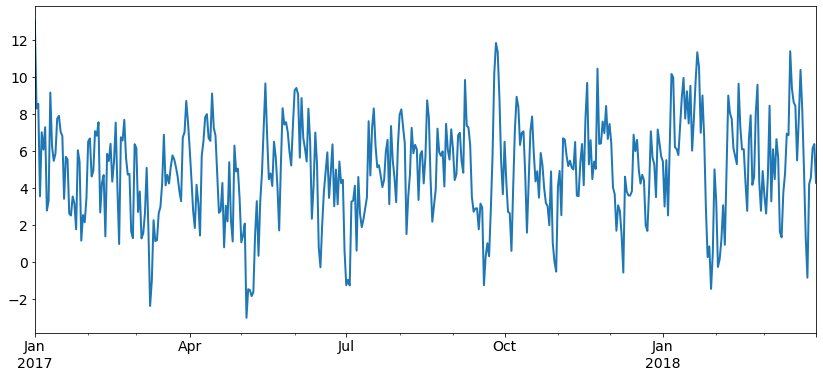

In [2]:
##https://github.com/ericthansen/dsc-arma-models.git
#https://onlinecourses.science.psu.edu/stat510/node/41/

#https://github.com/ericthansen/dsc-arma-models-statsmodels
##todo: fit an ar model and an ma model using statsmodels

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(11225)

# Create a series with the specified dates
dates = pd.date_range('2017-01-01', '2018-03-31')

#generate AR model
error = np.random.normal(0, 2, len(dates))
Y_0 = 8
mu = 5
phi = 0.7

TS = [None] * len(dates)
y = Y_0
for i, row in enumerate(dates):
    TS[i] = mu + y * phi + error[i]
    y = TS[i] - mu
    
#plot
series = pd.Series(TS, index=dates)

series.plot(figsize=(14,6), linewidth=2, fontsize=14);
##look at acf and pacf of model
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(series, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(series, ax=ax, lags=40);

##check the model with arma in statsmodels
# Import ARMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(series, order=(1,0))

##fit
# Fit the model to data
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

##generate a first order MA model

np.random.seed(1234)

# Create a series with the specified dates
dates = pd.date_range('2015-04-01', '2015-08-31')

error = np.random.normal(0, 4, len(dates))
mu = 7
theta = 0.9

TS = [None] * len(dates)
error_prev = error[0]
for i, row in enumerate(dates):
    TS[i] = mu + theta * error_prev + error[i]
    error_prev = error[i]
    
##plot it
series = pd.Series(TS, index=dates)

series.plot(figsize=(14,6), linewidth=2, fontsize=14);

#look at acf/pacf
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(series, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(series, ax=ax, lags=40);

##check it with arma

# Instantiate and fit an MA(1) model to the simulated data
mod_arma = ARMA(series, order=(0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

#woo


In [ ]:
#https://github.com/ericthansen/dsc-arma-models-statsmodels-lab
#dataset import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)

# Preview the dataset
data

##plot it
# Plot the time series
data.plot()

data.plot(figsize=(12,8), linewidth=2, fontsize=12)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Winning times (in seconds)', fontsize=14);

##it's not stationary.  look at diffs
# Difference the time series
data_diff = data.diff().dropna()
data_diff

#look at acf and pacf of differenced TS
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(8,4))
plot_acf(data_diff,ax=ax, lags=9);

# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(8,4))
plot_pacf(data_diff,ax=ax, lags=9);

##try some different combinations for ARMA models
from statsmodels.tsa.arima_model import ARMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

# Fit an ARMA(1,0) model
mod_arma = ARMA(data_diff, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

###
# Fit an ARMA(2,1) model
mod_arma = ARMA(data_diff, order=(2,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

###

# Fit an ARMA(2,2) model
mod_arma = ARMA(data_diff, order=(2,2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

##final model and discussion
# Your comments here
'''They all fit fairly well.  Between the 1,0 and 2,2 models, the 22 has lower(better) AIC while the 10 has better BIC.
So, either could be chosen with good justification.  One could pick the simpler one as a tie breaker.
For fun, I tried some 9,x models but they did not work.'''

#https://github.com/ericthansen/dsc-time-series-models-section-recap
'''The key takeaways from this section include:

A white noise model has a fixed and constant mean and variance, and no correlation over time
A random walk model has no specified mean or variance, but has a strong dependence over time
The Pandas .corr() method can be used to return the correlation between various time series in the DataFrame
Autocorrelation allows us to identify how strongly each time series observation is related to previous observations
The Autocorrelation Function (ACF) is a function that represents autocorrelation of a time series as a function of the time lag
The Partial Autocorrelation Function (or PACF) gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags
ARMA (Autoregressive and Moving Average) modeling is a tool for forecasting time series values by regressing the variable on its own lagged (past) values
ARMA models assume that you've already detrended your data and that there is no seasonality'''

#https://github.com/ericthansen/dsc-nlp-section-intro
#good stuff - Naive Bayesian Classification, bag of words, cleaning/tokenization, stemming/lemmatization, stop words,
#Count vectorization and TF-IDF vectorization
'''TF-IDF stands for Term Frequency-Inverse Document Frequency. It is a combination of two individual metrics, which are the TF and IDF, respectively. TF-IDF is used when we have multiple documents. It is based on the idea that rare words contain more information about the content of a document than words that are used many times throughout all the documents. For instance, if we treated every article in a newspaper as a separate document, looking at the amount of times the word "he" or "she" is used probably doesn't tell us much about what that given article is about -- however, the amount of times "touchdown" is used can provide good signal that the article is probably about sports.

Term Frequency is calculated with the following formula:
https://render.githubusercontent.com/render/math?math=%5Clarge%20%5Ctext%7BTerm%20Frequency%7D(t)%20=%20%5Cfrac%7B%5Ctext%7Bnumber%20of%20times%20t%20appears%20in%20a%20document%7D%7D%7B%5Ctext%7Btotal%20number%20of%20terms%20in%20the%20document%7D%7D
Inverse Document Frequency is calculated with the following formula:
https://render.githubusercontent.com/render/math?math=%5Clarge%20%5Ctext%7BIDF%7D(t)%20=%20log_e(%5Cfrac%7B%5Ctext%7BTotal%20Number%20of%20Documents%7D%7D%7B%5Ctext%7BNumber%20of%20Documents%20with%20t%20in%20it%7D%7D)
The TF-IDF value for a given word in a given document is just found by multiplying the two!'''


In [ ]:
#https://github.com/ericthansen/dsc-word-vectorization-lab 
#there are tools for this, but here it is by hand - I think one of the solution functions is wonky.

import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
np.random.seed(0)

#the corpus
filenames = ['song'+str(num)+'.txt' for num in range(1,21)]
#filenames

songs_df = pd.DataFrame()

# Import and print song11.txt for sample
with open('data/song11.txt') as f:
    test_song = f.readlines()
    print(test_song)
    
##tokenizing the data
def clean_song(song):
    cleaned_song = []
    for line in song:
        if not '[' in line and  not ']' in line:
            for symbol in ",.?!''\n":
                line = line.replace(symbol, '').lower()
            cleaned_song.append(line)

    return cleaned_song

song_without_brackets = clean_song(test_song)
song_without_brackets

##may need to import and download this thing:
# import nltk
# nltk.download('punkt')

def tokenize(song):
    
#     concatsong = ''
#     for line in song:
#         for word in line:
#             concatsong += word
#         concatsong += ' '
#     #that worked, but this is better
    concatsong = ' '.join(song)
    return word_tokenize(concatsong)

tokenized_test_song = tokenize(song_without_brackets)
tokenized_test_song[:10]

##count vectorization - just word frequencies
def count_vectorize(song, vocab=None):
    if vocab:
        word_set = vocab
    else:
        word_set = list(set(song))
    
    song_dict = {i:0 for i in word_set}
    
    for word in song:
        song_dict[word] += 1
    
    return song_dict
test_vectorized = count_vectorize(tokenized_test_song)
print(test_vectorized)

##working toward TF-idf vect
def term_frequency(BoW_dict):
    tot_terms = sum(BoW_dict.values())
    freqs = {i:0 for i in BoW_dict.keys()}
    for k, v in freqs.items():
        freqs[k] = BoW_dict[k]/tot_terms
    return freqs

test = term_frequency(test_vectorized)
#print(test)
print(list(test)[10:20])

def inverse_document_frequency(list_of_dicts):
    tot_docs = len(list_of_dicts)
    unique_words = set()
    for dic in list_of_dicts:
        for k in dic.keys():
            unique_words.add(k)
    full_dic = {i:0 for i in unique_words}
    for word in full_dic.keys():
        num_docs_with_word_in_it = 0
        for dic in list_of_dicts:
            if word in dic.keys():
                num_docs_with_word_in_it += 1
        
        full_dic[word] = np.log((tot_docs/ num_docs_with_word_in_it))
    
    return full_dic
                
    
##computing TF-IDF
            
#solution for reference:  Seems...weird
'''def tf_idf(list_of_dicts):
    # Create empty dictionary containing full vocabulary of entire corpus
    doc_tf_idf = {}
    idf = inverse_document_frequency(list_of_dicts)
    full_vocab_list = {i:0 for i in list(idf.keys())}
    
    # Create tf-idf list of dictionaries, containing a dictionary that will be updated for each document
    tf_idf_list_of_dicts = []
    
    # Now, compute tf and then use this to compute and set tf-idf values for each document
    for doc in list_of_dicts:
        doc_tf = term_frequency(doc)
        for word in doc_tf:
            doc_tf_idf[word] = doc_tf[word] * idf[word]
        tf_idf_list_of_dicts.append(doc_tf_idf)
    
    return tf_idf_list_of_dicts'''
#solution for reference

def tf_idf(list_of_dicts):
    import copy
    idf = inverse_document_frequency(list_of_dicts)
    final_scores = []
    full_vocab_list = {i:0 for i in list(idf.keys())}
    for d in list_of_dicts:
        d_scores = copy.copy(full_vocab_list)
        tf = term_frequency(d)
        for t, tf_score in d.items():
            t_score = idf[t] * tf[t]
            d_scores[t] = t_score
        final_scores.append(d_scores)
    return final_scores
            

    
##vectorizing all docs
def main(filenames):
    cv_all_docs = []
    for fn in filenames:
        #read in song
        with open('data/'+fn) as f:
            song = f.readlines()
        
        #tokenize song
        tok_song = tokenize(clean_song(song))
        
        #convert to bow
        cv_all_docs.append(count_vectorize(tok_song, vocab=None))
    
    tf_idf_all_docs = tf_idf(cv_all_docs)
    return tf_idf_all_docs

tf_idf_all_docs = main(filenames)
print(list(tf_idf_all_docs[0])[:10])

##visualizing
num_dims = len(tf_idf_all_docs[0])
print("Number of Dimensions: {}".format(num_dims))

tf_idf_vals_list = []

for i in tf_idf_all_docs:
    tf_idf_vals_list.append(list(i.values()))
    
tf_idf_vals_list[0][:10]

##
t_sne_object_3d = TSNE(n_components=3)
transformed_data_3d = t_sne_object_3d.fit_transform(tf_idf_vals_list)
transformed_data_3d

##
t_sne_object_2d = TSNE(n_components=2)
transformed_data_2d = t_sne_object_2d.fit_transform(tf_idf_vals_list)
transformed_data_2d

##
##visualize everything
kendrick_3d = transformed_data_3d[:10]
k3_x = [i[0] for i in kendrick_3d]
k3_y = [i[1] for i in kendrick_3d]
k3_z = [i[2] for i in kendrick_3d]

garth_3d = transformed_data_3d[10:]
g3_x = [i[0] for i in garth_3d]
g3_y = [i[1] for i in garth_3d]
g3_z = [i[2] for i in garth_3d]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(k3_x, k3_y, k3_z, c='b', s=60, label='Kendrick')
ax.scatter(g3_x, g3_y, g3_z, c='red', s=60, label='Garth')
ax.view_init(30, 10)
ax.legend()
plt.show()

kendrick_2d = transformed_data_2d[:10]
k2_x = [i[0] for i in kendrick_2d]
k2_y = [i[1] for i in kendrick_2d]

garth_2d = transformed_data_2d[10:]
g2_x = [i[0] for i in garth_2d]
g2_y = [i[1] for i in garth_2d]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(222)
ax.scatter(k2_x, k2_y, c='b', label='Kendrick')
ax.scatter(g2_x, g2_y, c='red', label='Garth')
ax.legend()
plt.show()

##really pretty curious how this was supposed to work and why there's discrepancies in our solutions.


In [ ]:
# https://github.com/ericthansen/dsc-introduction-to-nltk
'''The most common Python library used for NLP tasks is Natural Language Tool Kit, or NLTK for short. This library was developed by researchers at the University of Pennsylvania, and quickly became the most powerful and complete library of NLP tools available.'''

# https://github.com/ericthansen/dsc-introduction-to-regular-expressions
#cheat sheet:
# https://raw.githubusercontent.com/learn-co-curriculum/dsc-introduction-to-regular-expressions/master/images/regex_cheat_sheet.png


In [ ]:
# https://github.com/ericthansen/dsc-regular-expressions-codealong
 # regex tester sites: 
    https://www.regexpal.com/       #this one is pretty good
    https://regexr.com/             #this one is very nice
# the data
import re

with open('menu.txt', 'r') as f:
    file = f.read()

print(file)

pattern = '\d'
p = re.compile(pattern)
digits = p.findall(file)
digits
#
#escaping metacharacters
pattern = '\$\d'
p = re.compile(pattern)
digits = p.findall(file)
digits

# #get digit followed by 3...still doesn't get just what we want
pattern = '\$\d.{3}'
p = re.compile(pattern)
digits = p.findall(file)
digits

#groups ranges and quantifiers
pattern = '[a-zA-Z0-9]'
p = re.compile(pattern)
digits = p.findall(file)
digits

# #the final thing - finding all "prices"
#this is a dollarsign, then 1 or more digits, then 0 or 1 .s, then 0 or more digits.
pattern = '(\$\d+\.?\d*)'
p = re.compile(pattern)
digits = p.findall(file)
digits

##putting it all together
pattern = '(\(\d{3}\) (\d{3}-\d{4}))'
p = re.compile(pattern)
digits = p.findall(file)
digits



In [ ]:
# https://github.com/ericthansen/dsc-feature-engineering-for-text-data
'''In this lesson, we'll focus on the following topics:

Stopword Removal
Frequency Distributions
Stemming and Lemmatization
Bigrams, N-grams, and Mutual Information Score'''

##to get all stopwords from English
from nltk.corpus import stopwords
import string

stopwords_list = stopwords.words('english')

stopwords_list += list(string.punctuation)

##then we can remove them from our data
from nltk import word_tokenize

tokens = word_tokenize(some_text_data)

stopped_tokens = [w.lower() for w in tokens if w not in stopwords_list]

##frequncy dist - basically a dictionary with a few more methods
from  nltk import FreqDist
freqdist = FreqDist(tokens)

most_common = freqdist.most_common(200)

#stemming and lemmatization
'''best stemmer currently: Porter stemmer'''
# http://www.nltk.org/howto/stem.html
    
'''Stemming follows a predetermined set of rules to reduce a word to its stem.
Lemmatization differs from stemming in that it reduces each word down to a linguistically valid lemma, or root word
Lemmatization is generally more complex, but also more accurate.'''

from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemmatizer.lemmatize('feet') # foot
lemmatizer.lemmatize('running') # run
#bigrams
'''Another alternative to tokenization is to instead create Bigrams out of the text. A bigram is just a pair of adjacent words, treated as a single unit.'''
'''Consider the sentence "the dog played outside". If we created bigrams out of this sentence, we would get ('the', 'dog'), ('dog', 'played'), ('played', 'outside')'''
#can do n other than 2, too

'''Another way we can make use of bigrams is to calculate their Pointwise Mutual Information Score. This is a statistical measure from information theory that generally measures the mutual dependence between two words. '''
'''For instance, the bigram ('San', 'Francisco') would likely have a high mutual information score,'''




In [ ]:
# https://github.com/ericthansen/dsc-corpus-statistics-lab

#get corpus
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.collocations import *
from nltk import FreqDist
from nltk import word_tokenize
import string
import re

#needed to download it locally
import nltk
nltk.download('gutenberg')

file_ids = gutenberg.fileids()
file_ids

macbeth_text = gutenberg.raw('shakespeare-macbeth.txt')
macbeth_text[:1000]

#preprocessing
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
macbeth_tokens_raw = nltk.regexp_tokenize(macbeth_text, pattern)
#
macbeth_tokens = [token.lower() for token in macbeth_tokens_raw]
##freq dists
macbeth_freqdist = FreqDist(macbeth_tokens)
macbeth_freqdist.most_common(50)

##removing stopwords
import nltk
nltk.download('stopwords')

#
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += [str(x) for x in range(10)]

macbeth_words_stopped = [w for w in macbeth_tokens if w not in stopwords_list]
#
macbeth_stopped_freqdist = FreqDist(macbeth_words_stopped)
macbeth_stopped_freqdist.most_common(50)
#
#questions about this corpus
#vocab size
len(macbeth_stopped_freqdist)
#$normalized word freq
total_word_count = sum(macbeth_stopped_freqdist.values())
macbeth_top_50 = macbeth_stopped_freqdist.most_common(50)
print('Word\t\t\tNormalized Frequency')
for word in macbeth_top_50:
    normalized_frequency = macbeth_stopped_freqdist[word[0]]/total_word_count
    print('{} \t\t\t {:.4}'.format(word[0], normalized_frequency))
    
#creating bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()
macbeth_finder = BigramCollocationFinder.from_words(macbeth_words_stopped)
macbeth_scored = macbeth_finder.score_ngrams(bigram_measures.raw_freq)
# Display the first 50 elements of macbeth_scored
macbeth_scored[:50]

##mutual information scores
macbeth_pmi_finder = BigramCollocationFinder.from_words(macbeth_words_stopped)
macbeth_pmi_finder.apply_freq_filter(5)
macbeth_pmi_scored = macbeth_pmi_finder.score_ngrams(bigram_measures.pmi)
macbeth_pmi_scored[:50]

##cool!




In [ ]:
# https://github.com/ericthansen/dsc-context-free-grammars-and-POS-tagging
# very cool lesson on CFG; not much to copy/paste though -just reread if necessary
# https://github.com/ericthansen/dsc-context-free-grammars-codealong
#generating a cfg
import nltk
groucho_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")

#
parser = nltk.ChartParser(groucho_grammar)
#create parse trees
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
for tree in parser.parse(sent):
    print(tree)

#parsing a sentence
# Step 1
grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 
VP -> V NP | VP PP
Det -> 'the'
Adj -> '100m'
N -> 'usain_bolt' | 'record' | 
V -> 'broke'
P -> 
""")

# Step 2
from nltk import word_tokenize
sent = 'usain_bolt broke the 100m record'
# Step 3
tokenized_sent = word_tokenize(sent)

# Step 4
parser = nltk.ChartParser(grammar)

# Step 5
for tree in parser.parse(tokenized_sent):
    print(tree)
#note this didn't print anything bc we don't have enough rules in our grammar yet    

#by analyzing the grammar for the Usain Bolt sentence, we can come up with this:
grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N PP | N | Det NP | Adj NP
VP -> V NP | VP PP
Det -> 'the'
Adj -> '100m'
N -> 'usain_bolt' | 'record' | 
V -> 'broke'
P -> 
""")

parser = nltk.ChartParser(grammar)
#
for tree in parser.parse(tokenized_sent):
    print(tree)
#this works but generates lots of extra trees

#generating tags with NLTK
nltk.pos_tag(tokenized_sent)
#note that NLTK uses the Penn Tree Bank for parts of speech:
# https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html


In [ ]:
##https://github.com/ericthansen/dsc-text-classification
## just a bunch of things to consider, not a lot of theory or code
'''Do we remove stop words or not?
Do we stem or lemmatize our text data, or leave the words as is?
Is basic tokenization enough, or do we need to support special edge cases through the use of regex?
Do we use the entire vocabulary, or just limit the model to a subset of the most frequently used words? If so, how many?
Do we engineer other features, such as bigrams, or POS tags, or Mutual Information Scores?
What sort of vectorization should we use in our model? Boolean Vectorization? Count Vectorization? TF-IDF? More advanced vectorization strategies such as Word2Vec?
These are all questions that we'll need to think about pretty much anytime we begin working with text data.'''

In [ ]:
#https://github.com/ericthansen/dsc-text-classification-lab

#Getting started
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
import numpy as np
np.random.seed(0)

##pick some categories
categories = ['alt.atheism', 'comp.windows.x', 'rec.sport.hockey', 'sci.crypt', 'talk.politics.guns']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

##store data and targets
data = newsgroups_train.data
target = newsgroups_train.target
label_names = newsgroups_train.target_names
label_names

#check shape
# Your code here
newsgroups_train.filenames.shape

# stop words
stopwords_list = stopwords.words('english') + list(string.punctuation)
extras = ["''", '""', '...', '``']
stopwords_list += extras
#stopwords_list

#make a process function
def process_article(article):
    tokens = nltk.word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return stopwords_removed   

##clever use of map function builtin
processed_data = list(map(process_article, data))

#
processed_data[0]
##getting total vocab
total_vocab = set()
for article in processed_data:
    total_vocab.update(article)
len(total_vocab)

##exploring with freq dists

articles_concat = []
for article in processed_data:
    articles_concat += article
    
articles_freqdist = FreqDist(articles_concat)
articles_freqdist.most_common(200)

##vectorizing with tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

tf_idf_data_train = vectorizer.fit_transform(data)

tf_idf_data_test = vectorizer.transform(newsgroups_test.data)

##modelling
# Your code here
tf_idf_data_train.shape

##checking avg # of zeroes in a column - this shows sparsity; and that articles don't really use that
#high percentage of the vocab vector
non_zero_cols = tf_idf_data_train.nnz / float(tf_idf_data_train.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tf_idf_data_train.shape[1]))
print('Percentage of columns containing 0: {}'.format(percent_sparse))

##create naive bayes and random forests
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100)

nb_classifier.fit(tf_idf_data_train, target)
nb_train_preds = nb_classifier.predict(tf_idf_data_train)
nb_test_preds = nb_classifier.predict(tf_idf_data_test)

rf_classifier.fit(tf_idf_data_train, target)
rf_train_preds = rf_classifier.predict(tf_idf_data_train)
rf_test_preds = rf_classifier.predict(tf_idf_data_test)
#
nb_train_score = accuracy_score(target, nb_train_preds)
nb_test_score = accuracy_score(newsgroups_test.target, nb_test_preds)
rf_train_score = accuracy_score(target, rf_train_preds)
rf_test_score = accuracy_score(newsgroups_test.target, rf_test_preds)

print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")
print('-'*70)
print("")
print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))

##interpret
# Your answer here
'''model fit is pretty good.  Random guessing would only give .20.  There is probably some over-fitting, especially for the 
RF model.'''




In [ ]:
#https://github.com/ericthansen/dsc-nlp-section-recap
'''The key takeaways from this section include:

NLP has become increasingly popular over the past few years, and NLP researchers have achieved very insightful insights
The Natural Language Tool Kit (NLTK) is one of the most popular Python libraries for NLP
Regular Expressions are an important part of NLP, which can be used for pattern matching and filtering
Regular Expressions can become confusing, so make sure to use our provided cheat sheet the first few times you work with regex
It is strongly recommended you take some time to use regex tester websites to ensure you understand how changing your regex pattern affects your results when working towards a correct answer!
Feature Engineering is essential when working with text data, and to understand the dynamics of your text
Common feature engineering techniques are removing stop words, stemming, lemmatization, and n-grams
When diving deeper into grammar and linguistics, context-free grammars and part-of-speech tagging is important
In this context, parse trees can help computers when dealing with ambiguous words
How you clean and preprocess your data will have a major effect on the conclusions you'll be able to draw in your NLP classification problems
'''

In [ ]:
# https://github.com/ericthansen/dsc-neural-networks-section-intro
# https://github.com/ericthansen/dsc-introduction-to-neural-networks
# https://towardsdatascience.com/multi-layer-neural-networks-with-sigmoid-function-deep-learning-for-rookies-2-bf464f09eb7f
# https://playground.tensorflow.org/


# https://github.com/ericthansen/dsc-introduction-to-neural-networks-lab
#import pkgs
!pip install pillow

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os

#data
# Directory path
train_data_dir = 'data/train'
test_data_dir = 'data/validation'

# Get all the data in the directory data/validation (132 images), and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), batch_size=132)

# Get all the data in the directory data/train (790 images), and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), batch_size=790)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)


#inspect and prepare
# Preview an image
array_to_img(train_images[7])
# Preview another image
array_to_img(train_images[29])

#shape of the data
# Preview the shape of both the images and labels for both the train and test sets (4 objects total)
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

# Reshape the train images 
train_img_unrow = train_images.reshape(790, -1).T

# Preview the shape of train_img_unrow
np.shape(train_img_unrow)

# Define appropriate m 
m = 132
test_img_unrow = test_images.reshape(m, -1).T

# Preview the shape of test_img_unrow
np.shape(test_img_unrow)

##train labels and test labels
# Run this cell; no need to edit
train_labels 
'''Having this information, we still don't know which pair corresponds with santa versus not_santa. Luckily, this was 
stored using keras.preprocessing_image, and you can get more info using the command train_generator.class_indices.'''

# Run this cell; no need to edit
train_generator.class_indices 

# Your code here
train_labels_final = train_labels.T[[1]]

# Run this cell; no need to edit
np.shape(train_labels_final) 

# Your code here
test_labels_final = test_labels.T[[1]]

# Run this cell; no need to edit
np.shape(test_labels_final) 

##check
# Preview train image at index 240
array_to_img(train_images[240])

# Preview train label at index 240
train_labels_final[:,240]

##standardize the data
# Your code here 
train_img_final = train_img_unrow/255
test_img_final = test_img_unrow/255

type(test_img_unrow)

##build a logistic regression based NN
# init b
# Your code here
b=0

#init w
# Define your function
def init_w(n):
    w = np.zeros((n, 1))
    return w
# Call your function using appropriate parameters
w = init_w(64*64*3)
##forward prop
# Define the propagation function
def propagation(w, b, x, y):
    l = x.shape[1]
    y_hat = 1/(1 + np.exp(- (np.dot(w.T, x) + b)))                                  
    cost = -(1/l) * np.sum(y * np.log(y_hat) + (1-y)* np.log(1 - y_hat))    
    djdw = (1/l) * np.dot(x,(y_hat - y).T)
    djdb = (1/l) * np.sum(y_hat - y)
    return djdw, djdb, cost

# Use the propogation function
dw, db, cost = propagation(w, b, train_img_final, train_labels_final)

print(dw)

print(db)

print(cost)

##optimization
# Complete the function below using your propagation function to define dw, db and cost 
# Then use the formula above to update w and b in the optimization function 
def optimization(w, b, x, y, num_iterations, learning_rate, print_cost = False):
    
    costs = []
    
    for i in range(num_iterations):
        dw, db, cost = propagation(w, b, x, y)
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        # Record the costs and print them every 50 iterations
        if i % 50 == 0:
            costs.append(cost)
        if print_cost and i % 50 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return w, b, costs

# Run this block of code as is
w, b, costs = optimization(w, b, train_img_final, train_labels_final, 
                           num_iterations= 151, learning_rate = 0.0001, print_cost = True)
#EH: do note that changing the learning rate to .001 gives better results

##label prediction - santa or not
def prediction(w, b, x):
    l = x.shape[1]
    y_prediction = np.zeros((1, l))
    w = w.reshape(x.shape[0], 1)
    y_hat = 1/(1 + np.exp(- (np.dot(w.T, x) + b))) 
    p = y_hat
    
    for i in range(y_hat.shape[1]):
        # Transform the probability into a binary classification using 0.5 as the cutoff
        if (y_hat[0,i] > 0.5): 
            y_prediction[0, i] = 1
        else:
            y_prediction[0, i] = 0
    return y_prediction

##try it on a small example
# Run this block of code as is
w = np.array([[0.035], [0.123], [0.217]])
b = 0.2
x = np.array([[0.2, 0.4, -1.2, -2], 
              [1, -2., 0.1, -1], 
              [0.2, 0.4, -1.2, -2]])

prediction(w, b, x)

##the overall model
# Review this code carefully
def model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    b = 0
    w = init_w(np.shape(x_train)[0]) 

    # Gradient descent (≈ 1 line of code)
    w, b, costs = optimization(w, b, x_train, y_train, num_iterations, learning_rate, print_cost)
    
    y_pred_test = prediction(w, b, x_test)
    y_pred_train = prediction(w, b, x_train)

    # Print train/test errors
    print('train accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_train - y_train)) * 100))
    print('test accuracy: {} %'.format(100 - np.mean(np.abs(y_pred_test - y_test)) * 100))

    output = {'costs': costs, 
              'y_pred_test': y_pred_test,  
              'y_pred_train' : y_pred_train,  
              'w' : w, 
              'b' : b, 
              'learning_rate' : learning_rate, 
              'num_iterations': num_iterations}
    
    return output

# Run the model!
# ⏰ Expect your code to take several minutes to run
output = model(train_img_final, train_labels_final, test_img_final, test_labels_final,
               num_iterations=2000, learning_rate=0.005, print_cost=True)

'''
Cost after iteration 1950: 0.161424
train accuracy: 96.9620253164557 %
test accuracy: 75.0 %
'''


In [ ]:
# https://github.com/ericthansen/dsc-introduction-to-keras
# quick ref:
#unrowing a matrix:
img_unrow = img.reshape(790, -1).T  
#increasing the rank given a vector with np.shape() (790,)
np.reshape(vector, (1,790)) 

###tensor slicing
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline  

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[10] # Select an arbitrary case for our example

# Checking the shape of our tensor (in this case, the image)
print('Raw Tensor shape:', train_images.shape)

# Now performing some slices of our image:
print('Tensor Slice [0:100] shape:', train_images[:100].shape)

# Equivalently
print('Tensor Slice [0:100] shape:', train_images[:100, :, :].shape)

# Or verbosely:
print('Tensor Slice [0:100] shape:', train_images[:100, :28, :28].shape)

# Display an example image for context
plt.imshow(digit, cmap=plt.cm.binary) 
plt.show()

## taking, for example, only the lower right quadrant of every image in the set
lower_right_quadrant = train_images[:,14:,14:]
print('Sliced tensor shape (includes all images but only the lower right hand corner of each:',
      lower_right_quadrant.shape)
plt.imshow(lower_right_quadrant[10], cmap=plt.cm.binary) # Display the 10th image from our sliced tensor
plt.show()

##tensor operations
#element wise    
#broadcasting
#tensor dot
import numpy as np
np.array([1, 2, 3, 4]) + np.array([5, 6, 7, 8])
##broadcasting works with tensors of different size
A = np.array(range(12)).reshape(4,3)
print('A:\n', A, '\n')

B = np.array([1, 2, 3]) #.reshape(1, -1)
print('B:', B, '\n')

A += B # Update with broadcasting
print('Updated A:\n', A)

##
# Recall that B is the vector [1, 2, 3]
# Taking the dot product of B and itself is equivalent to
# 1*1 + 2*2 + 3*3 = 1 + 4 + 9 = 14
print(np.dot(B,B))
##or slightly more complicated
A = np.array(range(12)).reshape(4, 3)
print('A:\n', A, '\n')

B = np.array([1,2,3]) #.reshape(1, -1)
print('B:', B, '\n')

np.dot(A, B)
#i.e. standard matrix mult by vector

##
##build a Neural Net with Keras
from keras import models
from keras import layers
from keras import optimizers

##decide on net architecture
model = models.Sequential()

##add layers
model.add(layers.Dense(units, activation, input_shape))

##compile the model
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='mse',
              metrics=['accuracy'])

##train the model
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
## woo, remmeber batches!  fun.
'''Sample: one element of a dataset.

Example: one image is a sample in a convolutional network
Example: one audio file is a sample for a speech recognition model
Batch: a set of  𝑁  samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.

A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).

Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.

When using validation_data or validation_split with the .fit() method of Keras models, evaluation will be run at the end of every epoch.

Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).'''
#plotting
history.history

history.history['loss']
history.history['accuracy']

##make predictions
y_hat = model.predict(x)

##eval the model
model.evaluate(X_train, X_train_labels)

#
model.evaluate(X_test, X_test_labels)

#
https://keras.io/getting-started/
https://keras.io/getting-started/sequential-model-guide/#compilation
https://www.coursera.org/learn/deep-neural-network/lecture/BhJlm/rmsprop
https://www.coursera.org/learn/deep-neural-network/lecture/qcogH/mini-batch-gradient-descent
A full book on Keras by the author of Keras himself:
https://www.manning.com/books/deep-learning-with-python





In [ ]:
# https://github.com/ericthansen/dsc-introduction-to-keras-lab
# setup packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import optimizers
##load data
# Import data
df = pd.read_csv('Bank_complaints.csv')

# Inspect data
print(df.info())
df.head()

# Your code here
df['Product'].value_counts(normalize=True)

# As a quick preliminary, briefly review the docstring for keras.preprocessing.text.Tokenizer
Tokenizer?

# ⏰ This cell may take about thirty seconds to run

# Raw text complaints
complaints = df['Consumer complaint narrative'] 

# Initialize a tokenizer 
tokenizer = Tokenizer(num_words=2000) 

# Fit it to the complaints
tokenizer.fit_on_texts(complaints) 

# Generate sequences
sequences = tokenizer.texts_to_sequences(complaints) 
print('sequences type:', type(sequences))

# Similar to sequences, but returns a numpy array
one_hot_results= tokenizer.texts_to_matrix(complaints, mode='binary') 
print('one_hot_results type:', type(one_hot_results))

# Useful if we wish to decode (more explanation below)
word_index = tokenizer.word_index 

# Tokens are the number of unique words across the corpus
print('Found %s unique tokens.' % len(word_index)) 

# Our coded data
print('Dimensions of our coded results:', np.shape(one_hot_results)) 


##reverse entries of dictionary
# Your code here
reverse_index = {}
for k, v in word_index.items():
    reverse_index[v] = k
#word_index.items()
##this also works:
##reverse_index = dict([(value, key) for (key, value) in word_index.items()])

##decoding our word vectors
comment_idx_to_preview = 19
print('Original complaint text:')
print(complaints[comment_idx_to_preview])
print('\n\n')

# The reverse_index cell block above must be complete in order for this cell block to successively execute 
decoded_review = ' '.join([reverse_index.get(i) for i in sequences[comment_idx_to_preview]])
print('Decoded review from Tokenizer:')
print(decoded_review)


###convert products to numerical cats
product = df['Product']

# Initialize
le = preprocessing.LabelEncoder() 
le.fit(product)
print('Original class labels:')
print(list(le.classes_))
print('\n')
product_cat = le.transform(product)  

# If you wish to retrieve the original descriptive labels post production
# list(le.inverse_transform([0, 1, 3, 3, 0, 6, 4])) 

print('New product labels:')
print(product_cat)
print('\n')

# Each row will be all zeros except for the category for that observation 
print('One hot labels; 7 binary columns, one for each of the categories.') 
product_onehot = to_categorical(product_cat)
print(product_onehot)
print('\n')

print('One hot labels shape:')
print(np.shape(product_onehot))

###train test split
random.seed(123)
test_index = random.sample(range(1,10000), 1500)

test = one_hot_results[test_index]
train = np.delete(one_hot_results, test_index, 0)

label_test = product_onehot[test_index]
label_train = np.delete(product_onehot, test_index, 0)

print('Test label shape:', np.shape(label_test))
print('Train label shape:', np.shape(label_train))
print('Test shape:', np.shape(test))
print('Train shape:', np.shape(train))

###building the network
# Initialize a sequential model
model = models.Sequential()

# Two layers with relu activation
model.add(layers.Dense(50, activation='relu', input_shape=(2000,)))
model.add(layers.Dense(25, activation='relu'))

# One layer with softmax activation 
model.add(layers.Dense(7, activation='softmax'))

##compiling the model
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='SGD'
             ,metrics=['acc'])

##training the model
# Train the model 
history = model.fit(train,
                    label_train,
                    epochs=120,
                    batch_size=256)

##check out the history characteristic
history_dict = history.history
history_dict.keys()

##plot results!!
# Plot the loss vs the number of epoch
loss_values = history_dict['loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training accuracy vs the number of epochs
loss_values = history_dict['acc']
plt.plot(epochs, loss_values, 'g', label='Training accuracy')

plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###make predictions
# Output (probability) predictions for the test set 
y_hat_test = model.predict(test)

##evaluate performance
# Print the loss and accuracy for the training set 
results_train = model.evaluate(train, label_train)
results_train

# Print the loss and accuracy for the test set 
results_test = model.evaluate(test, label_test)
results_test

#groovy!


# https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb
# https://catalog.data.gov/dataset/consumer-complaint-database

#https://github.com/ericthansen/dsc-neural-networks-section-recap
'''The key takeaways from this section include:

Neural networks are powerful models that can be customized and tweaked using various amounts of nodes, layers, ...
The most basic neural networks are single-layer densely connected neural networks, which have very similar properties as logistic regression models
Compared to more traditional statistics and ML techniques, neural networks perform particularly well when using unstructured data
Apart from densely connected networks, other types of neural networks include convolutional neural networks, recurrent neural networks, and generative adversarial neural networks
When working with image data, it's important to understand how image data is stored when working with them in Python
Logistic regression can be seen as a single-layer neural network with a sigmoid activation function
Neural networks use loss and cost functions to minimize the "loss", which is a function that summarizes the difference between the actual outcome (eg. pictures contain santa or not) and the model prediction (whether the model correctly identifies pictures with santas)
Backward and forward propagation are used to estimate the so-called "model weights"
Adding more layers to neural networks can substantially increase model performance
Several activations can be used in model nodes, you can explore with different types and evaluate how it affects performance'''


In [ ]:
# https://github.com/ericthansen/dsc-deep-learning-section-intro

# https://github.com/ericthansen/dsc-deeper-neural-networks

#activation functions
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x, derivative=False):
    f = 1 / (1 + np.exp(-x))
    if (derivative == True):
        return f * (1 - f)
    return f

def tanh(x, derivative=False):
    f = np.tanh(x)
    if (derivative == True):
        return (1 - (f ** 2))
    return np.tanh(x)

def relu(x, derivative=False):
    f = np.zeros(len(x))
    if (derivative == True):
        for i in range(0, len(x)):
            if x[i] > 0:
                f[i] = 1  
            else:
                f[i] = 0
        return f
    for i in range(0, len(x)):
        if x[i] > 0:
            f[i] = x[i]  
        else:
            f[i] = 0
    return f

def leaky_relu(x, leakage = 0.05, derivative=False):
    f = np.zeros(len(x))
    if (derivative == True):
        for i in range(0, len(x)):
            if x[i] > 0:
                f[i] = 1  
            else:
                f[i] = leakage
        return f
    for i in range(0, len(x)):
        if x[i] > 0:
            f[i] = x[i]  
        else:
            f[i] = x[i]* leakage
    return f

def arctan(x, derivative=False):
    if (derivative == True):
        return 1/(1+np.square(x))
    return np.arctan(x)

z = np.arange(-10, 10, 0.2)

##sigmoid function
y = sigmoid(z)
dy = sigmoid(z, derivative=True)
plt.title('sigmoid')
plt.axhline(color='gray', linewidth=1,)
plt.axvline(color='gray', linewidth=1,)
plt.plot(z, y, 'r', label='original (y)')
plt.plot(z, dy, 'b', label='derivative (dy)')
plt.legend();

##tanh function
y = tanh(z)
dy = tanh(z, derivative=True)
plt.title('tanh')
plt.axhline(color='gray', linewidth=1,)
plt.axvline(color='gray', linewidth=1,)
plt.plot(z, y, 'r', label='original (y)')
plt.plot(z, dy, 'b', label='derivative (dy)')
plt.legend();

##arctan function
y = arctan(z)
dy = arctan(z, derivative = True)
plt.title('arctan')
plt.axhline(color='gray', linewidth=1,)
plt.axvline(color='gray', linewidth=1,)
plt.plot(z, y, 'r', label='original (y)')
plt.plot(z, dy, 'b', label='derivative (dy)')
plt.legend();

#rectified linear unit (relu)
plt.title('ReLU')
y = relu(z)
dy = relu(z, derivative=True)
plt.axhline(color='gray', linewidth=1,)
plt.axvline(color='gray', linewidth=1,)
plt.plot(z, y, 'b', label='original (y)')
plt.plot(z, dy, 'r', label='derivative (dy)')
plt.legend();

##leaky relu
# the default leakage here is 0.05!
y = leaky_relu(z)
dy = leaky_relu(z, derivative=True)
plt.axhline(color='gray', linewidth=1,)
plt.axvline(color='gray', linewidth=1,)
plt.title('leaky ReLU')
plt.xlim(-10,10)
plt.plot(z, y, 'r', label='original (y)')
plt.plot(z, dy, 'b', label='derivative (dy)')
plt.legend();

# https://dashee87.github.io/data%20science/deep%20learning/visualising-activation-functions-in-neural-networks/


In [ ]:
# https://github.com/ericthansen/dsc-deeper-neural-networks-lab

#getting started
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler, LabelBinarizer

##load 
bc_dataset = load_breast_cancer()
data = bc_dataset.data
target = bc_dataset.target
col_names = bc_dataset.feature_names

##inspect

df = pd.DataFrame(data, columns=col_names)
df.head()

#prep for deep learning
df.info()
#good, it's numeric.  check if it needs to be normalized
df.head()

##yes it does
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

##binarizing the labels
binarizer = LabelBinarizer()
labels = binarizer.fit_transform(target)

##building the MLP (multi layer perceptron)
model_1 = Sequential()
model_1.add(Dense(10, activation='tanh', input_shape=(30,)))
model_1.add(Dense(1, activation='sigmoid'))

##compiling
model_1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])

##fitting the model
results_1 = model_1.fit(scaled_data, labels, epochs=25, batch_size=1, validation_split=0.2)

##create a function for visualizing

def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
visualize_training_results(results_1)

##detecting overfitting
#iterating on the model - more layers
model_2 = Sequential()
model_2.add(Dense(10, activation='tanh', input_shape=(30,)))
model_2.add(Dense(5, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])
results_2 = model_2.fit(scaled_data, labels, epochs=25, batch_size=1, validation_split=0.2)

visualize_training_results(results_2)
#results not that much better - need more training data

##visualizing why we normalize
model_3 = Sequential()
model_3.add(Dense(5, activation='tanh', input_shape=(30,)))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])
results_3 = model_3.fit(data, labels, epochs=25, batch_size=1, validation_split=0.2)
#result - both train and validation sets are much lower.


In [ ]:
# https://github.com/ericthansen/dsc-image-classification-with-mlps
# https://www.coursera.org/learn/neural-networks-deep-learning/lecture/rz9xJ/why-deep-representations
    
# https://github.com/ericthansen/dsc-image-classification-with-mlps-lab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #This prevents kernel shut down due to xgboost conflict

#data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

##look at sample img
sample_image = X_train[0]
sample_label = y_train[0]
display(plt.imshow(sample_image))
print('Label: {}'.format(sample_label))

##preprocessing - need to ensure dimensions fit
sample_image

print(X_train.shape)
print(X_test.shape)

X_train = X_train.reshape(60000, 28*28).astype('float32')
X_test = X_test.reshape(10000, 28*28).astype('float32')

print(X_train.shape)
print(X_test.shape)

##normalizing img data
X_train /= 255.
X_test /= 255.

####preprocess labels
y_train[:10]

##onehot encode the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

##examine label on first img
display(y_train[0])

###building model
model_1 = Sequential()
model_1.add(Dense(64, activation='tanh', input_shape=(784,)))
model_1.add(Dense(10, activation='softmax'))

##compile, note parameters
model_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

model_1.summary()

##fit, get results
results_1 = model_1.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

##visualize!  reuse vis function from before
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    
visualize_training_results(results_1)

##make bigger model
model_2 = Sequential()
model_2.add(Dense(64, activation='tanh', input_shape=(784,)))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(10, activation='softmax'))

model_2.summary()

model_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

results_2 = model_2.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test))

visualize_training_results(results_2)


##tune the  activation function - change tanh to relu
model_3 = Sequential()
model_3.add(Dense(64, activation='relu', input_shape=(784,)))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(10, activation='softmax'))

model_3.summary()

model_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

results_3 = model_3.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

visualize_training_results(results_3)





In [ ]:
# https://github.com/ericthansen/dsc-deep-learning-section-recap
'''Key Takeaways
The key takeaways from this section include:

Deep neural network representations can lighten the burden and automate certain tasks of heavy data preprocessing
Deep representations need exponentially fewer hidden units than shallow networks, to obtain the same performance
Parameter initialization, forward propagation, cost function evaluation, and backward propagation are again the cornerstones of deep networks
Tensors are the building blocks of neural networks and a good understanding of them and how to use them in Python is crucial
Scalars can be seen as 0-D tensors. Vectors can be seen as 1-D tensors, and matrices as 2-D tensors
The usage of tensors reaches beyond matrices: tensors can have N dimensions
Tensors can be created and manipulated using Numpy
Keras makes building neural networks in Python easy, and you learned how to do that in this section
You can use Keras to do some NLP as well, e.g. for tokenization'''



In [ ]:
# https://github.com/ericthansen/dsc-tuning-neural-networks-intro
# regularization, l1/l2, 
#normalization helps vs getting stuck in local min
#other optimization vs local mins


In [7]:
#a quick aside about frobenius norm
#frob norm(A) = sqrt(sum of squares of all entries of matrix)
            # = sqrt (trace(A* A)) ; A* is conjugate transpose, trace is sum of diagonal entries
            # = sqrt (sum of squares of singular values of A)
#let A = [[1,2],[3,4]]
#1) sqrt(1 + 4 + 9 + 16) = sqrt(30)
#2) A*A = [[10,14],[14,20]]; sqrt(10+20)
from numpy.linalg import svd
u, s, v = svd([[1,2],[3,4]])
tot = 0
print("s:",s)
for val in s:
    tot += val**2
print(tot**0.5)
print(30**0.5)
#yay

s: [5.4649857  0.36596619]
5.477225575051661


In [ ]:
# https://github.com/ericthansen/dsc-tuning-neural-networks-with-regularization
#loss function with l2 reg:
# https://render.githubusercontent.com/render/math?math=J%20(w%5E%7B%5B1%5D%7D,b%5E%7B%5B1%5D%7D,...,w%5E%7B%5BL%5D%7D,b%5E%7B%5BL%5D%7D)%20=%20%5Cdfrac%7B1%7D%7Bm%7D%20%20%5Cdisplaystyle%5Csum%5Em_%7Bi=1%7D%5Cmathcal%7BL%7D(%5Chat%20y%5E%7B(i)%7D,%20y%5E%7B(i)%7D)%2b%20%5Cdfrac%7B%5Clambda%7D%7B2m%7D%20%5Cdisplaystyle%5Csum%5EL_%7Bl=1%7D%7C%7Cw%5E%7B%5Bl%5D%7D%7C%7C%5E2
# https://render.githubusercontent.com/render/math?math=%7C%7Cw%5E%7B%5Bl%5D%7D%7C%7C%5E2%20=%20%20%5Cdisplaystyle%5Csum%5E%7Bn%5E%7B%5Bl-1%5D%7D%7D_%7Bi=1%7D%20%20%5Cdisplaystyle%5Csum%5E%7Bn%5E%7B%5Bl%5D%7D%7D_%7Bj=1%7D%20(w_%7Bij%7D%5E%7B%5Bl%5D%7D)%5E2
# This matrix norm is called the "Frobenius norm", also referred to as ||w_ij^[l]||^2
# L2-regularization is called weight decay, because regularization will make your load smaller
# hence your weights will become smaller by a factor (1-alpha*lambda/m).

#drop out regularization
#http://www.jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
#in keras, specifiy dropout layers between layers, e.g.
model = models.Sequential()
model.add(layers.Dense(5, activation='relu', input_shape=(500,)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))




In [ ]:
# https://github.com/ericthansen/dsc-tuning-neural-networks-with-regularization-lab-v2-1
##load the data
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)


# Load and preview the dataset
df = pd.read_csv('Bank_complaints.csv')
df.head()
'''Preprocessing Overview
Before you begin to practice some of your new tools such as regularization and optimization, let's practice munging some data as you did in the previous section with bank complaints. Recall some techniques:

Sampling in order to reduce training time (investigate model accuracy vs data size later on)
Train - test split
One-hot encoding your complaint text
Transforming your category labels'''

##preproc: generate random sample
# Downsample the data
df_sample = df.sample(10000, random_state=123)

# Split the data into X and y
y = df_sample['Product']
X = df_sample['Consumer complaint narrative']
##prproc: traintest split
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1500, random_state=42)

##validation set
# Split the data into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=1000, random_state=42)

##preproc -onehot encode the complaints
# Use one-hot encoding to reformat the complaints into a matrix of vectors 
# Only keep the 2000 most common words 

tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X_train_final)

X_train_tokens = tokenizer.texts_to_matrix(X_train_final, mode='binary')
X_val_tokens = tokenizer.texts_to_matrix(X_val, mode='binary')
X_test_tokens = tokenizer.texts_to_matrix(X_test, mode='binary')

##preproc: encode the products
# Transform the product labels to numerical values
lb = LabelBinarizer()
lb.fit(y_train_final)

y_train_lb = to_categorical(lb.transform(y_train_final))[:, :, 1]
y_val_lb = to_categorical(lb.transform(y_val))[:, :, 1]
y_test_lb = to_categorical(lb.transform(y_test))[:, :, 1]

##baseline model
# Build a baseline neural network model using Keras
random.seed(123)
from keras import models
from keras import layers
baseline_model = models.Sequential()
baseline_model.add(layers.Dense(50, activation='relu', input_shape=(2000,)))
baseline_model.add(layers.Dense(25, activation='relu'))
baseline_model.add(layers.Dense(7, activation='softmax'))


##compile
# Compile the model
baseline_model.compile(optimizer='SGD', 
                       loss='categorical_crossentropy', 
                       metrics=['acc'])

#train the model
# Train the model
baseline_model_val = baseline_model.fit(X_train_tokens, 
                                        y_train_lb, 
                                        epochs=150, 
                                        batch_size=256, 
                                        validation_data=(X_val_tokens, y_val_lb))


##model performance
# Access the history attribute and store the dictionary
baseline_model_val_dict = baseline_model_val.history

# Print the keys
baseline_model_val_dict.keys()

##evaluate it on training data
results_train = baseline_model.evaluate(X_train_tokens, y_train_lb)
print('----------')
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')

##evaluate on test data
results_test = baseline_model.evaluate(X_test_tokens, y_test_lb)
print('----------')
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')

##plot
# Loss vs number of epochs with train and validation sets
fig, ax = plt.subplots(figsize=(12, 8))

loss_values = baseline_model_val_dict['loss']
val_loss_values = baseline_model_val_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
ax.plot(epochs, loss_values, label='Training loss')
ax.plot(epochs, val_loss_values, label='Validation loss')

ax.set_title('Training & validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend();

##plot training & val accuracy
# Accuracy vs number of epochs with train and validation sets
fig, ax = plt.subplots(figsize=(12, 8))

acc_values = baseline_model_val_dict['acc'] 
val_acc_values = baseline_model_val_dict['val_acc']

ax.plot(epochs, acc_values, label='Training acc')
ax.plot(epochs, val_acc_values, label='Validation acc')
ax.set_title('Training & validation accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend();

##early stopping - helps against overfitting
random.seed(123)
model_2 = models.Sequential()
model_2.add(layers.Dense(50, activation='relu', input_shape=(2000,)))
model_2.add(layers.Dense(25, activation='relu'))
model_2.add(layers.Dense(7, activation='softmax'))

model_2.compile(optimizer='SGD', 
                loss='categorical_crossentropy', 
                metrics=['acc'])

# Import EarlyStopping and ModelCheckpoint
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the callbacks
early_stopping = [EarlyStopping(monitor='val_loss', patience=10), 
                  ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

#@#train model 2
model_2_val = model_2.fit(X_train_tokens, 
                          y_train_lb, 
                          epochs=150, 
                          callbacks=early_stopping, 
                          batch_size=256, 
                          validation_data=(X_val_tokens, y_val_lb))
##load the best model
# Load the best (saved) model

from keras.models import load_model
saved_model = load_model('best_model.h5')

##use best model to find train/test acc
results_train = saved_model.evaluate(X_train_tokens, y_train_lb)
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')

print('----------')

results_test = saved_model.evaluate(X_test_tokens, y_test_lb)
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')

##l2 regularization
# Import regularizers
from keras import regularizers
random.seed(123)
L2_model = models.Sequential()

# Add the input and first hidden layer
L2_model.add(layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.005), input_shape=(2000,)))

# Add another hidden layer
L2_model.add(layers.Dense(25, kernel_regularizer=regularizers.l2(0.005), activation='relu'))

# Add an output layer
L2_model.add(layers.Dense(7, activation='softmax'))

# Compile the model
L2_model.compile(optimizer='SGD', 
                 loss='categorical_crossentropy', 
                 metrics=['acc'])

# Train the model 
L2_model_val = L2_model.fit(X_train_tokens, 
                            y_train_lb, 
                            epochs=150, 
                            batch_size=256, 
                            validation_data=(X_val_tokens, y_val_lb))

##inspect
# L2 model details
L2_model_dict = L2_model_val.history
L2_acc_values = L2_model_dict['acc'] 
L2_val_acc_values = L2_model_dict['val_acc']

# Baseline model
baseline_model_acc = baseline_model_val_dict['acc'] 
baseline_model_val_acc = baseline_model_val_dict['val_acc']

# Plot the accuracy for these models
fig, ax = plt.subplots(figsize=(12, 8))
epochs = range(1, len(acc_values) + 1)
ax.plot(epochs, L2_acc_values, label='Training acc (L2)')
ax.plot(epochs, L2_val_acc_values, label='Validation acc (L2)')
ax.plot(epochs, baseline_model_acc, label='Training acc (Baseline)')
ax.plot(epochs, baseline_model_val_acc, label='Validation acc (Baseline)')
ax.set_title('Training & validation accuracy L2 vs regular')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend();

##note - l2 reg didn't help much here

##l1 reg:
random.seed(123)
L1_model = models.Sequential()

# Add the input and first hidden layer
L1_model.add(layers.Dense(50, activation='relu', kernel_regularizer=regularizers.l1(0.005), input_shape=(2000,)))

# Add a hidden layer
L1_model.add(layers.Dense(25, kernel_regularizer=regularizers.l1(0.005), activation='relu'))

# Add an output layer
L1_model.add(layers.Dense(7, activation='softmax'))

# Compile the model
L1_model.compile(optimizer='SGD', 
                 loss='categorical_crossentropy', 
                 metrics=['acc'])

# Train the model 
L1_model_val = L1_model.fit(X_train_tokens, 
                            y_train_lb, 
                            epochs=150, 
                            batch_size=256, 
                            validation_data=(X_val_tokens, y_val_lb))

##plot l1 reg
fig, ax = plt.subplots(figsize=(12, 8))

L1_model_dict = L1_model_val.history

acc_values = L1_model_dict['acc'] 
val_acc_values = L1_model_dict['val_acc']

epochs = range(1, len(acc_values) + 1)
ax.plot(epochs, acc_values, label='Training acc L1')
ax.plot(epochs, val_acc_values, label='Validation acc L1')
ax.set_title('Training & validation accuracy with L1 regularization')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend();

##try dropout reg
# ⏰ This cell may take about a minute to run
random.seed(123)
dropout_model = models.Sequential()

# Implement dropout to the input layer
# NOTE: This is where you define the number of units in the input layer
dropout_model.add(layers.Dropout(0.3, input_shape=(2000,)))

# Add the first hidden layer
dropout_model.add(layers.Dense(50, activation='relu'))

# Implement dropout to the first hidden layer 
dropout_model.add(layers.Dropout(0.3))

# Add the second hidden layer
dropout_model.add(layers.Dense(25, activation='relu'))

# Implement dropout to the second hidden layer 
dropout_model.add(layers.Dropout(0.3))

# Add the output layer
dropout_model.add(layers.Dense(7, activation='softmax'))


# Compile the model
dropout_model.compile(optimizer='SGD', 
                      loss='categorical_crossentropy', 
                      metrics=['acc'])

# Train the model
dropout_model_val = dropout_model.fit(X_train_tokens, 
                                      y_train_lb, 
                                      epochs=150, 
                                      batch_size=256, 
                                      validation_data=(X_val_tokens, y_val_lb))

# check results
results_train = dropout_model.evaluate(X_train_tokens, y_train_lb)
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')

print('----------')

results_test = dropout_model.evaluate(X_test_tokens, y_test_lb)
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')   

####bigger data
df_bigger_sample = df.sample(40000, random_state=123)

X = df['Consumer complaint narrative']
y = df['Product']

# Train-test split
X_train_bigger, X_test_bigger, y_train_bigger, y_test_bigger = train_test_split(X, 
                                                                                y, 
                                                                                test_size=6000, 
                                                                                random_state=42)

# Validation set
X_train_final_bigger, X_val_bigger, y_train_final_bigger, y_val_bigger = train_test_split(X_train_bigger, 
                                                                                          y_train_bigger, 
                                                                                          test_size=4000, 
                                                                                          random_state=42)


# One-hot encoding of the complaints
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X_train_final_bigger)

X_train_tokens_bigger = tokenizer.texts_to_matrix(X_train_final_bigger, mode='binary')
X_val_tokens_bigger = tokenizer.texts_to_matrix(X_val_bigger, mode='binary')
X_test_tokens_bigger = tokenizer.texts_to_matrix(X_test_bigger, mode='binary')

# One-hot encoding of products
lb = LabelBinarizer()
lb.fit(y_train_final_bigger)

y_train_lb_bigger = to_categorical(lb.transform(y_train_final_bigger))[:, :, 1]
y_val_lb_bigger = to_categorical(lb.transform(y_val_bigger))[:, :, 1]
y_test_lb_bigger = to_categorical(lb.transform(y_test_bigger))[:, :, 1]

# run model
# ⏰ This cell may take several minutes to run
random.seed(123)
bigger_data_model = models.Sequential()
bigger_data_model.add(layers.Dense(50, activation='relu', input_shape=(2000,)))
bigger_data_model.add(layers.Dense(25, activation='relu'))
bigger_data_model.add(layers.Dense(7, activation='softmax'))

bigger_data_model.compile(optimizer='SGD', 
                          loss='categorical_crossentropy', 
                          metrics=['acc'])

bigger_data_model_val = bigger_data_model.fit(X_train_tokens_bigger,  
                                              y_train_lb_bigger,  
                                              epochs=150,  
                                              batch_size=256,  
                                              validation_data=(X_val_tokens_bigger, y_val_lb_bigger))

##results
results_train = bigger_data_model.evaluate(X_train_tokens_bigger, y_train_lb_bigger)
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')

print('----------')

results_test = bigger_data_model.evaluate(X_val_tokens_bigger, y_val_lb_bigger)
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')

##bigger data helped out a lot!

# Additional Resources¶
# https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb
# https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
# https://catalog.data.gov/dataset/consumer-complaint-database

In [ ]:
# https://github.com/ericthansen/dsc-tuning-neural-networks-with-normalization
#see original for formulas


#initializing weights in general, 
Var(w_i) = 1/n or 2/n ; the number of input features in a layer
#initializing weights for Relu activation - 
w^{[l]} = np.random.randn(shape)*np.sqrt(2/n_(l-1)) 

##gradient descent can oscillate somewhat on its way to true optimum; can get better by using
#gradient descent with momentum, i.e. take exponentially weighted moving averages of dW, db
#generally beta = 0.9 is a good value here

#RMSProp
#slows down learnign in one direction, speeds it in other.  uses exp. wtd avgs of the squares of derivatives
'''In the direction where we want to learn fast, the corresponding  will be small, so dividing by a small number. On the other hand, in the direction where we will want to learn slow, the corresponding  will be relatively large, and updates will be smaller.

Often, add small  in the denominator to make sure that you don't end up dividing by 0.'''

#Adam optimization
'''"Adaptive Moment Estimation", basically using the first and second moment estimations. Works very well in many situations! It takes momentum and RMSprop to put it together!'''
'''Hyperparameters:
alpha, beta1 = 0.9, beta2 = 0.999, epsilon = 10^-8; generally only alpha gets tuned
'''

#learning rate decay
#can dcay according to a formula over epochs, or manual method

#hyperparam tuning - alpha is most important.  then beta(momentum), #of Hidden Units,  batch size, 
#then num layers, learning rate decay
#almost never tuned: beta1, beta2, epsilon (adam)

#Don't use a grid, because hard to say in advance which hyperparameters will be important

# https://www.coursera.org/learn/deep-neural-network/lecture/lXv6U/normalizing-inputs
# https://www.coursera.org/learn/deep-neural-network/lecture/y0m1f/gradient-descent-with-



In [ ]:
# https://github.com/ericthansen/dsc-tuning-neural-networks-with-normalization-lab-v2-1
 
# see data_preprocessing.ipynb in this folder for the pre-proc steps

'''In this lab you will:

Fit a neural network to normalized data
Implement and observe the impact of various initialization techniques
Implement and observe the impact of various optimization techniques'''
##load the data
# Necessary libraries and classes
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras import initializers
from keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras import optimizers
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

##data already preproccessed (see filename above)
# Load all numeric features
X_train_numeric = pd.read_csv('data/X_train_numeric.csv')
X_val_numeric = pd.read_csv('data/X_val_numeric.csv')
X_test_numeric = pd.read_csv('data/X_test_numeric.csv')

# Load all categorical features
X_train_cat = pd.read_csv('data/X_train_cat.csv')
X_val_cat = pd.read_csv('data/X_val_cat.csv')
X_test_cat = pd.read_csv('data/X_test_cat.csv')

# Load all targets
y_train = pd.read_csv('data/y_train.csv')
y_val = pd.read_csv('data/y_val.csv')
y_test = pd.read_csv('data/y_test.csv')

# Combine all features
X_train = pd.concat([X_train_numeric, X_train_cat], axis=1)
X_val = pd.concat([X_val_numeric, X_val_cat], axis=1)
X_test = pd.concat([X_test_numeric, X_test_cat], axis=1)

# Number of features
n_features = X_train.shape[1]

# Preview the data
X_train.head()

## baseline model
np.random.seed(123)
baseline_model = Sequential()

# Hidden layer with 100 units
baseline_model.add(layers.Dense(100, activation='relu', input_shape=(n_features,)))

# Hidden layer with 50 units
baseline_model.add(layers.Dense(50, activation='relu'))

# Output layer
baseline_model.add(layers.Dense(1, activation='linear'))

# Compile the model
baseline_model.compile(optimizer='SGD', 
                       loss='mse', 
                       metrics=['mse'])

# Train the model
baseline_model.fit(X_train, 
                   y_train, 
                   batch_size=32, 
                   epochs=150, 
                   validation_data=(X_val, y_val))

##that didn't converge - normalize
# Numeric column names
numeric_columns = X_train_numeric.columns 

# Instantiate StandardScaler
ss_X = StandardScaler()

# Fit and transform train data
X_train_scaled = pd.DataFrame(ss_X.fit_transform(X_train_numeric), columns=numeric_columns)

# Transform validate and test data
X_val_scaled = pd.DataFrame(ss_X.transform(X_val_numeric), columns=numeric_columns)
X_test_scaled = pd.DataFrame(ss_X.transform(X_test_numeric), columns=numeric_columns)

# Combine the scaled numerical features and categorical features
X_train = pd.concat([X_train_scaled, X_train_cat], axis=1)
X_val = pd.concat([X_val_scaled, X_val_cat], axis=1)
X_test = pd.concat([X_test_scaled, X_test_cat], axis=1)

##make new model
# Model with all normalized inputs
np.random.seed(123)
normalized_input_model = Sequential()
normalized_input_model.add(layers.Dense(100, activation='relu', input_shape=(n_features,)))
normalized_input_model.add(layers.Dense(50, activation='relu'))
normalized_input_model.add(layers.Dense(1, activation='linear'))

# Compile the model
normalized_input_model.compile(optimizer='SGD', 
                               loss='mse', 
                               metrics=['mse'])

##train 
# Train the model 
normalized_input_model.fit(X_train,  
                           y_train, 
                           batch_size=32, 
                           epochs=150, 
                           validation_data=(X_val, y_val))

##normalizing output
# Instantiate StandardScaler
ss_y = StandardScaler()

# Fit and transform train labels
y_train_scaled = ss_y.fit_transform(y_train)

# Transform validate and test labels
y_val_scaled = ss_y.transform(y_val)
y_test_scaled = ss_y.transform(y_test)

# Model with all normalized inputs and outputs
np.random.seed(123)
normalized_model = Sequential()
normalized_model.add(layers.Dense(100, activation='relu', input_shape=(n_features,)))
normalized_model.add(layers.Dense(50, activation='relu'))
normalized_model.add(layers.Dense(1, activation='linear'))

# Compile the model
normalized_model.compile(optimizer='SGD', 
                         loss='mse', 
                         metrics=['mse']) 

# Train the model
normalized_model.fit(X_train, 
                     y_train_scaled, 
                     batch_size=32, 
                     epochs=150, 
                     validation_data=(X_val, y_val_scaled))

# Evaluate the model on training data
normalized_model.evaluate(X_train, y_train_scaled)

# Evaluate the model on validate data
normalized_model.evaluate(X_val, y_val_scaled)

##note that here, since output is normalized, the metrics aren't interpretable - so reverse scale and check rmse


# Generate predictions on validate data
y_val_pred_scaled = normalized_model.predict(X_val)

# Transform the predictions back to original scale
y_val_pred = ss_y.inverse_transform(y_val_pred_scaled)

# RMSE of validate data
np.sqrt(mean_squared_error(y_val, y_val_pred))

##now we can work on optimizing by using initialization and opt techniques
##he initialization (not familiar with this one)
np.random.seed(123)
he_model = Sequential()

# Add the first hidden layer
he_model.add(layers.Dense(100, kernel_initializer='he_normal', activation='relu', input_shape=(n_features,)))

# Add another hidden layer
he_model.add(layers.Dense(50, activation='relu'))

# Add an output layer
he_model.add(layers.Dense(1, activation='linear'))

# Compile the model
he_model.compile(optimizer='SGD', 
                 loss='mse', 
                 metrics=['mse'])

# Train the model
he_model.fit(X_train, 
             y_train_scaled, 
             batch_size=32, 
             epochs=150, 
             validation_data=(X_val, y_val_scaled))

# Evaluate the model on training data
he_model.evaluate(X_train, y_train_scaled)

# Evaluate the model on validate data
he_model.evaluate(X_val, y_val_scaled)

###lecun init (Yann LeCun!  I know this from coursera.  neat!)
np.random.seed(123)
lecun_model = Sequential()

# Add the first hidden layer
lecun_model.add(layers.Dense(100, kernel_initializer='lecun_normal', activation='relu', input_shape=(n_features,)))

# Add another hidden layer
lecun_model.add(layers.Dense(50, activation='relu'))

# Add an output layer
lecun_model.add(layers.Dense(1, activation='linear'))

# Compile the model
lecun_model.compile(optimizer='SGD', 
                    loss='mse', 
                    metrics=['mse'])

# Train the model
lecun_model.fit(X_train, 
                y_train_scaled, 
                batch_size=32, 
                epochs=150, 
                validation_data=(X_val, y_val_scaled))

# Evaluate the model on training data
lecun_model.evaluate(X_train, y_train_scaled)

# Evaluate the model on validate data
lecun_model.evaluate(X_val, y_val_scaled)

####RMS Prop
np.random.seed(123)
rmsprop_model = Sequential()
rmsprop_model.add(layers.Dense(100, activation='relu', input_shape=(n_features,)))
rmsprop_model.add(layers.Dense(50, activation='relu'))
rmsprop_model.add(layers.Dense(1, activation='linear'))

# Compile the model
rmsprop_model.compile(optimizer='rmsprop', 
                      loss='mse', 
                      metrics=['mse'])

# Train the model
rmsprop_model.fit(X_train, 
                  y_train_scaled, 
                  batch_size=32, 
                  epochs=150, 
                  validation_data=(X_val, y_val_scaled))

# Evaluate the model on training data
rmsprop_model.evaluate(X_train, y_train_scaled)

# Evaluate the model on validate data
rmsprop_model.evaluate(X_val, y_val_scaled)

###ADAM optimizer
np.random.seed(123)
adam_model = Sequential()
adam_model.add(layers.Dense(100, activation='relu', input_shape=(n_features,)))
adam_model.add(layers.Dense(50, activation='relu'))
adam_model.add(layers.Dense(1, activation='linear'))

# Compile the model
adam_model.compile(optimizer='Adam', 
                   loss='mse', 
                   metrics=['mse'])

# Train the model
adam_model.fit(X_train, 
               y_train_scaled, 
               batch_size=32, 
               epochs=150, 
               validation_data=(X_val, y_val_scaled))

# Evaluate the model on training data
adam_model.evaluate(X_train, y_train_scaled)

# Evaluate the model on validate data - instruction above should read val, not train
adam_model.evaluate(X_val, y_val_scaled)

###select a final model based on metrics.  From what i can tell, none of these are un-scaled RMSE, but we are 
#basing our "best model" on not un-scaled RMSE - which will then unscale later.  Not sure if it'd be better
#to unscale them all first to compare performance, or if this suffices 
#RMSProp did the best on validation data.
# Evaluate the best model on test data
rmsprop_model.evaluate(X_test, y_test_scaled)

# Generate predictions on test data
y_test_pred_scaled = rmsprop_model.predict(X_test)

# Transform the predictions back to original scale
y_test_pred = ss_y.inverse_transform(y_test_pred_scaled)

# MSE of test data
np.sqrt(mean_squared_error(y_test, y_test_pred))



In [ ]:
# https://github.com/ericthansen/dsc-tuning-neural-networks-from-start-to-finish-lab-v2-1
##probably a great idea to read this one again in full-process work
  
    
# Necessary libraries and classes
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from keras import models
from keras import layers
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor

##load the data
# Necessary libraries and classes
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from keras import models
from keras import layers
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor

# Import the data
data = pd.read_csv('loan_final.csv', header=0)

# Drop rows with no target value
data.dropna(subset=['total_pymnt'], inplace=True)

# Print the first five rows
data.head()

# Print the dimensions of data 
data.shape

##generate hold-out set 
# Features to build the model
features = ['loan_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 
            'home_ownership', 'verification_status', 'emp_length']

X = data[features]
y = data[['total_pymnt']]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##preproc numericals
# Select continuous features
cont_features = ['loan_amnt', 'funded_amnt_inv', 'installment', 'annual_inc']

X_train_cont = X_train.loc[:, cont_features]
X_test_cont = X_test.loc[:, cont_features]

# Instantiate SimpleImputer - fill the missing values with the mean
si = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train_imputed = si.fit_transform(X_train_cont)

# Transform test data
X_test_imputed = si.transform(X_test_cont)

# Instantiate StandardScaler
ss_X = StandardScaler()

# Fit and transform the training data
X_train_scaled = pd.DataFrame(ss_X.fit_transform(X_train_imputed), columns=cont_features)

# Transform test data
X_test_scaled = pd.DataFrame(ss_X.transform(X_test_imputed), columns=cont_features)

##ppreproc categoricals
# Select only the categorical features
cat_features = ['home_ownership', 'verification_status', 'emp_length']
X_train_cat = X_train.loc[:, cat_features]
X_test_cat = X_test.loc[:, cat_features]

# Fill missing values with the string 'missing'
X_train_cat.fillna(value='missing', inplace=True)
X_test_cat.fillna(value='missing', inplace=True)



# OneHotEncode categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')

# Transform training and test sets
X_train_ohe = ohe.fit_transform(X_train_cat)
X_test_ohe = ohe.transform(X_test_cat)

# Get all categorical feature names
cat_columns = ohe.get_feature_names(input_features=X_train_cat.columns)

# Fit and transform the training data
X_train_categorical = pd.DataFrame(X_train_ohe.todense(), columns=cat_columns)

# Transform test data
X_test_categorical = pd.DataFrame(X_test_ohe.todense(), columns=cat_columns)

##combine
# Combine continuous and categorical feature DataFrames
X_train_all = pd.concat([X_train_scaled, X_train_categorical], axis=1)
X_test_all = pd.concat([X_test_scaled, X_test_categorical], axis=1)

# Number of input features
n_features = X_train_all.shape[1]

##scalars
# Instantiate StandardScaler
ss_y = StandardScaler()

# Fit and transform Y (train)
y_train_scaled = ss_y.fit_transform(y_train)

# Transform test Y (test)
y_test_scaled = ss_y.transform(y_test)

##defining k-fold cross validation methodology.   
##keras handles it this way, I guess
# Define a function that returns a compiled Keras model 
def create_baseline_model():
    
    # Initialize model
    model = models.Sequential()

    # First hidden layer
    model.add(layers.Dense(10, activation='relu', input_shape=(n_features,)))

    # Second hidden layer
    model.add(layers.Dense(5, activation='relu'))

    # Output layer
    model.add(layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='SGD', 
                  loss='mse',  
                  metrics=['mse']) 
    
    # Return the compiled model
    return model


# Wrap the above function for use in cross-validation
keras_wrapper_1 = KerasRegressor(create_baseline_model,  
                                 epochs=150, 
                                 batch_size=256, 
                                 verbose=0)

# ⏰ This cell may take several mintes to run
# Generate cross-validated predictions
np.random.seed(123)
cv_baseline_preds = cross_val_predict(keras_wrapper_1, X_train_all, y_train_scaled, cv=5)

# RMSE on train data (scaled)
np.sqrt(mean_squared_error(y_train_scaled, cv_baseline_preds))

# Convert the predictions back to original scale
baseline_preds = ss_y.inverse_transform(cv_baseline_preds)

# RMSE on train data (original scale)
np.sqrt(mean_squared_error(y_train, baseline_preds))
#RMSE 4016

##intentionally overfit a model to see how ithat goes
# Define a function that returns a compiled Keras model 
# Define a function that returns a compiled Keras model 
def create_bigger_model():
    
    # Initialize model
    model = models.Sequential()

    # First hidden layer
    model.add(layers.Dense(10, activation='relu', input_shape=(n_features,)))

    # Second hidden layer
    model.add(layers.Dense(10, activation='relu'))
    
    # Third hidden layer
    model.add(layers.Dense(10, activation='relu'))
    
    # Fourth hidden layer
    model.add(layers.Dense(8, activation='relu'))
    
    # Fifth hidden layer
    model.add(layers.Dense(8, activation='relu'))

    # Output layer
    model.add(layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='SGD', 
                  loss='mse',  
                  metrics=['mse']) 
    
    # Return the compiled model
    return model

# Wrap the above function for use in cross-validation
keras_wrapper_2 = KerasRegressor(create_bigger_model,  
                                 epochs=150, 
                                 batch_size=256, 
                                 verbose=0)

# ⏰ This cell may take several mintes to run
# Generate cross-validated predictions
np.random.seed(123)
cv_bigger_model_preds = cross_val_predict(keras_wrapper_2, X_train_all, y_train_scaled, cv=5)

# RMSE on train data (scaled)
np.sqrt(mean_squared_error(y_train_scaled, cv_bigger_model_preds))# RMSE on train data (scaled)
np.sqrt(mean_squared_error(y_train_scaled, cv_bigger_model_preds))

##regularizing the model to achieve balance - here this includes dropout layers and 
## l2 reg - still using SGD optimizer
## will try this, then also update using adam optimizer
# Define a function that returns a compiled Keras model 
def create_regularized_model():
    
    # Initialize model
    model = models.Sequential()

    # Input layer with dropout
    model.add(layers.Dropout(0.3, input_shape=(n_features,)))
    
    # First hidden layer
    model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
    model.add(layers.Dropout(0.3))

    # Second hidden layer
    model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
    model.add(layers.Dropout(0.3))
    
    # Third hidden layer
    model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
    model.add(layers.Dropout(0.3))

    # Output layer
    model.add(layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='SGD', 
                  loss='mse',  
                  metrics=['mse']) 
    
    # Return the compiled model
    return model

# Wrap the above function for use in cross-validation
keras_wrapper_3 = KerasRegressor(create_regularized_model,  
                                 epochs=150, 
                                 batch_size=256, 
                                 verbose=0)

# ⏰ This cell may take several mintes to run
# Generate cross-validated predictions
np.random.seed(123)
cv_dropout_preds = cross_val_predict(keras_wrapper_3, X_train_all, y_train_scaled, cv=5)

# RMSE on train data (scaled)
np.sqrt(mean_squared_error(y_train_scaled, cv_dropout_preds))
#.6097

##round 2, with adam op
def create_regularized_model():
    
    # Initialize model
    model = models.Sequential()

    # Input layer with dropout
    model.add(layers.Dropout(0.3, input_shape=(n_features,)))
    
    # First hidden layer
    model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
    model.add(layers.Dropout(0.3))

    # Second hidden layer
    model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
    model.add(layers.Dropout(0.3))
    
    # Third hidden layer
    model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
    model.add(layers.Dropout(0.3))

    # Output layer
    model.add(layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='Adam', 
                   loss='mse', 
                   metrics=['mse'])
    
    # Return the compiled model
    return model

# Wrap the above function for use in cross-validation
keras_wrapper_4 = KerasRegressor(create_regularized_model,  
                                 epochs=200, 
                                 batch_size=256, 
                                 verbose=0)

# ⏰ This cell may take several mintes to run
# Generate cross-validated predictions
np.random.seed(123)
cv_dropout_preds = cross_val_predict(keras_wrapper_4, X_train_all, y_train_scaled, cv=5)

# RMSE on train data (scaled)
np.sqrt(mean_squared_error(y_train_scaled, cv_dropout_preds))
#rmse .601


##final evaluation
# ⏰ This cell may take several mintes to run
# Initialize model
model = models.Sequential()

# Input layer with dropout
model.add(layers.Dropout(0.3, input_shape=(n_features,)))

# First hidden layer
model.add(layers.Dense(10, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model.add(layers.Dropout(0.3))

# Second hidden layer
model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model.add(layers.Dropout(0.3))

# Third hidden layer
model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model.add(layers.Dropout(0.3))

# Output layer
model.add(layers.Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='Adam', 
               loss='mse', 
               metrics=['mse'])

model.fit(X_train_all, 
          y_train_scaled, 
          epochs=150, 
          batch_size=256, 
          verbose=0)

final_preds_scaled = model.predict(X_test_all)

# Convert the predictions back to original scale 
final_preds = ss_y.inverse_transform(final_preds_scaled)

# RMSE on test data (original scale)
np.sqrt(mean_squared_error(y_test, final_preds))

#RMSE 5513 (unscaled)






In [ ]:
# https://github.com/ericthansen/dsc-tuning-neural-networks-recap
'''Key Takeaways
The key takeaways from this section include:

Validation and test sets are used when iteratively building deep neural networks
Like traditional machine learning models, we need to watch out for the bias variance trade-off when building deep learning models
Several regularization techniques can help us limit overfitting: L1 Regularization, L2 Regularization, Dropout Regularization, etc ...
Training of deep neural networks can be sped up by using normalized inputs
Normalized inputs can also help mitigate a common issue of vanishing or exploding gradients
Examples of alternatives for gradient descent are: RMSprop, Adam, Gradient Descent with Momentum, etc.
Hyperparameter tuning is of crucial importance when working with deep learning models, as setting the parameters right can lead to great improvements in model performance
'''


In [ ]:
# https://github.com/ericthansen/dsc-productionizing-machine-learning-models-section-intro
''' a good summary of data science (vs machine learning engineers)career responsibilities; along with some developments in machine learning.
ability to put things in to production is big! '''

# https://github.com/ericthansen/dsc-the-aws-ecosystem
https://aws.amazon.com/getting-started/

    
# https://github.com/ericthansen/dsc-introduction-to-aws-sagemaker
'''Amazon SageMaker is a platform created by Amazon to centralize all the various services related to Data Science 
and Machine Learning. If you're a data scientist working on AWS, chances are that you'll be spending most (if not all) 
of your time in SageMaker getting things done. You can get to SageMaker by just searching for "SageMaker" inside the 
spotlight search bar in the AWS Console.'''

#can search for sagemaker, create notebooks.  fun!
# https://aws.amazon.com/blogs/aws/sagemaker-automatic-model-tuning/
# see also docker training, 
# recommender training
# lots of other built-in models! (but they cost)

In [ ]:
# https://github.com/ericthansen/dsc-productionizing-models-with-sagemaker
##will want to refer to this!
# code comes from :
    https://github.com/aws-samples/amazon-sagemaker-keras-text-classification
#and
    https://github.com/aws-samples
'''When productionizing a machine learning model using AWS, you'll typically use the following workflow:

Explore and preprocess data
Build SageMaker container (Docker)
Test training and inference code on your local machine
Train and deploy model with SageMaker'''

#step 0: do steps 1-=3 from this:
https://github.com/ericthansen/amazon-sagemaker-keras-text-classification
    
###hmm...probably too much to copy/paste here  see actual repo

In [ ]:
####!!! need to complete amazon stuff here !!!###

In [ ]:
# https://github.com/ericthansen/dsc-sarima-models-lab

## https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
# https://www.quantstart.com/articles/Autoregressive-Integrated-Moving-Average-ARIMA-p-d-q-Models-for-Time-Series-Analysis/
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

##Fancy sarima models
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

# Load the dataset
dataset = sm.datasets.co2.load().data

# Convert into DataFrame
df = pd.DataFrame(dataset)

# Update to datetime type
df['date'] = pd.to_datetime(df['index'])

# Set as index
df.set_index(df['date'], inplace=True)

df.drop(['date', 'index'], axis=1, inplace=True)
## https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
df = df.asfreq('W-SAT')
df
# The 'MS' string groups the data in buckets by start of the month
CO2 = df['co2'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
CO2 = CO2.fillna(CO2.bfill())

# Plot the time series
CO2.plot(figsize=(15, 6))
plt.show()
print(CO2.head())

##see documentation above for pdq
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

##use AIC regularization metric
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(CO2,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue
            
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

##fitting an ARIMA time series model
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(CO2, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

##validating the model
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_conf = pred.conf_int()

##
# Plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = CO2['1990':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

##
# Get the real and predicted values
CO2_forecasted = pred.predicted_mean
CO2_truth = CO2['1998-01-01':]

# Compute the mean square error
mse = ((CO2_forecasted - CO2_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

##Dynamic forecasting
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

# Plot the dynamic forecast with confidence intervals as above
ax = CO2['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), CO2_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

##quantify performance with MSE
# Extract the predicted and true values of our time series
CO2_forecasted = pred_dynamic.predicted_mean
CO2_truth = CO2['1998-01-01':]

# Compute the mean square error
mse = ((CO2_forecasted - CO2_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

##producing and visualizing forecasts
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

# Plot future predictions with confidence intervals
ax = CO2.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()



In [1]:
# https://github.com/ericthansen/dsc-facebook-prophet-lab
### as it stands, pystan install doesn't work.  So not doing this lab.  But pasting "solution" here for reference
# see also https://github.com/ericthansen/dsc-facebook-prophet-lab/tree/solution

# If installing from terminal
# pip install pystan ##probably need # pip install pystan==2.19.1.1  - this code won't work as is.  I may return to it
##using conda, try this thread: https://stackoverflow.com/questions/56701359/running-setup-py-install-for-fbprophet-error
# pip install fbprophet

# If installing from a jupyter notebook
#!pip install pystan==2.19.1.1
#!pip install fbprophet

import pandas as pd
from fbprophet import Prophet


# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')

from fbprophet import Prophet

# Import passengers.csv and set it as a time series
ts = pd.read_csv('passengers.csv')
ts['Month'] = pd.DatetimeIndex(ts['Month'])

##fbprophet library requires that the input cols be named ds (the time column) and y(the metric column)
# Rename the columns [Month, AirPassengers] to [ds, y]
ts = ts.rename(columns={'Month': 'ds',
                        '#Passengers': 'y'})

ts.head(5)

# Plot the timeseries 
pd.plotting.register_matplotlib_converters()
ax = ts.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('No. of Airline Passengers/Month')
ax.set_xlabel('Date')

plt.show()

###time series forecasting with prophet
# Set the uncertainty interval to 95% (the Prophet default is 80%)
Model = Prophet(interval_width=0.95)

##
# Fit the timeseries to Model
Model.fit(ts)

##we need a ds col for future dates; proph has a helper method for this
# Use make_future_dataframe() with a monthly frequency and periods = 36 for 3 years
future_dates = Model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

##these future date can now be used for prediction
# Predict the values for future dates and take the head of forecast
forecast = Model.predict(future_dates)
forecast.head()

'''We can see that Prophet returns a large table with many interesting columns, but we subset our output to the columns most relevant to forecasting, which are:

ds: the datestamp of the forecasted value
yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
yhat_lower: the lower bound of our forecasts
yhat_upper: the upper bound of our forecasts'''

# Subset above mentioned columns and view the tail 
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

'''A variation in values from the output presented above is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts. MCMC is a stochastic process, so values will be slightly different each time.'''

# Use Prophet's plot method to plot the predictions
Model.plot(forecast, uncertainty=True)
plt.show()

##proph also nicely separates the components - in this case, overall trend vs seasonality

# Plot model components 
Model.plot_components(forecast)
plt.show()



ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
# https://github.com/ericthansen/dsc-network-introduction

# https://github.com/ericthansen/dsc-intro-graph-theory

# https://github.com/ericthansen/dsc-networkX-intro

##note, of course, I've made graph objects and dijkstra's myself... :)
#but this package includes nice visualizations!
import networkx as nx
#create graph
G = nx.Graph()
##add nodes
G.add_node('Bob')

people = ['Sally', 'Kate', 'Jen', 'Jake', 'Doug']
for person in people:
    G.add_node(person)
    
#add edges
G.add_edge('Bob', 'Sally')

relations = {'Bob': ['Jen', 'Kate'],
            'Jen': ['Bob', 'Sally', 'Jake', 'Doug', 'Kate'],
            'Doug': ['Bob']
            }
for p1 in relations.keys():
    p2s = relations[p1]
    for p2 in p2s:
        G.add_edge(p1, p2)
        
##visualize!
%matplotlib inline
nx.draw(G, with_labels=True, node_color='#1cf0c7', node_size=1500, alpha=0.7, font_weight='bold')

https://networkx.github.io/documentation/stable/index.html
https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx_nodes.html
    




In [ ]:
# https://github.com/ericthansen/dsc-networkX-intro-lab
##import data

# Your code here
import pandas as pd
df = pd.read_csv('Yelp_reviews.csv')
df.head()

##create graph
# Your code here
import networkx as nx
G = nx.Graph()

##add nodes
# Your code here
names = {}
node_colors = []
for n, person in enumerate(df.user_id.unique()):
    name = 'User{}'.format(n)
    names[person] = name
    G.add_node(name)
    node_colors.append('green')
for n, biz in enumerate(df.business_id.unique()):
    name = 'Business{}'.format(n)
    names[biz] = name
    G.add_node(name)
    node_colors.append('blue')  
    
##add edges
# Your code here
for row in df.index:
    user = df['user_id'][row]
    u_name = names[user]
    business = df['business_id'][row]
    b_name = names[business]
    G.add_edge(u_name, b_name)
    
##visualize!
# Your code here
%matplotlib inline
nx.draw(G, with_labels=True, alpha=0.7, font_size=6, node_size=500, node_color=node_colors)



In [ ]:
# https://github.com/ericthansen/dsc-graph-theory-shortest-path

##simple and shortest paths

#imports

import networkx as nx
import numpy as np
%matplotlib inline

##create a [small world] network
G = nx.navigable_small_world_graph(3, seed=3)
G = nx.relabel_nodes(G, dict(zip(G.nodes, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])))
nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color='#1cf0c7',
        node_size=500, font_weight='bold', width=2, alpha=0.8)

##retrieving shortest paths
nx.has_path(G, 'F', 'G')
#
nx.shortest_path(G, 'F', 'G')
#
nx.shortest_path_length(G, 'F', 'G')

##can also get with dijkstra call
nx.dijkstra_path(G, 'F', 'G')
nx.dijkstra_path_length(G, 'F', 'G')

###visualizing a path
G.edges

#retrieving a specific edge
G.edges[('F', 'E')]

##note, this gives not much back, but doesn't error.
##on the other hand, this one does give eerror bc it doesn't have an edge
G.edges[('F', 'A')]

## Retrieving outbound connections for a given node
G['F']

G['C']

##coloring edges
colors = []
for edge in G.edges:
    # To learn more about what's happening, uncomment this line (warning: verbose printout!)
     # print(type(edge), edge) 
    if edge[0] == 'F':
        colors.append('#ffd43d')
    else:
        colors.append('black')
nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color='#1cf0c7',
        node_size=500, font_weight='bold', width=2, alpha=.8, edge_color=colors)

##see just the colored ones
nx.draw_networkx_edges(G, nx.random_layout(G, seed=9), [e for e in G.edges() if e[0]=='F'], edge_color='#ffd43d');

##overlay on entire graph
nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color='#1cf0c7',
        node_size=500, font_weight='bold', width=2, alpha=0.8, edge_color='black')
nx.draw_networkx_edges(G, edgelist=[e for e in G.edges() if e[0]=='F'], pos=nx.random_layout(G, seed=9),
                       width=3, edge_color='#ffd43d');

##another set
nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color='#1cf0c7',
        node_size=500, font_weight='bold', width=2, alpha=0.8)
nx.draw_networkx_edges(G, nx.random_layout(G, seed=9), width=3,
                       edgelist=[('F', 'I'), ('I','G')], edge_color='#ffd43d');


##our old pal dijkstra's algorithm
'''
Under the Hood: Dijkstra's Algorithm¶
Dijkstra's algorithm is essentially a depth based search. It commences at the starting node, spanning out to neighboring nodes and in turn visiting their neighbors in search of the destination. More formally, here's a general pseudo-code outline for the algorithm:

Mark all nodes as unvisited
Set the distance of the starting node as 0, and  ∞  for all other nodes
Set the starting node as the current node
Visit each of the neighbors of the current node
For each neighbor, calculate the distance to that node traveling through the current node
If this distance is less then the current distance recorded for that node, update the record accordingly
Mark the current node as 'visited'
Of the unvisited nodes, set the one with the smallest distance to the current node
Repeat steps 4 through 6 until one of the following:
The algorithm terminates when the destination node is the current node
Alternatively, if the smallest distance of the unvisited nodes is  ∞ , then no path exists to the destination node
Note: Dijkstra's algorithm (and NetworkX's implementations demonstrated above) returns a single path. In many cases, there may be multiple paths which are tied for the shortest distance between two nodes. In such cases, it is arbitrary which path is returned.
'''
# https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html


A {'B': {}, 'C': {}}
B {'A': {}, 'D': {}, 'E': {}, 'C': {}}
C {'A': {}, 'E': {}, 'G': {}, 'F': {}}
D {'B': {}, 'F': {}, 'D': {}}
E {'B': {}, 'C': {}, 'F': {}, 'H': {}}
F {'D': {}, 'E': {}, 'I': {}}
D {'B': {}, 'F': {}, 'D': {}}
E {'B': {}, 'C': {}, 'F': {}, 'H': {}}
I {'F': {}, 'H': {}, 'G': {}}
B {'A': {}, 'D': {}, 'E': {}, 'C': {}}
H {'E': {}, 'G': {}, 'I': {}}
C {'A': {}, 'E': {}, 'G': {}, 'F': {}}
G {'C': {}, 'H': {}, 'B': {}}


3

['F', 'D', 'B', 'A']

['A', 'C', 'F']

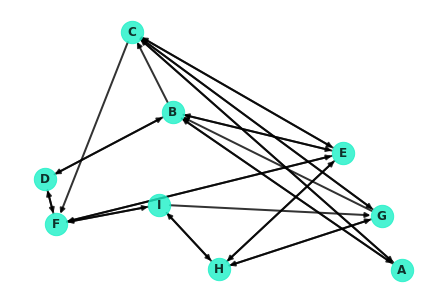

In [4]:
# https://github.com/ericthansen/dsc-graph-theory-shortest-path-lab
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

##generating a small world network
G = nx.navigable_small_world_graph(3, seed=3)
G = nx.relabel_nodes(G, dict(zip(G.nodes, ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])))
nx.draw(G, pos=nx.random_layout(G, seed=51), with_labels=True, node_color='#1cf0c7',
        node_size=500, font_weight='bold', width=2, alpha=0.8)

##dijkstra's alg
'''Mark all nodes as unvisited
Set the distance of the starting node as 0, and  ∞  for all other nodes
Set the starting node as the current node
Visit each of the neighbors of the current node
For each neighbor, calculate the distance to that node traveling through the current node
If this distance is less then the current distance recorded for that node, update the record accordingly
Mark the current node as "visited"
Of the unvisited nodes, set the one with the smallest distance to the current node
Repeat steps 4 through 6 until one of the following:
The algorithm terminates when the destination node is the current node
Alternatively, if the smallest distance of the unvisited nodes is  ∞ , then no path exists to the destination node.
Note: Dijkstra's algorithm (and NetworkX's implementations demonstrated above) returns a single path. In many cases, there may be multiple paths which are tied for the shortest distance between two nodes. In such cases, it is arbitrary which path is returned.'''


##part 1
def dijkstra(G, u, v):
    """
    G is the graph in question
    u is the starting node
    v is the destination node
    """
    #the default graph has no edge weights (boring!) so I suppose we can give default weight of 1
    weight = 1
    
    visited = set()
    unvisited = set(G.nodes)
    #print(unvisited)
    distances = {u:0}
    for node in unvisited:
        if node == u:
            continue
        distances[node] = np.inf
    
    current = u
    
    while True:
        if current == v:
            break
        elif len(unvisited) <= 0:
            break
        else:
            if min([distances[node] for node in unvisited]) == np.inf:
                print('There is no path between u and v.')
                return np.nan
            #get neighbors of current
            neighbors = G[current]
            print(current, neighbors)
            for neighbor in neighbors:
                #check/add weights here
                distances[neighbor] = min(distances[current] + weight, distances[neighbor])
            visited.add(current)
            unvisited.remove(current)
            
            #alt solution:
            #current = sorted([(node, distances[node]) for node in unvisited], key=lambda x:x[1])[0][0] # Set the node with the minimum distance as the current node
            closest_nbr = None
            closest_nbr_dist = np.inf
            for u in unvisited:
                if distances[u]<closest_nbr_dist:
                    closest_nbr = u
                    closest_nbr_dist = distances[u]
            current = closest_nbr
    return distances[v]
    
    
            
    #node_vis_dict = dict(zip(G.nodes, ['u']*len(G.nodes)))
    #print(visit_dict)
    #print(u, v)
    
    
    # Test your function here
dijkstra(G, 'A', 'F')

dijkstra(G, 'F', 'A')

##from solution for reference.  
def dijkstra(G, u, v):
    """
    G is the graph in question
    u is the starting node
    v is the destination node
    
    Future: add weighting option
    """
    visited = set()
    unvisited = set(G.nodes)
    distances = {u:0}
    for node in unvisited:
        if node == u:
            continue
        else:
            distances[node] = np.inf
    cur_node = u
    weight = 1 # Set default weight for non-weighted graphs
    while len(unvisited) > 0:
        if cur_node == v:
            break
        if min([distances[node] for node in unvisited]) == np.inf:
            print('There is no path between u and v.')
            return np.nan
        # Pull up neighbors
        neighbors = G[cur_node]
        for node in neighbors:
            # Future update:Add weight update for weighted graphs
            # Set either the distance through the current node or a previous shorter path
            distances[node] = min(distances[cur_node] + weight, distances[node])
        # Mark current node as visited
        visited.add(cur_node)
        unvisited.remove(cur_node)
        cur_node = sorted([(node, distances[node]) for node in unvisited], key=lambda x:x[1])[0][0] # Set the node with the minimum distance as the current node
    return distances[v]

# Compare to NetworkX's built in method
display(nx.dijkstra_path_length(G, 'F', 'A'))
nx.dijkstra_path_length(G, 'A', 'F')
#weird - aha, upon closer inspection I see there are just a couple one-directional edges.

display(nx.dijkstra_path(G, 'F', 'A'))
display(nx.dijkstra_path(G, 'A', 'F'))

##part 2, with path
def dijkstra(G, u, v, return_path_directions=True):
    """
    G is the graph in question
    u is the starting node
    v is the destination node
    """
    #the default graph has no edge weights (boring!) so I suppose we can give default weight of 1
    weight = 1
    path = {u:[u]}
    
    visited = set()
    unvisited = set(G.nodes)
    #print(unvisited)
    distances = {u:0}
    for node in unvisited:
        if node == u:
            continue
        distances[node] = np.inf
    
    current = u
    
    while True:
        if current == v:
            break
        elif len(unvisited) <= 0:
            break
        else:
            if min([distances[node] for node in unvisited]) == np.inf:
                print('There is no path between u and v.')
                return np.nan
            #get neighbors of current
            neighbors = G[current]
            #print(current, neighbors)
            for neighbor in neighbors:
                #check/add weights here
                if distances[current] + weight < distances[neighbor]:
                    distances[neighbor] = distances[current] + weight
                    path[neighbor] = path[current]+[neighbor]
                
            visited.add(current)
            unvisited.remove(current)
            
            #alt solution:
            #current = sorted([(node, distances[node]) for node in unvisited], key=lambda x:x[1])[0][0] # Set the node with the minimum distance as the current node
            closest_nbr = None
            closest_nbr_dist = np.inf
            for u in unvisited:
                if distances[u]<closest_nbr_dist:
                    closest_nbr = u
                    closest_nbr_dist = distances[u]
            current = closest_nbr
    if return_path_directions:
        return path[v], distances[v]
    else:
        return distances[v]
# Your code here

print(dijkstra(G, 'F', 'G'), nx.dijkstra_path(G, 'F', 'G'), nx.dijkstra_path_length(G, 'F', 'G'))
print('\n\n')
print(dijkstra(G, 'I', 'A'), nx.dijkstra_path(G, 'I', 'A'), nx.dijkstra_path_length(G, 'I', 'A'))


##create a visual - wow!
#in interest of time, taken from solution.  Very cool!
def dijkstra(G, u, v, return_path_directions=True, show_plots=True):
    """
    G is the graph in question
    u is the starting node
    v is the destination node
    
    Returns path, distance
    """
    if show_plots:
        return_path_directions = True # Must have path directions to generate plots
    visited = set()
    visited_edges = []
    unvisited = set(G.nodes)
    distances = {u:0}
    shortest_paths = {u:[u]}
    for node in unvisited:
        if node == u:
            continue
        else:
            distances[node] = np.inf
    cur_node = u
    weight = 1 # Set default weight for non-weighted graphs
    # Create the initial plot
    if show_plots:
        fig = plt.figure(figsize=(20,15))
        ax = fig.add_subplot(561)
        nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color='#1cf0c7',
                node_size=500, font_weight='bold', width=2, alpha=0.8, ax=ax)
        ax.set_title('Step 1')
        plot_n = 2
    while len(unvisited) > 0:
        if cur_node == v:
            break
        if min([distances[node] for node in unvisited]) == np.inf:
            print('There is no path between u and v.')
            return np.nan
        # Pull up neighbors
        neighbors = G[cur_node]
        for node in neighbors:
            # Future update: Add weight update for weighted graphs
            # Create a new graph of the neighbor being explored
            if show_plots:
                ax = fig.add_subplot(5,6,plot_n)
                # Base Plot
                nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color='#1cf0c7',
                        node_size=500, font_weight='bold', width=2, alpha=.8, ax=ax)
                # Recolor paths to visited nodeds
                nx.draw_networkx_edges(G, edgelist=visited_edges, pos=nx.random_layout(G, seed=9),
                       width=3, edge_color='#00b3e6', ax=ax);
                # Recolor current path
                nx.draw_networkx_edges(G, edgelist=[(cur_node, node)], pos=nx.random_layout(G, seed=9),
                       width=3, edge_color='#ffd43d', ax=ax);
                ax.set_title('Step {}'.format(plot_n))
                plot_n += 1
            # Set either the distance through the current node or a previous shorter path
            if distances[cur_node] + weight < distances[node]:
                distances[node] = distances[cur_node] + weight
                shortest_paths[node] = shortest_paths[cur_node] + [node]
        # Mark current node as visited
        visited.add(cur_node)
        unvisited.remove(cur_node)
        try:
            # Will error for initial node
            visited_edges.append((shortest_paths[cur_node][-2],cur_node))
        except:
            pass
        # Update the plot for the visited node
        if show_plots:
            ax = fig.add_subplot(5,6,plot_n)
            # Base Plot
            nx.draw(G, pos=nx.random_layout(G, seed=9), with_labels=True, node_color='#1cf0c7',
                    node_size=500, font_weight='bold', width=2, alpha=.8, ax=ax)
            # Recolor paths to visited nodeds
            nx.draw_networkx_edges(G, edgelist=visited_edges, pos=nx.random_layout(G, seed=9),
                       width=3, edge_color='#00b3e6', ax=ax);
            ax.set_title('Step {}'.format(plot_n))
            plot_n += 1
            if plot_n >= 29:
                plt.show()
                return None
        cur_node = sorted([(node, distances[node]) for node in unvisited], key=lambda x:x[1])[0][0] # Set the node with the minimum distance as the current node
    if return_path_directions:
        return shortest_paths[v], distances[v]
    else:
        return distances[v]
    


In [5]:
# https://github.com/ericthansen/dsc-node-centrality
##within network graphs, centrality and distance/connectedness are important
#centrality
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

##
# Load the Network from File
G = nx.read_edgelist('twitter.edges')
# Simplify the Node Labels
G = nx.relabel_nodes(G, dict(zip(G.nodes, range(len(G.nodes)))))
# Create a matplotlib figure
fig = plt.figure(figsize=(15,10))
# Draw the network!
nx.draw(G, pos=nx.spring_layout(G), with_labels=True,
        alpha=.8, node_color='#1cf0c7', node_size=700)

##degree centrality
nx.degree(G)

##closeness centrality
# The Closeness for a central node
print(nx.closeness_centrality(G, 4))
# The Closeness Metric for an ostracized node
print(nx.closeness_centrality(G, 86))

##betweenness centrality
# The Betweeness Metric for a central node
print(nx.betweenness_centrality(G)[4])
# The Betweeness Metric for an ostracized node
print(nx.betweenness_centrality(G)[86])

##eigenvector centrality
# The eigenvector Metric for a central node
print(nx.eigenvector_centrality(G)[4])
# The eigenvector Metric for an ostracized node
print(nx.eigenvector_centrality(G)[86])

##putting it all together
import pandas as pd

degrees = nx.degree_centrality(G)
closeness = nx.closeness_centrality(G)
betweeness = nx.betweenness_centrality(G)
eigs = nx.eigenvector_centrality(G)
df = pd.DataFrame([degrees, closeness, betweeness, eigs]).transpose()
df.columns = ['degrees', 'closeness', 'betweeness', 'eigs']
# Some Nodes to Investigate
islanders = [86, 87]
penisulas = [51, 92, 98, 95]
bridges = [52, 96]
periphial = [57, 97]
centers = [74, 3, 20]
temp = {'islanders': islanders,
       'penisulas': penisulas,
       'bridges': bridges,
       'periphial': periphial,
       'centers': centers}
node_label_dict = {}
for label in temp.keys():
    nodes = temp[label]
    for node in nodes:
        node_label_dict[node]=label
ex_nodes = islanders + penisulas + bridges + periphial + centers
df['group'] = df.index.map(node_label_dict)
df.iloc[ex_nodes]

##
df.groupby('group').mean()




FileNotFoundError: [Errno 2] No such file or directory: 'twitter.edges'

In [ ]:
# https://github.com/ericthansen/dsc-node-centrality-lab
##character ineraction graph from Game of Thrones!
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

#load data
# Load edges into dataframes
df = pd.read_csv('asoiaf-all-edges.csv')

# Print the first five rows
df.head(5)

##create a graph with weights
# Create an empty graph instance
G = nx.Graph()

# Read edge lists into dataframes
for row in df.index:
    source = df['Source'][row]
    target = df['Target'][row]
    weight = df['weight'][row]
    G.add_edge(source, target, weight=weight)
    
##calculate degree
# Your code here
pd.DataFrame.from_dict(nx.degree_centrality(G), orient='index').sort_values(by=0, ascending=False).head(10).plot(kind='barh', color='#1cf0c7')
plt.title('Top 10 Characters Ranked by by Degree Centrality');

#closeness centrality
# Your code here
pd.DataFrame.from_dict(nx.closeness_centrality(G), orient='index').sort_values(by=0, ascending=False).head(10).plot(kind='barh', color='#1cf0c7')
plt.title('Top 10 Characters Ranked by Closeness Centrality');

##bteweenness
# Your code here
pd.DataFrame.from_dict(nx.betweenness_centrality(G), orient='index').sort_values(by=0, ascending=False).head(10).plot(kind='barh', color='#1cf0c7')
plt.title('Top 10 Characters Ranked by Betweeness Centrality');

##put it all together with eigenvector
# Your code here
degrees = nx.degree_centrality(G)
closeness = nx.closeness_centrality(G)
betweeness = nx.betweenness_centrality(G)
eigen = nx.eigenvector_centrality(G)
centrality = pd.DataFrame([degrees, closeness, betweeness, eigen]).transpose()
centrality.columns = ['degrees', 'closeness', 'betweeness', 'eigenvector']
centrality = centrality.sort_values(by='eigenvector', ascending=False)
centrality.head()

##identify key players
# Your code here
centrality['bridge_est'] = centrality['betweeness'] / centrality.degrees
centrality = centrality.sort_values(by='bridge_est', ascending=False)
centrality.head(10)

##draw graph
# Your code here
edge_labels = nx.get_edge_attributes(G, 'weight')
plt.figure(figsize=(12,12))
nx.draw(G, with_labels=True, pos=nx.spring_layout(G),
        alpha=0.8, node_color='#11ffcc', node_size=700);
nx.draw_networkx_edge_labels(G,pos=nx.spring_layout(G), edge_labels=edge_labels);

##this is very busy, subset it
# Your code here
# Read edge lists into dataframes
threshold = 75
colors = []
G = nx.Graph()
for row in df.index:
    source = df['Source'][row]
    target = df['Target'][row]
    weight = df['weight'][row]
    if weight >= threshold:
        G.add_edge(source,target, weight=weight)
edge_labels = nx.get_edge_attributes(G,'weight')
for node in G.nodes:
    if node in centrality.index[:10]:
        colors.append('#ffdd33')
    else:
        colors.append('#11ffcc')
plt.figure(figsize=(18,10))
nx.draw(G, with_labels=True, pos=nx.spring_layout(G),
        alpha=.8, node_color=colors, node_size=1500)
nx.draw_networkx_edge_labels(G,pos=nx.spring_layout(G), edge_labels=edge_labels);

##cool!


In [ ]:
# https://github.com/ericthansen/dsc-network-clustering
##focusing on k-clique clustering
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
G = nx.read_gexf('ga_graph.gexf')
plt.figure(figsize=(12,8))
nx.draw(G, with_labels=True, node_color='#1cf0c7',
        alpha=.75, font_weight='bold', node_size=2*10**3, pos=nx.spring_layout(G, seed=4))
##
c = list(nx.algorithms.community.k_clique_communities(G, k=2))
c
##

colors = [('teal', '#1cf0c7'),
         ( 'workzone_yellow', '#ffd43d'),
         ('light-blue', '#00b3e6'),
         ('medium-blue', '#32cefe'),
         ('gray', '#efefef'),
         ('slate', '#2b2b2b'),
         ('dark-blue', '#144ff')]
color_dict = dict(colors)
##

fig = plt.figure(figsize=(12,8))
for n, ci in enumerate(c):
    ci = G.subgraph(ci)
    nx.draw(ci, with_labels=True, node_color=colors[n][1],
            alpha=.75, font_weight='bold', pos=nx.spring_layout(G, seed=4))
##
##girvan newman algorithm in networkx
'''As discussed, the Girvan Newman algorithm works by successively removing edges which are considered to be strong ties between subsets in the community. Typically, this is the betweenness metric. Since you are removing edges in the algorithm, betweenness is calculated for the edges as opposed to the nodes, as you have previously seen. The process is nearly identical though. First, the shortest paths between all nodes are computed using Dijkstra's algorithm. From there, an edges betweenness is the fraction of these paths that the edge is part of.'''
c_gn = list(nx.algorithms.community.centrality.girvan_newman(G))
print(len(c_gn), c_gn[:3])
##
c_gn[0]
##
colors = [('teal', '#1cf0c7'),
         ( 'workzone_yellow', '#ffd43d'),
         ('light-blue', '#00b3e6'),
         ('medium-blue', '#32cefe'),
         ('gray', '#efefef'),
         ('slate', '#2b2b2b'),
         ('dark-blue', '#1443ff')]
##
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(18,18))
for n, cs in enumerate(c_gn[:4]):
    i = n//2
    j = n%2
    ax = axes[i][j]
    ax.set_title('Clusters with {} Edges Removed'.format(n+1))
    #Multiple Clusters per Groups
    for n2, c in enumerate(cs):
        ci = G.subgraph(c)
        color = colors[n2][1]
        nx.draw(ci, with_labels=True, node_color=color, ax=ax,
                alpha=.75, font_weight='bold', pos=nx.spring_layout(G, seed=4));
        
##
cs = c_gn[-1]
fig = plt.figure(figsize=(12,12))
for c in cs:
    ci = G.subgraph(c)
    nx.draw(ci, with_labels=True, node_color=color_dict['light-blue'],
                alpha=.75, font_weight='bold', pos=nx.spring_layout(G, seed=4));
    
##
#Documentation:
# https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.community.kclique.k_clique_communities.html
# https://pelegm-networkx.readthedocs.io/en/latest/reference/generated/networkx.algorithms.community.centrality.girvan_newman.html

In [ ]:
# https://github.com/ericthansen/dsc-network-clustering-lab
##making visualizations of network clusters
import pandas as pd
df = pd.read_csv('stack-overflow-tag-network/stack_network_links.csv')
df.head()

##transform into a networkx graph
# Your code here
import networkx as nx

G = nx.Graph()
for row in df.index:
    source = df.source[row]
    target = df.target[row]
    weight = df.value[row]
    G.add_edge(source, target, weight=weight)
print(len(G.nodes))

##initial vis
# Your code here
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(30,30))
nx.draw(G, pos=nx.spring_layout(G, k=2), with_labels=True,
        alpha=.8, node_size=10000, font_weight='bold', font_size=20)

##initial clustering k-clique
# Your code here
for i in range(2,9):
    kc_clusters = list(nx.algorithms.community.k_clique_communities(G, k=i))
    print('With k={}, {} clusters form.'.format(i, len(kc_clusters)))
    

##visiualize
# Your code here
kc_clusters = list(nx.algorithms.community.k_clique_communities(G, k=5))

colors = [('teal', '#1cf0c7'),
         ('workzone_yellow', '#ffd43d'),
         ('light-blue', '#00b3e6'),
         ('medium-blue', '#32cefe'),
         ('gray', '#efefef'),
         ('dark-blue', '#1443ff')]
color_dict = dict(colors)

fig = plt.figure(figsize=(30,30))
for n, ci in enumerate(kc_clusters):
    ci = G.subgraph(ci)
    nx.draw(ci, pos=nx.spring_layout(G, k=2, seed=7), with_labels=True, node_color=colors[n%len(colors)][1],
            alpha=0.8, node_size=20000, font_weight='bold', font_size=20)
    
## different clustering k value
# Your code here
kc_clusters = list(nx.algorithms.community.k_clique_communities(G, k=3))
colors = ['#1cf0c7','#ffd43d','#00b3e6','#32cefe','#efefef','#2b2b2b', '#1443ff',
          '#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
          '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
fig = plt.figure(figsize=(35,20))
for n, ci in enumerate(kc_clusters):
    ci = G.subgraph(ci)
    nx.draw(ci, pos=nx.spring_layout(G, k=2.5, seed=10), with_labels=True, node_color=colors[n],
            alpha=0.8, node_size=20000, font_weight='bold', font_size=20)
    
##now use girvan-newman alg
# Your code here
gn_clusters = list(nx.algorithms.community.centrality.girvan_newman(G))
for n, clusters in enumerate(gn_clusters):
    print('After removing {} edges, there are {} clusters.'.format(n, len(clusters))) 
    
## create a viz wrapper
def plot_girvan_newman(G, clusters):
    # Your code here 
    fig = plt.figure(figsize=(30,30))
    colors = ['#1cf0c7','#ffd43d','#00b3e6','#32cefe','#efefef',
          '#1443ff','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
          '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99',
          '#b15928','#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3',
          '#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5',
          '#ffed6f','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5',
          '#80cdc1', '#35978f', '#01665e', '#003c30']
    for n , c in enumerate(clusters):
        ci = G.subgraph(c)
        # K value of 2.5 also seem to work well
        nx.draw(ci, pos=nx.spring_layout(G, k=2.66, seed=7), with_labels=True, node_color=colors[n],
                alpha=0.8, node_size=20000, font_weight='bold', font_size=20)
    plt.show()
    
##visualize for different values
# Your code here
plot_girvan_newman(G, gn_clusters[0])
##
plot_girvan_newman(G, gn_clusters[5])

##
plot_girvan_newman(G, gn_clusters[15])
##
plot_girvan_newman(G, gn_clusters[25])

##check out cluster decay rate
# Your code here
import seaborn as sns
sns.set_style('darkgrid')

y = [len(cluster) for cluster in gn_clusters]
x = [n+1 for n in range(len(gn_clusters))]
plt.plot(x,y)
plt.title('Number of Clusters versus Number of Edges Removed')
plt.ylabel('Number of Clusters')
plt.xlabel('Number of Edges Removed')
plt.show()
#
### From solution, for reference:
# While an initial investigation such as the one above does not appear to be particularly informative,
# exploring additional cluster metrics reveals more interesting patterns.
import numpy as np

fig = plt.figure(figsize=(12,10))

max_cluster_size = [max([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,max_cluster_size, color=colors[0], label='Max Cluster Size')

min_cluster_size = [min([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,min_cluster_size, color=colors[1], label='Minimum Cluster Size')

mean_cluster_size = [np.mean([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,mean_cluster_size, color=colors[2], label='Mean Cluster Size')

median_cluster_size = [np.median([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,median_cluster_size, color=colors[3], label='Median Cluster Size')

single_node_clusters = [sum([1 if len(c)==1 else 0 for c in cluster]) for cluster in gn_clusters]
plt.plot(x,single_node_clusters, color=colors[6], label='Number of Single Node Clusters')

small_clusters = [sum([1 if len(c)<=5 else 0 for c in cluster ]) for cluster in gn_clusters]
plt.plot(x,small_clusters, color=colors[5], label='Number of Small Clusters (5 or less nodes)')

plt.legend(loc=(1.01,.75), fontsize=14)
plt.title('Cluster Size Metrics versus Number of Edges Removed', fontsize=14)
plt.xlabel('Number of Edges Removed', fontsize=14)
plt.ylabel('Cluster Metric')
plt.ylim(0,80)
plt.yticks(ticks=list(range(0,80,5)))
plt.show()


#if we look for an "elbow" in the various metrics above, 15-20 seems like a good range

##choose a clustering
# Your code/response here
print('Number of clusters:',len(gn_clusters[20]))
plot_girvan_newman(G, gn_clusters[20])
# This clustering representation was chosen after analyzing the plots above.
# After the 20th edge is removed, max cluster size does not drastically drop again,
# while small and single node clusters start to rapidly spawn. K-Clique clusters did not appear to be well developed.

##
##again from solution:
# While there is no definitive criteria for optimizing clusters, 
# there is almost a 33% increase in the total number clusters here,
# yet the same definitive clusters jump to the eye as above.
# For this reason, it can be argued that the above clusters are more definitive and representative.
print('Number of clusters:',len(gn_clusters[32]))
plot_girvan_newman(G, gn_clusters[32])




In [ ]:
# https://github.com/ericthansen/dsc-network-community-detection-lab
##goal here is to idenfity clusters/communities in meetup groups in Nashville

# Your code here

import pandas as pd
groups = pd.read_csv('nashville-meetup/group-edges.csv', index_col=0)
groups.head()
##descriptions
# Your code here
groups_meta = pd.read_csv('nashville-meetup/meta-groups.csv')
groups_meta.head()

##transform to network rep
# Your code here
import networkx as nx

group_dict = dict(zip(groups_meta.group_id, groups_meta.group_name))
G = nx.Graph()
for row in groups.index:
    g1 = group_dict[groups.group1[row]]
    g2 = group_dict[groups.group2[row]]
    weight = groups.weight[row]
    G.add_edge(g1, g2, weight=weight)
len(G)

##first vis
# Your code here
import matplotlib.pyplot as plt
%matplotlib inline

nx.draw(G, pos=nx.spring_layout(G, k=2, seed=7), alpha=.8, node_color='#33ccff')

##that is no good!
##refine:
# Your code here
##this approach from solution
for i in range(0,100,5):
    print('{}th percentile: {}'.format(i,groups.weight.quantile(q=i/100)))
    
##this approach from solution
threshold = 5
G_subset = nx.Graph()
for row in groups.index:
    g1 = group_dict[groups.group1[row]]
    g2 = group_dict[groups.group2[row]]
    weight = groups.weight[row]
    if weight > threshold:
        G_subset.add_edge(g1, g2, weight=weight)
plt.figure(figsize=(30,20))
nx.draw(G_subset, pos=nx.spring_layout(G_subset, k=2, seed=5),
        alpha=.8, node_color='#33ccff', node_size=4000,
        with_labels=True, font_size=16, font_weight='bold')
##
len(G_subset)

##cluster the network
# Your code here
gn_clusters = list(nx.algorithms.community.centrality.girvan_newman(G_subset))
for n, clusters in enumerate(gn_clusters):
    print('After removing {} edges, there are {} clusters.'.format(n, len(clusters)))
    
##determin an optimal clustering schema
# Your code here
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
colors = ['#1cf0c7','#ffd43d','#00b3e6','#32cefe','#efefef',
          '#1443ff','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
          '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99',
          '#b15928','#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3',
          '#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5',
          '#ffed6f','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5',
          '#80cdc1', '#35978f', '#01665e', '#003c30']

fig = plt.figure(figsize=(12,10))

x = [n+1 for n in range(len(gn_clusters))]

max_cluster_size = [max([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,max_cluster_size, color=colors[0], label='Max Cluster Size')

min_cluster_size = [min([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,min_cluster_size, color=colors[1], label='Minimum Cluster Size')

mean_cluster_size = [np.mean([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,mean_cluster_size, color=colors[2], label='Mean Cluster Size')

median_cluster_size = [np.median([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,median_cluster_size, color=colors[3], label='Median Cluster Size')

single_node_clusters = [sum([1 if len(c)==1 else 0 for c in cluster]) for cluster in gn_clusters]
plt.plot(x,single_node_clusters, color=colors[6], label='Number of Single Node Clusters')

small_clusters = [sum([1 if len(c)<=5 else 0 for c in cluster ]) for cluster in gn_clusters]
plt.plot(x,small_clusters, color=colors[5], label='Number of Small Clusters (5 or less nodes)')

plt.legend(loc=(1.01,.75), fontsize=14)
plt.title('Cluster Size Metrics versus Number of Edges Removed', fontsize=14)
plt.xlabel('Number of Edges Removed', fontsize=14)
plt.ylabel('Cluster Metric')
plt.ylim(0,80)
plt.yticks(ticks=list(range(0,80,5)))
plt.show()

##inspect the graphs...idk how we tell, but i guess there's an elbow at 20?
##visualize the clusters
# Your code here
def plot_girvan_newman(G, clusters):
    #Your code here
    fig = plt.figure(figsize=(35,20))
    colors = ['#1cf0c7','#ffd43d','#00b3e6','#32cefe','#efefef',
              '#1443ff','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
              '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99',
              '#b15928','#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3',
              '#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5',
              '#ffed6f','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5',
              '#80cdc1', '#35978f', '#01665e', '#003c30']
    for n , c in enumerate(clusters):
        ci = G.subgraph(c)
        nx.draw(ci, pos=nx.spring_layout(G_subset, k=3.6, seed=3), with_labels=True, node_color=colors[n],
                alpha=0.8, node_size=10000, font_weight='bold', font_size=20)
    plt.show()
sns.set_style('white')
plot_girvan_newman(G_subset, gn_clusters[20])

##
# Because the Network is still dense and names are long, organizing the clusters as a Pandas dataframe is appropriate
clusters = pd.DataFrame(gn_clusters[20]).transpose()
clusters.columns = ['Cluster{}'.format(i) for i in range(1,len(clusters.columns)+1)]
clusters

# Many of the clusters are easily identifiable;
# You can see that cluster 1 is a technology group,
# cluster 2 is a social hodgepodge,
# cluster3 is outdoor enthusiasts,
# cluster4 is gamers, and so forth

##that is cool


In [ ]:
# https://github.com/ericthansen/dsc-network-recommendation-systems
##idea - building a recommender system off of networks.  (though I'm not exactly seeing the network)

#load data
import pandas as pd
df = pd.read_csv('ml-100k/u.data', delimiter='\t', 
                 names=['user_id' , 'item_id' , 'rating' , 'timestamp'])
df.head()

##
col_names = ['movie_id' , 'movie_title' , 'release_date' , 'video_release_date' ,
             'IMDb_URL' , 'unknown', 'Action', 'Adventure', 'Animation',
             'Childrens', 'Comedy', 'Crime' , 'Documentary', 'Drama', 'Fantasy',
             'Film-Noir', 'Horror', 'Musical', 'Mystery' , 'Romance' , 'Sci-Fi',
             'Thriller', 'War' ,'Western']
movies = pd.read_csv('ml-100k/u.item', delimiter='|', encoding='latin1', names=col_names)
movies.head()

##
#transform the data - pivot table
user_ratings = df.pivot(index='user_id', columns='item_id', values='rating')
user_ratings.head()

##fill missing values
for col in user_ratings:
    mean = user_ratings[col].mean()
    user_ratings[col] = user_ratings[col].fillna(value=mean)
user_ratings.head()

##create user matrix
'''To create a user matrix, you must calculate the distance between users. Choosing an appropriate distance metric for this is crucial. In this instance, a simple Euclidean distance is apt to be appropriate, but in other instances an alternative metric such as cosine distance might be a more sensible choice.'''
import numpy as np
import datetime
##
u1 = user_ratings.iloc[1]
u2 = user_ratings.iloc[2]
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))
distance(u1,u2)

##
# ⏰ Expect this cell to take several minutes to run
start = datetime.datetime.now()
user_matrix = []
for i, row in enumerate(user_ratings.index):
    u1 = user_ratings[row]
    # Matrix is symetric, so fill in values for previously examined users
    user_distances = [entry[i] for entry in user_matrix] 
    for j, row2 in enumerate(user_ratings.index[i:]):
        u2 = user_ratings[row2]
        d = distance(u1,u2)
        user_distances.append(d)
    user_matrix.append(user_distances)
user_similarities = pd.DataFrame(user_matrix)

end = datetime.datetime.now()
elapsed = end - start
print(elapsed)

user_similarities.head()

##calculate recommendation
def recommend_movies(user, user_similarities, user_ratings, df, n_users=20, n_items=10):
    """n is the number of similar users who you wish to use to generate recommendations."""
    # User_Similarities Offset By 1 and Must Remove Current User
    top_n_similar_users = user_similarities[user-1].drop(user-1).sort_values().index[:n_users] 
    # Again, fixing the offset of user_ids
    top_n_similar_users = [i+1 for i in top_n_similar_users] 
    already_watched = set(df[df.user_id == 0].item_id.unique())
    unwatched = set(df.item_id.unique()) - already_watched
    projected_user_reviews = user_ratings[user_ratings.index.isin(top_n_similar_users)].mean()[list(unwatched)].sort_values(ascending=False)
    return projected_user_reviews[:n_items]

##
recommend_movies(1, user_similarities, user_ratings, df)


In [ ]:
# https://github.com/ericthansen/dsc-network-recomendation-systems-lab 


##recommender system
#load data
import pandas as pd
import networkx as nx
G = nx.Graph()

df = pd.read_csv('books_data.edgelist', names=['source', 'target', 'weight'], delimiter=' ')
df.head()

#load metadata
# Your code here
meta = pd.read_csv('books_meta.txt', sep='\t')
meta.head()

##select books to test recommender on
# Your code here
dresden = meta[meta.Title.str.contains('Dresden')]
dresden

##generate recs for a few books of choice
# Your code here
# Well, got a couple or extraneous results in there, but perhaps good measure for comparion.
# What does our recommender return for these books?
rec_dict = {}
id_name_dict = dict(zip(meta.ASIN, meta.Title))
for row in dresden.index:
    book_id = dresden.ASIN[row]
    book_name = id_name_dict[book_id]
    most_similar = df[(df.source == book_id)
                      | (df.target == book_id)
                     ].sort_values(by='weight', ascending=False).head(10)
    most_similar['source_name'] = most_similar['source'].map(id_name_dict)
    most_similar['target_name'] = most_similar['target'].map(id_name_dict)
    recommendations = []
    for row in most_similar.index:
        if most_similar.source[row] == book_id:
            recommendations.append((most_similar.target_name[row], most_similar.weight[row]))
        else:
            recommendations.append((most_similar.source_name[row], most_similar.weight[row]))
    rec_dict[book_name] = recommendations
    print('Recommendations for:', book_name)
    for r in recommendations:
        print(r)
    print('\n\n')
    
    

In [ ]:
# https://github.com/ericthansen/dsc-networks-recap
'''Graph Theory - Recap
GitHub RepoCreate New Issue
Introduction
In this section you explored a new data structure: networks! While network analysis is a deep topic with many additional topics to explore, you should have a good initial introduction and enough to conduct some preliminary analyses for social networks and building recommendation systems.

Networks
You've seen that networks can represent a range of different underlying data. From directions, social networks, and customer databases, networks are a wonderful way to represent the relationships between individuals. They also make for some snazzy visuals!

Paths
The first stop along your journey was paths! Here, you investigated Dijkstra's algorithm to find the shortest path between nodes. This harked back to some of your experience scraping the web when you used recursive functions to perform breadth and depth based search techniques to transverse a json file. While you didn't directly explore this application, networks are also a natural representation for exploring internet traffic and web page structures.

Centrality
Once you had a metric to calculate the distance between nodes, you then started to investigate other important concepts of networks such as which nodes were most influential or connected within a graph. You saw how alternative metrics can provide different insights on node structure. As a quick recap:

Degree-centrality: The number of edges attached to a node
Closeness-centrality: The reciprocal of the sum of the distances to all other nodes in the network
Betweeness-centrality: The number of shortest paths between all node pairs the node lies on divided by the maximum number of shortests-paths any one node in the network lies on
Eigenvalue-centrality: An iterative algorithm which assigns relative influence to a node based on the number and importance of connected nodes. Can be very computationally expensive to compute for large networks. Google's PageRank algorithm is a variation of eigenvalue-centrality
Clustering
After discussing centrality, you then focused on larger structures within a network, breaking apart nodes into clusters to examine subgroups. While this is a common and useful application, it is an ill-defined problem mathematically, often making it difficult to definitively determine an optimal clustering schema.

Recommendations
Finally, you rounded out the section by investigating how networks can be used to provide recommendations to users. To do this, you investigated a preliminary approach known as collaborative filtering, specifically exploring user-based collaborative filtering in which similar users are identified and their preferences are used to generate recommendations to the user in question. There are many alternative approaches to recommendations systems such as using Singular Value Decomposition.

Summary
A lot was covered in this section! From this, you should have a solid introduction to networks, and some of their applications. Going forward, continue to explore ongoing developments in clustering social networks, and generating recommendations from these fascinating data structures.
'''


In [ ]:
# https://github.com/ericthansen/dsc-cnn-intro
# https://github.com/ericthansen/dsc-convolutional-neural-networks-codealong
#store the imgs
import os, shutil

##
data_santa_dir = 'data/santa/'
data_not_santa_dir = 'data/not_santa/'
new_dir = 'split/'
##
imgs_santa = [file for file in os.listdir(data_santa_dir) if file.endswith('.jpg')]
##
imgs_santa[0:10]
##
print('There are', len(imgs_santa), 'santa images')
##
imgs_not_santa = [file for file in os.listdir(data_not_santa_dir) if file.endswith('.jpg')]
##
print('There are', len(imgs_not_santa), 'images without santa')
##
os.mkdir(new_dir)
#
train_folder = os.path.join(new_dir, 'train')
train_santa = os.path.join(train_folder, 'santa')
train_not_santa = os.path.join(train_folder, 'not_santa')

test_folder = os.path.join(new_dir, 'test')
test_santa = os.path.join(test_folder, 'santa')
test_not_santa = os.path.join(test_folder, 'not_santa')

val_folder = os.path.join(new_dir, 'validation')
val_santa = os.path.join(val_folder, 'santa')
val_not_santa = os.path.join(val_folder, 'not_santa')
##
train_santa
##
os.mkdir(test_folder)
os.mkdir(test_santa)
os.mkdir(test_not_santa)

os.mkdir(train_folder)
os.mkdir(train_santa)
os.mkdir(train_not_santa)

os.mkdir(val_folder)
os.mkdir(val_santa)
os.mkdir(val_not_santa)

# train santa
imgs = imgs_santa[:271]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(train_santa, img)
    shutil.copyfile(origin, destination)
    
# validation santa
imgs = imgs_santa[271:371]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(val_santa, img)
    shutil.copyfile(origin, destination)
    
# test santa
imgs = imgs_santa[371:]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(test_santa, img)
    shutil.copyfile(origin, destination)
    
# train not_santa
imgs = imgs_not_santa[:271]
for img in imgs:
    origin = os.path.join(data_not_santa_dir, img)
    destination = os.path.join(train_not_santa, img)
    shutil.copyfile(origin, destination)
# validation not_santa
imgs = imgs_not_santa[271:371]
for img in imgs:
    origin = os.path.join(data_not_santa_dir, img)
    destination = os.path.join(val_not_santa, img)
    shutil.copyfile(origin, destination)
# test not_santa
imgs = imgs_not_santa[371:]
for img in imgs:
    origin = os.path.join(data_not_santa_dir, img)
    destination = os.path.join(test_not_santa, img)
    shutil.copyfile(origin, destination)
    
print('There are', len(os.listdir(train_santa)), 'santa images in the training set')
#
print('There are', len(os.listdir(val_santa)), 'santa images in the validation set')
#
print('There are', len(os.listdir(test_santa)), 'santa images in the test set')
#
print('There are', len(os.listdir(train_not_santa)), 'images without santa in the train set')
#
print('There are', len(os.listdir(val_not_santa)), 'images without santa in the validation set')
#
print('There are', len(os.listdir(test_not_santa)), 'images without santa in the test set')
#
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)

##
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), batch_size = 180) 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64), batch_size = 200)

# get all the data in the directory split/train (542 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size=542)

##
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

##
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

##
train_y = np.reshape(train_labels[:,0], (542,1))
test_y = np.reshape(test_labels[:,0], (180,1))
val_y = np.reshape(val_labels[:,0], (200,1))
##
# Build a baseline fully connected model
from keras import models
from keras import layers
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

##
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

##
results_train = model.evaluate(train_img, train_y)
##
results_test = model.evaluate(test_img, test_y)
##
results_train
##
results_test
##
####Build a CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])
##
history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))
##
results_train = model.evaluate(train_images, train_y)
#
results_test = model.evaluate(test_images, test_y)
#
results_train
#
results_test
#

###Data Augmentation!  - making extra images out of existing ones with little variations
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.3, 
                                   zoom_range=0.1, 
                                   horizontal_flip=False)
##
names = [os.path.join(train_santa, name) for name in os.listdir(train_santa)]
img_path = names[91]
img = load_img(img_path, target_size=(64, 64))

reshape_img = img_to_array(img) 
reshape_img = reshape_img.reshape((1,) + reshape_img.shape) 
i=0
for batch in train_datagen.flow(reshape_img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 3 == 0:
        break
plt.show()
##
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), 
        batch_size = 180,
        class_mode='binary') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64),
        batch_size = 32,
        class_mode='binary')

# get all the data in the directory split/train (542 images), and reshape them
train_generator = train_datagen.flow_from_directory(
        train_folder, 
        target_size=(64, 64), 
        batch_size = 32, 
        class_mode='binary')
##
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

##
history_2 = model.fit_generator(train_generator, 
                                steps_per_epoch=25, 
                                epochs=30, 
                                validation_data=val_generator, 
                                validation_steps=25)

##
test_x, test_y = next(test_generator)
##
results_test = model.evaluate(test_x, test_y)
##
results_test



In [ ]:
## https://github.com/ericthansen/dsc-building-a-cnn-from-scratch
'''Objectives
In this lab you will:

Load images from a hierarchical file structure using an image datagenerator
Apply data augmentation to image files before training a neural network
Build a CNN using Keras
Visualize and evaluate the performance of CNN models'''

##loading the imgs
# Load the images; be sure to also preprocess these into tensors 

train_dir = 'cats_dogs_downsampled/train'
validation_dir = 'cats_dogs_downsampled/val/'
test_dir = 'cats_dogs_downsampled/test/' 


from keras.preprocessing.image import ImageDataGenerator
import datetime

original_start = datetime.datetime.now()
start = datetime.datetime.now()

##
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

##designing the model
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

##
#from keras import optimizers
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

##training and evaluating
# Set the model to train 
# ⏰ This cell may take several minutes to run 
history = model.fit(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=20)

##plotting
# Plot history

import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##
end = datetime.datetime.now()
elapsed = end - start
print('Training took a total of {}'.format(elapsed))
##
#save the model
# Your code here; save the model for future reference 
model.save('cats_dogs_downsampled_data.h5')

##data augmentation
'''Recall that data augmentation is typically always a necessary step when using a small dataset as this one which you have been provided. As such, if you haven't already, implement a data augmentation setup.'''

start = datetime.datetime.now()

##
# Add data augmentation to the model setup and set the model to train; 
# See warnings above if you intend to run this block of code 
# ⏰ This cell may take several hours to run 
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

history = model.fit(train_generator, 
                              steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=20)
##save model
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

##
end = datetime.datetime.now()
elapsed = end - start
print('Training with data augmentation took a total of {}'.format(elapsed))

### Save the model 
model.save('cats_dogs_downsampled_with_augmentation_data.h5')
##final evaluation
# Your code here 
# Perform a final evaluation using the test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(150, 150), 
                                                  batch_size=20, 
                                                  class_mode='binary')
test_loss, test_acc = model.evaluate(test_generator, steps=20)
print('test acc:', test_acc)



In [ ]:
# https://github.com/ericthansen/dsc-visualizing-intermediate-activations
##loading previous model
from keras.models import load_model

model = load_model('cats_dogs_downsampled_with_augmentation_data.h5')
# As a reminder 
model.summary()  

##loading an images from training set
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##
img_path = 'images/dog.1100.jpg'


img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255.

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

##visualizing a layer
from keras import models

##
# Extract model layer outputs
layer_outputs = [layer.output for layer in model.layers[:8]]

# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

##
model.summary()
##
# Returns an array for each activation layer
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

# We slice the third channel and preview the results
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

##
# Repeating the process for another channel (the 30th)
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 30], cmap='viridis')
plt.show()

##
##can visl 32 channels from first activation function
fig, axes = plt.subplots(8, 4, figsize=(12,24))
for i in range(32):
    row = i//4
    column = i%4
    ax = axes[row, column]
    first_layer_activation = activations[0]
    ax.matshow(first_layer_activation[0, :, :, i], cmap='viridis')
    
##repeating for all layers
fig, axes = plt.subplots(2,4, figsize=(12,8))

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

for i in range(8):
    row = i//4
    column = i%4
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :, 29], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])
    
#things get more "abstract" - note this is the 29th channel (i.e. filter, I think) for each layer


In [ ]:
# https://github.com/ericthansen/dsc-visualizing-activation-functions-lab
##load a model
# Your code here
from keras.models import load_model
model = load_model('cats_dogs_downsampled_with_augmentation_data.h5')
model.summary()
##load an img
# Your code here
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

filename = 'dog.1100.jpg'
img = image.load_img(filename, target_size=(150, 150))
plt.imshow(img)
plt.show()

##transform img to a tensor
# Your code here
import numpy as np

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

# Follow the Original Model Preprocessing
img_tensor /= 255.

# Check tensor shape
print(img_tensor.shape)

# Preview an image
plt.imshow(img_tensor[0])
plt.show()

##plot feature maps
# Your code here
from keras import models
import math 

# Extract model layer outputs for conv and max pooling layers (leave out the dense layers at end)
layer_outputs = [layer.output for layer in model.layers[:8]]

# Create a model for displaying the feature maps
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

# Extract Layer Names for Labelling
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

total_features = sum([a.shape[-1] for a in activations])
print("total features: {}".format(total_features))

n_cols = 16
n_rows = math.ceil(total_features / n_cols)


iteration = 0
fig , axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols, n_rows*1.5))

for layer_n, layer_activation in enumerate(activations):
    n_channels = layer_activation.shape[-1]
    for ch_idx in range(n_channels):
        row = iteration // n_cols
        column = iteration % n_cols
    
        ax = axes[row, column]

        channel_image = layer_activation[0,
                                         :, :,
                                         ch_idx]
        # Post-process the feature to make it visually palatable
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')

        ax.imshow(channel_image, aspect='auto', cmap='viridis')
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        
        if ch_idx == 0:
            ax.set_title(layer_names[layer_n], fontsize=10)
        iteration += 1

fig.subplots_adjust(hspace=1.25)
plt.savefig('Intermediate_Activations_Visualized.pdf')
plt.show()



In [ ]:
# https://github.com/ericthansen/dsc-cnn-recap 
'''Introduction
Well done! In this section you learned all about convolutional neural networks! You should now have enough of an introductory primer to be able to do some image recognition tasks on your own!

Key Takeaways
Remember that the essence of a CNN is the convolutional operation. A window is slided across the image based on a stride size. Padding can be used to prevent shrinkage and to make sure pixels at the edge of an image deserve the necessary attention. Each convolution then works to adjust the weights of the kernel through backpropagation during training. Going back to the general architecture, max pooling is typically used between convolutional layers to reduce the dimensionality.

Overall, CNNs are a useful model for image recognition due to their ability to recognize visual patterns at varying scales. After developing the convolutional and pooling layers to form a base, the end of the network architecture still connects back to a densely connected network to perform classification.

Summary
In this section you learned all about convolutional neural networks! From here, you'll learn more about tuning neural networks and other neural network architectures!'''


In [ ]:
# https://github.com/ericthansen/dsc-transfer-learning-intro
# https://github.com/ericthansen/dsc-using-pretrained-networks
'''Objectives¶
You will be able to:

Describe the benefits of using pretrained networks
Explain how pre-trained neural networks are used for feature extraction
Explain what "freezing" and "unfreezing" a layer means in a neural network'''
'''Exampled of pretrained networks¶
Keras has several pretrained models available. Here is a list of pretrained image classification models. All these models are available in keras.applications and were pretrained on the ImageNet dataset, a dataset with 1.4 million labeled images and 1,000 different classes.

DenseNet
InceptionResNetV2
InceptionV3
MobileNet
NASNet
ResNet50
VGG16
VGG19
Xception'''
# https://keras.io/applications/
#look at structure
from keras.applications import MobileNet
conv_base = MobileNet(weights='imagenet', 
                      include_top=True)

# This is a deep and complex network!
conv_base.summary()

'''You'll learn about two ways to use pre-trained networks:

Feature extraction: Here, you use the representations learned by a previous network to extract interesting features from new samples. These features are then run through a new classifier, which is trained from scratch.

Fine-tuning: When fine-tuning, you'll "unfreeze" a few top layers from the model and train them again together with the densely connected classifier. Note that you are changing the parts of the convolutional layers here that were used to detect the more abstract features. By doing this, you can make your model more relevant for the classification problem at hand.'''

#feature extraction
'''Feature Extraction
Feature extraction with convolutional neural networks means that you take the convolutional base of a pretrained network, run new data through it, and train a new classifier on top of the output (a new densely connected classifier). Why use convolutional base but new dense classifier? Generally, patterns learned by the convolutional layers are more generalizable.

Note that, if your dataset differs a lot from the dataset used when pretraining, it might even be worth only using part of the convolutional base (see "fine tuning")

Also, with feature extraction, there are two ways running the model:

You can run the convolutional base over your dataset, save its output, then use this data as input to a standalone, densely connected network. This solution is pretty fast to run, and you need to run the convolutional base first for every input image. The problem here is, however, that you can't use data augmentation as we've seen before.
You can extend the convolutional base by adding dense layers on top, and running everything altogether on the input data. This way, you can use data augmentation, but as every input image goes through the convolutional base every time, this technique is much more time-consuming. It's almost impossible to do this without a GPU'''

#fine tuning
'''Fine tuning
Fine tuning is similar to feature extraction in that you reuse the convolution base and retrain the dense, fully connected classifier layers to output a new prediction. In addition, fine tuning also works by retraining the frozen weights for the convolutional base. This allows these weights to be tweaked for the current scenario, hence the name. To do this, you'll freeze part of the model while tuning specific layers.'''
# http://cs231n.stanford.edu/syllabus.html
# https://www.dlology.com/blog/gentle-guide-on-how-yolo-object-localization-works-with-keras/
# https://www.dlology.com/blog/gentle-guide-on-how-yolo-object-localization-works-with-keras-part-2/


In [ ]:
# https://github.com/ericthansen/dsc-using-pretrained-networks-codealong
##
import datetime

start = datetime.datetime.now()
#
import os, shutil
import time
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img

np.random.seed(123)

#
train_folder = 'split/train'
test_folder = 'split/test'
val_folder = 'split/validation'
#
datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 10
##vgg19 feature extractoin
from tensorflow.keras.applications import VGG19
cnn_base = VGG19(weights='imagenet', 
                 include_top=False, 
                 input_shape=(64, 64, 3))
                 #input_shape=(224, 224, 3)) #turn this on if include_top=True
    
#
cnn_base.summary()
##
def extract_features(directory, sample_amount):
    features = np.zeros(shape=(sample_amount, 2, 2, 512)) 
    labels = np.zeros(shape=(sample_amount))
    generator = datagen.flow_from_directory(
        directory, target_size=(64, 64), 
        batch_size = 10, 
        class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = cnn_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch 
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i = i + 1
        if i * batch_size >= sample_amount:
            break
    return features, labels

#
# You should be able to divide sample_amount by batch_size
train_features, train_labels = extract_features(train_folder, 540) 
validation_features, validation_labels = extract_features(val_folder, 200) 
test_features, test_labels = extract_features(test_folder, 180)

train_features = np.reshape(train_features, (540, 2 * 2 * 512))
validation_features = np.reshape(validation_features, (200, 2 * 2 * 512))
test_features = np.reshape(test_features, (180, 2 * 2 * 512))
#
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=2*2*512))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=20,
                    batch_size=10,
                    validation_data=(validation_features, validation_labels))
##
results_test = model.evaluate(test_features, test_labels)
results_test
#
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.plot(epch, train_loss, 'r.', label='Training loss')
plt.plot(epch, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()
##
end = datetime.datetime.now()
elapsed = end - start
print('Feature extraction method 1 took {} to execute.'.format(elapsed))
startp = datetime.datetime.now() # Set new start time for new process method
##feature extraction method 2
model = models.Sequential()
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.Dense(132, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

##freezing
# You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute
for layer in model.layers:
    print(layer.name, layer.trainable)
    
# Similarly, you can check how many trainable weights are in the model
print(len(model.trainable_weights))

#
cnn_base.trainable = False
##check
# You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute
for layer in model.layers:
    print(layer.name, layer.trainable)
    
# Similarly, we can check how many trainable weights are in the model
print(len(model.trainable_weights))

#
# Get all the data in the directory split/train (542 images), and reshape them
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_folder,  
                                                    target_size=(64, 64),  
                                                    batch_size= 20, 
                                                    class_mode= 'binary') 

# Get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder,  
                                                                       target_size=(64, 64),  
                                                                       batch_size=20, 
                                                                       class_mode='binary')

# Get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder,  
                                                                        target_size=(64, 64), 
                                                                        batch_size=180,
                                                                        class_mode='binary')

test_images, test_labels = next(test_generator)
##compile as usual
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

##and fit
# ⏰ This cell may take several minutes to run
history = model.fit_generator(train_generator,
                              steps_per_epoch=27,
                              epochs=10,
                              validation_data=val_generator,
                              validation_steps=10)

##
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.plot(epch, train_loss, 'r.', label='Training loss')
plt.plot(epch, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()
##
end = datetime.datetime.now()
elapsed = end - startp
print('Feature extraction method 2 took {} to execute.'.format(elapsed))
elapsed = end - start
print('Total running time of notebook thus far: {}'.format(elapsed))
startp = datetime.datetime.now() # Set new start time for new process method
##
##fine tuning
model.summary()

#
cnn_base.summary()
##reminder on fine tuning - feature extraction comes first.  then train final layers, then unfreeze last few layers by unfreezing
#entire thing and then refreezing beginning layers
cnn_base.trainable = True
#
cnn_base.trainable = True
set_trainable = False
for layer in cnn_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
##recompile
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['accuracy'])

##fit
# ⏰ This cell may take several minutes to run
history = model.fit_generator(train_generator,
                              steps_per_epoch=27,
                              epochs=10,
                              validation_data=val_generator,
                              validation_steps=10)
##
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.plot(epch, train_loss, 'r.', label='Training loss')
plt.plot(epch, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()
##final eval on test set
# ⏰ This cell may take several minutes to run

# test_generator = test_datagen.flow_from_directory(test_dir,
#                                                   target_size=(150, 150),
#                                                   batch_size=20,
#                                                   class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)



In [ ]:
# https://github.com/ericthansen/dsc-image-classification-lab
##this is a bit of a clusterfuck; it's a good runthrough I suppose but the cloud-jupyter version doesn't run right
#and the local version needs some extra TLC.  Just look at the repo.

# https://github.com/ericthansen/dsc-transfer-learning-recap


In [1]:
# https://github.com/ericthansen/dsc-deep-nlp-intro

# https://github.com/ericthansen/dsc-word-embeddings
    # good visuals

# https://github.com/ericthansen/dsc-using-word2vec
# - this is very useful summary - don't hesitate to check it out again
    # http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
    # http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/
    # https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf
    
    # number of features (300) is what google used.  i wonder how many is saturation and gets to diminishing returns
    #because this would suggest the number of "ideas" contained in the training corpus?
    
    #negative sampling - 2-5 for larger set, 5-25 for smaller


# https://github.com/ericthansen/dsc-generating-word-embeddings-lab
# from gensim.models import Word2Vec

##it seems i need to install gensim?
#pip install --upgrade gensim

##also, on cloud version (or local), need to unzip the News_Category_Dataset_v2.zip file through terminal

import pandas as pd
import numpy as np
np.random.seed(0)
from gensim.models import Word2Vec
from nltk import word_tokenize

df = pd.read_json('News_Category_Dataset_v2.json', lines=True)
df.head()

 #preparing data
df['combined_text'] = df['headline'] + ' ' +  df['short_description']
data = df['combined_text'].map(word_tokenize)
#
data[:5]
##training the model
model = Word2Vec(data, vector_size=100, window=5, min_count=1, workers=4)
##
model.train(data, total_examples = model.corpus_count, epochs=10)
#
wv = model.wv
##examining word vectors
wv.most_similar('Texas')

##negative - nonsense
wv.most_similar(negative='Texas')

#see entire vector
wv['Texas']
#
wv.vectors

##now see if you can get king-man+woman to get queen
#spoiler - doesn't work locally like it did in Solution, but still neat
wv.most_similar(positive=['king', 'woman'], negative=['man'])
#wow, totally not reproducible
#still, cool and very interactive!

ModuleNotFoundError: No module named 'gensim'

In [ ]:
# https://github.com/ericthansen/dsc-classification-with-word-embeddings
## see outline link
# vague documentation: https://keras.io/layers/embeddings/


In [ ]:
# https://github.com/ericthansen/dsc-classification-with-word-embeddings-codealong
import pandas as pd

import numpy as np
np.random.seed(0)

from nltk import word_tokenize
from gensim.models import word2vec
##need to unzip the file first
df = pd.read_json('News_Category_Dataset_v2.json', lines=True)
df = df.sample(frac=0.2)
print(len(df))
df.head()

##transform it a bit
target = df['category']
df['combined_text'] = df['headline'] + ' ' + df['short_description']
data = df['combined_text'].map(word_tokenize).values

##pretrained GloVe model - need to download:
# http://nlp.stanford.edu/data/glove.6B.zip
# to get file glove.6B.50d.txt
##getting the total vocab
total_vocabulary = set(word for headline in data for word in headline)

len(total_vocabulary)
print('There are {} unique tokens in the dataset.'.format(len(total_vocabulary)))
##get vectors out of Glove
glove = {}
with open('glove.6B.50d.txt', 'rb') as f:
    for line in f:
        parts = line.split()
        word = parts[0].decode('utf-8')
        if word in total_vocabulary:
            vector = np.array(parts[1:], dtype=np.float32)
            glove[word] = vector
            
##check if it worked
glove['school']

##create mean word embeddings (using a custom vectorizer function and pipeline)
class W2vVectorizer(object):
    
    def __init__(self, w2v):
        # Takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(glove))])
    
    # Note: Even though it doesn't do anything, it's required that this object implement a fit method or else
    # it can't be used in a scikit-learn pipeline  
    def fit(self, X, y):
        return self
            
    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])
 
##the pipline:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

rf =  Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
              ('Random Forest', RandomForestClassifier(n_estimators=100, verbose=True))])
svc = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
                ('Support Vector Machine', SVC())])
lr = Pipeline([('Word2Vec Vectorizer', W2vVectorizer(glove)),
              ('Logistic Regression', LogisticRegression())])##
##
models = [('Random Forest', rf),
          ('Support Vector Machine', svc),
          ('Logistic Regression', lr)]
##Run this; may tak ea while
# ⏰ This cell may take several minutes to run
scores = [(name, cross_val_score(model, data, target, cv=2).mean()) for name, model, in models]
#check:
scores
##Deep Learning with word embeddings
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
## convert to one-hot
y = pd.get_dummies(target).values
##tokenizer
tokenizer = text.Tokenizer(num_words=20000)
tokenizer.fit_on_texts(list(df['combined_text']))
list_tokenized_headlines = tokenizer.texts_to_sequences(df['combined_text'])
X_t = sequence.pad_sequences(list_tokenized_headlines, maxlen=100)

##create model
model = Sequential()

##model layers
embedding_size = 128
model.add(Embedding(20000, embedding_size))
model.add(LSTM(25, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(41, activation='softmax'))

##compile
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

#
model.summary()

# ⏰ This cell may take several minutes to run
model.fit(X_t, y, epochs=3, batch_size=32, validation_split=0.1)


In [ ]:
# https://github.com/ericthansen/dsc-sequence-model-use-cases
#-includes some links to auto-complete cat drawing things
# https://github.com/ericthansen/dsc-understanding-recurrent-neural-networks
# https://github.com/ericthansen/dsc-lstms-and-grus
# https://github.com/ericthansen/dsc-deep-nlp-recap